# Mini-Project: A Simple Search Engine from Scratch
In this mini-project you will study the fundaments of IR.

The mini-project is divided as follow:

- **Week 1**: Study the provided notebook. Using the VSM retrieval model, run experiments *(section 4)* with the provided collection. Compute the metrics MAP, P10 and precision-recall curves.

- **Week 2**: Implement the LMD and LMJM retrieval models and repeat the experiments with the new models. Compare it to the previous retrieval models.

- **Week 3**: Implement the RM3 retrieval model and repeat the experiments with the new models. Compare it to the previous retrieval models.

- **Week 4**: Implement the BM25 retrieval model and repeat the experiments with the new models. Compare it to the previous retrieval models.

**Submission date: 15 October**

## 1. Vector Space Model

In the vector space model, documents are represented as a vector $d_j=(w_{d_j,1},w_{d_j,2}, ..., w_{d_j,n})$ of $n$ word frequencies -- most of the words are equal to 0. Queries are also represented as a vector of words $q_j=(w_{q_j,1},w_{q_j,2}, ..., w_{q_j,n})$. In the vector space model, each document word is weighted by their *tf-idf*

$${tf-idf} = tf*\frac{|D|}{log (df(w_a))}$$

The vector space model is based on the cosine similarity, which measures the angle between the two vectors in the 1-unit sphere:

$$cos(q,d) = \frac{\sum_t q_t\cdot d_t}{\sqrt{\sum_t q^2_t}\cdot \sqrt{\sum_t d^2_t }}$$


Below you can read the corresponding matricial implementation for multiple documents.

### Parser
Using the CountVectorizer class of Scikit-Learn, try the different parser options by generating unigrams and bigrams with different stop words.


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer #faz a separação de um texto em palavras

vectorizer = CountVectorizer()
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), #max number of words a vector entry can have
                                    token_pattern=r'\b\w+\b', #regExp that select one word or infinite words (w+)
                                    min_df=1, #min frequency, if it is int only if the word appears int times it will be stored
                                    stop_words = {'the', 'is'} #words that are irrelevant to the search
                                   )

corpus = ['This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?', ]

In [2]:
uni_analyze = vectorizer.build_analyzer()
uni_analyze("This is a text document to analyze.")

['this', 'is', 'text', 'document', 'to', 'analyze']

In [6]:
tf_uni = vectorizer.fit_transform(corpus).toarray()
print(vectorizer.get_feature_names())
print()
print(tf_uni)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [4]:
bi_analyze = bigram_vectorizer.build_analyzer()
bi_analyze("This is a text document to analyze.") 

['this',
 'a',
 'text',
 'document',
 'to',
 'analyze',
 'this a',
 'a text',
 'text document',
 'document to',
 'to analyze']

In [5]:
tf_bi = bigram_vectorizer.fit_transform(corpus).toarray()
print(bigram_vectorizer.get_feature_names())
print()
print(tf_bi)

['and', 'and third', 'document', 'first', 'first document', 'one', 'second', 'second document', 'second second', 'third', 'third one', 'this', 'this first', 'this second']

[[0 0 1 1 1 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 2 1 1 0 0 1 0 1]
 [1 1 0 0 0 1 0 0 0 1 1 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 1 1 0]]


In [6]:
print(bigram_vectorizer.vocabulary_.get('document')) # returns the index of the word in the array

2


### TF IDF and the cosine similarity

In [8]:
termCollFreq = np.sum(tf_uni != 0, axis = 0) #axis = 0 -> eixo dos x
docLen = np.sum(tf_uni, axis = 1) #axis = 1 -> eixo dos y

idf = np.log(np.size(corpus)/termCollFreq)
idf_rows = np.dot(np.ones((np.size(corpus),1)), #creates an identity matrix given the shape and type
                  idf.reshape(1,np.size(idf)) #normalize the array
                 )
tfidf = tf_uni*idf_rows

docNorms = np.sqrt(np.sum(np.power(tfidf,2), axis = 1)) #primeiro sqrt
        
print("\ntf:\n", tf_uni)
print("\nidf:\n", idf)
print("\ntfidf:\n", tfidf)
print("\ndocnorms:\n", docNorms)

print("\nmin idf:\n", min(docNorms))


tf:
 [[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]

idf:
 [1.38629436 0.28768207 0.69314718 0.28768207 1.38629436 1.38629436
 0.         1.38629436 0.28768207]

tfidf:
 [[0.         0.28768207 0.69314718 0.28768207 0.         0.
  0.         0.         0.28768207]
 [0.         0.28768207 0.         0.28768207 0.         2.77258872
  0.         0.         0.28768207]
 [1.38629436 0.         0.         0.         1.38629436 0.
  0.         1.38629436 0.        ]
 [0.         0.28768207 0.69314718 0.28768207 0.         0.
  0.         0.         0.28768207]]

docnorms:
 [0.85366032 2.81700748 2.40113227 0.85366032]

min idf:
 0.8536603178950374


In [12]:
query = 'document'
query_vector = vectorizer.transform([query]).toarray()
queryNorm = np.sqrt(np.sum(np.power(query_vector, 2), axis = 1)) #segundo sqrt

doc_scores = np.dot(query_vector, tfidf.T)/(docNorms*queryNorm) #formula acima

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Inverted Index
The matricial implementation is not scalable because it computes the similarity for all documents in the collection. However, one should only compute the similarity for the documents containing the query words. This is where the inverted index comes to our rescue.

Read the inverted index implementation presented next. Describe in your own words how the cosine similarity should be implemented with the inverted index:


In [13]:
features = vectorizer.get_feature_names()

i = 0
inverted_index = dict()
for token in features:
    print("==== Creating the posting list for token \"", token, "\"")
    #tf_uni[:,i] -> access column i 
    
    docs_with_token = np.where(tf_uni[:,i] != 0) #retrieves array with index where value is 'true'
    len = np.size(docs_with_token,1)
    
    #creates an array with an pair (value of position (docs_with_token, i), docs_with_token)
    postings_matrix = np.concatenate([tf_uni[docs_with_token,i], docs_with_token])
    
    #postings_matrix.T -> transpose the matrix
    #creates a list of tuples with the elements of the transposed matrix 'postings_matrix'
    postings_list = list(map(tuple, postings_matrix.T))
    inverted_index[token] = postings_list

    print(postings_list)
    i = i + 1

==== Creating the posting list for token " and "
[(1, 2)]
==== Creating the posting list for token " document "
[(1, 0), (1, 1), (1, 3)]
==== Creating the posting list for token " first "
[(1, 0), (1, 3)]
==== Creating the posting list for token " is "
[(1, 0), (1, 1), (1, 3)]
==== Creating the posting list for token " one "
[(1, 2)]
==== Creating the posting list for token " second "
[(2, 1)]
==== Creating the posting list for token " the "
[(1, 0), (1, 1), (1, 2), (1, 3)]
==== Creating the posting list for token " third "
[(1, 2)]
==== Creating the posting list for token " this "
[(1, 0), (1, 1), (1, 3)]


### Evaluation
Using the Vector Space Model, run the experiments of section 4.

We advice you to use an external Python IDE for editing more complex implementations. **The Notebook should be used as a notebook, not as an IDE**. Your implementations should be organized on external classes as below:

In [14]:
import RetrievalModelsMatrix as b

aa = b.RetrievalModelsMatrix(tf_uni, vectorizer)

aa.score_vsm('document')

array([[0.33695882, 0.10211967, 0.        , 0.33695882]])

## 2. Retrieval Models

In this section you will implement three of the most popular retrieval model. After finishing each retrieval model implementation, run the experiments of section 4 with the new model.

### Language Model with Jelineck-Mercer Smoothing (20%)
The family of Language Models for retrieval build on the density distribution of the terms over each document and the density distribution of terms over the collection of documents.

There several ways of avoiding the zero probabilities problem with term smoothing.  The Jelineck-Mercer smoothing model uses a mixture of probabilities between the document model $M_d$ and the corpus model $M_c$:

$$p(q|d,C)= \lambda \cdot p(q|M_d) + (1-\lambda)\cdot p(q|M_c)$$

Implement the LMJM retrieval model using the matricial definitions:

In [34]:
corpus = [
    'Jackson Jackson was one of the most talented entertainers of all time',
    'Michael Jackson anointed himself King of Pop'
]

query = "Michael Jackson"
lamb = 0.5

vectorizer = CountVectorizer(stop_words = {'the', 'was', 'of'})

tf_uni = vectorizer.fit_transform(corpus).toarray()

termCollFreq = np.sum(tf_uni != 0, axis = 0) #axis = 0 -> eixo dos x
docLen = np.sum(tf_uni, axis = 1) #axis = 1 -> eixo dos y

ptmd = np.dot(np.ones((np.size(termCollFreq),1)), [docLen])

print('kouves\n', (1/ (ptmd.T + 0.01)))

print('\n', tf_uni.T)

ptmd = tf_uni * (1/ (ptmd.T + 0.01)) #P(t|Md)

print('ptmd\n', ptmd)

ptmc = termCollFreq / sum(termCollFreq) #P(t|Mc)

print('ptmc\n', ptmc)

lmjm = lamb * ptmd + (1 - lamb) * ptmc

query_vec = vectorizer.transform([query]).toarray()

doc_score = np.prod(lmjm ** query_vec, axis = 1)


print('\n\n', doc_score)


kouves
 [[0.12484395 0.12484395 0.12484395 0.12484395 0.12484395 0.12484395
  0.12484395 0.12484395 0.12484395 0.12484395 0.12484395 0.12484395]
 [0.16638935 0.16638935 0.16638935 0.16638935 0.16638935 0.16638935
  0.16638935 0.16638935 0.16638935 0.16638935 0.16638935 0.16638935]]

 [[1 0]
 [0 1]
 [1 0]
 [0 1]
 [2 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]]
ptmd
 [[0.12484395 0.         0.12484395 0.         0.24968789 0.
  0.         0.12484395 0.12484395 0.         0.12484395 0.12484395]
 [0.         0.16638935 0.         0.16638935 0.16638935 0.16638935
  0.16638935 0.         0.         0.16638935 0.         0.        ]]
ptmc
 [0.07692308 0.07692308 0.07692308 0.07692308 0.15384615 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]


 [0.00776027 0.01947932]


Implement the LMJM retrieval model using the inverted-index data structures:

In [12]:
query = "document"

# TO DO: LMJM model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Language Model with Dirichlet Smoothing (20%)
Another way of avoiding the zero probabilities problem is with the Dirichlet smoothing model that uses a mixture of frequencies between the term document frequencies $f_{t,c}$ and the term corpus frequency $\mu \cdot M_c(t)$:

$$p(t|M_d, M_c)= \frac{f_{t,d}+\mu \cdot M_c(t)}{|d| + \mu}$$

Implement the LMD retrieval model using the matricial definitions:


In [12]:
corpus = [
    'Jackson was one of the most talented entertainers of all time',
    'Michael Jackson anointed himself King of Pop'
]

query = "Michael Jackson"

new = 100

vectorizer = CountVectorizer(stop_words = {'the', 'was', 'of'})

tf_uni = vectorizer.fit_transform(corpus).toarray()
termCollFreq = np.sum(tf_uni != 0, axis = 0) #axis = 0 -> eixo dos x
docLen = np.sum(tf_uni, axis = 1) #axis = 1 -> eixo dos y

ptmc = termCollFreq / sum(termCollFreq) #P(t|Mc)

print(vectorizer.get_feature_names())
print(termCollFreq)

print('\n', ptmc)
print('\n', ptmd)

query_vec = vectorizer.transform([query]).toarray()
print(query_vec)

arr = np.dot(np.ones((np.size(termCollFreq),1)), [docLen])

lmd = (tf_uni + new * ptmc) / (arr + new).T

doc_scores = np.prod(lmd ** query_vec, axis = 1)

print(doc_scores)

lmd = (tf_uni + new * ptmc) / dem

doc_scores = np.prod(lmd ** query_vec, axis = 1)

print(doc_scores)


['all', 'anointed', 'entertainers', 'himself', 'jackson', 'king', 'michael', 'most', 'one', 'pop', 'talented', 'time']
[1 1 1 1 2 1 1 1 1 1 1 1]

 [0.07692308 0.07692308 0.07692308 0.07692308 0.15384615 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]

 [[0.         0.2        0.2        0.2        0.         0.
  0.2        0.         0.2       ]
 [0.         0.16666667 0.         0.16666667 0.         0.33333333
  0.16666667 0.         0.16666667]
 [0.25       0.         0.         0.         0.25       0.
  0.25       0.25       0.        ]
 [0.         0.2        0.2        0.2        0.         0.
  0.2        0.         0.2       ]]
[[0 0 0 0 1 0 1 0 0 0 0 0]]
[0.01100843 0.01267534]


NameError: name 'dem' is not defined

Implement the LMD retrieval model using the inverted-index data structures:

In [14]:
query = "document"

# TO DO: LMD model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### BM 25 (20%)

The BM25 is model is an evolution of the tf-idf weighting based on a two Poisson distribution per term. It is obviously impossible to estimate each term distribution -- the approximation to the two Poisson distribution is given by the expression:

$$RSV = \sum q_t \cdot \frac{f_{t,d}(k_1 + 1)}{k_1 ((1-b) + b(\frac{l_d}{l_avg})) + f_{t,d} }\cdot IDF_t$$

Implement the BM5 retrieval model using the matricial definitions:

In [15]:
query = "document"

# TO DO: BM25 model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


Implement the BM25 retrieval model using the inverted-index data structures:

In [16]:
query = "document"

# TO DO: BM25 model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Evaluation
Using the implemented Retrieval Models, run the experiments of section 4.


## 3. Pseudo-Relevance Feedback (RM3) (20%)

Using the RM3 Model, run the experiments of section 4.

Implement the RM3 retrieval model using the matricial definitions:

In [20]:
query = "document"

#LMJM model
lamb = 0.5

termCollFreq = np.sum(tf_uni != 0, axis = 0) #axis = 0 -> eixo dos x
docLen = np.sum(tf_uni, axis = 1) #axis = 1 -> eixo dos y

ptmd = np.dot(np.ones((np.size(termCollFreq),1)), [docLen])

ptmd = tf_uni * (1/ptmd.T) #P(t|Md)

ptmc = termCollFreq / sum(termCollFreq) #P(t|Mc)

lmjm = lamb * ptmd + (1 - lamb) * ptmc

query_vec = vectorizer.transform([query]).toarray()

doc_score = np.prod(lmjm ** query_vec, axis = 1)

#RM3 model
alpha = 0.5

thres = np.sort(doc_score)[-3] 

top3 = np.array(doc_score * (doc_score > thres))

ptqmd = np.dot(np.ones((np.size(termCollFreq), 1)), [top3])

prm1 = np.sum(ptqmd.T * ptmd, axis = 0)

pwmq = query_vec / np.sum(query_vec, axis = 1)

prm3 = (1-alpha) * pwmq + alpha * prm1

doc_score = np.prod(lmjm ** prm3, axis = 1)

#############################################


words = []
count = 0
terms_total = vectorizer.get_feature_names()
for i in prm3[0]:
    if i > 0:
        words.append(terms_total[count])
    count = count + 1

print(words)

['document', 'first', 'is', 'the', 'this']


Implement the RM3 retrieval model using the inverted-index data structures:

In [18]:
query = "document"

# TO DO: RM3 model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Evaluation
Using the implemented RM3 model, run the experiments of section 4.


## 4. Experiments and Results (20%)
The goal of this section is to compare experimentally the different retrieval models. In this section you must:
- Load the Cranfield documents.
- Run the implemented retrieval models
- Plot the precision-recall curves.
- Compute MAP.

Number of documents:  1400
Number of queries:  225
qid = 13 VSM     AP= 0.002857142857142857
query: 
 what is the basic mechanism of the transonic aileron buzz . 
qid = 19 VSM     AP= 0.04254775436659339
query: 
 does there exist a good basic treatment of the dynamics of re-entry combining consideration of realistic effects with relative simplicity of results . 
qid = 22 VSM     AP= 0.0007142857142857143
query: 
 did anyone else discover that the turbulent skin friction is not over sensitive to the nature of the variation of the viscosity with temperature . 
qid = 28 VSM     AP= 0.006408703726131363
query: 
 what application has the linear theory design of curved wings . 
qid = 31 VSM     AP= 0.0009242144177449168
query: 
 what size of end plate can be safely used to simulate two-dimensional flow conditions over a bluff cylindrical body of finite aspect ratio . 
qid = 35 VSM     AP= 0.03115147442485572
query: 
 are there any papers dealing with acoustic wave propagation in reacting gas

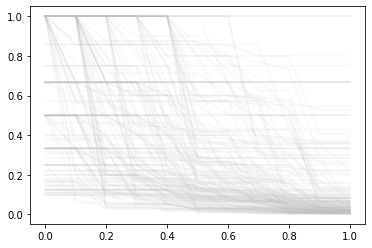

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import simpleparser as parser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import collectionloaders
import RetrievalModelsMatrix as models

verbose = True
bigrams = True
is_sw = 0.05

### 1. Load the corpus
cranfield = collectionloaders.CranfieldTestBed()

### 2. Parse the corpus
# Tokenize, stem and remove stop words
if not bigrams:
    vectorizer = CountVectorizer()
else:
    vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', 
                                    min_df=1)

corpus = parser.stemCorpus(cranfield.corpus_cranfield['abstract'])

### 3. Create the model
# Compute the term frequencies matrix and the model statistics
tf_cranfield = vectorizer.fit_transform(corpus).toarray()
models = models.RetrievalModelsMatrix(tf_cranfield, vectorizer)

### 4. Run the queries over the corpus
i = 1
map_vsm = 0
precision_vsm = []

for query in cranfield.queries:
    # Parse the query and compute the document scores
    scores = models.score_vsm(parser.stemSentence(query))

    # Do the evaluation
    [average_precision, precision, recall, thresholds] = cranfield.eval(scores, i)
    
    
    # Some messages...
    if is_sw > average_precision:
        print('qid =',i, 'VSM     AP=',average_precision)
        print('query: \n', query)
    else:
        map_vsm = map_vsm + average_precision
        precision_vsm.append(precision)
        plt.plot(recall, precision, color='silver', alpha=0.1)
    
    i = i + 1

map_vsm = map_vsm/cranfield.num_queries



In [ ]:
import computationMAP as m
import computationP10 as p
import MAP_lambCalc as l
import MAP_newCalc as n
import MAP_alphaCalc as a
import uniBigramCalc as ub

#aa = m.computeMAP(False)

#aa.prec_rec_plot()

#p.computeP10(False)

#l.MAP_lambCalc(False)

#n.MAP_newCalc(False)

a.MAP_alphaCalc(False)

#computes the model with unigrams and bigrams
#legend
#0 - VSM
#1 - LMD
#2 - LMJM
#3 - RM3
#ub.computeUniBi(3)


[nltk_data] Downloading package punkt to C:\Users\Rafael
[nltk_data]     Gameiro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rafael
[nltk_data]     Gameiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of documents:  1400
Number of queries:  225

alpha: 0.0 , limit: 3 
 ['aeroelast', 'aircraft', 'construct', 'heat', 'high', 'law', 'model', 'must', 'obey', 'similar', 'speed']

alpha: 0.0 , limit: 3 
 ['aeroelast', 'aircraft', 'associ', 'flight', 'high', 'problem', 'speed', 'structur']

alpha: 0.0 , limit: 3 
 ['composit', 'conduct', 'far', 'heat', 'problem', 'slab', 'solv']

alpha: 0.0 , limit: 3 
 ['assumpt', 'base', 'chemic', 'criterion', 'develop', 'empir', 'equilibrium', 'flow', 'gas', 'instantan', 'local', 'mixtur', 'react', 'show', 'simplifi', 'solut', 'valid']

alpha: 0.0 , limit: 3 
 ['aerodynam', 'applic', 'chemic', 'hyperson', 'kinet', 'problem', 'system']

alpha: 0.0 , limit: 3 
 ['behaviour', 'couett', 'experiment', 'flow', 'guid', 'theoret', 'turbul']

alpha: 0.0 , limit: 3 
 ['angl', 'attack', 'avail', 'distribut', 'equival', 'forebodi', 'lower', 'ogiv', 'possibl', 'pressur', 'relat', 'surfac', 'zero']

alpha: 0.0 , limit: 3 
 ['angl', 'approxim', 'attack', 'avail


alpha: 0.0 , limit: 3 
 ['asymptot', 'boundari', 'equat', 'exact', 'known', 'layer', 'regard', 'solut']

alpha: 0.0 , limit: 3 
 ['boundari', 'equat', 'layer', 'previous', 'similar', 'solut']

alpha: 0.0 , limit: 3 
 ['experiment', 'hyperson', 'interact', 'result', 'viscous']

alpha: 0.0 , limit: 3 
 ['done', 'flow', 'high', 'interact', 'low', 'mach', 'number', 'particular', 'relat', 'reynold', 'viscous']

alpha: 0.0 , limit: 3 
 ['aerodynam', 'bodi', 'chemic', 'doe', 'effect', 'equilibrium', 'flow', 'govern', 'hyperson', 'law', 'particular', 'play', 'reaction', 'role', 'similitud', 'slender']

alpha: 0.0 , limit: 3 
 ['dissoci', 'enthalpi', 'free', 'high', 'hyperson', 'possibl', 'pressur', 'realize', 'respect', 'signific', 'simul', 'stream', 'tunnel', 'wind']

alpha: 0.0 , limit: 3 
 ['among', 'analys', 'assum', 'current', 'differ', 'discrep', 'effect', 'heat', 'law', 'point', 'primarili', 'result', 'stagnat', 'temperatur', 'transfer', 'viscos', 'vortic']

alpha: 0.0 , limit: 3 
 ['a


alpha: 0.0 , limit: 3 
 ['buckl', 'column', 'creep', 'experiment', 'result']

alpha: 0.0 , limit: 3 
 ['buckl', 'creep', 'extern', 'pressur', 'result', 'round', 'tube']

alpha: 0.0 , limit: 3 
 ['analyt', 'ani', 'associ', 'circular', 'collaps', 'conduct', 'creep', 'cylindr', 'deform', 'distribut', 'elast', 'exhibit', 'failur', 'forc', 'long', 'mechan', 'primari', 'secondari', 'shell', 'studi', 'system', 'time', 'various', 'well']

alpha: 0.0 , limit: 3 
 ['circular', 'cylindr', 'effect', 'frequenc', 'initi', 'investig', 'shell', 'stress', 'vibrat']

alpha: 0.0 , limit: 3 
 ['chang', 'circular', 'cylindr', 'deform', 'due', 'effect', 'frequenc', 'initi', 'investig', 'pressur', 'shell', 'vibrat']

alpha: 0.0 , limit: 3 
 ['discontinu', 'junction', 'pressur', 'stress', 'structur']

alpha: 0.0 , limit: 3 
 ['analyt', 'avail', 'edg', 'load', 'revolut', 'shell', 'solut', 'stress']

alpha: 0.0 , limit: 3 
 ['closur', 'contour', 'cylindr', 'discontinu', 'dome', 'minim', 'pressur', 'stress', 'u


alpha: 0.0 , limit: 3 
 ['ahead', 'blunt', 'chemic', 'constitu', 'entri', 'layer', 'nonequilibrium', 'shock', 'vehicl', 'viscous']

alpha: 0.0 , limit: 3 
 ['accur', 'analyt', 'cone', 'distribut', 'estim', 'exist', 'hyperson', 'incid', 'pressur', 'speed', 'theori']

alpha: 0.0 , limit: 3 
 ['ani', 'cone', 'distribut', 'empir', 'estim', 'method', 'pressur', 'simpl', 'use']

alpha: 0.0 , limit: 3 
 ['distribut', 'effect', 'modifi', 'pressur', 'serious', 'viscous']

alpha: 0.0 , limit: 3 
 ['boundari', 'flexibl', 'investig', 'laminar', 'layer', 'stabil', 'surfac', 'theoret', 'whether']

alpha: 0.0 , limit: 3 
 ['compar', 'data', 'dynam', 'facil', 'flutter', 'langley', 'measur', 'new', 'obtain', 'similar', 'subson', 'transon', 'tunnel']

alpha: 0.0 , limit: 3 
 ['affect', 'boundari', 'chang', 'flutter', 'larg', 'mass', 'new', 'quantit', 'ratio', 'wing']

alpha: 0.0 , limit: 3 
 ['aerodynam', 'amount', 'coeffici', 'continu', 'deceler', 'drag', 'dure', 'effect', 'entri', 'lift', 'maximum', 


alpha: 0.1 , limit: 3 
 ['angl', 'appear', 'approxim', 'arbitrari', 'attack', 'avail', 'base', 'bodi', 'boundari', 'calcul', 'condit', 'cylind', 'determin', 'diamet', 'discuss', 'distribut', 'effect', 'equival', 'exhaust', 'experiment', 'forc', 'forebodi', 'found', 'free', 'independ', 'interact', 'invers', 'jet', 'laminar', 'later', 'layer', 'length', 'lower', 'mach', 'main', 'method', 'model', 'near', 'number', 'obtain', 'ogiv', 'possibl', 'predict', 'present', 'pressur', 'produc', 'product', 'proport', 'ratio', 'relat', 'root', 'side', 'squar', 'stagnat', 'stream', 'suggest', 'superson', 'surfac', 'turbul', 'util', 'various', 'zero']

alpha: 0.1 , limit: 3 
 ['100degre', '25', '40', '4degre', '60', '90degre', 'aerodynam', 'airstream', 'angl', 'approxim', 'arbitrari', 'area', 'attack', 'attitud', 'avail', 'basic', 'bodi', 'calcul', 'characterist', 'configur', 'control', 'dash', 'delta', 'distribut', 'effect', 'exact', 'fold', 'forebodi', 'form', 'glide', 'heat', 'high', 'highspe', 'i


alpha: 0.1 , limit: 3 
 ['along', 'analysi', 'angl', 'appli', 'applic', 'axi', 'azimuth', 'bodi', 'boundari', 'classic', 'compar', 'compon', 'consider', 'curv', 'dimension', 'discuss', 'doublet', 'elementari', 'entir', 'equal', 'equat', 'evalu', 'fli', 'flight', 'flow', 'fluid', 'formula', 'forward', 'high', 'includ', 'incompress', 'indici', 'investig', 'inviscid', 'kirchhoff', 'lift', 'mach', 'manner', 'meridian', 'number', 'past', 'perpendicular', 'pitch', 'pitchingmo', 'potenti', 'present', 'problem', 'reduc', 'revers', 'revolut', 'right', 'round', 'set', 'shown', 'simpl', 'sink', 'sourc', 'speed', 'state', 'steadi', 'stream', 'surfac', 'three', 'transient', 'transvers', 'triangular', 'two', 'unsteadi', 'valu', 'vari', 'veloc', 'wave', 'wing']

alpha: 0.1 , limit: 3 
 ['angl', 'appli', 'applic', 'approxim', 'arbitrari', 'attack', 'avail', 'base', 'bodi', 'calcul', 'comput', 'could', 'determin', 'develop', 'digit', 'distribut', 'drag', 'duct', 'exact', 'expect', 'experiment', 'expre


alpha: 0.1 , limit: 3 
 ['affect', 'appli', 'applic', 'assumpt', 'avoid', 'beam', 'believ', 'bend', 'buckl', 'circular', 'classic', 'coeffici', 'column', 'confirm', 'convent', 'creep', 'cross', 'curv', 'cylind', 'design', 'effect', 'elast', 'extern', 'fail', 'failur', 'finit', 'five', 'form', 'formula', 'general', 'heavi', 'infinitesim', 'levi', 'linear', 'load', 'local', 'new', 'note', 'obtain', 'origin', 'part', 'plane', 'present', 'pressur', 'previous', 'problem', 'radial', 'rectangular', 'remain', 'result', 'rigor', 'ring', 'section', 'show', 'sinc', 'stabil', 'stiffen', 'stress', 'subject', 'test', 'theori', 'thick', 'treatment', 'trefftz', 'twenti', 'uniform', 'vanish', 'variat', 'wing']

alpha: 0.1 , limit: 3 
 ['allow', 'analysi', 'appli', 'applic', 'axial', 'bar', 'beam', 'bend', 'beyween', 'box', 'buckl', 'calcul', 'chang', 'circular', 'comput', 'construct', 'cross', 'curv', 'cycl', 'cylind', 'demonstr', 'deriv', 'design', 'digit', 'distribut', 'done', 'effect', 'elast', 'fa


alpha: 0.1 , limit: 3 
 ['accumul', 'accur', 'allow', 'although', 'amount', 'analyt', 'ani', 'approach', 'attribut', 'axisymmetr', 'base', 'basi', 'believ', 'blunt', 'bodi', 'boundari', 'case', 'chord', 'concept', 'conclud', 'cone', 'configur', 'confirm', 'consider', 'contribut', 'curv', 'cylind', 'data', 'deal', 'deduc', 'deduct', 'dimension', 'discuss', 'doe', 'done', 'drag', 'edg', 'effect', 'effort', 'estim', 'evid', 'excel', 'exist', 'experiment', 'extrem', 'factor', 'field', 'flow', 'given', 'gradient', 'great', 'height', 'hyperson', 'import', 'inasmuch', 'includ', 'induc', 'larg', 'layer', 'lead', 'low', 'mach', 'made', 'may', 'method', 'number', 'obtain', 'one', 'onli', 'order', 'paper', 'phenomena', 'plate', 'portion', 'predict', 'pressur', 'problem', 'rang', 'ratio', 'reason', 'region', 'report', 'repres', 'respect', 'review', 'satisfactori', 'self', 'shape', 'shown', 'signific', 'similar', 'simpl', 'simplifi', 'sizeabl', 'small', 'solut', 'stream', 'superson', 'surfac', 'th


alpha: 0.1 , limit: 3 
 ['accur', 'airfoil', 'although', 'analys', 'analysi', 'analyt', 'angl', 'appli', 'applic', 'approxim', 'arbitrari', 'around', 'attack', 'author', 'base', 'bodi', 'class', 'close', 'compar', 'consid', 'correct', 'correspond', 'data', 'describ', 'determin', 'dimension', 'distribut', 'disturb', 'easi', 'equat', 'equival', 'error', 'everywher', 'exist', 'experi', 'experiment', 'express', 'favor', 'flow', 'form', 'formula', 'free', 'furthermor', 'general', 'geometri', 'give', 'glauert', 'great', 'higher', 'improv', 'instanc', 'investig', 'keun', 'larg', 'lead', 'linear', 'linearis', 'lower', 'mach', 'manner', 'method', 'near', 'nonlift', 'nonlinear', 'number', 'obtain', 'origin', 'oswatitsch', 'paper', 'partial', 'prandtl', 'predict', 'prescrib', 'present', 'pressur', 'propos', 'region', 'result', 'rule', 'shape', 'shock', 'shown', 'signific', 'simpl', 'slender', 'small', 'smooth', 'solut', 'specifi', 'stream', 'subson', 'suffici', 'superson', 'theoret', 'theori', '


alpha: 0.1 , limit: 3 
 ['aircraft', 'alon', 'appli', 'avail', 'boundari', 'case', 'collect', 'compress', 'conveni', 'crabtre', 'data', 'deriv', 'direct', 'equat', 'experiment', 'expos', 'extent', 'field', 'flow', 'follow', 'form', 'given', 'govern', 'hope', 'impos', 'incompress', 'inform', 'initi', 'investig', 'involv', 'laminar', 'layer', 'limit', 'linear', 'longitudin', 'made', 'mean', 'method', 'need', 'obtain', 'oscil', 'part', 'period', 'present', 'problem', 'propos', 'purpos', 'reduc', 'refer', 'remov', 'restrict', 'rott', 'short', 'show', 'shown', 'speed', 'stabil', 'stewartson', 'subject', 'superson', 'theoret', 'theori', 'transform', 'travel', 'turbul', 'use', 'usual', 'well', 'wing', 'work']

alpha: 0.1 , limit: 3 
 ['accept', 'accur', 'aerodynam', 'air', 'airplan', 'also', 'analysi', 'analyz', 'appli', 'applic', 'approach', 'approxim', 'arbitrari', 'area', 'arriv', 'avail', 'base', 'boom', 'calcul', 'case', 'characterist', 'circul', 'close', 'coeffici', 'compar', 'compat',


alpha: 0.1 , limit: 3 
 ['15', '1962', '7157', 'accept', 'amr', 'analys', 'anyway', 'articl', 'author', 'boundari', 'case', 'caus', 'complet', 'conclus', 'continu', 'deduc', 'demonstr', 'doe', 'earlier', 'elementari', 'equat', 'examin', 'flat', 'flow', 'form', 'gradient', 'great', 'hold', 'howev', 'import', 'incompress', 'induc', 'later', 'layer', 'li', 'limit', 'mathemat', 'mean', 'model', 'murray', 'note', 'obscur', 'origin', 'paper', 'past', 'plate', 'practic', 'present', 'pressur', 'problem', 'question', 'region', 'remain', 'resolv', 'rev', 'semiinfinit', 'set', 'shear', 'simpl', 'steadi', 'stream', 'support', 'theori', 'thus', 'unbound', 'uniform', 'unlimit', 'use', 'vortic']

alpha: 0.1 , limit: 3 
 ['across', 'addit', 'admit', 'agreement', 'aid', 'aim', 'analog', 'analysi', 'appli', 'appropri', 'approxim', 'artifici', 'assum', 'assumpt', 'asymptot', 'axial', 'base', 'basic', 'behaviour', 'boundari', 'calcul', 'case', 'compon', 'condit', 'conic', 'consid', 'consider', 'consist',


alpha: 0.1 , limit: 3 
 ['11', 'abov', 'absolut', 'accur', 'aerodynam', 'agreement', 'although', 'altitud', 'analysi', 'appli', 'appropri', 'approxim', 'assumpt', 'avail', 'base', 'becom', 'begin', 'behav', 'behavior', 'behind', 'blunt', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'characterist', 'cheng', 'class', 'close', 'comparison', 'complet', 'concept', 'condit', 'conduct', 'connect', 'conserv', 'consid', 'constant', 'continuum', 'cool', 'correl', 'correspond', 'cover', 'curvatur', 'cylind', 'data', 'decreas', 'defin', 'degre', 'densiti', 'depend', 'detach', 'detail', 'differenti', 'discontinu', 'discuss', 'distanc', 'effect', 'entail', 'enthalpi', 'equat', 'evid', 'except', 'exist', 'experi', 'experiment', 'extrapol', 'fall', 'familiar', 'fli', 'flow', 'found', 'free', 'fulli', 'fundament', 'gas', 'general', 'give', 'given', 'heat', 'hemispher', 'high', 'higher', 'hugoniot', 'hyperson', 'illustr', 'incipi', 'includ', 'increas', 'indic', 'infinitesim', 'insul', 'interact', 'in


alpha: 0.1 , limit: 3 
 ['accord', 'air', 'also', 'altern', 'appear', 'balanc', 'boundari', 'carri', 'case', 'caus', 'certain', 'choke', 'combin', 'compress', 'conduct', 'consid', 'consist', 'correct', 'critic', 'defect', 'densiti', 'describ', 'determin', 'differ', 'discuss', 'distribut', 'disturb', 'drag', 'effect', 'elast', 'equal', 'establish', 'experi', 'experiment', 'fail', 'feasibl', 'first', 'flow', 'flutter', 'full', 'given', 'gravit', 'graviti', 'high', 'import', 'increas', 'influenc', 'investig', 'laminar', 'last', 'layer', 'less', 'load', 'mach', 'make', 'mass', 'may', 'mckinnon', 'mean', 'measur', 'mere', 'method', 'model', 'modif', 'much', 'natur', 'necessari', 'necessarili', 'neglig', 'number', 'obtain', 'onli', 'order', 'ordinari', 'orient', 'paper', 'paramet', 'part', 'phenomenon', 'point', 'possibl', 'predict', 'present', 'pressur', 'probabl', 'proportion', 'quit', 'rang', 'reach', 'reduc', 'reduct', 'relat', 'respect', 'reynold', 'scale', 'serious', 'sinc', 'small', 


alpha: 0.1 , limit: 3 
 ['10', '14', 'accept', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'appear', 'around', 'axial', 'bluff', 'blunt', 'bodi', 'carri', 'center', 'coeffici', 'combust', 'combut', 'conduct', 'consider', 'could', 'cover', 'cylind', 'data', 'decreas', 'detail', 'distribut', 'effect', 'equip', 'examin', 'experiment', 'exploratori', 'face', 'fair', 'flat', 'flight', 'flow', 'fraction', 'general', 'good', 'heat', 'helium', 'hemispher', 'hold', 'howev', 'hyperson', 'indic', 'investig', 'length', 'level', 'load', 'mach', 'made', 'magnitud', 'measur', 'medium', 'methan', 'minim', 'model', 'moment', 'newtonian', 'nondimension', 'nose', 'number', 'obtain', 'order', 'part', 'percent', 'point', 'predict', 'preliminari', 'pressur', 'princeton', 'problem', 'produc', 'product', 'promis', 'protrud', 'rang', 'rate', 'reason', 'result', 'sever', 'show', 'shown', 'solut', 'speed', 'spike', 'stagnat', 'studi', 'symmetr', 'techniqu', 'test', 'theoret', 'theori'


alpha: 0.1 , limit: 3 
 ['agreement', 'appar', 'approxim', 'axial', 'beat', 'bottom', 'breath', 'case', 'circular', 'circumferenti', 'column', 'compress', 'comput', 'contain', 'coupl', 'cylind', 'cylindr', 'determin', 'effect', 'equat', 'excit', 'experiment', 'explain', 'fill', 'fluid', 'forc', 'formula', 'free', 'frequenc', 'full', 'good', 'high', 'inclus', 'incompress', 'intern', 'lead', 'line', 'liquid', 'low', 'mani', 'mass', 'mode', 'motion', 'natur', 'node', 'nonvisc', 'occur', 'onli', 'oscil', 'partial', 'portion', 'predict', 'present', 'pressur', 'pressuris', 'reissner', 'relat', 'report', 'reson', 'respons', 'result', 'rigid', 'set', 'shallow', 'shape', 'shell', 'shift', 'signific', 'similar', 'simpl', 'slosh', 'studi', 'system', 'tank', 'tend', 'tentat', 'term', 'theori', 'thin', 'toward', 'type', 'use', 'vibrat', 'wall', 'yarymovych']

alpha: 0.1 , limit: 3 
 ['actual', 'agreement', 'appar', 'apparatus', 'appropri', 'axial', 'beat', 'bottom', 'breath', 'case', 'circular', '


alpha: 0.1 , limit: 3 
 ['35', '704', 'accord', 'achiev', 'adequ', 'adjac', 'aeroelast', 'aircraft', 'analyt', 'appear', 'approach', 'around', 'assum', 'assumpt', 'automat', 'bend', 'biharmon', 'boundari', 'carri', 'case', 'check', 'chosen', 'clamp', 'complet', 'concentr', 'conclud', 'condit', 'conduct', 'consider', 'control', 'corner', 'deflect', 'describ', 'discret', 'edg', 'effect', 'either', 'enforc', 'entir', 'equat', 'exact', 'exist', 'experiment', 'flow', 'forc', 'four', 'free', 'function', 'heat', 'hot', 'ibm', 'ident', 'impli', 'includ', 'inform', 'intract', 'investig', 'laminar', 'layout', 'limit', 'list', 'load', 'made', 'major', 'method', 'model', 'moment', 'necessari', 'number', 'nusselt', 'obtain', 'onli', 'paper', 'paramet', 'part', 'plate', 'pli', 'point', 'possibl', 'present', 'previous', 'problem', 'program', 'provid', 'region', 'relationship', 'repres', 'requir', 'research', 'respect', 'result', 'reynold', 'satisfi', 'scale', 'similar', 'simpli', 'simultan', 'size',


alpha: 0.1 , limit: 3 
 ['aerodynam', 'aspect', 'assess', 'ballist', 'basi', 'bear', 'boundari', 'breguet', 'briefli', 'characterist', 'condit', 'convers', 'dash', 'debat', 'describ', 'dimens', 'dimension', 'discuss', 'energi', 'entri', 'exampl', 'exist', 'experiment', 'favor', 'flight', 'flow', 'fluid', 'formula', 'free', 'fuel', 'give', 'given', 'glide', 'heat', 'high', 'hyperson', 'illustr', 'includ', 'ingeni', 'interfer', 'investig', 'inviscid', 'iv', 'jet', 'load', 'long', 'made', 'main', 'man', 'method', 'molecul', 'multistag', 'numer', 'obtain', 'paper', 'part', 'perfect', 'perform', 'possibl', 'present', 'problem', 'rang', 'refer', 'result', 'review', 'rocket', 'sever', 'simpler', 'skip', 'solut', 'stabil', 'steadi', 'subsequ', 'superson', 'three', 'touch', 'two', 'type', 'upon', 'use', 'vehicl', 'viscous', 'whole', 'work']

alpha: 0.1 , limit: 3 
 ['12', '1300', '15', '1500', 'adjac', 'analysi', 'analyt', 'associ', 'augment', 'axial', 'boundari', 'calcul', 'case', 'charact', 


alpha: 0.1 , limit: 3 
 ['addit', 'analysi', 'analyt', 'ani', 'applic', 'approxim', 'associ', 'base', 'buckl', 'case', 'circular', 'collaps', 'column', 'comput', 'condit', 'conduct', 'consid', 'creep', 'critic', 'cylind', 'cylindr', 'dead', 'deform', 'describ', 'determin', 'distribut', 'elaps', 'elast', 'elev', 'equat', 'exhibit', 'failur', 'follow', 'forc', 'form', 'general', 'given', 'graphic', 'hydrostat', 'illustr', 'instantan', 'introduc', 'investig', 'load', 'long', 'manner', 'materi', 'mechan', 'method', 'note', 'plastic', 'predict', 'present', 'pressur', 'primari', 'reduc', 'ref', 'relat', 'result', 'ring', 'sampl', 'secondari', 'shell', 'simpl', 'solut', 'steadi', 'studi', 'subject', 'system', 'temperatur', 'term', 'theorem', 'theoret', 'theori', 'time', 'type', 'typic', 'variat', 'various', 'well']

alpha: 0.1 , limit: 3 
 ['actual', 'apparatus', 'appli', 'appropri', 'armenaka', 'bend', 'circular', 'circumferenti', 'comparison', 'contact', 'convert', 'cylind', 'cylindr', 'de


alpha: 0.1 , limit: 3 
 ['accur', 'also', 'analys', 'analysi', 'ani', 'appli', 'applic', 'approach', 'approxim', 'axial', 'behaviour', 'buckl', 'carri', 'case', 'circular', 'combin', 'compar', 'compress', 'conic', 'coordin', 'correl', 'curv', 'curvatur', 'cylindr', 'deflect', 'deriv', 'develop', 'differenti', 'discuss', 'donnel', 'effect', 'element', 'equat', 'equival', 'establish', 'experiment', 'extern', 'form', 'fourth', 'function', 'gaussian', 'general', 'generat', 'hydrostat', 'imperfect', 'includ', 'indic', 'initi', 'instabl', 'larg', 'likewis', 'list', 'load', 'neglig', 'normal', 'order', 'orthotrop', 'partial', 'preliminari', 'present', 'pressur', 'problem', 'reduc', 'result', 'revolut', 'ring', 'rotat', 'shallow', 'shell', 'shown', 'simpl', 'solut', 'solv', 'special', 'stabil', 'stiffen', 'stress', 'surfac', 'system', 'tensor', 'term', 'theori', 'therefor', 'thin', 'two', 'type', 'uniti', 'use', 'yield']

alpha: 0.1 , limit: 3 
 ['10', '35', 'accuraci', 'also', 'analysi', 'ap


alpha: 0.1 , limit: 3 
 ['absolut', 'accur', 'advers', 'along', 'analysi', 'analyz', 'ani', 'appli', 'applic', 'approxim', 'arbitrarili', 'assum', 'axial', 'base', 'boundari', 'calcul', 'characterist', 'close', 'closer', 'coeffici', 'comparison', 'compress', 'conclus', 'conjunct', 'constant', 'correl', 'degre', 'deriv', 'determin', 'develop', 'distribut', 'doe', 'effect', 'energi', 'enthalpi', 'equat', 'especi', 'exact', 'exist', 'extens', 'first', 'flat', 'flow', 'fluid', 'fourth', 'friction', 'give', 'given', 'gradient', 'heat', 'higher', 'illustr', 'incompress', 'insul', 'integr', 'karman', 'laminar', 'layer', 'mach', 'main', 'method', 'momentum', 'number', 'particular', 'plate', 'pohlhausen', 'point', 'practic', 'prandtl', 'prescrib', 'present', 'pressur', 'profil', 'properti', 'proport', 'purpos', 'regard', 'result', 'retard', 'separ', 'show', 'simpl', 'singl', 'skin', 'solut', 'stabil', 'stagnat', 'stream', 'suffici', 'surfac', 'survey', 'taken', 'temperatur', 'theori', 'thermal


alpha: 0.1 , limit: 3 
 ['35', '48', '84', '92', 'agreement', 'allow', 'analysi', 'band', 'base', 'blockag', 'bodi', 'characterist', 'compar', 'comparison', 'condit', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'deriv', 'differ', 'discrep', 'drag', 'dynam', 'effect', 'explain', 'extend', 'fair', 'five', 'flight', 'flown', 'free', 'futur', 'greatest', 'increas', 'interfer', 'investig', 'lift', 'longitudin', 'low', 'mach', 'made', 'manoeuvr', 'margin', 'measur', 'model', 'number', 'obtain', 'plausibl', 'possibl', 'pressur', 'produc', 'progress', 'rang', 'result', 'rough', 'shape', 'shown', 'similar', 'simul', 'slope', 'small', 'speed', 'stabil', 'standard', 'sting', 'subson', 'support', 'test', 'transon', 'tunnel', 'use', 'various', 'wind', 'wing', 'without', 'zero']

alpha: 0.1 , limit: 3 
 ['accur', 'accuraci', 'analys', 'approxim', 'attent', 'blasius', 'boundari', 'comment', 'condit', 'develop', 'dimension', 'drawn', 'encount', 'equat', 'extens', 'flat', 'flow', 'flu


alpha: 0.1 , limit: 3 
 ['account', 'addit', 'air', 'along', 'also', 'angl', 'associ', 'attempt', 'axisymmetr', 'boattail', 'boundari', 'braunschweig', 'carri', 'case', 'certain', 'consid', 'consider', 'corner', 'curv', 'curvatur', 'depend', 'describ', 'dimension', 'discuss', 'displac', 'diverg', 'effect', 'especi', 'evalu', 'examin', 'exhaust', 'exit', 'experi', 'experiment', 'flow', 'fluid', 'formul', 'free', 'friction', 'furthermor', 'given', 'gradient', 'heat', 'hyperson', 'hypothet', 'import', 'includ', 'incompress', 'infinit', 'influenc', 'interfer', 'intersect', 'introduc', 'investig', 'jet', 'laminar', 'layer', 'mach', 'made', 'main', 'may', 'mean', 'nois', 'nozzl', 'number', 'observ', 'order', 'paper', 'pertain', 'plate', 'preliminari', 'present', 'pressur', 'primari', 'primarili', 'problem', 'propuls', 'quantiti', 'ratio', 'result', 'reynold', 'right', 'semi', 'shape', 'shown', 'simul', 'skin', 'sonic', 'specif', 'static', 'still', 'stream', 'structur', 'studi', 'superson', 


alpha: 0.1 , limit: 3 
 ['1941', '1948', 'accuraci', 'agreement', 'alloy', 'alter', 'analog', 'analogu', 'ani', 'appli', 'balanc', 'behaviour', 'believ', 'bent', 'bessel', 'better', 'biot', 'blade', 'boundari', 'bulk', 'calcul', 'cater', 'chang', 'circumst', 'coeffici', 'combin', 'compon', 'compress', 'condit', 'connect', 'consider', 'context', 'correl', 'cours', 'cover', 'creep', 'cycl', 'cyclic', 'data', 'deform', 'design', 'determin', 'diagram', 'differenti', 'discuss', 'displac', 'distribut', 'due', 'dure', 'edg', 'elast', 'endur', 'enter', 'equat', 'equival', 'experiment', 'express', 'extens', 'extension', 'factor', 'fatigu', 'first', 'flat', 'flexur', 'flow', 'form', 'function', 'gas', 'govern', 'heat', 'high', 'ident', 'iii', 'improv', 'inclus', 'increas', 'interpret', 'introduc', 'known', 'load', 'mathemat', 'mechan', 'method', 'mix', 'multipli', 'obtain', 'onli', 'order', 'paper', 'partial', 'past', 'perfor', 'period', 'permit', 'plane', 'plastic', 'plate', 'prefer', 'present


alpha: 0.1 , limit: 3 
 ['000', '15', 'accept', 'aircraft', 'analys', 'analysi', 'ani', 'approxim', 'assum', 'assumpt', 'call', 'composit', 'concern', 'cumul', 'damag', 'data', 'depend', 'deriv', 'distort', 'due', 'element', 'estim', 'excit', 'failur', 'fatigu', 'field', 'fli', 'fluctuat', 'forc', 'ft', 'general', 'geometri', 'gust', 'hand', 'henc', 'hypothesi', 'idea', 'infinitesim', 'interv', 'involv', 'joint', 'life', 'linear', 'load', 'long', 'made', 'may', 'method', 'mode', 'motion', 'natur', 'normal', 'number', 'one', 'power', 'present', 'pressur', 'quantiti', 'random', 'result', 'rms', 'shown', 'space', 'spacewis', 'spectrum', 'structur', 'studi', 'subject', 'suppli', 'taylor', 'term', 'theori', 'time', 'uncoupl', 'upon', 'use', 'valu', 'vibrat', 'whole']

alpha: 0.1 , limit: 3 
 ['15', '18', '1956', 'aid', 'ani', 'append', 'applic', 'articl', 'aspect', 'attempt', 'avail', 'bibliographi', 'bleich', 'book', 'bring', 'buckl', 'condit', 'contain', 'cylindr', 'data', 'design', 'dev


alpha: 0.1 , limit: 3 
 ['absenc', 'achiev', 'aerofoil', 'alter', 'auxiliari', 'boundari', 'care', 'check', 'clarifi', 'coeffici', 'condit', 'damp', 'deposit', 'describ', 'dirt', 'discuss', 'drag', 'duct', 'effect', 'effici', 'establish', 'estim', 'etc', 'examin', 'experi', 'flexibl', 'fli', 'flow', 'found', 'gradient', 'inconclus', 'indic', 'inhibit', 'investig', 'laminar', 'layer', 'less', 'limit', 'littl', 'low', 'mean', 'movement', 'next', 'occur', 'onli', 'onset', 'order', 'overal', 'paper', 'possibl', 'preliminari', 'pressur', 'progress', 'properti', 'rather', 'reach', 'rear', 'rearward', 'reduct', 'region', 'remov', 'report', 'result', 'separ', 'slot', 'stabil', 'step', 'suction', 'suggest', 'surfac', 'taken', 'test', 'theoret', 'transit', 'tunnel', 'turbul', 'unfavour', 'use', 'whether', 'whilst', 'whole', 'whose', 'wind']

alpha: 0.1 , limit: 3 
 ['12', '45', 'addit', 'agreement', 'air', 'amount', 'analysi', 'aspect', 'calcul', 'characterist', 'chord', 'compar', 'conduct', 'c


alpha: 0.1 , limit: 3 
 ['45', 'achiev', 'addit', 'affect', 'airstream', 'allow', 'analyt', 'approxim', 'assum', 'attain', 'avail', 'avoid', 'boundari', 'carbon', 'carri', 'caus', 'close', 'compress', 'conclud', 'condens', 'contour', 'control', 'cool', 'correct', 'decreas', 'design', 'detect', 'dewpoint', 'diamet', 'dimension', 'dioxid', 'distribut', 'doe', 'dust', 'effect', 'essenti', 'everi', 'experi', 'experiment', 'featur', 'field', 'first', 'flow', 'follow', 'found', 'generat', 'hemi', 'hemispher', 'high', 'hot', 'hyperson', 'incompress', 'intern', 'investig', 'irrot', 'layer', 'linear', 'low', 'mean', 'method', 'model', 'near', 'necess', 'newtonian', 'nose', 'number', 'observ', 'obtain', 'occur', 'one', 'onli', 'part', 'pitot', 'polish', 'possibl', 'predict', 'present', 'pressur', 'rang', 'region', 'remov', 'report', 'requir', 'result', 'revers', 'reynold', 'rough', 'second', 'shape', 'shroud', 'signific', 'simul', 'slight', 'solut', 'sonic', 'sphere', 'spheric', 'stabil', 'stag


alpha: 0.1 , limit: 3 
 ['10', '20', '200', 'abov', 'advers', 'aerodynam', 'affect', 'aircraft', 'airfoil', 'airplan', 'angl', 'appear', 'arrang', 'attack', 'attain', 'attempt', 'base', 'benefit', 'best', 'blunt', 'bodi', 'boundari', 'calcul', 'certain', 'chart', 'close', 'complet', 'compon', 'compromis', 'cone', 'configur', 'conic', 'consid', 'consider', 'contribut', 'control', 'convent', 'correct', 'correl', 'data', 'deal', 'describ', 'design', 'direct', 'displac', 'doubl', 'drag', 'effect', 'effici', 'engin', 'equat', 'everi', 'examin', 'exot', 'extent', 'factor', 'final', 'flat', 'flight', 'freestream', 'frequent', 'friction', 'geometri', 'give', 'go', 'grand', 'great', 'greater', 'high', 'higher', 'howev', 'hyperbol', 'import', 'increas', 'indic', 'initi', 'inner', 'interact', 'invari', 'known', 'layer', 'lead', 'length', 'lift', 'linear', 'logarithm', 'mach', 'made', 'maximum', 'may', 'measur', 'method', 'minimum', 'neglect', 'number', 'obtain', 'offer', 'one', 'onli', 'oper', '


alpha: 0.2 , limit: 3 
 ['across', 'analysi', 'author', 'basi', 'boundari', 'caviti', 'consid', 'dash', 'depth', 'describ', 'diffus', 'effect', 'extern', 'final', 'first', 'flat', 'flow', 'fluctuat', 'formul', 'free', 'friction', 'geometri', 'heat', 'ii', 'impuls', 'includ', 'infinit', 'intern', 'investig', 'laminar', 'layer', 'length', 'local', 'mach', 'measur', 'model', 'momentum', 'motion', 'notch', 'number', 'observ', 'oncom', 'paper', 'part', 'perturb', 'pictur', 'place', 'plate', 'portion', 'possibl', 'ratio', 'refer', 'region', 'schlieren', 'second', 'separ', 'shear', 'simpl', 'skin', 'slip', 'sourc', 'spark', 'stream', 'structur', 'studi', 'systemat', 'thermal', 'thick', 'transfer', 'turbul', 'usual', 'vari', 'visual', 'wall']

alpha: 0.2 , limit: 3 
 ['000', '0001', '000degre', '100', '15', '25', '400', '500degre', 'agreement', 'air', 'analog', 'approxim', 'assum', 'atmospher', 'avail', 'averag', 'becom', 'befor', 'best', 'blunt', 'bodi', 'boundari', 'btu', 'carri', 'case', '


alpha: 0.2 , limit: 3 
 ['absorpt', 'acceler', 'accept', 'airfoil', 'also', 'altern', 'amount', 'analog', 'analyt', 'appear', 'approxim', 'basic', 'becom', 'broad', 'capabl', 'case', 'certain', 'coeffici', 'combin', 'consider', 'corridor', 'depend', 'discuss', 'doe', 'drawn', 'dynam', 'effect', 'electr', 'employ', 'entri', 'escap', 'excess', 'exist', 'flow', 'formul', 'fourier', 'fraction', 'function', 'fundament', 'gain', 'general', 'given', 'good', 'heat', 'includ', 'indic', 'indici', 'interest', 'lift', 'load', 'may', 'modul', 'natur', 'nonlift', 'nonstationari', 'notabl', 'numer', 'offer', 'paper', 'peak', 'penalti', 'possibl', 'practic', 'price', 'problem', 'realist', 'reciproc', 'reduct', 'relat', 'report', 'repres', 'result', 'review', 'satellit', 'shown', 'signific', 'simplic', 'sizabl', 'som', 'speed', 'standpoint', 'steep', 'techniqu', 'theodorsen', 'theori', 'thus', 'transform', 'transient', 'treatment', 'unifi', 'use', 'variabl', 'vehicl', 'wagner', 'wider']

alpha: 0.2 , 


alpha: 0.2 , limit: 3 
 ['achiev', 'anoth', 'approxim', 'around', 'attach', 'bodi', 'calcul', 'chosen', 'compar', 'concern', 'condit', 'constant', 'cross', 'delta', 'design', 'diamond', 'discuss', 'distribut', 'drag', 'edg', 'effect', 'flow', 'found', 'incid', 'includ', 'intend', 'invert', 'investig', 'inviscid', 'layer', 'lead', 'lift', 'lower', 'mach', 'made', 'measur', 'method', 'normal', 'number', 'one', 'overal', 'pattern', 'plane', 'planform', 'point', 'possibl', 'presenc', 'pressur', 'rang', 'real', 'remain', 'result', 'section', 'separ', 'seri', 'sever', 'shape', 'sharp', 'shock', 'simpl', 'slender', 'speed', 'stream', 'studi', 'subson', 'superson', 'surfac', 'test', 'theoret', 'tunnel', 'type', 'various', 'virtual', 'viscous', 'wave', 'wide', 'wind', 'wing', 'zero']

alpha: 0.2 , limit: 3 
 ['19', '40', 'abov', 'across', 'also', 'angl', 'apex', 'ascertain', 'attach', 'basi', 'boundari', 'caviti', 'coeffici', 'combin', 'compar', 'conic', 'core', 'delta', 'depth', 'describ', 'd


alpha: 0.2 , limit: 3 
 ['000', '225', '29', '30', '325', '350', '400', '45', '625', '750', 'achiev', 'addit', 'aerodynam', 'affect', 'airstream', 'along', 'also', 'alway', 'amount', 'appear', 'attain', 'avail', 'avoid', 'base', 'blunt', 'bodi', 'boundari', 'carbon', 'caus', 'characterist', 'close', 'coeffici', 'conclud', 'condens', 'conduct', 'cone', 'configur', 'constant', 'control', 'cool', 'critic', 'cylind', 'cylindr', 'data', 'decreas', 'detect', 'dewpoint', 'diamet', 'dioxid', 'distanc', 'distribut', 'doe', 'dust', 'edg', 'effect', 'ellips', 'encount', 'enthalpi', 'entir', 'essenti', 'estim', 'even', 'everi', 'experi', 'experiment', 'extens', 'extern', 'feasibl', 'featur', 'first', 'flow', 'fluid', 'heat', 'hemi', 'hemispher', 'high', 'histori', 'hot', 'hyperson', 'impli', 'import', 'increas', 'indic', 'intern', 'investig', 'layer', 'less', 'linear', 'local', 'low', 'lower', 'made', 'magnitud', 'may', 'mean', 'measur', 'microinch', 'minimum', 'model', 'momentum', 'nasa', 'near'


alpha: 0.2 , limit: 3 
 ['account', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'boundari', 'calcul', 'coeffici', 'compar', 'compress', 'continu', 'deriv', 'develop', 'discuss', 'disturb', 'divid', 'effect', 'equat', 'first', 'flat', 'flow', 'formula', 'friction', 'futur', 'give', 'heat', 'hyperson', 'improv', 'indic', 'induc', 'insul', 'integr', 'interact', 'investig', 'inviscid', 'laminar', 'law', 'layer', 'mass', 'match', 'method', 'normal', 'numer', 'obtain', 'order', 'perturb', 'plate', 'present', 'pressur', 'problem', 'region', 'report', 'result', 'signific', 'similar', 'skin', 'small', 'solut', 'strong', 'studi', 'surfac', 'tangent', 'theori', 'thick', 'transfer', 'transit', 'treatment', 'use', 'variat', 'veloc', 'viscous', 'weak', 'wedg']

alpha: 0.2 , limit: 3 
 ['account', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'boundari', 'calcul', 'coeffici', 'combin', 'compar', 'compress', 'continu', 'deriv', 'develop', 'discuss', 'disturb', 'divid', 'effect', 'equat'


alpha: 0.2 , limit: 3 
 ['abov', 'accept', 'accur', 'aerodynam', 'affect', 'air', 'also', 'analysi', 'analyz', 'angl', 'applic', 'approach', 'approxim', 'area', 'aris', 'arriv', 'avail', 'becaus', 'boundari', 'case', 'characterist', 'circul', 'close', 'compar', 'compat', 'complet', 'complex', 'condit', 'conduct', 'configur', 'connect', 'consid', 'consist', 'correl', 'coupl', 'damp', 'data', 'degre', 'deriv', 'design', 'detail', 'develop', 'dimension', 'discuss', 'effect', 'estim', 'evalu', 'expans', 'experiment', 'explicit', 'featur', 'field', 'flow', 'fluid', 'flutter', 'forc', 'form', 'freedom', 'fulli', 'function', 'gasdynam', 'hyperbol', 'includ', 'inclus', 'increas', 'infinit', 'interest', 'kernel', 'lag', 'lift', 'linear', 'mach', 'made', 'magnet', 'magnetohydrodynam', 'magnitud', 'mani', 'mechan', 'modif', 'multi', 'must', 'neglect', 'non', 'nonalign', 'nonconduct', 'nonlinear', 'number', 'obtain', 'onli', 'ordinari', 'paper', 'paramet', 'past', 'planform', 'predict', 'prelimin


alpha: 0.2 , limit: 3 
 ['along', 'author', 'boundari', 'equat', 'exact', 'expans', 'flat', 'flow', 'found', 'gradient', 'incompress', 'infinit', 'investig', 'layer', 'navier', 'note', 'past', 'plate', 'present', 'pressur', 'recent', 'repres', 'seri', 'sever', 'shear', 'simpl', 'situat', 'solut', 'steadi', 'stoke', 'suction', 'uniform']

alpha: 0.2 , limit: 3 
 ['1956', '38', '53', 'abov', 'absent', 'academ', 'accur', 'addit', 'aerothermochem', 'agreement', 'air', 'also', 'although', 'annex', 'applic', 'approxim', 'area', 'artifici', 'assumpt', 'attribut', 'author', 'avail', 'believ', 'berger', 'bibliographi', 'blow', 'boundari', 'brief', 'broken', 'burn', 'case', 'caus', 'chemic', 'coeffici', 'common', 'compar', 'complet', 'composit', 'comput', 'concentr', 'conclud', 'condit', 'consider', 'contribut', 'cool', 'correl', 'correspond', 'data', 'de', 'deal', 'des', 'describ', 'design', 'desir', 'destabil', 'devot', 'differ', 'diffus', 'distinguish', 'distribut', 'doctor', 'doe', 'due', '


alpha: 0.2 , limit: 3 
 ['11', '25', '65', '71', 'abov', 'absolut', 'agreement', 'air', 'al', 'applic', 'approxim', 'axisymmetr', 'boundari', 'cheng', 'close', 'comparison', 'concept', 'correl', 'cover', 'cylind', 'data', 'densiti', 'depend', 'describ', 'earlier', 'eckert', 'effect', 'equal', 'equat', 'establish', 'et', 'excel', 'exist', 'expect', 'experi', 'extens', 'ferri', 'flow', 'found', 'free', 'fulli', 'good', 'heat', 'hemispher', 'high', 'hyperson', 'incipi', 'increas', 'interact', 'interpret', 'investig', 'law', 'layer', 'limit', 'linear', 'low', 'mach', 'measur', 'merg', 'number', 'numer', 'obtain', 'paper', 'paramet', 'point', 'pr', 'predict', 'present', 'provid', 'purpos', 'rang', 'rarefi', 'ratio', 'recent', 'refer', 'regim', 'region', 'resist', 'result', 'reynold', 'shock', 'show', 'simpl', 'solut', 'stagnat', 'stream', 'temperatur', 'theori', 'thermomet', 'transfer', 'tunnel', 'unit', 'use', 'valu', 'valuabl', 'viscos', 'viscous', 'vortic', 'wall', 'well', 'wide', 'with


alpha: 0.2 , limit: 3 
 ['account', 'analyz', 'angl', 'attach', 'basi', 'basic', 'behind', 'blunt', 'boundari', 'brief', 'case', 'certain', 'chapman', 'comparison', 'compress', 'corner', 'current', 'data', 'descript', 'downstream', 'due', 'edg', 'effect', 'exist', 'expans', 'experiment', 'extens', 'field', 'flow', 'follow', 'found', 'give', 'given', 'hyperson', 'influenc', 'interact', 'interest', 'inviscid', 'laminar', 'layer', 'lead', 'led', 'limit', 'mach', 'mix', 'modifi', 'neglect', 'note', 'number', 'perturb', 'possibl', 'problem', 'purpos', 'rang', 'realize', 'reattach', 'region', 'result', 'satisfactori', 'second', 'separ', 'sever', 'shock', 'signific', 'small', 'special', 'sub', 'superson', 'tabul', 'theori', 'thick', 'viscous', 'wave']

alpha: 0.2 , limit: 3 
 ['02', '533', 'abov', 'accuraci', 'action', 'ad', 'air', 'also', 'altitud', 'analyt', 'approxim', 'assumpt', 'atmospher', 'best', 'centr', 'chang', 'compar', 'connect', 'consid', 'constant', 'contract', 'curv', 'decreas


alpha: 0.2 , limit: 3 
 ['acceleromet', 'aerodynam', 'aeroelast', 'aircraft', 'airplan', 'altitud', 'atmospher', 'avail', 'base', 'blast', 'calcul', 'compar', 'comparison', 'connect', 'continu', 'contribut', 'conveni', 'count', 'deform', 'degre', 'determin', 'dimension', 'due', 'dynam', 'effect', 'estim', 'examin', 'extent', 'fatigu', 'favor', 'five', 'flight', 'form', 'freedom', 'frequenc', 'give', 'gust', 'inform', 'larg', 'life', 'lift', 'load', 'motion', 'obtain', 'one', 'process', 'random', 'record', 'regim', 'relat', 'respons', 'result', 'shown', 'static', 'subson', 'summar', 'surfac', 'sweptw', 'symmetr', 'test', 'theori', 'turbul', 'use', 'variat', 'various', 'veloc', 'vertic', 'wing']

alpha: 0.2 , limit: 3 
 ['10', '15', '33', 'accompani', 'accur', 'aerodynam', 'ahead', 'also', 'angl', 'apex', 'appli', 'approxim', 'aspect', 'associ', 'assum', 'attack', 'back', 'behind', 'calcul', 'case', 'characterist', 'chart', 'coeffici', 'combin', 'compar', 'comparison', 'complet', 'compu


alpha: 0.2 , limit: 3 
 ['150', 'accord', 'acoust', 'adopt', 'aircraft', 'alloy', 'although', 'aluminium', 'amount', 'ani', 'appear', 'approach', 'aspect', 'attribut', 'avail', 'basi', 'behaviour', 'board', 'broad', 'cannot', 'carri', 'check', 'classif', 'compon', 'conclus', 'consier', 'construct', 'control', 'correl', 'curv', 'cycl', 'data', 'db', 'deisgn', 'demand', 'design', 'detail', 'develop', 'dicsov', 'draw', 'effici', 'effort', 'emphas', 'environ', 'essenti', 'estim', 'expect', 'experi', 'experiment', 'factor', 'fatigu', 'form', 'forward', 'futur', 'general', 'give', 'guarante', 'hand', 'high', 'hole', 'howev', 'indic', 'influenc', 'integr', 'intersect', 'jet', 'joint', 'know', 'knowledg', 'lectur', 'led', 'less', 'level', 'life', 'limit', 'load', 'log', 'made', 'main', 'mean', 'measur', 'metal', 'method', 'minimis', 'mode', 'moment', 'must', 'necessari', 'never', 'nevertheless', 'new', 'nois', 'obtain', 'one', 'optimum', 'physic', 'plot', 'possibl', 'predomin', 'present', 'pr


alpha: 0.2 , limit: 3 
 ['11', '12', '20', '30', '67', '91', 'addit', 'adequ', 'adjac', 'affect', 'afterbodi', 'agreement', 'air', 'along', 'angl', 'ani', 'axial', 'base', 'boat', 'boattail', 'bodi', 'boundari', 'cavit', 'chang', 'child', 'coeffici', 'cold', 'combin', 'comput', 'conclus', 'condit', 'conic', 'consider', 'converg', 'data', 'decreas', 'depend', 'deriv', 'design', 'determin', 'diamet', 'distribut', 'effect', 'elementari', 'entir', 'exit', 'experiment', 'flow', 'fluid', 'forc', 'forward', 'four', 'free', 'general', 'good', 'govern', 'head', 'hot', 'illustr', 'incid', 'increas', 'inform', 'jet', 'known', 'korst', 'layer', 'lotz', 'mach', 'made', 'maximum', 'measur', 'necessari', 'normal', 'nozzl', 'number', 'obliqu', 'onli', 'onset', 'page', 'paramet', 'part', 'particular', 'peak', 'pictur', 'point', 'present', 'pressur', 'produc', 'ratio', 'region', 'relat', 'revolut', 'rise', 'say', 'seri', 'shape', 'shock', 'show', 'simpl', 'small', 'state', 'stream', 'suction', 'support


alpha: 0.2 , limit: 3 
 ['aerodynam', 'analyt', 'briefli', 'case', 'composit', 'conduct', 'contribut', 'dimension', 'doubl', 'durat', 'dure', 'equat', 'exampl', 'exponenti', 'expos', 'face', 'flow', 'forum', 'gave', 'general', 'give', 'given', 'heat', 'incomplet', 'indic', 'input', 'insul', 'interfac', 'intern', 'layer', 'linear', 'longer', 'may', 'method', 'multilay', 'obtain', 'occur', 'one', 'particular', 'point', 'possibl', 'present', 'problem', 'propos', 'rate', 'reader', 'reason', 'recent', 'refer', 'resist', 'simpl', 'slab', 'small', 'solut', 'subject', 'surfac', 'temperatur', 'thermal', 'three', 'time', 'transient', 'triangular', 'type', 'use', 'wassermann']

alpha: 0.2 , limit: 3 
 ['also', 'altern', 'approxim', 'assum', 'automat', 'blade', 'block', 'compar', 'comput', 'continu', 'deal', 'deriv', 'design', 'detail', 'develop', 'diagram', 'digit', 'equat', 'exampl', 'extend', 'find', 'flow', 'follow', 'found', 'function', 'given', 'greatest', 'high', 'hub', 'illustr', 'impel',


alpha: 0.2 , limit: 3 
 ['actual', 'also', 'apparatus', 'appropri', 'approxim', 'axi', 'axial', 'axisymmetr', 'buckl', 'chang', 'characterist', 'circular', 'classic', 'comparison', 'compress', 'contact', 'convert', 'critic', 'cross', 'curvatur', 'cylind', 'cylindr', 'deform', 'describ', 'determin', 'due', 'easili', 'eccentr', 'effect', 'experiment', 'final', 'formula', 'frequenc', 'good', 'hydrostat', 'illustr', 'influenc', 'initi', 'intern', 'investig', 'lead', 'lineal', 'load', 'made', 'major', 'manner', 'mark', 'maximum', 'measur', 'minor', 'mode', 'moder', 'nodal', 'noncircular', 'number', 'obtain', 'paper', 'pattern', 'permit', 'postbuckl', 'pressur', 'quit', 'radius', 'ratio', 'relationship', 'repres', 'result', 'section', 'shape', 'shell', 'show', 'shown', 'stress', 'studi', 'summari', 'system', 'theori', 'timoshenko', 'use', 'valu', 'vibrat', 'well', 'without']

alpha: 0.2 , limit: 3 
 ['addit', 'also', 'analysi', 'aris', 'axial', 'chang', 'circular', 'circumferenti', 'closur'


alpha: 0.2 , limit: 3 
 ['accur', 'also', 'analys', 'analysi', 'ani', 'appli', 'applic', 'approach', 'approxim', 'axial', 'behaviour', 'buckl', 'carri', 'case', 'circular', 'combin', 'compar', 'compress', 'conic', 'coordin', 'correl', 'curv', 'curvatur', 'cylindr', 'deflect', 'deriv', 'develop', 'differenti', 'discuss', 'donnel', 'effect', 'element', 'equat', 'equival', 'establish', 'experiment', 'extern', 'form', 'fourth', 'function', 'gaussian', 'general', 'generat', 'hydrostat', 'imperfect', 'includ', 'indic', 'initi', 'instabl', 'larg', 'likewis', 'list', 'load', 'neglig', 'normal', 'order', 'orthotrop', 'partial', 'preliminari', 'present', 'pressur', 'problem', 'reduc', 'result', 'revolut', 'ring', 'rotat', 'shallow', 'shell', 'shown', 'simpl', 'solut', 'solv', 'special', 'stabil', 'stiffen', 'stress', 'surfac', 'system', 'tensor', 'term', 'theori', 'therefor', 'thin', 'two', 'type', 'uniti', 'use', 'yield']

alpha: 0.2 , limit: 3 
 ['10', '35', 'accuraci', 'also', 'analysi', 'ap


alpha: 0.2 , limit: 3 
 ['00', '20', '70', '76', '87', '95', 'accur', 'aerodynam', 'aeroelast', 'afterbodi', 'agreement', 'aircraft', 'airfoil', 'also', 'angl', 'appear', 'appli', 'applic', 'approach', 'approxim', 'arbitrari', 'base', 'basi', 'basic', 'bend', 'best', 'blunt', 'bodi', 'bond', 'calcul', 'characterist', 'circl', 'class', 'compar', 'comparison', 'condit', 'cone', 'configur', 'conform', 'conic', 'consider', 'cylindr', 'damp', 'decay', 'deriv', 'determin', 'diamet', 'differ', 'distribut', 'doubl', 'downstream', 'downwash', 'dynam', 'effect', 'elast', 'electr', 'equat', 'even', 'experiment', 'first', 'flexibl', 'forc', 'found', 'free', 'frequenc', 'gave', 'general', 'give', 'given', 'good', 'greater', 'hammerhead', 'higher', 'imag', 'indic', 'input', 'interv', 'investig', 'known', 'larger', 'latter', 'launch', 'less', 'level', 'mach', 'made', 'magnitud', 'map', 'maximum', 'measur', 'method', 'mode', 'model', 'mount', 'necessari', 'necessit', 'negat', 'neglig', 'nose', 'numbe


alpha: 0.2 , limit: 3 
 ['ablat', 'absorb', 'aerotherm', 'age', 'air', 'analyz', 'appear', 'around', 'atmospher', 'axial', 'becaus', 'block', 'blunt', 'bodi', 'boundari', 'calcul', 'call', 'cap', 'case', 'condit', 'cone', 'conserv', 'consid', 'convect', 'coupl', 'cylind', 'demand', 'deriv', 'design', 'develop', 'differenti', 'diffus', 'dissoci', 'distribut', 'doe', 'dure', 'effect', 'effici', 'encount', 'energi', 'enter', 'entri', 'environ', 'environment', 'equat', 'essenti', 'exact', 'except', 'exchang', 'experi', 'experiment', 'first', 'flight', 'formul', 'forward', 'found', 'function', 'fundament', 'glassi', 'heat', 'hemispher', 'high', 'hyperson', 'includ', 'incompress', 'increas', 'independ', 'integr', 'interact', 'investig', 'knowledg', 'laminar', 'layer', 'loss', 'mass', 'materi', 'method', 'motion', 'nonequilibrium', 'numer', 'obtain', 'onli', 'order', 'ordinari', 'paper', 'permit', 'pertin', 'point', 'present', 'priori', 'problem', 'process', 'proper', 'quantiti', 'quartz', '


alpha: 0.2 , limit: 3 
 ['agreement', 'also', 'analyt', 'anti', 'antisymmetr', 'apart', 'applic', 'attach', 'camber', 'case', 'co', 'complet', 'compos', 'condit', 'conic', 'cubic', 'cycl', 'deduc', 'delta', 'deriv', 'develop', 'direct', 'discuss', 'distribut', 'divid', 'downwash', 'edg', 'effect', 'equat', 'exampl', 'express', 'extens', 'flow', 'form', 'formula', 'free', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'homogen', 'iii', 'includ', 'integr', 'lead', 'lift', 'limit', 'linear', 'linearis', 'measur', 'method', 'motion', 'must', 'non', 'note', 'numer', 'one', 'order', 'ordin', 'part', 'permit', 'potenti', 'power', 'present', 'pressur', 'previous', 'quasi', 'quit', 'relat', 'remov', 'repres', 'respect', 'restrict', 'result', 'rise', 'sgn', 'similar', 'solut', 'spanwis', 'stream', 'streamwis', 'subject', 'subson', 'superson', 'surfac', 'symmetr', 'tabl', 'th', 'theori', 'tumbl', 'twist', 'two', 'upwash', 'use', 'ux', 'vanish', 'veloc', 'wherea', 'wing'


alpha: 0.2 , limit: 3 
 ['abl', 'accept', 'analyt', 'appear', 'approxim', 'batdorf', 'bend', 'buckl', 'carri', 'case', 'circular', 'common', 'compress', 'contrari', 'critic', 'cylind', 'cylindr', 'deflect', 'deform', 'donnel', 'due', 'effect', 'equal', 'equat', 'experiment', 'galerkin', 'good', 'increas', 'indic', 'intern', 'investig', 'latter', 'maximum', 'may', 'mean', 'metal', 'method', 'modifi', 'moment', 'practic', 'pressur', 'pure', 'purpos', 'rather', 'repres', 'result', 'shell', 'shown', 'signific', 'small', 'stabil', 'stress', 'thin', 'unlik', 'valu', 'wall']

alpha: 0.2 , limit: 3 
 ['150', 'acoust', 'adopt', 'aircraft', 'airlin', 'although', 'amount', 'analysi', 'ani', 'appear', 'approach', 'aspect', 'avail', 'basi', 'behaviour', 'believ', 'board', 'check', 'compar', 'compon', 'concern', 'conclus', 'consider', 'consier', 'construct', 'control', 'correl', 'cross', 'curv', 'data', 'db', 'deisgn', 'demand', 'design', 'determin', 'dicsov', 'done', 'draw', 'effici', 'effort', 'e


alpha: 0.2 , limit: 3 
 ['achiev', 'admit', 'adopt', 'along', 'also', 'analysi', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'author', 'base', 'becom', 'bend', 'boundari', 'call', 'case', 'central', 'chain', 'clamp', 'complet', 'comput', 'concentr', 'condit', 'connect', 'consid', 'consider', 'contain', 'converg', 'curv', 'deflect', 'deriv', 'design', 'develop', 'dimens', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'edg', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exampl', 'exist', 'explicit', 'express', 'finit', 'forego', 'form', 'formula', 'general', 'great', 'guarante', 'head', 'higher', 'howev', 'indic', 'infinit', 'inspect', 'integr', 'interest', 'interior', 'intermedi', 'investig', 'linear', 'link', 'load', 'maximum', 'membran', 'method', 'might', 'moment', 'number', 'numer', 'object', 'obtain', 'one', 'oper', 'order', 'paper', 'piston', 'plate', 'plot', 'practic', 'present', 'pressur', 'previous', 'problem', 'pure', 'recent', 'rectangular', 'reduct', 'r


alpha: 0.2 , limit: 3 
 ['25', '45', '60', 'aerofoil', 'analyt', 'angl', 'ani', 'apex', 'aspect', 'assess', 'calcul', 'chordwis', 'circular', 'classic', 'cone', 'confirm', 'cover', 'degre', 'deriv', 'describ', 'distribut', 'empir', 'estim', 'experi', 'extent', 'five', 'general', 'given', 'hyperson', 'incid', 'load', 'mach', 'measur', 'method', 'number', 'planform', 'predict', 'pressur', 'procedur', 'rang', 'rapid', 'ratio', 'result', 'simpl', 'span', 'speed', 'straight', 'subcrit', 'subson', 'surfac', 'swept', 'test', 'theori', 'total', 'use', 'various', 'whole', 'wing']

alpha: 0.2 , limit: 3 
 ['acceler', 'affect', 'aim', 'also', 'analyz', 'ani', 'anisotrop', 'anisotropi', 'arbitrari', 'biconvex', 'calcul', 'chief', 'co', 'combin', 'conduct', 'consid', 'convent', 'cross', 'deceler', 'descript', 'diamond', 'discuss', 'distribut', 'drag', 'edg', 'effect', 'electr', 'emphasi', 'equat', 'exact', 'express', 'extend', 'field', 'find', 'flow', 'form', 'formula', 'fulli', 'gas', 'gase', 'ge


alpha: 0.2 , limit: 3 
 ['along', 'also', 'analys', 'analyz', 'approxim', 'aris', 'assum', 'axial', 'buckl', 'caus', 'circular', 'circumferenti', 'compress', 'consid', 'cylind', 'cylindr', 'deflect', 'determin', 'develop', 'direct', 'discontinu', 'distribut', 'due', 'effect', 'elast', 'end', 'examin', 'extrem', 'formula', 'found', 'hoop', 'increas', 'like', 'limit', 'line', 'load', 'local', 'localis', 'mode', 'need', 'number', 'onli', 'pattern', 'perimet', 'problem', 'radial', 'result', 'section', 'shell', 'show', 'simpl', 'simpli', 'simplifi', 'stress', 'support', 'system', 'temperatur', 'thermal', 'thin', 'two', 'type', 'uniform', 'vari']

alpha: 0.2 , limit: 3 
 ['advanc', 'aforement', 'also', 'analysi', 'analyz', 'appli', 'applic', 'approach', 'author', 'avail', 'basic', 'believ', 'buckl', 'calcul', 'camber', 'capabl', 'case', 'caus', 'chang', 'combin', 'comparison', 'complex', 'comput', 'concept', 'configur', 'cover', 'current', 'day', 'deflect', 'design', 'detail', 'determin', '


alpha: 0.2 , limit: 3 
 ['10', '20', '200', 'abov', 'advers', 'aerodynam', 'affect', 'aircraft', 'airfoil', 'airplan', 'angl', 'appear', 'arrang', 'attack', 'attain', 'attempt', 'base', 'benefit', 'best', 'blunt', 'bodi', 'boundari', 'calcul', 'certain', 'chart', 'close', 'complet', 'compon', 'compromis', 'cone', 'configur', 'conic', 'consid', 'consider', 'contribut', 'control', 'convent', 'correct', 'correl', 'data', 'deal', 'describ', 'design', 'direct', 'displac', 'doubl', 'drag', 'effect', 'effici', 'engin', 'equat', 'everi', 'examin', 'exot', 'extent', 'factor', 'final', 'flat', 'flight', 'freestream', 'frequent', 'friction', 'geometri', 'give', 'go', 'grand', 'great', 'greater', 'high', 'higher', 'howev', 'hyperbol', 'import', 'increas', 'indic', 'initi', 'inner', 'interact', 'invari', 'known', 'layer', 'lead', 'length', 'lift', 'linear', 'logarithm', 'mach', 'made', 'maximum', 'may', 'measur', 'method', 'minimum', 'neglect', 'number', 'obtain', 'offer', 'one', 'onli', 'oper', '


alpha: 0.30000000000000004 , limit: 3 
 ['across', 'analysi', 'author', 'basi', 'boundari', 'caviti', 'consid', 'dash', 'depth', 'describ', 'diffus', 'effect', 'extern', 'final', 'first', 'flat', 'flow', 'fluctuat', 'formul', 'free', 'friction', 'geometri', 'heat', 'ii', 'impuls', 'includ', 'infinit', 'intern', 'investig', 'laminar', 'layer', 'length', 'local', 'mach', 'measur', 'model', 'momentum', 'motion', 'notch', 'number', 'observ', 'oncom', 'paper', 'part', 'perturb', 'pictur', 'place', 'plate', 'portion', 'possibl', 'ratio', 'refer', 'region', 'schlieren', 'second', 'separ', 'shear', 'simpl', 'skin', 'slip', 'sourc', 'spark', 'stream', 'structur', 'studi', 'systemat', 'thermal', 'thick', 'transfer', 'turbul', 'usual', 'vari', 'visual', 'wall']

alpha: 0.30000000000000004 , limit: 3 
 ['000', '0001', '000degre', '100', '15', '25', '400', '500degre', 'agreement', 'air', 'analog', 'approxim', 'assum', 'atmospher', 'avail', 'averag', 'becom', 'befor', 'best', 'blunt', 'bodi', 'boun


alpha: 0.30000000000000004 , limit: 3 
 ['absorpt', 'acceler', 'accept', 'airfoil', 'also', 'altern', 'amount', 'analog', 'analyt', 'appear', 'approxim', 'basic', 'becom', 'broad', 'capabl', 'case', 'certain', 'coeffici', 'combin', 'consider', 'corridor', 'depend', 'discuss', 'doe', 'drawn', 'dynam', 'effect', 'electr', 'employ', 'entri', 'escap', 'excess', 'exist', 'flow', 'formul', 'fourier', 'fraction', 'function', 'fundament', 'gain', 'general', 'given', 'good', 'heat', 'includ', 'indic', 'indici', 'interest', 'lift', 'load', 'may', 'modul', 'natur', 'nonlift', 'nonstationari', 'notabl', 'numer', 'offer', 'paper', 'peak', 'penalti', 'possibl', 'practic', 'price', 'problem', 'realist', 'reciproc', 'reduct', 'relat', 'report', 'repres', 'result', 'review', 'satellit', 'shown', 'signific', 'simplic', 'sizabl', 'som', 'speed', 'standpoint', 'steep', 'techniqu', 'theodorsen', 'theori', 'thus', 'transform', 'transient', 'treatment', 'unifi', 'use', 'variabl', 'vehicl', 'wagner', 'wider'


alpha: 0.30000000000000004 , limit: 3 
 ['achiev', 'anoth', 'approxim', 'around', 'attach', 'bodi', 'calcul', 'chosen', 'compar', 'concern', 'condit', 'constant', 'cross', 'delta', 'design', 'diamond', 'discuss', 'distribut', 'drag', 'edg', 'effect', 'flow', 'found', 'incid', 'includ', 'intend', 'invert', 'investig', 'inviscid', 'layer', 'lead', 'lift', 'lower', 'mach', 'made', 'measur', 'method', 'normal', 'number', 'one', 'overal', 'pattern', 'plane', 'planform', 'point', 'possibl', 'presenc', 'pressur', 'rang', 'real', 'remain', 'result', 'section', 'separ', 'seri', 'sever', 'shape', 'sharp', 'shock', 'simpl', 'slender', 'speed', 'stream', 'studi', 'subson', 'superson', 'surfac', 'test', 'theoret', 'tunnel', 'type', 'various', 'virtual', 'viscous', 'wave', 'wide', 'wind', 'wing', 'zero']

alpha: 0.30000000000000004 , limit: 3 
 ['19', '40', 'abov', 'across', 'also', 'angl', 'apex', 'ascertain', 'attach', 'basi', 'boundari', 'caviti', 'coeffici', 'combin', 'compar', 'conic', 'core',


alpha: 0.30000000000000004 , limit: 3 
 ['000', '225', '29', '30', '325', '350', '400', '45', '625', '750', 'achiev', 'addit', 'aerodynam', 'affect', 'airstream', 'along', 'also', 'alway', 'amount', 'appear', 'attain', 'avail', 'avoid', 'base', 'blunt', 'bodi', 'boundari', 'carbon', 'caus', 'characterist', 'close', 'coeffici', 'conclud', 'condens', 'conduct', 'cone', 'configur', 'constant', 'control', 'cool', 'critic', 'cylind', 'cylindr', 'data', 'decreas', 'detect', 'dewpoint', 'diamet', 'dioxid', 'distanc', 'distribut', 'doe', 'dust', 'edg', 'effect', 'ellips', 'encount', 'enthalpi', 'entir', 'essenti', 'estim', 'even', 'everi', 'experi', 'experiment', 'extens', 'extern', 'feasibl', 'featur', 'first', 'flow', 'fluid', 'heat', 'hemi', 'hemispher', 'high', 'histori', 'hot', 'hyperson', 'impli', 'import', 'increas', 'indic', 'intern', 'investig', 'layer', 'less', 'linear', 'local', 'low', 'lower', 'made', 'magnitud', 'may', 'mean', 'measur', 'microinch', 'minimum', 'model', 'momentum'


alpha: 0.30000000000000004 , limit: 3 
 ['account', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'boundari', 'calcul', 'coeffici', 'compar', 'compress', 'continu', 'deriv', 'develop', 'discuss', 'disturb', 'divid', 'effect', 'equat', 'first', 'flat', 'flow', 'formula', 'friction', 'futur', 'give', 'heat', 'hyperson', 'improv', 'indic', 'induc', 'insul', 'integr', 'interact', 'investig', 'inviscid', 'laminar', 'law', 'layer', 'mass', 'match', 'method', 'normal', 'numer', 'obtain', 'order', 'perturb', 'plate', 'present', 'pressur', 'problem', 'region', 'report', 'result', 'signific', 'similar', 'skin', 'small', 'solut', 'strong', 'studi', 'surfac', 'tangent', 'theori', 'thick', 'transfer', 'transit', 'treatment', 'use', 'variat', 'veloc', 'viscous', 'weak', 'wedg']

alpha: 0.30000000000000004 , limit: 3 
 ['absorb', 'account', 'alter', 'appli', 'approxim', 'axial', 'blow', 'boundari', 'characterist', 'coeffici', 'combin', 'compress', 'conduct', 'consider', 'convect', 'cool', 'coo


alpha: 0.30000000000000004 , limit: 3 
 ['absolut', 'appli', 'approxim', 'assum', 'avail', 'boundari', 'case', 'closer', 'comparison', 'compress', 'correl', 'crabtre', 'determin', 'direct', 'doe', 'equat', 'exact', 'exist', 'extent', 'flow', 'fluid', 'follow', 'give', 'impos', 'incompress', 'inform', 'initi', 'insul', 'involv', 'laminar', 'layer', 'main', 'method', 'number', 'particular', 'pohlhausen', 'point', 'prandtl', 'problem', 'proport', 'propos', 'purpos', 'reduc', 'refer', 'remov', 'restrict', 'result', 'retard', 'rott', 'separ', 'show', 'shown', 'solut', 'stewartson', 'stream', 'taken', 'temperatur', 'theori', 'thermal', 'transform', 'turbul', 'uniform', 'uniti', 'use', 'various', 'veloc', 'viscos', 'well', 'work']

alpha: 0.30000000000000004 , limit: 3 
 ['accept', 'accur', 'achiev', 'ackeret', 'aerodynam', 'aeroelast', 'aeroelastician', 'agre', 'air', 'aircraft', 'airfoil', 'almost', 'also', 'alway', 'amount', 'analys', 'analysi', 'analyz', 'applic', 'appreci', 'approach', 


alpha: 0.30000000000000004 , limit: 3 
 ['90', 'allow', 'applic', 'author', 'axial', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'cent', 'circular', 'compress', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'design', 'determin', 'develop', 'discuss', 'effect', 'experiment', 'extend', 'extens', 'fit', 'found', 'geometri', 'includ', 'intern', 'knowledg', 'known', 'load', 'membran', 'new', 'onli', 'paper', 'paramet', 'per', 'perform', 'present', 'pressur', 'previous', 'probabl', 'procedur', 'publish', 'recent', 'semiempir', 'seri', 'shell', 'stabil', 'statist', 'strength', 'stress', 'surfac', 'swept', 'term', 'test', 'theoret', 'theori', 'thin', 'togeth', 'treat', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.30000000000000004 , limit: 3 
 ['45', '60', 'account', 'ackeret', 'act', 'advoc', 'aerodynam', 'aeroelast', 'airfoil', 'also', 'although', 'analys', 'analysi', 'appli', 'approxim', 'assum', 'calcul', 'camber', 'carri', 'chord', 'clamp', 'comparison', 'conclud', 'cons


alpha: 0.30000000000000004 , limit: 3 
 ['adam', 'ago', 'agreement', 'allow', 'altitud', 'applic', 'approach', 'asymptot', 'attempt', 'author', 'axial', 'boundari', 'case', 'characterist', 'combin', 'compar', 'compos', 'concept', 'condit', 'cross', 'decad', 'defin', 'describ', 'differ', 'dimension', 'direct', 'dure', 'element', 'equat', 'exact', 'excel', 'experiment', 'explicit', 'extern', 'field', 'fig', 'flight', 'flow', 'formul', 'found', 'gas', 'gaseous', 'general', 'given', 'gradient', 'high', 'hyperson', 'independ', 'interact', 'investig', 'inviscid', 'laminar', 'larg', 'layer', 'lead', 'lift', 'limit', 'local', 'mass', 'method', 'note', 'number', 'numer', 'paramet', 'perfect', 'pertin', 'precis', 'predict', 'present', 'pressur', 'previous', 'problem', 'probstein', 'rang', 'recent', 'regim', 'relat', 'result', 'sec', 'shock', 'shown', 'similar', 'solut', 'streamwis', 'strong', 'suffici', 'surfac', 'symmetr', 'tangent', 'theori', 'three', 'transfer', 'tsien', 'two', 'use', 'valu'


alpha: 0.30000000000000004 , limit: 3 
 ['12', 'abov', 'addit', 'adequ', 'aerodynam', 'agreement', 'ailcron', 'aileron', 'along', 'amplitud', 'angl', 'ani', 'apparatus', 'approx', 'approxim', 'aris', 'attempt', 'axial', 'bodi', 'cavit', 'cent', 'chang', 'coeffici', 'comparison', 'conclus', 'condit', 'consider', 'control', 'correct', 'cross', 'damp', 'data', 'deg', 'denot', 'departur', 'depend', 'deriv', 'determin', 'dimension', 'direct', 'discuss', 'distribut', 'earlier', 'effect', 'elementari', 'entir', 'equival', 'factor', 'flat', 'flow', 'follow', 'forward', 'four', 'frequenc', 'gap', 'give', 'given', 'head', 'higher', 'hing', 'hyperson', 'illustr', 'incid', 'incompress', 'increas', 'influenc', 'known', 'littl', 'lotz', 'lowest', 'mach', 'made', 'mean', 'measur', 'minus', 'moment', 'movement', 'natur', 'necessari', 'number', 'obliqu', 'observ', 'onset', 'oscil', 'paramet', 'part', 'particular', 'peak', 'per', 'pictur', 'plate', 'plus', 'point', 'posit', 'pressur', 'produc', 'profil


alpha: 0.30000000000000004 , limit: 3 
 ['along', 'altitud', 'analyz', 'angl', 'approxim', 'assum', 'attach', 'basic', 'behind', 'bodi', 'boundari', 'brief', 'calcul', 'caret', 'case', 'certain', 'chapman', 'characterist', 'comparison', 'compress', 'conduct', 'configur', 'conjunct', 'corner', 'data', 'descript', 'displac', 'drag', 'due', 'eckert', 'edg', 'effect', 'exampl', 'exist', 'exit', 'expans', 'experiment', 'extens', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'friction', 'given', 'heat', 'includ', 'interact', 'inviscid', 'laminar', 'layer', 'lead', 'lift', 'limit', 'mach', 'mix', 'modifi', 'near', 'neglect', 'number', 'outsid', 'parallel', 'plane', 'possibl', 'profil', 'radiat', 'rang', 'ratio', 'reattach', 'region', 'result', 'satisfactori', 'second', 'separ', 'sever', 'shock', 'skin', 'special', 'sub', 'superson', 'surfac', 'tabul', 'temperatur', 'theori', 'thick', 'undersurfac', 'use', 'various', 'wave', 'wing', 'within']

alpha: 0.30000000000000004 , limit: 3 
 ['


alpha: 0.30000000000000004 , limit: 3 
 ['00', '11', '60', '75', 'across', 'addit', 'advantag', 'aerodynam', 'aeroelast', 'airplan', 'also', 'approxim', 'aspect', 'avail', 'base', 'basi', 'bend', 'blast', 'calcul', 'cantilev', 'coeffici', 'compar', 'comparison', 'compon', 'condit', 'connect', 'consist', 'continu', 'contribut', 'deform', 'degre', 'delta', 'determin', 'dimension', 'direct', 'distribut', 'due', 'dynam', 'effect', 'equat', 'examin', 'extent', 'favor', 'five', 'flexibl', 'flight', 'flow', 'follow', 'forc', 'form', 'freedom', 'frequenc', 'fundament', 'general', 'gust', 'includ', 'induc', 'inform', 'insert', 'larg', 'lift', 'load', 'mach', 'machin', 'made', 'method', 'mode', 'moment', 'motion', 'nonsteadi', 'number', 'numer', 'obtain', 'one', 'parabol', 'phase', 'pitch', 'planform', 'procedur', 'process', 'provid', 'quadratur', 'quantiti', 'random', 'rang', 'rapid', 'ratio', 'reduc', 'regim', 'relat', 'respons', 'result', 'section', 'sever', 'shown', 'sinusoid', 'sobson', 's


alpha: 0.30000000000000004 , limit: 3 
 ['agreement', 'appar', 'approxim', 'axial', 'beat', 'bottom', 'breath', 'case', 'circular', 'circumferenti', 'column', 'compress', 'comput', 'contain', 'coupl', 'cylind', 'cylindr', 'determin', 'effect', 'equat', 'excit', 'experiment', 'explain', 'fill', 'fluid', 'forc', 'formula', 'free', 'frequenc', 'full', 'good', 'high', 'inclus', 'incompress', 'intern', 'lead', 'line', 'liquid', 'low', 'mani', 'mass', 'mode', 'motion', 'natur', 'node', 'nonvisc', 'occur', 'onli', 'oscil', 'partial', 'portion', 'predict', 'present', 'pressur', 'pressuris', 'reissner', 'relat', 'report', 'reson', 'respons', 'result', 'rigid', 'set', 'shallow', 'shape', 'shell', 'shift', 'signific', 'similar', 'simpl', 'slosh', 'studi', 'system', 'tank', 'tend', 'tentat', 'term', 'theori', 'thin', 'toward', 'type', 'use', 'vibrat', 'wall', 'yarymovych']

alpha: 0.30000000000000004 , limit: 3 
 ['actual', 'agreement', 'appar', 'apparatus', 'appropri', 'axial', 'beat', 'bottom',


alpha: 0.30000000000000004 , limit: 3 
 ['02', '04', '05', '10', '15degre', '25degre', '50', '62', '91', 'aerodynam', 'also', 'angl', 'approxim', 'attack', 'author', 'balanc', 'base', 'calcul', 'case', 'center', 'characterist', 'chord', 'compress', 'conduct', 'configur', 'control', 'data', 'deriv', 'dimension', 'exist', 'flow', 'flutter', 'forc', 'frequenc', 'give', 'given', 'glider', 'hyperson', 'incompress', 'langley', 'lift', 'mach', 'method', 'number', 'obtain', 'oscillatori', 'paramet', 'particular', 'perform', 'possibl', 'present', 'publish', 'rang', 'ratio', 'reentri', 'report', 'research', 'special', 'speed', 'stabil', 'subson', 'suggest', 'superson', 'surfac', 'tab', 'tabl', 'test', 'transon', 'two', 'valu', 'variabl', 'various', 'vehicl', 'wing', 'work']

alpha: 0.30000000000000004 , limit: 3 
 ['act', 'airforc', 'also', 'analyt', 'approxim', 'aspect', 'brief', 'calcul', 'consid', 'consider', 'constraint', 'correspond', 'deriv', 'descript', 'determin', 'develop', 'distribut'


alpha: 0.30000000000000004 , limit: 3 
 ['adiabat', 'also', 'although', 'analysi', 'analyt', 'ani', 'appear', 'approxim', 'axisymmetr', 'basi', 'bend', 'brief', 'calcul', 'channel', 'coeffici', 'compress', 'converg', 'corpor', 'descript', 'design', 'determin', 'develop', 'diamet', 'dimension', 'discharg', 'diverg', 'done', 'effect', 'equat', 'extens', 'failur', 'flow', 'found', 'frame', 'fuselag', 'general', 'geometr', 'given', 'high', 'incompress', 'instabl', 'line', 'locat', 'made', 'may', 'method', 'moder', 'moment', 'motion', 'much', 'natur', 'need', 'number', 'optimum', 'present', 'pressur', 'pure', 'purpos', 'rand', 'ratio', 'regard', 'result', 'reynold', 'shell', 'similar', 'simpl', 'simplifi', 'sinc', 'size', 'slender', 'solut', 'sonic', 'space', 'stiffen', 'straight', 'structur', 'studi', 'theori', 'throat', 'two', 'use', 'valid', 'viscos', 'viscous', 'wall', 'weight', 'work', 'yield']

alpha: 0.30000000000000004 , limit: 3 
 ['adiabat', 'analyt', 'approxim', 'area', 'assum',


alpha: 0.30000000000000004 , limit: 3 
 ['agre', 'appear', 'appropri', 'best', 'buckl', 'central', 'collaps', 'column', 'compar', 'comparison', 'concern', 'conserv', 'consid', 'creep', 'critic', 'data', 'deform', 'due', 'elast', 'experi', 'experiment', 'expon', 'fact', 'fail', 'final', 'formula', 'found', 'general', 'gerard', 'give', 'hypothes', 'initi', 'instabl', 'instantan', 'integr', 'law', 'load', 'normal', 'note', 'paper', 'plastic', 'possibl', 'predict', 'present', 'rabotnov', 'record', 'secondari', 'shanley', 'shesterikov', 'solut', 'straight', 'studi', 'theoret', 'three', 'time', 'transient', 'valu', 'well']

alpha: 0.30000000000000004 , limit: 3 
 ['among', 'analys', 'applic', 'assembl', 'believ', 'buckl', 'case', 'class', 'column', 'common', 'compar', 'conic', 'consid', 'correl', 'could', 'cover', 'creep', 'data', 'deform', 'describ', 'develop', 'differ', 'enabl', 'engin', 'equat', 'experi', 'experiment', 'fatigu', 'framework', 'general', 'given', 'greater', 'group', 'hot',


alpha: 0.30000000000000004 , limit: 3 
 ['accuraci', 'algebra', 'also', 'analysi', 'ani', 'applic', 'approxim', 'arbitrarili', 'avail', 'avoid', 'basic', 'carri', 'case', 'coeffici', 'compar', 'comparison', 'comput', 'conic', 'consid', 'converg', 'coordin', 'curv', 'curvatur', 'data', 'deflect', 'demonstr', 'deriv', 'determin', 'develop', 'differenti', 'direct', 'discret', 'displac', 'distribut', 'effect', 'elast', 'element', 'employ', 'equat', 'exact', 'form', 'fourth', 'function', 'gaussian', 'general', 'generat', 'geometri', 'given', 'henc', 'high', 'imperfect', 'includ', 'indic', 'initi', 'known', 'languag', 'larg', 'layer', 'list', 'load', 'made', 'materi', 'matric', 'may', 'meridion', 'method', 'multi', 'neglig', 'normal', 'numer', 'obtain', 'order', 'partial', 'permit', 'point', 'pressur', 'problem', 'program', 'properti', 'reduc', 'result', 'revolut', 'rotat', 'rotate', 'section', 'semi', 'shallow', 'shell', 'shown', 'slow', 'solut', 'special', 'specifi', 'speed', 'strain', 's


alpha: 0.30000000000000004 , limit: 3 
 ['appli', 'base', 'case', 'certain', 'comput', 'concern', 'condit', 'converg', 'criterion', 'differ', 'digit', 'dimens', 'discuss', 'equat', 'exceed', 'finit', 'first', 'fix', 'flow', 'formula', 'given', 'high', 'investig', 'iter', 'local', 'made', 'main', 'merit', 'mesh', 'method', 'navier', 'note', 'number', 'numer', 'obtain', 'paper', 'part', 'purpos', 'relat', 'reynold', 'show', 'simpler', 'size', 'solut', 'solv', 'speed', 'state', 'steadi', 'stoke', 'thereaft', 'two', 'use', 'valu', 'various', 'viscous']

alpha: 0.30000000000000004 , limit: 3 
 ['1910', '210', '307', '357', 'advantag', 'also', 'analysi', 'appli', 'author', 'bend', 'chang', 'choic', 'circular', 'clamp', 'combin', 'compar', 'comparison', 'comput', 'concern', 'conclud', 'condit', 'consid', 'converg', 'cycl', 'differ', 'differenti', 'dirichlet', 'discuss', 'displac', 'edg', 'ellipt', 'equat', 'estim', 'exist', 'finit', 'fix', 'formul', 'frequent', 'gauss', 'general', 'high', 'i


alpha: 0.30000000000000004 , limit: 3 
 ['absolut', 'accur', 'advers', 'along', 'analysi', 'analyz', 'ani', 'appli', 'applic', 'approxim', 'arbitrarili', 'assum', 'axial', 'base', 'boundari', 'calcul', 'characterist', 'close', 'closer', 'coeffici', 'comparison', 'compress', 'conclus', 'conjunct', 'constant', 'correl', 'degre', 'deriv', 'determin', 'develop', 'distribut', 'doe', 'effect', 'energi', 'enthalpi', 'equat', 'especi', 'exact', 'exist', 'extens', 'first', 'flat', 'flow', 'fluid', 'fourth', 'friction', 'give', 'given', 'gradient', 'heat', 'higher', 'illustr', 'incompress', 'insul', 'integr', 'karman', 'laminar', 'layer', 'mach', 'main', 'method', 'momentum', 'number', 'particular', 'plate', 'pohlhausen', 'point', 'practic', 'prandtl', 'prescrib', 'present', 'pressur', 'profil', 'properti', 'proport', 'purpos', 'regard', 'result', 'retard', 'separ', 'show', 'simpl', 'singl', 'skin', 'solut', 'stabil', 'stagnat', 'stream', 'suffici', 'surfac', 'survey', 'taken', 'temperatur', 't


alpha: 0.30000000000000004 , limit: 3 
 ['11', '1950', '275', '381', '397', 'accuraci', 'along', 'appl', 'approach', 'approxim', 'asymmetr', 'asymptot', 'axial', 'becaus', 'branch', 'branchlin', 'calcul', 'comparison', 'compon', 'compress', 'comput', 'confirm', 'consid', 'consist', 'converg', 'curvatur', 'detail', 'develop', 'dimension', 'distribut', 'diverg', 'equat', 'exact', 'expans', 'find', 'first', 'flow', 'fluid', 'four', 'give', 'given', 'half', 'height', 'indirect', 'invers', 'isentrop', 'karman', 'known', 'latter', 'local', 'math', 'mean', 'measur', 'method', 'meyer', 'mix', 'nozzl', 'numer', 'obtain', 'one', 'paramet', 'power', 'problem', 'profil', 'pure', 'quart', 'radius', 'region', 'reject', 'remain', 'rev', 'seri', 'sever', 'similar', 'singular', 'solut', 'sonic', 'studi', 'suitabl', 'superson', 'symmetr', 'tamada', 'taylor', 'term', 'three', 'throat', 'tomotika', 'transon', 'two', 'type', 'vari', 'veloc', 'vicin', 'von', 'yield']

alpha: 0.30000000000000004 , limit: 3 


alpha: 0.30000000000000004 , limit: 3 
 ['agreement', 'also', 'analyt', 'anti', 'antisymmetr', 'apart', 'applic', 'attach', 'camber', 'case', 'co', 'complet', 'compos', 'condit', 'conic', 'cubic', 'cycl', 'deduc', 'delta', 'deriv', 'develop', 'direct', 'discuss', 'distribut', 'divid', 'downwash', 'edg', 'effect', 'equat', 'exampl', 'express', 'extens', 'flow', 'form', 'formula', 'free', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'homogen', 'iii', 'includ', 'integr', 'lead', 'lift', 'limit', 'linear', 'linearis', 'measur', 'method', 'motion', 'must', 'non', 'note', 'numer', 'one', 'order', 'ordin', 'part', 'permit', 'potenti', 'power', 'present', 'pressur', 'previous', 'quasi', 'quit', 'relat', 'remov', 'repres', 'respect', 'restrict', 'result', 'rise', 'sgn', 'similar', 'solut', 'spanwis', 'stream', 'streamwis', 'subject', 'subson', 'superson', 'surfac', 'symmetr', 'tabl', 'th', 'theori', 'tumbl', 'twist', 'two', 'upwash', 'use', 'ux', 'vanish', 'veloc', 


alpha: 0.30000000000000004 , limit: 3 
 ['abl', 'accept', 'analyt', 'appear', 'approxim', 'batdorf', 'bend', 'buckl', 'carri', 'case', 'circular', 'common', 'compress', 'contrari', 'critic', 'cylind', 'cylindr', 'deflect', 'deform', 'donnel', 'due', 'effect', 'equal', 'equat', 'experiment', 'galerkin', 'good', 'increas', 'indic', 'intern', 'investig', 'latter', 'maximum', 'may', 'mean', 'metal', 'method', 'modifi', 'moment', 'practic', 'pressur', 'pure', 'purpos', 'rather', 'repres', 'result', 'shell', 'shown', 'signific', 'small', 'stabil', 'stress', 'thin', 'unlik', 'valu', 'wall']

alpha: 0.30000000000000004 , limit: 3 
 ['150', 'acoust', 'adopt', 'aircraft', 'airlin', 'although', 'amount', 'analysi', 'ani', 'appear', 'approach', 'aspect', 'avail', 'basi', 'behaviour', 'believ', 'board', 'check', 'compar', 'compon', 'concern', 'conclus', 'consider', 'consier', 'construct', 'control', 'correl', 'cross', 'curv', 'data', 'db', 'deisgn', 'demand', 'design', 'determin', 'dicsov', 'done'


alpha: 0.30000000000000004 , limit: 3 
 ['achiev', 'admit', 'adopt', 'along', 'also', 'analysi', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'author', 'base', 'becom', 'bend', 'boundari', 'call', 'case', 'central', 'chain', 'clamp', 'complet', 'comput', 'concentr', 'condit', 'connect', 'consid', 'consider', 'contain', 'converg', 'curv', 'deflect', 'deriv', 'design', 'develop', 'dimens', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'edg', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exampl', 'exist', 'explicit', 'express', 'finit', 'forego', 'form', 'formula', 'general', 'great', 'guarante', 'head', 'higher', 'howev', 'indic', 'infinit', 'inspect', 'integr', 'interest', 'interior', 'intermedi', 'investig', 'linear', 'link', 'load', 'maximum', 'membran', 'method', 'might', 'moment', 'number', 'numer', 'object', 'obtain', 'one', 'oper', 'order', 'paper', 'piston', 'plate', 'plot', 'practic', 'present', 'pressur', 'previous', 'problem', 'pure', 'recent', 'rectangula


alpha: 0.30000000000000004 , limit: 3 
 ['000', '15', '23', '250', 'accord', 'aerodynam', 'afterbodi', 'ahead', 'air', 'airflow', 'allow', 'also', 'altitud', 'ambient', 'amen', 'among', 'analog', 'analys', 'analysi', 'applic', 'arbitrari', 'associ', 'atom', 'behind', 'bimolecular', 'binari', 'blast', 'blunt', 'bodi', 'boundari', 'briefli', 'case', 'characterist', 'chemic', 'collis', 'comparison', 'concentr', 'conclus', 'condit', 'consequ', 'consid', 'consider', 'constant', 'constitu', 'control', 'cool', 'correl', 'coupl', 'curv', 'degre', 'demonstr', 'densiti', 'differ', 'diminish', 'discuss', 'dissoci', 'domin', 'downstream', 'edg', 'effect', 'employ', 'energi', 'enthalpi', 'entri', 'envelop', 'equilibrium', 'exact', 'exchang', 'expans', 'extern', 'facil', 'far', 'field', 'final', 'finit', 'flexibl', 'flight', 'flow', 'former', 'fraction', 'free', 'freez', 'friction', 'frozen', 'ft', 'gas', 'gasdynam', 'general', 'generat', 'geometri', 'given', 'govern', 'heat', 'high', 'higher', 'ho


alpha: 0.30000000000000004 , limit: 3 
 ['10', '35', '3792', '50', 'accur', 'accuraci', 'agre', 'also', 'analysi', 'approxim', 'attach', 'averag', 'boundari', 'cent', 'characterist', 'common', 'compar', 'consider', 'criterion', 'data', 'describ', 'disagre', 'discrep', 'effect', 'equival', 'experi', 'experiment', 'explain', 'flow', 'fore', 'found', 'function', 'given', 'gortler', 'heat', 'howev', 'improv', 'includ', 'incompress', 'investig', 'laminar', 'layer', 'less', 'local', 'mach', 'main', 'maximum', 'measur', 'method', 'modif', 'modifi', 'naca', 'new', 'number', 'numer', 'obtain', 'occur', 'overal', 'paper', 'partial', 'per', 'physic', 'predict', 'present', 'probabl', 'properti', 'rate', 'reattach', 'region', 'result', 'reynold', 'scope', 'separ', 'show', 'signific', 'simplest', 'solut', 'steadi', 'stratford', 'surfac', 'survey', 'temperatur', 'test', 'theoret', 'thwait', 'tn', 'transfer', 'transit', 'turbul', 'two', 'use', 'veloc', 'wall', 'well', 'whole']

alpha: 0.3000000000000


alpha: 0.30000000000000004 , limit: 3 
 ['acceler', 'account', 'also', 'analyz', 'anisotrop', 'anisotropi', 'approxim', 'arbitrari', 'assumpt', 'base', 'calcul', 'carri', 'case', 'channel', 'combin', 'conduct', 'consider', 'convent', 'cross', 'deceler', 'effect', 'electr', 'equat', 'exact', 'express', 'field', 'flow', 'fluid', 'form', 'fulli', 'gas', 'gase', 'general', 'hall', 'incompress', 'ioniz', 'laminar', 'law', 'magnet', 'magnetohydrodynam', 'make', 'method', 'minimum', 'modifi', 'nonconduct', 'number', 'numer', 'obtain', 'ohm', 'parallel', 'partial', 'plate', 'presenc', 'present', 'principl', 'rectangular', 'remark', 'result', 'reveal', 'reynold', 'section', 'simplifi', 'small', 'solut', 'steadi', 'straight', 'taken', 'tensor', 'transvers', 'uniform', 'use', 'viscous', 'wall']

alpha: 0.30000000000000004 , limit: 3 
 ['accuraci', 'agreement', 'air', 'analysi', 'analyt', 'appar', 'applic', 'approxim', 'asimplifi', 'associ', 'base', 'bleed', 'boat', 'boundari', 'calcul', 'caus', 


alpha: 0.4 , limit: 3 
 ['aerodynam', 'analyt', 'case', 'composit', 'conduct', 'consid', 'determin', 'dimension', 'doubl', 'dure', 'exampl', 'expos', 'extern', 'far', 'flow', 'function', 'heat', 'input', 'intern', 'layer', 'linear', 'may', 'occur', 'one', 'posit', 'prescrib', 'present', 'problem', 'rate', 'slab', 'small', 'solut', 'solv', 'subject', 'surfac', 'temperatur', 'throughout', 'time', 'transient', 'triangular', 'ture', 'two', 'type']

alpha: 0.4 , limit: 3 
 ['1962', '30th', '62', '67', 'absorpt', 'achiev', 'agreement', 'air', 'al', 'amongst', 'ani', 'announc', 'annual', 'applic', 'assumpt', 'attent', 'author', 'base', 'calcul', 'characterist', 'chemic', 'co', 'comparison', 'concis', 'condit', 'conduct', 'consider', 'constant', 'convect', 'converg', 'coupl', 'criterion', 'deduc', 'defin', 'densiti', 'depend', 'deriv', 'develop', 'diffus', 'discuss', 'dispers', 'dissoci', 'diverg', 'duct', 'effect', 'electr', 'empir', 'equat', 'equilibrium', 'et', 'exact', 'exampl', 'exist', 


alpha: 0.4 , limit: 3 
 ['account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'analysi', 'approach', 'approxim', 'around', 'axi', 'basic', 'behind', 'boundari', 'buzz', 'case', 'compar', 'comparison', 'consid', 'correct', 'deriv', 'develop', 'dimension', 'discuss', 'distribut', 'due', 'effect', 'employ', 'error', 'experiment', 'extend', 'final', 'first', 'flow', 'flutter', 'form', 'found', 'given', 'harmon', 'hing', 'howev', 'includ', 'interact', 'interpret', 'introduc', 'layer', 'linear', 'local', 'mach', 'made', 'magnitud', 'mechan', 'moment', 'must', 'neglect', 'nonsteadi', 'number', 'numer', 'observ', 'obtain', 'onli', 'order', 'oscil', 'part', 'perturb', 'presenc', 'present', 'pressur', 'region', 'result', 'role', 'satisfactori', 'seri', 'shock', 'show', 'shown', 'simpl', 'situat', 'small', 'solut', 'sponsor', 'stabil', 'studi', 'subson', 'superson', 'taken', 'techniqu', 'termin', 'theoret', 'theori', 'transon', 'treat', 'two', 'unsteadi', 'usaf', 'vicin', 'viscou


alpha: 0.4 , limit: 3 
 ['abund', 'accomplish', 'accord', 'advanc', 'aerocosmonaut', 'aerodynam', 'aeronaut', 'akin', 'ani', 'aris', 'artifici', 'attempt', 'attent', 'author', 'back', 'bear', 'bodi', 'boundari', 'broad', 'built', 'certain', 'circumlunar', 'classic', 'confin', 'consider', 'content', 'cosmonaut', 'countri', 'coverag', 'current', 'denomin', 'differ', 'effect', 'embrac', 'emphasi', 'especi', 'exampl', 'experi', 'extend', 'field', 'flow', 'forefront', 'franc', 'general', 'given', 'illustri', 'includ', 'initi', 'interest', 'investig', 'laid', 'launch', 'layer', 'least', 'like', 'made', 'manifest', 'mean', 'mind', 'mission', 'much', 'naca', 'nasa', 'new', 'news', 'occas', 'onera', 'particular', 'present', 'problem', 'progress', 'propos', 'provid', 'rather', 'recent', 'reproduc', 'requir', 'research', 'resourc', 'respect', 'review', 'satellit', 'scale', 'scienc', 'separ', 'shall', 'sinc', 'space', 'still', 'studi', 'subject', 'survey', 'technolog', 'theori', 'thus', 'treat', 


alpha: 0.4 , limit: 3 
 ['35', '92', 'aerodynam', 'aeroelast', 'airborn', 'airplan', 'allow', 'also', 'analysi', 'bang', 'beyond', 'blockag', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'control', 'curv', 'damp', 'deriv', 'describ', 'detail', 'develop', 'discuss', 'drag', 'dynam', 'effect', 'estim', 'evalu', 'extend', 'extens', 'flight', 'free', 'futur', 'high', 'higher', 'interfer', 'investig', 'involv', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'manoeuvr', 'margin', 'measur', 'model', 'much', 'number', 'obtain', 'possibl', 'pressur', 'rang', 'record', 'research', 'result', 'reynold', 'rocket', 'shape', 'similar', 'slope', 'sonic', 'speed', 'stabil', 'standard', 'techniqu', 'telemet', 'test', 'track', 'transon', 'tunnel', 'unit', 'use', 'usual', 'wall', 'wind']

alpha: 0.4 , limit: 3 
 ['35', '92', 'accept', 'accur', 'allow', 'analysi', 'associ', 'axisymmetr', 'basi', 'blockag', 'bodi', 'case', 'certain', 'characterist', 'choke'


alpha: 0.4 , limit: 3 
 ['40', '45', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'alon', 'along', 'analys', 'analysi', 'analyt', 'angl', 'appear', 'appli', 'applic', 'approxim', 'arrang', 'aspect', 'assess', 'attack', 'avail', 'bank', 'basic', 'behind', 'bodi', 'calcul', 'carri', 'centroid', 'chosen', 'circul', 'combin', 'compar', 'comput', 'configur', 'consid', 'correspond', 'crossflow', 'cruciform', 'cylindr', 'depend', 'deriv', 'detail', 'determin', 'develop', 'dimension', 'displac', 'distanc', 'distribut', 'downwash', 'earlier', 'edg', 'effect', 'empir', 'equal', 'equat', 'estim', 'exact', 'except', 'experiment', 'expos', 'express', 'facil', 'field', 'flow', 'forc', 'formula', 'found', 'general', 'geometr', 'good', 'horizont', 'idea', 'imag', 'import', 'incid', 'indetermin', 'induc', 'initi', 'integr', 'investig', 'junctur', 'larg', 'length', 'line', 'load', 'locat', 'low', 'lower', 'made', 'mean', 'measur', 'method', 'model', 'near', 'number', 'numer', 'observ', 'o


alpha: 0.4 , limit: 3 
 ['agreement', 'analysi', 'appli', 'applic', 'approxim', 'attent', 'avail', 'axial', 'axisymmetr', 'basi', 'bodi', 'boundari', 'calcul', 'case', 'categori', 'character', 'comparison', 'compress', 'condit', 'cone', 'consid', 'continuum', 'curvatur', 'cylind', 'deduc', 'describ', 'discuss', 'effect', 'equat', 'especi', 'examin', 'experiment', 'fair', 'first', 'flow', 'forst', 'gas', 'gradient', 'hyperson', 'incompress', 'inform', 'interact', 'laminar', 'layer', 'local', 'long', 'method', 'nonsimilar', 'numer', 'obtain', 'onli', 'order', 'paid', 'paramet', 'past', 'perfect', 'pertain', 'plast', 'practic', 'present', 'pressur', 'rang', 'result', 'revolut', 'sever', 'show', 'similar', 'slender', 'slip', 'solut', 'transform', 'transvers', 'treat', 'unyaw', 'upon', 'use', 'veri', 'viscous', 'within', 'zero']

alpha: 0.4 , limit: 3 
 ['analysi', 'analyt', 'avail', 'axial', 'bodi', 'boundari', 'carri', 'case', 'characterist', 'compress', 'condit', 'consid', 'consider', '


alpha: 0.4 , limit: 3 
 ['along', 'analysi', 'angl', 'appli', 'approxim', 'artifici', 'assum', 'attack', 'axial', 'boundari', 'case', 'chang', 'choke', 'circular', 'close', 'compar', 'comput', 'conclus', 'condit', 'consid', 'consider', 'correct', 'correspond', 'crossflow', 'cylind', 'definit', 'densiti', 'detail', 'dimension', 'displac', 'due', 'effect', 'equat', 'essenti', 'except', 'express', 'final', 'flat', 'flight', 'flow', 'free', 'greater', 'incompress', 'increas', 'indic', 'induc', 'influenc', 'interfer', 'interpret', 'known', 'laminar', 'layer', 'lead', 'linear', 'mach', 'made', 'mass', 'maximum', 'mean', 'model', 'modifi', 'much', 'neglig', 'non', 'normal', 'note', 'number', 'one', 'onli', 'paper', 'part', 'perturb', 'plane', 'plate', 'presenc', 'present', 'pressur', 'ratio', 'reach', 'reduc', 'reduct', 'result', 'section', 'show', 'size', 'slope', 'small', 'streamlin', 'studi', 'subson', 'techniqu', 'test', 'theori', 'thick', 'thicken', 'thin', 'though', 'three', 'transon',


alpha: 0.4 , limit: 3 
 ['along', 'author', 'boundari', 'equat', 'exact', 'expans', 'flat', 'flow', 'found', 'gradient', 'incompress', 'infinit', 'investig', 'layer', 'navier', 'note', 'past', 'plate', 'present', 'pressur', 'recent', 'repres', 'seri', 'sever', 'shear', 'simpl', 'situat', 'solut', 'steadi', 'stoke', 'suction', 'uniform']

alpha: 0.4 , limit: 3 
 ['1956', '38', '53', 'abov', 'absent', 'academ', 'accur', 'addit', 'aerothermochem', 'agreement', 'air', 'also', 'although', 'annex', 'applic', 'approxim', 'area', 'artifici', 'assumpt', 'attribut', 'author', 'avail', 'believ', 'berger', 'bibliographi', 'blow', 'boundari', 'brief', 'broken', 'burn', 'case', 'caus', 'chemic', 'coeffici', 'common', 'compar', 'complet', 'composit', 'comput', 'concentr', 'conclud', 'condit', 'consider', 'contribut', 'cool', 'correl', 'correspond', 'data', 'de', 'deal', 'des', 'describ', 'design', 'desir', 'destabil', 'devot', 'differ', 'diffus', 'distinguish', 'distribut', 'doctor', 'doe', 'due', '


alpha: 0.4 , limit: 3 
 ['16', 'accur', 'addit', 'adiabat', 'advers', 'air', 'among', 'analys', 'analyt', 'appar', 'applic', 'appreci', 'approxim', 'aris', 'assum', 'basi', 'binari', 'boundari', 'characterist', 'coeffici', 'complet', 'compress', 'condit', 'consider', 'consist', 'coolant', 'coupl', 'criteria', 'critic', 'current', 'densiti', 'despit', 'detail', 'develop', 'differ', 'diffus', 'discrep', 'effect', 'equival', 'evid', 'exact', 'exampl', 'experiment', 'factor', 'flow', 'friction', 'gas', 'gather', 'given', 'gradient', 'heat', 'helium', 'heretofor', 'higher', 'illustr', 'influenc', 'inject', 'laminar', 'law', 'layer', 'locat', 'low', 'mach', 'made', 'major', 'mass', 'measur', 'media', 'method', 'minimum', 'mixtur', 'model', 'necessari', 'number', 'numer', 'particular', 'past', 'perfect', 'pertain', 'plate', 'point', 'prandtl', 'predict', 'prefer', 'pressur', 'previous', 'primarili', 'prime', 'properti', 'proport', 'recent', 'recoveri', 'reexamin', 'ref', 'relat', 'reproduc',


alpha: 0.4 , limit: 3 
 ['actual', 'also', 'analysi', 'angular', 'art', 'buckl', 'circular', 'compar', 'comput', 'condit', 'conic', 'consid', 'constant', 'criterion', 'defin', 'deriv', 'determin', 'deviat', 'disc', 'discuss', 'experi', 'flow', 'found', 'futur', 'instantan', 'knowledg', 'known', 'laminar', 'made', 'may', 'present', 'purpos', 'quasi', 'rapid', 'recommend', 'respond', 'result', 'rotat', 'serv', 'shear', 'shell', 'shortcom', 'simplifi', 'sinc', 'situat', 'stabil', 'state', 'steadi', 'stress', 'summar', 'survey', 'theoret', 'theori', 'thick', 'thin', 'time', 'torqu', 'turbul', 'unsteadi', 'unsteadili', 'vari', 'veloc', 'wall', 'whose', 'work']

alpha: 0.4 , limit: 3 
 ['10', '20', 'account', 'accur', 'accuraci', 'advers', 'aerodynam', 'aft', 'agreement', 'also', 'although', 'approxim', 'attribut', 'avail', 'base', 'basi', 'behavior', 'blend', 'blunt', 'bodi', 'boundari', 'cap', 'cent', 'chosen', 'coeffici', 'compar', 'conclud', 'condit', 'cone', 'configur', 'conic', 'consi


alpha: 0.4 , limit: 3 
 ['14in', '18in', 'abov', 'achiev', 'allevi', 'along', 'analysi', 'appar', 'appreci', 'area', 'becaus', 'becom', 'blockag', 'bodi', 'brief', 'compar', 'consider', 'delay', 'descript', 'detail', 'differ', 'diminish', 'distribut', 'due', 'effect', 'estim', 'evid', 'exampl', 'expans', 'field', 'flow', 'fluctuat', 'forc', 'ft', 'given', 'greater', 'half', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'larger', 'lift', 'like', 'liner', 'low', 'made', 'magnitud', 'mark', 'measur', 'model', 'moder', 'moment', 'movement', 'npl', 'observ', 'occur', 'onli', 'open', 'oper', 'particular', 'perfor', 'pitch', 'power', 'predict', 'pressur', 'programm', 'rang', 'reduct', 'reflect', 'requir', 'result', 'shock', 'show', 'signific', 'similar', 'size', 'slot', 'small', 'smaller', 'speed', 'strong', 'subson', 'survey', 'swept', 'test', 'theori', 'though', 'togeth', 'top', 'transon', 'tunnel', 'type', 'use', 'various', 'wall', 'wave', 'wind', 'wing', 'zero']



alpha: 0.4 , limit: 3 
 ['accident', 'accur', 'aerodynam', 'also', 'analysi', 'analyt', 'analyz', 'angl', 'angular', 'approxim', 'arrest', 'atmospher', 'attack', 'ballist', 'case', 'comparison', 'deriv', 'differenti', 'discuss', 'distanc', 'due', 'effect', 'enter', 'entri', 'equat', 'exact', 'exampl', 'fifth', 'flight', 'given', 'govern', 'heat', 'histori', 'identifi', 'indic', 'integr', 'load', 'misalign', 'miss', 'missil', 'motion', 'numer', 'obtain', 'oscil', 'oscillatori', 'painlev', 'path', 'planetari', 'point', 'possibl', 'practic', 'predict', 'prior', 'problem', 'respect', 'result', 'small', 'solut', 'stabil', 'studi', 'subsequ', 'suffici', 'target', 'transcend', 'treat', 'trim', 'tumbl', 'uncontrol', 'upon', 'use', 'vehicl', 'view']

alpha: 0.4 , limit: 3 
 ['3003', '7075', 'accur', 'adapt', 'agreement', 'alloy', 'although', 'aluminum', 'analyt', 'applic', 'axial', 'axisymmetr', 'behavior', 'believ', 'buckl', 'case', 'circumferenti', 'common', 'compar', 'comparison', 'complet'


alpha: 0.4 , limit: 3 
 ['accuraci', 'aerodynam', 'analys', 'analyt', 'approxim', 'aspect', 'assumpt', 'boundari', 'composit', 'conduct', 'conjunct', 'determin', 'dimension', 'doubl', 'dure', 'dynam', 'employ', 'exampl', 'expos', 'extens', 'flow', 'flutter', 'forc', 'greater', 'heat', 'high', 'influenc', 'input', 'intern', 'layer', 'linear', 'mach', 'made', 'may', 'midplan', 'number', 'occur', 'one', 'panel', 'paramet', 'perform', 'plate', 'present', 'pressur', 'prevent', 'problem', 'rang', 'rate', 'ratio', 'rectangular', 'requir', 'satisfactori', 'simpli', 'slab', 'small', 'solut', 'speed', 'static', 'stress', 'strip', 'subject', 'subsequ', 'superson', 'support', 'surfac', 'theoret', 'theori', 'thick', 'thin', 'time', 'transient', 'treat', 'triangular', 'two', 'type', 'use', 'verifi', 'yield']

alpha: 0.4 , limit: 3 
 ['across', 'amplitud', 'analysi', 'analyz', 'appli', 'applic', 'approxim', 'associ', 'assum', 'author', 'avoid', 'bend', 'beyond', 'buckl', 'chang', 'condit', 'confirm'


alpha: 0.4 , limit: 3 
 ['aid', 'aluminum', 'analysi', 'appli', 'appropri', 'approxim', 'axial', 'axisymmetr', 'bar', 'beam', 'becom', 'behavior', 'behaviour', 'bend', 'buckl', 'calcul', 'character', 'circular', 'circumferenti', 'column', 'compress', 'configur', 'constant', 'continu', 'correspond', 'creep', 'critic', 'curv', 'cylind', 'cylinder', 'cylindr', 'deflect', 'deriv', 'determin', 'develop', 'deviat', 'displac', 'dynam', 'effect', 'elast', 'energi', 'equal', 'equat', 'equilibrium', 'essenti', 'euler', 'exampl', 'exhibit', 'exist', 'expect', 'experi', 'finit', 'flow', 'found', 'four', 'function', 'general', 'geometri', 'greater', 'howev', 'hydrostat', 'ident', 'increas', 'indic', 'infinit', 'initi', 'instantan', 'investig', 'larg', 'later', 'less', 'linear', 'load', 'materi', 'mechan', 'near', 'non', 'note', 'number', 'numer', 'obtain', 'onli', 'order', 'paramet', 'perfect', 'period', 'post', 'postbuckl', 'potenti', 'pressur', 'principl', 'properti', 'pure', 'radial', 'rang', '


alpha: 0.4 , limit: 3 
 ['300', '500', 'agre', 'agreement', 'alloy', 'aluminum', 'appropri', 'assum', 'best', 'buckl', 'calcul', 'central', 'collaps', 'column', 'compar', 'comparison', 'compress', 'conserv', 'creep', 'cylind', 'data', 'deriv', 'describ', 'due', 'experi', 'experiment', 'extern', 'fact', 'fair', 'final', 'found', 'general', 'gerard', 'give', 'hypothes', 'initi', 'instabl', 'load', 'long', 'measur', 'normal', 'note', 'paper', 'possibl', 'predict', 'pressur', 'rabotnov', 'radial', 'record', 'result', 'shanley', 'shesterikov', 'state', 'steadi', 'straight', 'temperatur', 'test', 'theoret', 'theori', 'thin', 'three', 'time']

alpha: 0.4 , limit: 3 
 ['300', '500', 'agreement', 'alloy', 'aluminum', 'analysi', 'ani', 'appear', 'assum', 'buckl', 'calcul', 'case', 'collaps', 'column', 'conclud', 'conjectur', 'contain', 'contrast', 'creep', 'critic', 'cylind', 'deriv', 'describ', 'due', 'extern', 'fact', 'fail', 'failur', 'fair', 'imperfect', 'independ', 'initi', 'insignific', '


alpha: 0.4 , limit: 3 
 ['accuraci', 'algebra', 'also', 'analysi', 'ani', 'applic', 'approxim', 'arbitrarili', 'avail', 'avoid', 'basic', 'carri', 'case', 'coeffici', 'compar', 'comparison', 'comput', 'conic', 'consid', 'converg', 'coordin', 'curv', 'curvatur', 'data', 'deflect', 'demonstr', 'deriv', 'determin', 'develop', 'differenti', 'direct', 'discret', 'displac', 'distribut', 'effect', 'elast', 'element', 'employ', 'equat', 'exact', 'form', 'fourth', 'function', 'gaussian', 'general', 'generat', 'geometri', 'given', 'henc', 'high', 'imperfect', 'includ', 'indic', 'initi', 'known', 'languag', 'larg', 'layer', 'list', 'load', 'made', 'materi', 'matric', 'may', 'meridion', 'method', 'multi', 'neglig', 'normal', 'numer', 'obtain', 'order', 'partial', 'permit', 'point', 'pressur', 'problem', 'program', 'properti', 'reduc', 'result', 'revolut', 'rotat', 'rotate', 'section', 'semi', 'shallow', 'shell', 'shown', 'slow', 'solut', 'special', 'specifi', 'speed', 'strain', 'stress', 'subject


alpha: 0.4 , limit: 3 
 ['alway', 'approxim', 'axial', 'axisymmetr', 'base', 'blunt', 'boundari', 'case', 'cent', 'co', 'coeffici', 'comput', 'concern', 'condit', 'consid', 'could', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'digit', 'dimension', 'discuss', 'due', 'effect', 'equat', 'experiment', 'express', 'extend', 'finit', 'first', 'five', 'flow', 'fluid', 'formula', 'found', 'function', 'given', 'greater', 'head', 'hemispheroid', 'high', 'higher', 'includ', 'increas', 'investig', 'iter', 'less', 'low', 'made', 'main', 'measur', 'merit', 'method', 'navier', 'new', 'nose', 'number', 'numer', 'obtain', 'ordin', 'orific', 'orlfic', 'paper', 'part', 'past', 'per', 'pitot', 'polar', 'posit', 'pressur', 'purpos', 'radius', 'rang', 'relat', 'report', 'result', 'reynold', 'show', 'simpler', 'size', 'small', 'solut', 'solv', 'speed', 'state', 'static', 'steadi', 'stoke', 'stream', 'suggest', 'symmetri', 'ten', 'term', 'theoret', 'thereaft', 'tube', 'two', 'undisturb


alpha: 0.4 , limit: 3 
 ['absolut', 'accur', 'advers', 'along', 'analysi', 'analyz', 'ani', 'appli', 'applic', 'approxim', 'arbitrarili', 'assum', 'axial', 'base', 'boundari', 'calcul', 'characterist', 'close', 'closer', 'coeffici', 'comparison', 'compress', 'conclus', 'conjunct', 'constant', 'correl', 'degre', 'deriv', 'determin', 'develop', 'distribut', 'doe', 'effect', 'energi', 'enthalpi', 'equat', 'especi', 'exact', 'exist', 'extens', 'first', 'flat', 'flow', 'fluid', 'fourth', 'friction', 'give', 'given', 'gradient', 'heat', 'higher', 'illustr', 'incompress', 'insul', 'integr', 'karman', 'laminar', 'layer', 'mach', 'main', 'method', 'momentum', 'number', 'particular', 'plate', 'pohlhausen', 'point', 'practic', 'prandtl', 'prescrib', 'present', 'pressur', 'profil', 'properti', 'proport', 'purpos', 'regard', 'result', 'retard', 'separ', 'show', 'simpl', 'singl', 'skin', 'solut', 'stabil', 'stagnat', 'stream', 'suffici', 'surfac', 'survey', 'taken', 'temperatur', 'theori', 'thermal


alpha: 0.4 , limit: 3 
 ['accuraci', 'adjac', 'along', 'analyt', 'approxim', 'arc', 'axial', 'boundari', 'branchlin', 'calcul', 'certain', 'characterist', 'circl', 'circular', 'compar', 'comparison', 'compon', 'condit', 'cone', 'confirm', 'conic', 'connect', 'consid', 'consider', 'contour', 'converg', 'convers', 'convert', 'curv', 'curvatur', 'deal', 'deriv', 'design', 'dimension', 'direct', 'distribut', 'diverg', 'dynam', 'equat', 'exact', 'expans', 'express', 'factor', 'final', 'find', 'first', 'flow', 'form', 'gas', 'given', 'half', 'height', 'indirect', 'integr', 'introduc', 'invers', 'involv', 'jet', 'known', 'laval', 'line', 'linear', 'mach', 'mathemat', 'mean', 'measur', 'necessari', 'nozzl', 'numer', 'obtain', 'offer', 'parallel', 'part', 'place', 'plane', 'possibl', 'power', 'problem', 'profil', 'properti', 'radius', 'region', 'relat', 'remain', 'report', 'second', 'section', 'seri', 'shorten', 'sinc', 'solut', 'sonic', 'sourc', 'spheric', 'straight', 'stream', 'suitabl', 'sy


alpha: 0.4 , limit: 3 
 ['agreement', 'also', 'analyt', 'anti', 'antisymmetr', 'apart', 'applic', 'attach', 'camber', 'case', 'co', 'complet', 'compos', 'condit', 'conic', 'cubic', 'cycl', 'deduc', 'delta', 'deriv', 'develop', 'direct', 'discuss', 'distribut', 'divid', 'downwash', 'edg', 'effect', 'equat', 'exampl', 'express', 'extens', 'flow', 'form', 'formula', 'free', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'homogen', 'iii', 'includ', 'integr', 'lead', 'lift', 'limit', 'linear', 'linearis', 'measur', 'method', 'motion', 'must', 'non', 'note', 'numer', 'one', 'order', 'ordin', 'part', 'permit', 'potenti', 'power', 'present', 'pressur', 'previous', 'quasi', 'quit', 'relat', 'remov', 'repres', 'respect', 'restrict', 'result', 'rise', 'sgn', 'similar', 'solut', 'spanwis', 'stream', 'streamwis', 'subject', 'subson', 'superson', 'surfac', 'symmetr', 'tabl', 'th', 'theori', 'tumbl', 'twist', 'two', 'upwash', 'use', 'ux', 'vanish', 'veloc', 'wherea', 'wing'


alpha: 0.4 , limit: 3 
 ['90', 'abl', 'allow', 'analyt', 'appear', 'applic', 'approxim', 'author', 'axial', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'carri', 'case', 'cent', 'circular', 'compress', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deflect', 'deform', 'design', 'determin', 'develop', 'donnel', 'due', 'effect', 'equat', 'experiment', 'extend', 'extens', 'fit', 'found', 'geometri', 'good', 'includ', 'increas', 'indic', 'intern', 'investig', 'knowledg', 'known', 'latter', 'maximum', 'may', 'mean', 'metal', 'modifi', 'moment', 'new', 'onli', 'paper', 'paramet', 'per', 'perform', 'present', 'pressur', 'probabl', 'procedur', 'publish', 'rather', 'recent', 'repres', 'result', 'semiempir', 'seri', 'shell', 'signific', 'small', 'stabil', 'statist', 'strength', 'stress', 'test', 'theoret', 'thin', 'togeth', 'treat', 'unlik', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.4 , limit: 3 
 ['150', 'acoust', 'adopt', 'aircraft', 'airlin', 'although', 'amount', 'analysi


alpha: 0.4 , limit: 3 
 ['achiev', 'admit', 'adopt', 'along', 'also', 'analysi', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'author', 'base', 'becom', 'bend', 'boundari', 'call', 'case', 'central', 'chain', 'clamp', 'complet', 'comput', 'concentr', 'condit', 'connect', 'consid', 'consider', 'contain', 'converg', 'curv', 'deflect', 'deriv', 'design', 'develop', 'dimens', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'edg', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exampl', 'exist', 'explicit', 'express', 'finit', 'forego', 'form', 'formula', 'general', 'great', 'guarante', 'head', 'higher', 'howev', 'indic', 'infinit', 'inspect', 'integr', 'interest', 'interior', 'intermedi', 'investig', 'linear', 'link', 'load', 'maximum', 'membran', 'method', 'might', 'moment', 'number', 'numer', 'object', 'obtain', 'one', 'oper', 'order', 'paper', 'piston', 'plate', 'plot', 'practic', 'present', 'pressur', 'previous', 'problem', 'pure', 'recent', 'rectangular', 'reduct', 'r


alpha: 0.4 , limit: 3 
 ['100', '14', '15', '25', '45', '60', '86', 'abov', 'addit', 'analyt', 'angl', 'ani', 'apex', 'appear', 'assess', 'associ', 'attach', 'attack', 'attain', 'behind', 'blunt', 'calcul', 'circular', 'combin', 'compar', 'concept', 'cone', 'cover', 'curvatur', 'cylind', 'degre', 'describ', 'detach', 'develop', 'deviat', 'differ', 'distribut', 'effect', 'empir', 'estim', 'experi', 'experiment', 'extent', 'five', 'flow', 'found', 'greater', 'half', 'high', 'hyperson', 'immedi', 'incid', 'increas', 'indic', 'larg', 'local', 'mach', 'measur', 'method', 'modifi', 'near', 'newtonian', 'normal', 'nose', 'note', 'number', 'one', 'onli', 'orific', 'percent', 'pictur', 'predict', 'pressur', 'radius', 'rang', 'result', 'schlieren', 'sharp', 'shock', 'show', 'simpl', 'size', 'sonic', 'speed', 'stagnat', 'tenth', 'test', 'theori', 'total', 'true', 'use', 'valu', 'various', 'width']

alpha: 0.4 , limit: 3 
 ['10', '17', '20', '40', 'affect', 'aim', 'ani', 'arbitrari', 'biconvex', 


alpha: 0.4 , limit: 3 
 ['actual', 'advanc', 'allow', 'also', 'amplitud', 'analyz', 'angl', 'appli', 'approach', 'approxim', 'author', 'avail', 'axial', 'belief', 'bend', 'buckl', 'calcul', 'carri', 'case', 'caus', 'certain', 'characterist', 'circumferenti', 'classic', 'column', 'combin', 'compar', 'compos', 'compress', 'concept', 'conclus', 'cone', 'conic', 'critic', 'curv', 'cylind', 'cylindr', 'deflect', 'design', 'detail', 'determin', 'differ', 'differenti', 'discrep', 'discuss', 'donnel', 'drawn', 'drop', 'dure', 'elast', 'energi', 'equat', 'equilibrium', 'equival', 'experi', 'experiment', 'explain', 'explan', 'extern', 'fact', 'fiber', 'first', 'fit', 'flugg', 'found', 'furthermor', 'general', 'geometri', 'higher', 'idea', 'imperfect', 'inadequaci', 'includ', 'increas', 'investig', 'keep', 'larg', 'led', 'lend', 'linear', 'load', 'machin', 'make', 'materi', 'mean', 'method', 'mode', 'model', 'necessari', 'non', 'observ', 'onc', 'one', 'onli', 'orthotrop', 'paper', 'paramet', 'pa


alpha: 0.4 , limit: 3 
 ['acceler', 'accuraci', 'actual', 'along', 'ani', 'appear', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'around', 'assum', 'author', 'avail', 'axial', 'base', 'becom', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'certain', 'characterist', 'coars', 'combin', 'compar', 'compress', 'concept', 'conserv', 'contrast', 'converg', 'cool', 'correl', 'data', 'deceler', 'demonstr', 'deriv', 'differenti', 'dimension', 'dimensionless', 'distribut', 'diverg', 'earli', 'effect', 'either', 'equal', 'equat', 'evalu', 'exact', 'exist', 'express', 'fail', 'falkner', 'famili', 'faster', 'first', 'flow', 'forward', 'four', 'free', 'full', 'gradient', 'hand', 'heat', 'high', 'histori', 'incompress', 'interdepend', 'karman', 'known', 'laminar', 'layer', 'least', 'level', 'mach', 'mean', 'method', 'minut', 'momentum', 'much', 'need', 'nonlinear', 'nozzl', 'number', 'obtain', 'onc', 'one', 'onli', 'order', 'paper', 'paramet', 'peak', 'piec', 'pohlhausen', 'point', 'prandt


alpha: 0.5 , limit: 3 
 ['aerodynam', 'analyt', 'case', 'composit', 'conduct', 'consid', 'determin', 'dimension', 'doubl', 'dure', 'exampl', 'expos', 'extern', 'far', 'flow', 'function', 'heat', 'input', 'intern', 'layer', 'linear', 'may', 'occur', 'one', 'posit', 'prescrib', 'present', 'problem', 'rate', 'slab', 'small', 'solut', 'solv', 'subject', 'surfac', 'temperatur', 'throughout', 'time', 'transient', 'triangular', 'ture', 'two', 'type']

alpha: 0.5 , limit: 3 
 ['1962', '30th', '62', '67', 'absorpt', 'achiev', 'agreement', 'air', 'al', 'amongst', 'ani', 'announc', 'annual', 'applic', 'assumpt', 'attent', 'author', 'base', 'calcul', 'characterist', 'chemic', 'co', 'comparison', 'concis', 'condit', 'conduct', 'consider', 'constant', 'convect', 'converg', 'coupl', 'criterion', 'deduc', 'defin', 'densiti', 'depend', 'deriv', 'develop', 'diffus', 'discuss', 'dispers', 'dissoci', 'diverg', 'duct', 'effect', 'electr', 'empir', 'equat', 'equilibrium', 'et', 'exact', 'exampl', 'exist', 


alpha: 0.5 , limit: 3 
 ['account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'analysi', 'approach', 'approxim', 'around', 'axi', 'basic', 'behind', 'boundari', 'buzz', 'case', 'compar', 'comparison', 'consid', 'correct', 'deriv', 'develop', 'dimension', 'discuss', 'distribut', 'due', 'effect', 'employ', 'error', 'experiment', 'extend', 'final', 'first', 'flow', 'flutter', 'form', 'found', 'given', 'harmon', 'hing', 'howev', 'includ', 'interact', 'interpret', 'introduc', 'layer', 'linear', 'local', 'mach', 'made', 'magnitud', 'mechan', 'moment', 'must', 'neglect', 'nonsteadi', 'number', 'numer', 'observ', 'obtain', 'onli', 'order', 'oscil', 'part', 'perturb', 'presenc', 'present', 'pressur', 'region', 'result', 'role', 'satisfactori', 'seri', 'shock', 'show', 'shown', 'simpl', 'situat', 'small', 'solut', 'sponsor', 'stabil', 'studi', 'subson', 'superson', 'taken', 'techniqu', 'termin', 'theoret', 'theori', 'transon', 'treat', 'two', 'unsteadi', 'usaf', 'vicin', 'viscou


alpha: 0.5 , limit: 3 
 ['achiev', 'ackeret', 'advanc', 'aerodynam', 'aeroelast', 'aeroelastician', 'agre', 'air', 'aircraft', 'airfoil', 'almost', 'also', 'alway', 'amount', 'analys', 'analyz', 'applic', 'appreci', 'area', 'aris', 'assum', 'attempt', 'attent', 'author', 'avail', 'base', 'bend', 'boundari', 'broad', 'calcul', 'certain', 'classic', 'close', 'collect', 'comparison', 'complex', 'compon', 'comput', 'contribut', 'control', 'coverag', 'demonstr', 'describ', 'determin', 'develop', 'dimension', 'discoveri', 'discuss', 'effect', 'eigenvalu', 'elast', 'elementari', 'emphasi', 'equat', 'especi', 'essenti', 'estim', 'exact', 'exist', 'expans', 'extent', 'fair', 'field', 'finit', 'flight', 'flow', 'fluid', 'flutter', 'forc', 'form', 'formula', 'found', 'function', 'futur', 'general', 'given', 'grow', 'gust', 'hay', 'high', 'higher', 'illustr', 'import', 'imposs', 'improv', 'includ', 'increas', 'influenc', 'integr', 'interact', 'interest', 'introduct', 'invers', 'investig', 'iter',


alpha: 0.5 , limit: 3 
 ['accuraci', 'aerodynam', 'annular', 'appli', 'applic', 'area', 'arriv', 'aspect', 'assess', 'avail', 'basi', 'bluff', 'bodi', 'boundari', 'caus', 'coher', 'condit', 'configur', 'conjunct', 'criteria', 'cylind', 'cylindr', 'data', 'decay', 'defin', 'demonstr', 'diamet', 'dimension', 'downwash', 'effect', 'end', 'entrain', 'equal', 'establish', 'estim', 'examin', 'exceed', 'exhaust', 'experiment', 'felt', 'field', 'finit', 'fix', 'flow', 'forc', 'four', 'full', 'given', 'ground', 'imping', 'influenc', 'interact', 'interest', 'inviscid', 'jet', 'key', 'layer', 'lift', 'mean', 'mechan', 'merit', 'model', 'necessari', 'nonuniform', 'note', 'observ', 'occur', 'onset', 'order', 'particl', 'plane', 'plate', 'point', 'predict', 'prevent', 'problem', 'process', 'produc', 'provid', 'put', 'quantit', 'rang', 'ratio', 'readili', 'record', 'region', 'relat', 'result', 'safe', 'scale', 'separ', 'show', 'shown', 'simul', 'situat', 'size', 'stagnat', 'stream', 'subsidiari', 's


alpha: 0.5 , limit: 3 
 ['000', '225', '29', '30', '325', '350', '400', '45', '625', '750', 'achiev', 'addit', 'aerodynam', 'affect', 'airstream', 'along', 'also', 'alway', 'amount', 'appear', 'attain', 'avail', 'avoid', 'base', 'blunt', 'bodi', 'boundari', 'carbon', 'caus', 'characterist', 'close', 'coeffici', 'conclud', 'condens', 'conduct', 'cone', 'configur', 'constant', 'control', 'cool', 'critic', 'cylind', 'cylindr', 'data', 'decreas', 'detect', 'dewpoint', 'diamet', 'dioxid', 'distanc', 'distribut', 'doe', 'dust', 'edg', 'effect', 'ellips', 'encount', 'enthalpi', 'entir', 'essenti', 'estim', 'even', 'everi', 'experi', 'experiment', 'extens', 'extern', 'feasibl', 'featur', 'first', 'flow', 'fluid', 'heat', 'hemi', 'hemispher', 'high', 'histori', 'hot', 'hyperson', 'impli', 'import', 'increas', 'indic', 'intern', 'investig', 'layer', 'less', 'linear', 'local', 'low', 'lower', 'made', 'magnitud', 'may', 'mean', 'measur', 'microinch', 'minimum', 'model', 'momentum', 'nasa', 'near'


alpha: 0.5 , limit: 3 
 ['account', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'boundari', 'calcul', 'coeffici', 'compar', 'compress', 'continu', 'deriv', 'develop', 'discuss', 'disturb', 'divid', 'effect', 'equat', 'first', 'flat', 'flow', 'formula', 'friction', 'futur', 'give', 'heat', 'hyperson', 'improv', 'indic', 'induc', 'insul', 'integr', 'interact', 'investig', 'inviscid', 'laminar', 'law', 'layer', 'mass', 'match', 'method', 'normal', 'numer', 'obtain', 'order', 'perturb', 'plate', 'present', 'pressur', 'problem', 'region', 'report', 'result', 'signific', 'similar', 'skin', 'small', 'solut', 'strong', 'studi', 'surfac', 'tangent', 'theori', 'thick', 'transfer', 'transit', 'treatment', 'use', 'variat', 'veloc', 'viscous', 'weak', 'wedg']

alpha: 0.5 , limit: 3 
 ['absorb', 'account', 'alter', 'appli', 'approxim', 'axial', 'blow', 'boundari', 'characterist', 'coeffici', 'combin', 'compress', 'conduct', 'consider', 'convect', 'cool', 'coolant', 'deriv', 'develop', 'diff


alpha: 0.5 , limit: 3 
 ['appli', 'applic', 'assumpt', 'avail', 'axisymmetr', 'becaus', 'behind', 'bodi', 'boundari', 'carri', 'case', 'compani', 'comparison', 'compress', 'connect', 'crabtre', 'data', 'desir', 'differenti', 'direct', 'divis', 'eddi', 'electr', 'equat', 'establish', 'estim', 'experi', 'experiment', 'extend', 'extens', 'extent', 'flow', 'follow', 'form', 'found', 'general', 'hyperson', 'impos', 'incompress', 'infinitesim', 'inform', 'initi', 'invari', 'involv', 'lack', 'laminar', 'layer', 'mager', 'make', 'mass', 'method', 'missil', 'mix', 'necessari', 'partial', 'problem', 'propos', 'purpos', 'ration', 'reduc', 'refer', 'remark', 'remov', 'restrict', 'rott', 'sever', 'show', 'shown', 'space', 'stewartson', 'studi', 'suggest', 'transform', 'turbul', 'use', 'valid', 'vehicl', 'viscos', 'wake', 'well', 'work']

alpha: 0.5 , limit: 3 
 ['accept', 'accur', 'achiev', 'ackeret', 'aerodynam', 'aeroelast', 'aeroelastician', 'agre', 'air', 'aircraft', 'airfoil', 'almost', 'also


alpha: 0.5 , limit: 3 
 ['90', 'allow', 'applic', 'author', 'axial', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'cent', 'circular', 'compress', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'design', 'determin', 'develop', 'discuss', 'effect', 'experiment', 'extend', 'extens', 'fit', 'found', 'geometri', 'includ', 'intern', 'knowledg', 'known', 'load', 'membran', 'new', 'onli', 'paper', 'paramet', 'per', 'perform', 'present', 'pressur', 'previous', 'probabl', 'procedur', 'publish', 'recent', 'semiempir', 'seri', 'shell', 'stabil', 'statist', 'strength', 'stress', 'surfac', 'swept', 'term', 'test', 'theoret', 'theori', 'thin', 'togeth', 'treat', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.5 , limit: 3 
 ['45', '60', 'account', 'ackeret', 'act', 'advoc', 'aerodynam', 'aeroelast', 'airfoil', 'also', 'although', 'analys', 'analysi', 'appli', 'approxim', 'assum', 'calcul', 'camber', 'carri', 'chord', 'clamp', 'comparison', 'conclud', 'consid', 'control', 'coupl', 'damp',


alpha: 0.5 , limit: 3 
 ['adam', 'ago', 'agreement', 'allow', 'altitud', 'applic', 'approach', 'asymptot', 'attempt', 'author', 'axial', 'boundari', 'case', 'characterist', 'combin', 'compar', 'compos', 'concept', 'condit', 'cross', 'decad', 'defin', 'describ', 'differ', 'dimension', 'direct', 'dure', 'element', 'equat', 'exact', 'excel', 'experiment', 'explicit', 'extern', 'field', 'fig', 'flight', 'flow', 'formul', 'found', 'gas', 'gaseous', 'general', 'given', 'gradient', 'high', 'hyperson', 'independ', 'interact', 'investig', 'inviscid', 'laminar', 'larg', 'layer', 'lead', 'lift', 'limit', 'local', 'mass', 'method', 'note', 'number', 'numer', 'paramet', 'perfect', 'pertin', 'precis', 'predict', 'present', 'pressur', 'previous', 'problem', 'probstein', 'rang', 'recent', 'regim', 'relat', 'result', 'sec', 'shock', 'shown', 'similar', 'solut', 'streamwis', 'strong', 'suffici', 'surfac', 'symmetr', 'tangent', 'theori', 'three', 'transfer', 'tsien', 'two', 'use', 'valu', 'vari', 'varie


alpha: 0.5 , limit: 3 
 ['12', 'abov', 'addit', 'adequ', 'aerodynam', 'agreement', 'ailcron', 'aileron', 'along', 'amplitud', 'angl', 'ani', 'apparatus', 'approx', 'approxim', 'aris', 'attempt', 'axial', 'bodi', 'cavit', 'cent', 'chang', 'coeffici', 'comparison', 'conclus', 'condit', 'consider', 'control', 'correct', 'cross', 'damp', 'data', 'deg', 'denot', 'departur', 'depend', 'deriv', 'determin', 'dimension', 'direct', 'discuss', 'distribut', 'earlier', 'effect', 'elementari', 'entir', 'equival', 'factor', 'flat', 'flow', 'follow', 'forward', 'four', 'frequenc', 'gap', 'give', 'given', 'head', 'higher', 'hing', 'hyperson', 'illustr', 'incid', 'incompress', 'increas', 'influenc', 'known', 'littl', 'lotz', 'lowest', 'mach', 'made', 'mean', 'measur', 'minus', 'moment', 'movement', 'natur', 'necessari', 'number', 'obliqu', 'observ', 'onset', 'oscil', 'paramet', 'part', 'particular', 'peak', 'per', 'pictur', 'plate', 'plus', 'point', 'posit', 'pressur', 'produc', 'profil', 'reason', 're


alpha: 0.5 , limit: 3 
 ['along', 'altitud', 'analyz', 'angl', 'approxim', 'assum', 'attach', 'basic', 'behind', 'bodi', 'boundari', 'brief', 'calcul', 'caret', 'case', 'certain', 'chapman', 'characterist', 'comparison', 'compress', 'conduct', 'configur', 'conjunct', 'corner', 'data', 'descript', 'displac', 'drag', 'due', 'eckert', 'edg', 'effect', 'exampl', 'exist', 'exit', 'expans', 'experiment', 'extens', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'friction', 'given', 'heat', 'includ', 'interact', 'inviscid', 'laminar', 'layer', 'lead', 'lift', 'limit', 'mach', 'mix', 'modifi', 'near', 'neglect', 'number', 'outsid', 'parallel', 'plane', 'possibl', 'profil', 'radiat', 'rang', 'ratio', 'reattach', 'region', 'result', 'satisfactori', 'second', 'separ', 'sever', 'shock', 'skin', 'special', 'sub', 'superson', 'surfac', 'tabul', 'temperatur', 'theori', 'thick', 'undersurfac', 'use', 'various', 'wave', 'wing', 'within']

alpha: 0.5 , limit: 3 
 ['02', '180', '220', '533', 'abov'


alpha: 0.5 , limit: 3 
 ['10', '14', 'accept', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'appear', 'around', 'axial', 'bluff', 'blunt', 'bodi', 'carri', 'center', 'coeffici', 'combust', 'combut', 'conduct', 'consider', 'could', 'cover', 'cylind', 'data', 'decreas', 'detail', 'distribut', 'effect', 'equip', 'examin', 'experiment', 'exploratori', 'face', 'fair', 'flat', 'flight', 'flow', 'fraction', 'general', 'good', 'heat', 'helium', 'hemispher', 'hold', 'howev', 'hyperson', 'indic', 'investig', 'length', 'level', 'load', 'mach', 'made', 'magnitud', 'measur', 'medium', 'methan', 'minim', 'model', 'moment', 'newtonian', 'nondimension', 'nose', 'number', 'obtain', 'order', 'part', 'percent', 'point', 'predict', 'preliminari', 'pressur', 'princeton', 'problem', 'produc', 'product', 'promis', 'protrud', 'rang', 'rate', 'reason', 'result', 'sever', 'show', 'shown', 'solut', 'speed', 'spike', 'stagnat', 'studi', 'symmetr', 'techniqu', 'test', 'theoret', 'theori'


alpha: 0.5 , limit: 3 
 ['000', '20', 'almost', 'although', 'analyt', 'appropri', 'avail', 'bodi', 'boundari', 'buckl', 'calcul', 'circular', 'classic', 'coeffici', 'comparison', 'compris', 'core', 'correl', 'could', 'cover', 'creep', 'critic', 'curv', 'cylind', 'drag', 'ellipsoid', 'elong', 'entir', 'except', 'experiment', 'extend', 'extens', 'extern', 'face', 'fin', 'fine', 'flat', 'fluid', 'fold', 'glycerin', 'higher', 'hydroballist', 'incompress', 'indic', 'inform', 'intermedi', 'laminar', 'layer', 'less', 'linear', 'low', 'made', 'materi', 'million', 'modulus', 'monocoqu', 'motion', 'normal', 'number', 'obtain', 'occurr', 'oseen', 'particular', 'plate', 'predict', 'present', 'pressur', 'radius', 'rang', 'ratio', 'reduc', 'region', 'resist', 'result', 'reynold', 'sandwich', 'shell', 'solut', 'sphere', 'spheric', 'stoke', 'studi', 'test', 'theoret', 'theori', 'thick', 'thin', 'transit', 'trend', 'turbul', 'two', 'type', 'uniti', 'various', 'viscous', 'water', 'wide']

alpha: 0.5 , 


alpha: 0.5 , limit: 3 
 ['act', 'activ', 'aerodynam', 'air', 'airstream', 'along', 'amplif', 'amplitud', 'author', 'axial', 'axisymmetr', 'begin', 'behaviour', 'bend', 'buckl', 'carri', 'case', 'compar', 'compress', 'conic', 'consid', 'constant', 'constraint', 'convers', 'cover', 'critic', 'curv', 'deflect', 'design', 'dimension', 'displac', 'distribut', 'doubt', 'downwash', 'dynam', 'edg', 'effect', 'elast', 'equat', 'evalu', 'expos', 'extern', 'factor', 'flow', 'flutter', 'forc', 'found', 'function', 'galerkin', 'give', 'given', 'greater', 'inadequaci', 'includ', 'influenc', 'initi', 'instabl', 'investig', 'karman', 'known', 'larg', 'lead', 'linear', 'load', 'mach', 'may', 'mean', 'member', 'method', 'midplan', 'modifi', 'neglig', 'non', 'nonaxisymmetr', 'number', 'one', 'onli', 'onset', 'oscil', 'panel', 'paper', 'plate', 'present', 'pressur', 'previous', 'provid', 'quasi', 'rang', 'ratio', 'relat', 'repres', 'restraint', 'result', 'rigid', 'separ', 'shell', 'shown', 'simpl', 'simp


alpha: 0.5 , limit: 3 
 ['aid', 'aluminum', 'analysi', 'appli', 'appropri', 'approxim', 'axial', 'axisymmetr', 'bar', 'beam', 'becom', 'behavior', 'behaviour', 'bend', 'buckl', 'calcul', 'character', 'circular', 'circumferenti', 'column', 'compress', 'configur', 'constant', 'continu', 'correspond', 'creep', 'critic', 'curv', 'cylind', 'cylinder', 'cylindr', 'deflect', 'deriv', 'determin', 'develop', 'deviat', 'displac', 'dynam', 'effect', 'elast', 'energi', 'equal', 'equat', 'equilibrium', 'essenti', 'euler', 'exampl', 'exhibit', 'exist', 'expect', 'experi', 'finit', 'flow', 'found', 'four', 'function', 'general', 'geometri', 'greater', 'howev', 'hydrostat', 'ident', 'increas', 'indic', 'infinit', 'initi', 'instantan', 'investig', 'larg', 'later', 'less', 'linear', 'load', 'materi', 'mechan', 'near', 'non', 'note', 'number', 'numer', 'obtain', 'onli', 'order', 'paramet', 'perfect', 'period', 'post', 'postbuckl', 'potenti', 'pressur', 'principl', 'properti', 'pure', 'radial', 'rang', '


alpha: 0.5 , limit: 3 
 ['300', '500', 'agre', 'agreement', 'alloy', 'aluminum', 'appropri', 'assum', 'best', 'buckl', 'calcul', 'central', 'collaps', 'column', 'compar', 'comparison', 'compress', 'conserv', 'creep', 'cylind', 'data', 'deriv', 'describ', 'due', 'experi', 'experiment', 'extern', 'fact', 'fair', 'final', 'found', 'general', 'gerard', 'give', 'hypothes', 'initi', 'instabl', 'load', 'long', 'measur', 'normal', 'note', 'paper', 'possibl', 'predict', 'pressur', 'rabotnov', 'radial', 'record', 'result', 'shanley', 'shesterikov', 'state', 'steadi', 'straight', 'temperatur', 'test', 'theoret', 'theori', 'thin', 'three', 'time']

alpha: 0.5 , limit: 3 
 ['300', '500', 'agreement', 'alloy', 'aluminum', 'analysi', 'ani', 'appear', 'assum', 'buckl', 'calcul', 'case', 'collaps', 'column', 'conclud', 'conjectur', 'contain', 'contrast', 'creep', 'critic', 'cylind', 'deriv', 'describ', 'due', 'extern', 'fact', 'fail', 'failur', 'fair', 'imperfect', 'independ', 'initi', 'insignific', '


alpha: 0.5 , limit: 3 
 ['accuraci', 'algebra', 'also', 'analysi', 'ani', 'applic', 'approxim', 'arbitrarili', 'avail', 'avoid', 'basic', 'carri', 'case', 'coeffici', 'compar', 'comparison', 'comput', 'conic', 'consid', 'converg', 'coordin', 'curv', 'curvatur', 'data', 'deflect', 'demonstr', 'deriv', 'determin', 'develop', 'differenti', 'direct', 'discret', 'displac', 'distribut', 'effect', 'elast', 'element', 'employ', 'equat', 'exact', 'form', 'fourth', 'function', 'gaussian', 'general', 'generat', 'geometri', 'given', 'henc', 'high', 'imperfect', 'includ', 'indic', 'initi', 'known', 'languag', 'larg', 'layer', 'list', 'load', 'made', 'materi', 'matric', 'may', 'meridion', 'method', 'multi', 'neglig', 'normal', 'numer', 'obtain', 'order', 'partial', 'permit', 'point', 'pressur', 'problem', 'program', 'properti', 'reduc', 'result', 'revolut', 'rotat', 'rotate', 'section', 'semi', 'shallow', 'shell', 'shown', 'slow', 'solut', 'special', 'specifi', 'speed', 'strain', 'stress', 'subject


alpha: 0.5 , limit: 3 
 ['alway', 'approxim', 'axial', 'axisymmetr', 'base', 'blunt', 'boundari', 'case', 'cent', 'co', 'coeffici', 'comput', 'concern', 'condit', 'consid', 'could', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'digit', 'dimension', 'discuss', 'due', 'effect', 'equat', 'experiment', 'express', 'extend', 'finit', 'first', 'five', 'flow', 'fluid', 'formula', 'found', 'function', 'given', 'greater', 'head', 'hemispheroid', 'high', 'higher', 'includ', 'increas', 'investig', 'iter', 'less', 'low', 'made', 'main', 'measur', 'merit', 'method', 'navier', 'new', 'nose', 'number', 'numer', 'obtain', 'ordin', 'orific', 'orlfic', 'paper', 'part', 'past', 'per', 'pitot', 'polar', 'posit', 'pressur', 'purpos', 'radius', 'rang', 'relat', 'report', 'result', 'reynold', 'show', 'simpler', 'size', 'small', 'solut', 'solv', 'speed', 'state', 'static', 'steadi', 'stoke', 'stream', 'suggest', 'symmetri', 'ten', 'term', 'theoret', 'thereaft', 'tube', 'two', 'undisturb


alpha: 0.5 , limit: 3 
 ['accur', 'accuraci', 'adequ', 'adiabat', 'advers', 'along', 'analysi', 'analyz', 'ani', 'applic', 'approxim', 'arbitrarili', 'assum', 'axial', 'base', 'boundari', 'calcul', 'case', 'characterist', 'close', 'coeffici', 'compress', 'conclus', 'conjunct', 'constant', 'critic', 'degre', 'deriv', 'determin', 'develop', 'distribut', 'edg', 'effect', 'energi', 'enthalpi', 'equat', 'especi', 'even', 'exampl', 'extend', 'extens', 'first', 'flat', 'flow', 'forward', 'fourth', 'free', 'friction', 'general', 'give', 'given', 'gradient', 'heat', 'higher', 'illustr', 'includ', 'incompress', 'indic', 'integr', 'karman', 'laminar', 'layer', 'lead', 'linear', 'locat', 'mach', 'method', 'momentum', 'near', 'number', 'numer', 'obtain', 'outer', 'particular', 'permit', 'plate', 'pohlhausen', 'point', 'practic', 'prandtl', 'prescrib', 'presenc', 'present', 'pressur', 'primarili', 'profil', 'properti', 'purpos', 'rapid', 'regard', 'result', 'reynold', 'satisfactori', 'separ', 'seve


alpha: 0.5 , limit: 3 
 ['accuraci', 'adjac', 'along', 'analyt', 'approxim', 'arc', 'axial', 'boundari', 'branchlin', 'calcul', 'certain', 'characterist', 'circl', 'circular', 'compar', 'comparison', 'compon', 'condit', 'cone', 'confirm', 'conic', 'connect', 'consid', 'consider', 'contour', 'converg', 'convers', 'convert', 'curv', 'curvatur', 'deal', 'deriv', 'design', 'dimension', 'direct', 'distribut', 'diverg', 'dynam', 'equat', 'exact', 'expans', 'express', 'factor', 'final', 'find', 'first', 'flow', 'form', 'gas', 'given', 'half', 'height', 'indirect', 'integr', 'introduc', 'invers', 'involv', 'jet', 'known', 'laval', 'line', 'linear', 'mach', 'mathemat', 'mean', 'measur', 'necessari', 'nozzl', 'numer', 'obtain', 'offer', 'parallel', 'part', 'place', 'plane', 'possibl', 'power', 'problem', 'profil', 'properti', 'radius', 'region', 'relat', 'remain', 'report', 'second', 'section', 'seri', 'shorten', 'sinc', 'solut', 'sonic', 'sourc', 'spheric', 'straight', 'stream', 'suitabl', 'sy


alpha: 0.5 , limit: 3 
 ['agreement', 'also', 'analyt', 'anti', 'antisymmetr', 'apart', 'applic', 'attach', 'camber', 'case', 'co', 'complet', 'compos', 'condit', 'conic', 'cubic', 'cycl', 'deduc', 'delta', 'deriv', 'develop', 'direct', 'discuss', 'distribut', 'divid', 'downwash', 'edg', 'effect', 'equat', 'exampl', 'express', 'extens', 'flow', 'form', 'formula', 'free', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'homogen', 'iii', 'includ', 'integr', 'lead', 'lift', 'limit', 'linear', 'linearis', 'measur', 'method', 'motion', 'must', 'non', 'note', 'numer', 'one', 'order', 'ordin', 'part', 'permit', 'potenti', 'power', 'present', 'pressur', 'previous', 'quasi', 'quit', 'relat', 'remov', 'repres', 'respect', 'restrict', 'result', 'rise', 'sgn', 'similar', 'solut', 'spanwis', 'stream', 'streamwis', 'subject', 'subson', 'superson', 'surfac', 'symmetr', 'tabl', 'th', 'theori', 'tumbl', 'twist', 'two', 'upwash', 'use', 'ux', 'vanish', 'veloc', 'wherea', 'wing'


alpha: 0.5 , limit: 3 
 ['90', 'abl', 'allow', 'analyt', 'appear', 'applic', 'approxim', 'author', 'axial', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'carri', 'case', 'cent', 'circular', 'compress', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deflect', 'deform', 'design', 'determin', 'develop', 'donnel', 'due', 'effect', 'equat', 'experiment', 'extend', 'extens', 'fit', 'found', 'geometri', 'good', 'includ', 'increas', 'indic', 'intern', 'investig', 'knowledg', 'known', 'latter', 'maximum', 'may', 'mean', 'metal', 'modifi', 'moment', 'new', 'onli', 'paper', 'paramet', 'per', 'perform', 'present', 'pressur', 'probabl', 'procedur', 'publish', 'rather', 'recent', 'repres', 'result', 'semiempir', 'seri', 'shell', 'signific', 'small', 'stabil', 'statist', 'strength', 'stress', 'test', 'theoret', 'thin', 'togeth', 'treat', 'unlik', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.5 , limit: 3 
 ['150', 'acoust', 'adopt', 'aircraft', 'airlin', 'although', 'amount', 'analysi


alpha: 0.5 , limit: 3 
 ['achiev', 'admit', 'adopt', 'along', 'also', 'analysi', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'author', 'base', 'becom', 'bend', 'boundari', 'call', 'case', 'central', 'chain', 'clamp', 'complet', 'comput', 'concentr', 'condit', 'connect', 'consid', 'consider', 'contain', 'converg', 'curv', 'deflect', 'deriv', 'design', 'develop', 'dimens', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'edg', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exampl', 'exist', 'explicit', 'express', 'finit', 'forego', 'form', 'formula', 'general', 'great', 'guarante', 'head', 'higher', 'howev', 'indic', 'infinit', 'inspect', 'integr', 'interest', 'interior', 'intermedi', 'investig', 'linear', 'link', 'load', 'maximum', 'membran', 'method', 'might', 'moment', 'number', 'numer', 'object', 'obtain', 'one', 'oper', 'order', 'paper', 'piston', 'plate', 'plot', 'practic', 'present', 'pressur', 'previous', 'problem', 'pure', 'recent', 'rectangular', 'reduct', 'r


alpha: 0.5 , limit: 3 
 ['100', '14', '15', '25', '45', '60', '86', 'abov', 'addit', 'analyt', 'angl', 'ani', 'apex', 'appear', 'assess', 'associ', 'attach', 'attack', 'attain', 'behind', 'blunt', 'calcul', 'circular', 'combin', 'compar', 'concept', 'cone', 'cover', 'curvatur', 'cylind', 'degre', 'describ', 'detach', 'develop', 'deviat', 'differ', 'distribut', 'effect', 'empir', 'estim', 'experi', 'experiment', 'extent', 'five', 'flow', 'found', 'greater', 'half', 'high', 'hyperson', 'immedi', 'incid', 'increas', 'indic', 'larg', 'local', 'mach', 'measur', 'method', 'modifi', 'near', 'newtonian', 'normal', 'nose', 'note', 'number', 'one', 'onli', 'orific', 'percent', 'pictur', 'predict', 'pressur', 'radius', 'rang', 'result', 'schlieren', 'sharp', 'shock', 'show', 'simpl', 'size', 'sonic', 'speed', 'stagnat', 'tenth', 'test', 'theori', 'total', 'true', 'use', 'valu', 'various', 'width']

alpha: 0.5 , limit: 3 
 ['10', '17', '20', '40', 'affect', 'aim', 'ani', 'arbitrari', 'biconvex', 


alpha: 0.5 , limit: 3 
 ['actual', 'advanc', 'allow', 'also', 'amplitud', 'analyz', 'angl', 'appli', 'approach', 'approxim', 'author', 'avail', 'axial', 'belief', 'bend', 'buckl', 'calcul', 'carri', 'case', 'caus', 'certain', 'characterist', 'circumferenti', 'classic', 'column', 'combin', 'compar', 'compos', 'compress', 'concept', 'conclus', 'cone', 'conic', 'critic', 'curv', 'cylind', 'cylindr', 'deflect', 'design', 'detail', 'determin', 'differ', 'differenti', 'discrep', 'discuss', 'donnel', 'drawn', 'drop', 'dure', 'elast', 'energi', 'equat', 'equilibrium', 'equival', 'experi', 'experiment', 'explain', 'explan', 'extern', 'fact', 'fiber', 'first', 'fit', 'flugg', 'found', 'furthermor', 'general', 'geometri', 'higher', 'idea', 'imperfect', 'inadequaci', 'includ', 'increas', 'investig', 'keep', 'larg', 'led', 'lend', 'linear', 'load', 'machin', 'make', 'materi', 'mean', 'method', 'mode', 'model', 'necessari', 'non', 'observ', 'onc', 'one', 'onli', 'orthotrop', 'paper', 'paramet', 'pa


alpha: 0.5 , limit: 3 
 ['acceler', 'accuraci', 'actual', 'along', 'ani', 'appear', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'around', 'assum', 'author', 'avail', 'axial', 'base', 'becom', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'certain', 'characterist', 'coars', 'combin', 'compar', 'compress', 'concept', 'conserv', 'contrast', 'converg', 'cool', 'correl', 'data', 'deceler', 'demonstr', 'deriv', 'differenti', 'dimension', 'dimensionless', 'distribut', 'diverg', 'earli', 'effect', 'either', 'equal', 'equat', 'evalu', 'exact', 'exist', 'express', 'fail', 'falkner', 'famili', 'faster', 'first', 'flow', 'forward', 'four', 'free', 'full', 'gradient', 'hand', 'heat', 'high', 'histori', 'incompress', 'interdepend', 'karman', 'known', 'laminar', 'layer', 'least', 'level', 'mach', 'mean', 'method', 'minut', 'momentum', 'much', 'need', 'nonlinear', 'nozzl', 'number', 'obtain', 'onc', 'one', 'onli', 'order', 'paper', 'paramet', 'peak', 'piec', 'pohlhausen', 'point', 'prandt


alpha: 0.6000000000000001 , limit: 3 
 ['aerodynam', 'analyt', 'case', 'composit', 'conduct', 'consid', 'determin', 'dimension', 'doubl', 'dure', 'exampl', 'expos', 'extern', 'far', 'flow', 'function', 'heat', 'input', 'intern', 'layer', 'linear', 'may', 'occur', 'one', 'posit', 'prescrib', 'present', 'problem', 'rate', 'slab', 'small', 'solut', 'solv', 'subject', 'surfac', 'temperatur', 'throughout', 'time', 'transient', 'triangular', 'ture', 'two', 'type']

alpha: 0.6000000000000001 , limit: 3 
 ['1962', '30th', '62', '67', 'absorpt', 'achiev', 'agreement', 'air', 'al', 'amongst', 'ani', 'announc', 'annual', 'applic', 'assumpt', 'attent', 'author', 'base', 'calcul', 'characterist', 'chemic', 'co', 'comparison', 'concis', 'condit', 'conduct', 'consider', 'constant', 'convect', 'converg', 'coupl', 'criterion', 'deduc', 'defin', 'densiti', 'depend', 'deriv', 'develop', 'diffus', 'discuss', 'dispers', 'dissoci', 'diverg', 'duct', 'effect', 'electr', 'empir', 'equat', 'equilibrium', 'et'


alpha: 0.6000000000000001 , limit: 3 
 ['account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'analysi', 'approach', 'approxim', 'around', 'axi', 'basic', 'behind', 'boundari', 'buzz', 'case', 'compar', 'comparison', 'consid', 'correct', 'deriv', 'develop', 'dimension', 'discuss', 'distribut', 'due', 'effect', 'employ', 'error', 'experiment', 'extend', 'final', 'first', 'flow', 'flutter', 'form', 'found', 'given', 'harmon', 'hing', 'howev', 'includ', 'interact', 'interpret', 'introduc', 'layer', 'linear', 'local', 'mach', 'made', 'magnitud', 'mechan', 'moment', 'must', 'neglect', 'nonsteadi', 'number', 'numer', 'observ', 'obtain', 'onli', 'order', 'oscil', 'part', 'perturb', 'presenc', 'present', 'pressur', 'region', 'result', 'role', 'satisfactori', 'seri', 'shock', 'show', 'shown', 'simpl', 'situat', 'small', 'solut', 'sponsor', 'stabil', 'studi', 'subson', 'superson', 'taken', 'techniqu', 'termin', 'theoret', 'theori', 'transon', 'treat', 'two', 'unsteadi', 'usaf', '


alpha: 0.6000000000000001 , limit: 3 
 ['air', 'ani', 'applic', 'approxim', 'aspect', 'author', 'boundari', 'case', 'compil', 'compress', 'consid', 'correl', 'data', 'demonstr', 'deriv', 'differ', 'discuss', 'doe', 'effect', 'employ', 'equival', 'expect', 'express', 'fail', 'form', 'gas', 'gase', 'general', 'heat', 'helium', 'herein', 'high', 'hyperson', 'ideal', 'illustr', 'imperfect', 'incorrect', 'invalid', 'layer', 'may', 'medium', 'method', 'nonvisc', 'obtain', 'possibl', 'present', 'previous', 'ratio', 'result', 'shown', 'simpl', 'simul', 'specif', 'speed', 'squir', 'suggest', 'test', 'transform', 'tunnel', 'two', 'viscous', 'whi', 'wind']

alpha: 0.6000000000000001 , limit: 3 
 ['10', '12', '15', '20', 'accord', 'agreement', 'air', 'analysi', 'angl', 'approach', 'asymptot', 'avail', 'averag', 'basi', 'behav', 'beyond', 'boundari', 'characterist', 'coeffici', 'compar', 'complet', 'compress', 'cone', 'constant', 'cool', 'coolant', 'could', 'depend', 'discov', 'distanc', 'doe', 'd


alpha: 0.6000000000000001 , limit: 3 
 ['achiev', 'anoth', 'approxim', 'around', 'bodi', 'calcul', 'compar', 'concern', 'condit', 'conic', 'contribut', 'cross', 'delta', 'diamond', 'discuss', 'distribut', 'drag', 'edg', 'effect', 'flow', 'forc', 'found', 'given', 'includ', 'influenc', 'intend', 'investig', 'inviscid', 'layer', 'lead', 'lift', 'limit', 'mach', 'made', 'make', 'method', 'normal', 'number', 'one', 'overal', 'pattern', 'planform', 'possibl', 'presenc', 'pressur', 'programm', 'real', 'result', 'section', 'separ', 'seri', 'sever', 'shape', 'sharp', 'signific', 'simpl', 'slender', 'speed', 'still', 'stream', 'studi', 'subson', 'suction', 'superson', 'surfac', 'symmetr', 'theoret', 'theori', 'tunnel', 'type', 'various', 'viscous', 'wind', 'wing', 'zero']

alpha: 0.6000000000000001 , limit: 3 
 ['16', '67', '8x10', '90', '962', '97', 'account', 'addit', 'adequ', 'advantag', 'aerodynam', 'agreement', 'almost', 'alon', 'along', 'also', 'angl', 'appreci', 'approach', 'arbitrari',


alpha: 0.6000000000000001 , limit: 3 
 ['accumul', 'accur', 'allow', 'although', 'amount', 'analyt', 'ani', 'approach', 'attribut', 'axisymmetr', 'base', 'basi', 'believ', 'blunt', 'bodi', 'boundari', 'case', 'chord', 'concept', 'conclud', 'cone', 'configur', 'confirm', 'consider', 'contribut', 'curv', 'cylind', 'data', 'deal', 'deduc', 'deduct', 'dimension', 'discuss', 'doe', 'done', 'drag', 'edg', 'effect', 'effort', 'estim', 'evid', 'excel', 'exist', 'experiment', 'extrem', 'factor', 'field', 'flow', 'given', 'gradient', 'great', 'height', 'hyperson', 'import', 'inasmuch', 'includ', 'induc', 'larg', 'layer', 'lead', 'low', 'mach', 'made', 'may', 'method', 'number', 'obtain', 'one', 'onli', 'order', 'paper', 'phenomena', 'plate', 'portion', 'predict', 'pressur', 'problem', 'rang', 'ratio', 'reason', 'region', 'report', 'repres', 'respect', 'review', 'satisfactori', 'self', 'shape', 'shown', 'signific', 'similar', 'simpl', 'simplifi', 'sizeabl', 'small', 'solut', 'stream', 'superson'


alpha: 0.6000000000000001 , limit: 3 
 ['accur', 'airfoil', 'although', 'analys', 'analysi', 'analyt', 'angl', 'appli', 'applic', 'approxim', 'arbitrari', 'around', 'attack', 'author', 'base', 'bodi', 'class', 'close', 'compar', 'consid', 'correct', 'correspond', 'data', 'describ', 'determin', 'dimension', 'distribut', 'disturb', 'easi', 'equat', 'equival', 'error', 'everywher', 'exist', 'experi', 'experiment', 'express', 'favor', 'flow', 'form', 'formula', 'free', 'furthermor', 'general', 'geometri', 'give', 'glauert', 'great', 'higher', 'improv', 'instanc', 'investig', 'keun', 'larg', 'lead', 'linear', 'linearis', 'lower', 'mach', 'manner', 'method', 'near', 'nonlift', 'nonlinear', 'number', 'obtain', 'origin', 'oswatitsch', 'paper', 'partial', 'prandtl', 'predict', 'prescrib', 'present', 'pressur', 'propos', 'region', 'result', 'rule', 'shape', 'shock', 'shown', 'signific', 'simpl', 'slender', 'small', 'smooth', 'solut', 'specifi', 'stream', 'subson', 'suffici', 'superson', 'theore


alpha: 0.6000000000000001 , limit: 3 
 ['acceler', 'account', 'also', 'analyz', 'anisotrop', 'anisotropi', 'approxim', 'arbitrari', 'assumpt', 'base', 'bodi', 'calcul', 'carri', 'case', 'channel', 'combin', 'conduct', 'consider', 'convent', 'cross', 'deceler', 'effect', 'electr', 'equat', 'exact', 'express', 'field', 'flow', 'fluid', 'form', 'fulli', 'gas', 'gase', 'hall', 'incompress', 'investig', 'ioniz', 'laminar', 'law', 'made', 'magnet', 'magnetohydrodynam', 'make', 'method', 'minimum', 'modifi', 'move', 'nonconduct', 'number', 'numer', 'obtain', 'ohm', 'parallel', 'partial', 'plate', 'presenc', 'present', 'principl', 'rarefi', 'rectangular', 'remark', 'result', 'reveal', 'reynold', 'section', 'simplifi', 'small', 'solut', 'steadi', 'straight', 'taken', 'tensor', 'transvers', 'uniform', 'use', 'viscous', 'wall']

alpha: 0.6000000000000001 , limit: 3 
 ['30', '600', 'actual', 'adiabat', 'also', 'alter', 'amount', 'analysi', 'angl', 'appli', 'approxim', 'blunt', 'bodi', 'boundari',


alpha: 0.6000000000000001 , limit: 3 
 ['10', '100', '15', '180', '1x10', '20', '40', '4x10', '60', 'agreement', 'angl', 'around', 'assumpt', 'averag', 'base', 'boundari', 'brief', 'calcul', 'chordwis', 'circular', 'close', 'coeffici', 'compar', 'comparison', 'complet', 'compress', 'consider', 'convent', 'cylind', 'data', 'decreas', 'deriv', 'descript', 'determin', 'diamet', 'differ', 'direct', 'discuss', 'distribut', 'doe', 'entir', 'equilibrium', 'evid', 'exist', 'express', 'flow', 'follow', 'form', 'formula', 'front', 'half', 'heat', 'high', 'includ', 'increas', 'indic', 'infinit', 'infit', 'intermedi', 'laminar', 'layer', 'lead', 'level', 'line', 'local', 'mach', 'mathemat', 'may', 'measur', 'mechan', 'method', 'monoton', 'natur', 'note', 'number', 'occur', 'peak', 'percent', 'predict', 'present', 'pressur', 'previous', 'procedur', 'quadratur', 'rang', 'rate', 'ratio', 'recoveri', 'ref', 'report', 'reynold', 'simpl', 'simplif', 'stagnat', 'static', 'temperatur', 'test', 'theoret',


alpha: 0.6000000000000001 , limit: 3 
 ['across', 'agreement', 'aid', 'algebra', 'analysi', 'approxim', 'artifici', 'assum', 'asymptot', 'automat', 'base', 'behaviour', 'boundari', 'choleski', 'compar', 'comput', 'condit', 'consid', 'consider', 'coordin', 'curv', 'descript', 'develop', 'dimension', 'discuss', 'distanc', 'distinct', 'effect', 'enclos', 'equat', 'exact', 'expans', 'featur', 'field', 'finit', 'fix', 'flow', 'fluid', 'free', 'given', 'goldstein', 'good', 'hartre', 'heat', 'incompress', 'infin', 'inner', 'interest', 'introduct', 'investig', 'iter', 'known', 'laminar', 'laplac', 'larg', 'layer', 'linear', 'made', 'mass', 'match', 'mathemat', 'mean', 'method', 'natur', 'navier', 'neighbourhood', 'net', 'number', 'object', 'outer', 'paper', 'paramet', 'point', 'pressur', 'procedur', 'process', 'program', 'regard', 'region', 'regular', 'requir', 'resort', 'reynold', 'separ', 'set', 'simpl', 'simultan', 'solut', 'solv', 'special', 'steadi', 'stoke', 'stream', 'studi', 'suitabl'


alpha: 0.6000000000000001 , limit: 3 
 ['11', '25', '65', '71', 'abov', 'absolut', 'agreement', 'air', 'al', 'applic', 'approxim', 'axisymmetr', 'boundari', 'cheng', 'close', 'comparison', 'concept', 'correl', 'cover', 'cylind', 'data', 'densiti', 'depend', 'describ', 'earlier', 'eckert', 'effect', 'equal', 'equat', 'establish', 'et', 'excel', 'exist', 'expect', 'experi', 'extens', 'ferri', 'flow', 'found', 'free', 'fulli', 'good', 'heat', 'hemispher', 'high', 'hyperson', 'incipi', 'increas', 'interact', 'interpret', 'investig', 'law', 'layer', 'limit', 'linear', 'low', 'mach', 'measur', 'merg', 'number', 'numer', 'obtain', 'paper', 'paramet', 'point', 'pr', 'predict', 'present', 'provid', 'purpos', 'rang', 'rarefi', 'ratio', 'recent', 'refer', 'regim', 'region', 'resist', 'result', 'reynold', 'shock', 'show', 'simpl', 'solut', 'stagnat', 'stream', 'temperatur', 'theori', 'thermomet', 'transfer', 'tunnel', 'unit', 'use', 'valu', 'valuabl', 'viscos', 'viscous', 'vortic', 'wall', 'well'


alpha: 0.6000000000000001 , limit: 3 
 ['abov', 'addit', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'along', 'also', 'although', 'amount', 'appear', 'appli', 'applic', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'avail', 'base', 'becaus', 'befor', 'behaviour', 'behind', 'boundari', 'briefli', 'buffet', 'capabl', 'case', 'certain', 'characterist', 'clear', 'compar', 'complet', 'concern', 'condit', 'connect', 'consequ', 'consid', 'constant', 'control', 'correl', 'critic', 'data', 'degre', 'depend', 'describ', 'design', 'detail', 'determin', 'develop', 'differ', 'difficulti', 'dimension', 'disc', 'discrep', 'discuss', 'distribut', 'downstream', 'edg', 'effect', 'emphasi', 'encount', 'enough', 'essenti', 'evid', 'exampl', 'except', 'expect', 'experi', 'explain', 'extent', 'far', 'featur', 'fix', 'flight', 'flow', 'forward', 'found', 'frequent', 'full', 'fundament', 'given', 'gradient', 'greater', 'guid', 'height', 'hero', 'high', 'ii', 'iii', 'import', 'includ', 'inde


alpha: 0.6000000000000001 , limit: 3 
 ['10', '200degre', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'appendix', 'around', 'atmospher', 'bluff', 'burn', 'calcul', 'coeffici', 'combust', 'combut', 'composit', 'compound', 'conduct', 'consist', 'could', 'cover', 'cylind', 'data', 'determin', 'dissoci', 'distribut', 'equat', 'equival', 'ethylen', 'experiment', 'fair', 'flow', 'fuel', 'good', 'heat', 'hemispher', 'hydrocarbon', 'hyperson', 'indic', 'investig', 'load', 'mach', 'made', 'may', 'medium', 'methan', 'mix', 'mixtur', 'model', 'newtonian', 'nondimension', 'nozzl', 'number', 'obtain', 'ordin', 'percent', 'point', 'predict', 'present', 'pressur', 'procedur', 'produc', 'product', 'properti', 'rang', 'rate', 'ratio', 'reason', 'respect', 'result', 'show', 'stagnat', 'superson', 'temperatur', 'test', 'theoret', 'theori', 'thermodynam', 'transfer', 'transport', 'use', 'valid', 'valu', 'vari', 'wherebi', 'within']

alpha: 0.6000000000000001 , limit


alpha: 0.6000000000000001 , limit: 3 
 ['3003', 'accept', 'accur', 'adapt', 'alloy', 'aluminum', 'analyt', 'appli', 'applic', 'around', 'assess', 'axial', 'basi', 'behavior', 'buckl', 'budianski', 'case', 'circular', 'comparison', 'complet', 'compress', 'consid', 'correct', 'criterion', 'critic', 'cylindr', 'deform', 'descript', 'despit', 'determin', 'develop', 'differ', 'doe', 'donnel', 'effect', 'equat', 'even', 'exist', 'experiment', 'fact', 'fail', 'fair', 'far', 'found', 'great', 'hand', 'hole', 'imperfect', 'increment', 'indic', 'inelast', 'infinit', 'initi', 'instabl', 'lead', 'light', 'load', 'made', 'mathemat', 'mode', 'moreov', 'normal', 'numer', 'obtain', 'overestim', 'paradox', 'path', 'physic', 'plastic', 'post', 'predict', 'present', 'principl', 'problem', 'provid', 'quantit', 'radial', 'rang', 'recent', 'relationship', 'remain', 'resolv', 'result', 'rigor', 'satisfi', 'sheet', 'shell', 'specimen', 'stabil', 'strain', 'strength', 'stress', 'studi', 'subject', 'ten', 'tes


alpha: 0.6000000000000001 , limit: 3 
 ['accuraci', 'aerodynam', 'analys', 'analyt', 'approxim', 'aspect', 'assumpt', 'boundari', 'composit', 'conduct', 'conjunct', 'determin', 'dimension', 'doubl', 'dure', 'dynam', 'employ', 'exampl', 'expos', 'extens', 'flow', 'flutter', 'forc', 'greater', 'heat', 'high', 'influenc', 'input', 'intern', 'layer', 'linear', 'mach', 'made', 'may', 'midplan', 'number', 'occur', 'one', 'panel', 'paramet', 'perform', 'plate', 'present', 'pressur', 'prevent', 'problem', 'rang', 'rate', 'ratio', 'rectangular', 'requir', 'satisfactori', 'simpli', 'slab', 'small', 'solut', 'speed', 'static', 'stress', 'strip', 'subject', 'subsequ', 'superson', 'support', 'surfac', 'theoret', 'theori', 'thick', 'thin', 'time', 'transient', 'treat', 'triangular', 'two', 'type', 'use', 'verifi', 'yield']

alpha: 0.6000000000000001 , limit: 3 
 ['across', 'amplitud', 'analysi', 'analyz', 'appli', 'applic', 'approxim', 'associ', 'assum', 'author', 'avoid', 'bend', 'beyond', 'buckl'


alpha: 0.6000000000000001 , limit: 3 
 ['abbrevi', 'addit', 'adequ', 'affect', 'along', 'angl', 'ani', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'attack', 'avail', 'axial', 'base', 'boat', 'bodi', 'calcul', 'cavit', 'certain', 'circular', 'coeffici', 'complic', 'compon', 'conclus', 'condit', 'cone', 'conic', 'consid', 'consider', 'data', 'depend', 'deriv', 'determin', 'develop', 'deviat', 'distribut', 'doe', 'due', 'element', 'elementari', 'entir', 'equival', 'especi', 'exact', 'exist', 'fact', 'felt', 'flow', 'forc', 'form', 'forward', 'four', 'free', 'general', 'give', 'great', 'head', 'high', 'howev', 'hyperson', 'illustr', 'incid', 'inconsist', 'independ', 'inform', 'known', 'limit', 'local', 'lockhe', 'lotz', 'lower', 'mach', 'made', 'main', 'manner', 'measur', 'method', 'necessari', 'need', 'newtonian', 'nonaxisymmetr', 'normal', 'number', 'obliqu', 'onli', 'onset', 'paramet', 'part', 'particular', 'peak', 'pictur', 'point', 'present', 'pressur', 'quit', 'rang'


alpha: 0.6000000000000001 , limit: 3 
 ['aerodynam', 'analyt', 'briefli', 'case', 'composit', 'conduct', 'contribut', 'dimension', 'doubl', 'durat', 'dure', 'equat', 'exampl', 'exponenti', 'expos', 'face', 'flow', 'forum', 'gave', 'general', 'give', 'given', 'heat', 'incomplet', 'indic', 'input', 'insul', 'interfac', 'intern', 'layer', 'linear', 'longer', 'may', 'method', 'multilay', 'obtain', 'occur', 'one', 'particular', 'point', 'possibl', 'present', 'problem', 'propos', 'rate', 'reader', 'reason', 'recent', 'refer', 'resist', 'simpl', 'slab', 'small', 'solut', 'subject', 'surfac', 'temperatur', 'thermal', 'three', 'time', 'transient', 'triangular', 'type', 'use', 'wassermann']

alpha: 0.6000000000000001 , limit: 3 
 ['also', 'approxim', 'assum', 'blade', 'block', 'comput', 'concern', 'continu', 'deriv', 'design', 'detail', 'diagram', 'differ', 'digit', 'discuss', 'equat', 'exampl', 'extend', 'finit', 'first', 'flow', 'follow', 'formula', 'given', 'high', 'hub', 'illustr', 'impel',


alpha: 0.6000000000000001 , limit: 3 
 ['addit', 'also', 'amplitud', 'analysi', 'analyt', 'ani', 'annular', 'applic', 'associ', 'base', 'becom', 'behavior', 'briefli', 'buckl', 'case', 'circular', 'collaps', 'column', 'concentr', 'condit', 'conduct', 'consid', 'construct', 'core', 'creep', 'cross', 'cubic', 'curv', 'cylind', 'cylindr', 'dead', 'deform', 'describ', 'determin', 'develop', 'deviat', 'distribut', 'elast', 'elev', 'equat', 'exhibit', 'expect', 'explicit', 'express', 'extern', 'factor', 'failur', 'finit', 'follow', 'forc', 'form', 'format', 'general', 'given', 'graphic', 'hydrostat', 'illustr', 'infinit', 'initi', 'introduc', 'investig', 'larg', 'law', 'load', 'lobe', 'long', 'materi', 'mechan', 'membran', 'method', 'mode', 'nomin', 'nondimension', 'normal', 'note', 'obtain', 'owe', 'particular', 'power', 'predict', 'present', 'pressur', 'primari', 'reduc', 'ref', 'relat', 'result', 'ring', 'sampl', 'sandwich', 'secondari', 'section', 'shape', 'shear', 'shell', 'shown', 'si


alpha: 0.6000000000000001 , limit: 3 
 ['90', 'achiev', 'aircraft', 'analys', 'analysi', 'analyz', 'applic', 'avail', 'axial', 'bend', 'best', 'buckl', 'cent', 'circular', 'classic', 'compress', 'correl', 'curv', 'cylind', 'cylindr', 'data', 'defin', 'deflect', 'design', 'develop', 'discuss', 'effect', 'experi', 'experiment', 'extens', 'fit', 'general', 'geometri', 'high', 'imperfect', 'import', 'inadequ', 'includ', 'initi', 'intern', 'knowledg', 'known', 'larg', 'load', 'lower', 'membran', 'monocoqu', 'necessit', 'onli', 'order', 'paper', 'paramet', 'per', 'perform', 'permit', 'present', 'pressur', 'previous', 'prior', 'probabl', 'problem', 'procedur', 'prove', 'provid', 'reason', 'recent', 'reliabl', 'requir', 'semiempir', 'seri', 'shape', 'shell', 'shown', 'signific', 'small', 'speed', 'stabil', 'statist', 'strength', 'term', 'test', 'theoret', 'theori', 'thin', 'togeth', 'treatment', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.6000000000000001 , limit: 3 
 ['appli', 'approa


alpha: 0.6000000000000001 , limit: 3 
 ['000', '100', '13', '25', '45', '5524', 'ablat', 'across', 'aeronaut', 'agreement', 'air', 'aircraft', 'airplan', 'also', 'although', 'altitud', 'associ', 'atmospher', 'author', 'averag', 'base', 'becaus', 'becom', 'boom', 'calcul', 'california', 'call', 'case', 'center', 'command', 'compar', 'condit', 'conduct', 'consider', 'correl', 'crack', 'damag', 'data', 'determin', 'develop', 'direct', 'disturb', 'dure', 'edward', 'extend', 'extens', 'f1', 'factor', 'fair', 'feet', 'fighter', 'flat', 'flight', 'forc', 'general', 'glass', 'good', 'ground', 'high', 'histori', 'hope', 'initi', 'interest', 'investig', 'judg', 'knowledg', 'laboratori', 'level', 'locat', 'mach', 'made', 'measur', 'minim', 'near', 'nois', 'number', 'object', 'objection', 'observ', 'one', 'onli', 'overestim', 'part', 'passag', 'past', 'pattern', 'phase', 'phenomenon', 'plate', 'popular', 'possibl', 'present', 'pressur', 'produc', 'program', 'public', 'radar', 'rang', 'reflect', '


alpha: 0.6000000000000001 , limit: 3 
 ['accur', 'accuraci', 'although', 'angl', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'attack', 'bodi', 'calcul', 'cannot', 'characterist', 'compar', 'cone', 'conic', 'distribut', 'drag', 'engin', 'except', 'expans', 'extend', 'fine', 'flow', 'forebodi', 'found', 'general', 'give', 'good', 'greater', 'highest', 'hyperson', 'integr', 'investig', 'less', 'lift', 'linear', 'low', 'lower', 'maccol', 'mach', 'maximum', 'method', 'modifi', 'newtonian', 'non', 'number', 'obtain', 'ogiv', 'onli', 'optimum', 'order', 'paramet', 'point', 'predict', 'present', 'pressur', 'rang', 'ratio', 'result', 'revolut', 'second', 'shape', 'shock', 'similar', 'standard', 'suggest', 'superson', 'surfac', 'tangent', 'taylor', 'techniqu', 'theori', 'three', 'util', 'valu', 'various', 'wide', 'within', 'zero']

alpha: 0.6000000000000001 , limit: 3 
 ['achiev', 'aerodynam', 'aircraft', 'allow', 'also', 'appendix', 'appli', 'bagley', 'base', 'basic', 'boundari', 'b


alpha: 0.6000000000000001 , limit: 3 
 ['35', '48', '84', '92', 'agreement', 'allow', 'analysi', 'band', 'base', 'blockag', 'bodi', 'characterist', 'compar', 'comparison', 'condit', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'deriv', 'differ', 'discrep', 'drag', 'dynam', 'effect', 'explain', 'extend', 'fair', 'five', 'flight', 'flown', 'free', 'futur', 'greatest', 'increas', 'interfer', 'investig', 'lift', 'longitudin', 'low', 'mach', 'made', 'manoeuvr', 'margin', 'measur', 'model', 'number', 'obtain', 'plausibl', 'possibl', 'pressur', 'produc', 'progress', 'rang', 'result', 'rough', 'shape', 'shown', 'similar', 'simul', 'slope', 'small', 'speed', 'stabil', 'standard', 'sting', 'subson', 'support', 'test', 'transon', 'tunnel', 'use', 'various', 'wind', 'wing', 'without', 'zero']

alpha: 0.6000000000000001 , limit: 3 
 ['accur', 'accuraci', 'analys', 'approxim', 'attent', 'blasius', 'boundari', 'comment', 'condit', 'develop', 'dimension', 'drawn', 'encount', 'equat', 


alpha: 0.6000000000000001 , limit: 3 
 ['15x106', '180', '180degre', '400', '90', '90degre', '91', 'afterbodi', 'air', 'also', 'angl', 'associ', 'attack', 'attempt', 'axisymmetr', 'base', 'boattail', 'bodi', 'boundari', 'case', 'caus', 'certain', 'conduct', 'consid', 'consider', 'curv', 'curvatur', 'cylindr', 'data', 'detail', 'determin', 'diamet', 'diverg', 'effect', 'evalu', 'examin', 'exhaust', 'exit', 'experiment', 'extent', 'field', 'flow', 'formul', 'free', 'general', 'given', 'halv', 'heat', 'herein', 'hous', 'hyperson', 'hypothet', 'includ', 'influenc', 'interfer', 'investig', 'jet', 'larg', 'leeward', 'mach', 'made', 'may', 'neglig', 'nois', 'nozzl', 'number', 'observ', 'paper', 'pertain', 'present', 'pressur', 'primari', 'primarili', 'problem', 'propuls', 'ratio', 'reynold', 'schlieren', 'shape', 'shock', 'show', 'simul', 'sonic', 'specif', 'static', 'still', 'stream', 'structur', 'studi', 'superson', 'test', 'theoret', 'total', 'toward', 'type', 'upon', 'use', 'variabl', 'v


alpha: 0.6000000000000001 , limit: 3 
 ['150', 'accuraci', 'acoust', 'adopt', 'agreement', 'alloy', 'alter', 'although', 'amount', 'ani', 'appear', 'appli', 'approach', 'aspect', 'avail', 'balanc', 'basi', 'behaviour', 'bessel', 'better', 'biot', 'blade', 'board', 'bulk', 'calcul', 'cater', 'chang', 'check', 'circumst', 'coeffici', 'compon', 'compress', 'conclus', 'consider', 'consier', 'construct', 'context', 'control', 'correl', 'cours', 'creep', 'curv', 'cycl', 'cyclic', 'data', 'db', 'deform', 'deisgn', 'demand', 'design', 'determin', 'dicsov', 'differenti', 'distribut', 'draw', 'due', 'dure', 'edg', 'effici', 'effort', 'elast', 'emphas', 'endur', 'enter', 'environ', 'equat', 'equival', 'essenti', 'estim', 'expect', 'experi', 'experiment', 'express', 'factor', 'fatigu', 'flow', 'form', 'forward', 'function', 'futur', 'gas', 'guarante', 'hand', 'heat', 'high', 'howev', 'iii', 'improv', 'increas', 'indic', 'integr', 'interpret', 'intersect', 'jet', 'know', 'knowledg', 'lectur', 'led


alpha: 0.6000000000000001 , limit: 3 
 ['000', '15', 'accept', 'aircraft', 'analys', 'analysi', 'ani', 'approxim', 'assum', 'assumpt', 'call', 'composit', 'concern', 'cumul', 'damag', 'data', 'depend', 'deriv', 'distort', 'due', 'element', 'estim', 'excit', 'failur', 'fatigu', 'field', 'fli', 'fluctuat', 'forc', 'ft', 'general', 'geometri', 'gust', 'hand', 'henc', 'hypothesi', 'idea', 'infinitesim', 'interv', 'involv', 'joint', 'life', 'linear', 'load', 'long', 'made', 'may', 'method', 'mode', 'motion', 'natur', 'normal', 'number', 'one', 'power', 'present', 'pressur', 'quantiti', 'random', 'result', 'rms', 'shown', 'space', 'spacewis', 'spectrum', 'structur', 'studi', 'subject', 'suppli', 'taylor', 'term', 'theori', 'time', 'uncoupl', 'upon', 'use', 'valu', 'vibrat', 'whole']

alpha: 0.6000000000000001 , limit: 3 
 ['479', 'accur', 'accuraci', 'advantag', 'also', 'analysi', 'ani', 'appli', 'applic', 'armenaka', 'author', 'avail', 'axial', 'basi', 'bend', 'boundari', 'briefli', 'buckl


alpha: 0.6000000000000001 , limit: 3 
 ['100', '14', '15', '25', '45', '60', '86', 'abov', 'addit', 'analyt', 'angl', 'ani', 'apex', 'appear', 'assess', 'associ', 'attach', 'attack', 'attain', 'behind', 'blunt', 'calcul', 'circular', 'combin', 'compar', 'concept', 'cone', 'cover', 'curvatur', 'cylind', 'degre', 'describ', 'detach', 'develop', 'deviat', 'differ', 'distribut', 'effect', 'empir', 'estim', 'experi', 'experiment', 'extent', 'five', 'flow', 'found', 'greater', 'half', 'high', 'hyperson', 'immedi', 'incid', 'increas', 'indic', 'larg', 'local', 'mach', 'measur', 'method', 'modifi', 'near', 'newtonian', 'normal', 'nose', 'note', 'number', 'one', 'onli', 'orific', 'percent', 'pictur', 'predict', 'pressur', 'radius', 'rang', 'result', 'schlieren', 'sharp', 'shock', 'show', 'simpl', 'size', 'sonic', 'speed', 'stagnat', 'tenth', 'test', 'theori', 'total', 'true', 'use', 'valu', 'various', 'width']

alpha: 0.6000000000000001 , limit: 3 
 ['10', '17', '20', '40', 'affect', 'aim', 'a


alpha: 0.6000000000000001 , limit: 3 
 ['actual', 'advanc', 'allow', 'also', 'amplitud', 'analyz', 'angl', 'appli', 'approach', 'approxim', 'author', 'avail', 'axial', 'belief', 'bend', 'buckl', 'calcul', 'carri', 'case', 'caus', 'certain', 'characterist', 'circumferenti', 'classic', 'column', 'combin', 'compar', 'compos', 'compress', 'concept', 'conclus', 'cone', 'conic', 'critic', 'curv', 'cylind', 'cylindr', 'deflect', 'design', 'detail', 'determin', 'differ', 'differenti', 'discrep', 'discuss', 'donnel', 'drawn', 'drop', 'dure', 'elast', 'energi', 'equat', 'equilibrium', 'equival', 'experi', 'experiment', 'explain', 'explan', 'extern', 'fact', 'fiber', 'first', 'fit', 'flugg', 'found', 'furthermor', 'general', 'geometri', 'higher', 'idea', 'imperfect', 'inadequaci', 'includ', 'increas', 'investig', 'keep', 'larg', 'led', 'lend', 'linear', 'load', 'machin', 'make', 'materi', 'mean', 'method', 'mode', 'model', 'necessari', 'non', 'observ', 'onc', 'one', 'onli', 'orthotrop', 'paper',


alpha: 0.6000000000000001 , limit: 3 
 ['acceler', 'accuraci', 'actual', 'along', 'ani', 'appear', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'around', 'assum', 'author', 'avail', 'axial', 'base', 'becom', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'certain', 'characterist', 'coars', 'combin', 'compar', 'compress', 'concept', 'conserv', 'contrast', 'converg', 'cool', 'correl', 'data', 'deceler', 'demonstr', 'deriv', 'differenti', 'dimension', 'dimensionless', 'distribut', 'diverg', 'earli', 'effect', 'either', 'equal', 'equat', 'evalu', 'exact', 'exist', 'express', 'fail', 'falkner', 'famili', 'faster', 'first', 'flow', 'forward', 'four', 'free', 'full', 'gradient', 'hand', 'heat', 'high', 'histori', 'incompress', 'interdepend', 'karman', 'known', 'laminar', 'layer', 'least', 'level', 'mach', 'mean', 'method', 'minut', 'momentum', 'much', 'need', 'nonlinear', 'nozzl', 'number', 'obtain', 'onc', 'one', 'onli', 'order', 'paper', 'paramet', 'peak', 'piec', 'pohlhausen', '


alpha: 0.7000000000000001 , limit: 3 
 ['aerodynam', 'analyt', 'case', 'composit', 'conduct', 'consid', 'determin', 'dimension', 'doubl', 'dure', 'exampl', 'expos', 'extern', 'far', 'flow', 'function', 'heat', 'input', 'intern', 'layer', 'linear', 'may', 'occur', 'one', 'posit', 'prescrib', 'present', 'problem', 'rate', 'slab', 'small', 'solut', 'solv', 'subject', 'surfac', 'temperatur', 'throughout', 'time', 'transient', 'triangular', 'ture', 'two', 'type']

alpha: 0.7000000000000001 , limit: 3 
 ['1962', '30th', '62', '67', 'absorpt', 'achiev', 'agreement', 'air', 'al', 'amongst', 'ani', 'announc', 'annual', 'applic', 'assumpt', 'attent', 'author', 'base', 'calcul', 'characterist', 'chemic', 'co', 'comparison', 'concis', 'condit', 'conduct', 'consider', 'constant', 'convect', 'converg', 'coupl', 'criterion', 'deduc', 'defin', 'densiti', 'depend', 'deriv', 'develop', 'diffus', 'discuss', 'dispers', 'dissoci', 'diverg', 'duct', 'effect', 'electr', 'empir', 'equat', 'equilibrium', 'et'


alpha: 0.7000000000000001 , limit: 3 
 ['account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'analysi', 'approach', 'approxim', 'around', 'axi', 'basic', 'behind', 'boundari', 'buzz', 'case', 'compar', 'comparison', 'consid', 'correct', 'deriv', 'develop', 'dimension', 'discuss', 'distribut', 'due', 'effect', 'employ', 'error', 'experiment', 'extend', 'final', 'first', 'flow', 'flutter', 'form', 'found', 'given', 'harmon', 'hing', 'howev', 'includ', 'interact', 'interpret', 'introduc', 'layer', 'linear', 'local', 'mach', 'made', 'magnitud', 'mechan', 'moment', 'must', 'neglect', 'nonsteadi', 'number', 'numer', 'observ', 'obtain', 'onli', 'order', 'oscil', 'part', 'perturb', 'presenc', 'present', 'pressur', 'region', 'result', 'role', 'satisfactori', 'seri', 'shock', 'show', 'shown', 'simpl', 'situat', 'small', 'solut', 'sponsor', 'stabil', 'studi', 'subson', 'superson', 'taken', 'techniqu', 'termin', 'theoret', 'theori', 'transon', 'treat', 'two', 'unsteadi', 'usaf', '


alpha: 0.7000000000000001 , limit: 3 
 ['air', 'ani', 'applic', 'approxim', 'aspect', 'author', 'boundari', 'case', 'compil', 'compress', 'consid', 'correl', 'data', 'demonstr', 'deriv', 'differ', 'discuss', 'doe', 'effect', 'employ', 'equival', 'expect', 'express', 'fail', 'form', 'gas', 'gase', 'general', 'heat', 'helium', 'herein', 'high', 'hyperson', 'ideal', 'illustr', 'imperfect', 'incorrect', 'invalid', 'layer', 'may', 'medium', 'method', 'nonvisc', 'obtain', 'possibl', 'present', 'previous', 'ratio', 'result', 'shown', 'simpl', 'simul', 'specif', 'speed', 'squir', 'suggest', 'test', 'transform', 'tunnel', 'two', 'viscous', 'whi', 'wind']

alpha: 0.7000000000000001 , limit: 3 
 ['10', '12', '15', '20', 'accord', 'agreement', 'air', 'analysi', 'angl', 'approach', 'asymptot', 'avail', 'averag', 'basi', 'behav', 'beyond', 'boundari', 'characterist', 'coeffici', 'compar', 'complet', 'compress', 'cone', 'constant', 'cool', 'coolant', 'could', 'depend', 'discov', 'distanc', 'doe', 'd


alpha: 0.7000000000000001 , limit: 3 
 ['achiev', 'anoth', 'approxim', 'around', 'bodi', 'calcul', 'compar', 'concern', 'condit', 'conic', 'contribut', 'cross', 'delta', 'diamond', 'discuss', 'distribut', 'drag', 'edg', 'effect', 'flow', 'forc', 'found', 'given', 'includ', 'influenc', 'intend', 'investig', 'inviscid', 'layer', 'lead', 'lift', 'limit', 'mach', 'made', 'make', 'method', 'normal', 'number', 'one', 'overal', 'pattern', 'planform', 'possibl', 'presenc', 'pressur', 'programm', 'real', 'result', 'section', 'separ', 'seri', 'sever', 'shape', 'sharp', 'signific', 'simpl', 'slender', 'speed', 'still', 'stream', 'studi', 'subson', 'suction', 'superson', 'surfac', 'symmetr', 'theoret', 'theori', 'tunnel', 'type', 'various', 'viscous', 'wind', 'wing', 'zero']

alpha: 0.7000000000000001 , limit: 3 
 ['16', '67', '8x10', '90', '962', '97', 'account', 'addit', 'adequ', 'advantag', 'aerodynam', 'agreement', 'almost', 'alon', 'along', 'also', 'angl', 'appreci', 'approach', 'arbitrari',


alpha: 0.7000000000000001 , limit: 3 
 ['accumul', 'accur', 'allow', 'although', 'amount', 'analyt', 'ani', 'approach', 'attribut', 'axisymmetr', 'base', 'basi', 'believ', 'blunt', 'bodi', 'boundari', 'case', 'chord', 'concept', 'conclud', 'cone', 'configur', 'confirm', 'consider', 'contribut', 'curv', 'cylind', 'data', 'deal', 'deduc', 'deduct', 'dimension', 'discuss', 'doe', 'done', 'drag', 'edg', 'effect', 'effort', 'estim', 'evid', 'excel', 'exist', 'experiment', 'extrem', 'factor', 'field', 'flow', 'given', 'gradient', 'great', 'height', 'hyperson', 'import', 'inasmuch', 'includ', 'induc', 'larg', 'layer', 'lead', 'low', 'mach', 'made', 'may', 'method', 'number', 'obtain', 'one', 'onli', 'order', 'paper', 'phenomena', 'plate', 'portion', 'predict', 'pressur', 'problem', 'rang', 'ratio', 'reason', 'region', 'report', 'repres', 'respect', 'review', 'satisfactori', 'self', 'shape', 'shown', 'signific', 'similar', 'simpl', 'simplifi', 'sizeabl', 'small', 'solut', 'stream', 'superson'


alpha: 0.7000000000000001 , limit: 3 
 ['accur', 'airfoil', 'although', 'analys', 'analysi', 'analyt', 'angl', 'appli', 'applic', 'approxim', 'arbitrari', 'around', 'attack', 'author', 'base', 'bodi', 'class', 'close', 'compar', 'consid', 'correct', 'correspond', 'data', 'describ', 'determin', 'dimension', 'distribut', 'disturb', 'easi', 'equat', 'equival', 'error', 'everywher', 'exist', 'experi', 'experiment', 'express', 'favor', 'flow', 'form', 'formula', 'free', 'furthermor', 'general', 'geometri', 'give', 'glauert', 'great', 'higher', 'improv', 'instanc', 'investig', 'keun', 'larg', 'lead', 'linear', 'linearis', 'lower', 'mach', 'manner', 'method', 'near', 'nonlift', 'nonlinear', 'number', 'obtain', 'origin', 'oswatitsch', 'paper', 'partial', 'prandtl', 'predict', 'prescrib', 'present', 'pressur', 'propos', 'region', 'result', 'rule', 'shape', 'shock', 'shown', 'signific', 'simpl', 'slender', 'small', 'smooth', 'solut', 'specifi', 'stream', 'subson', 'suffici', 'superson', 'theore


alpha: 0.7000000000000001 , limit: 3 
 ['acceler', 'account', 'also', 'analyz', 'anisotrop', 'anisotropi', 'approxim', 'arbitrari', 'assumpt', 'base', 'bodi', 'calcul', 'carri', 'case', 'channel', 'combin', 'conduct', 'consider', 'convent', 'cross', 'deceler', 'effect', 'electr', 'equat', 'exact', 'express', 'field', 'flow', 'fluid', 'form', 'fulli', 'gas', 'gase', 'hall', 'incompress', 'investig', 'ioniz', 'laminar', 'law', 'made', 'magnet', 'magnetohydrodynam', 'make', 'method', 'minimum', 'modifi', 'move', 'nonconduct', 'number', 'numer', 'obtain', 'ohm', 'parallel', 'partial', 'plate', 'presenc', 'present', 'principl', 'rarefi', 'rectangular', 'remark', 'result', 'reveal', 'reynold', 'section', 'simplifi', 'small', 'solut', 'steadi', 'straight', 'taken', 'tensor', 'transvers', 'uniform', 'use', 'viscous', 'wall']

alpha: 0.7000000000000001 , limit: 3 
 ['30', '600', 'actual', 'adiabat', 'also', 'alter', 'amount', 'analysi', 'angl', 'appli', 'approxim', 'blunt', 'bodi', 'boundari',


alpha: 0.7000000000000001 , limit: 3 
 ['10', '100', '15', '180', '1x10', '20', '40', '4x10', '60', 'agreement', 'angl', 'around', 'assumpt', 'averag', 'base', 'boundari', 'brief', 'calcul', 'chordwis', 'circular', 'close', 'coeffici', 'compar', 'comparison', 'complet', 'compress', 'consider', 'convent', 'cylind', 'data', 'decreas', 'deriv', 'descript', 'determin', 'diamet', 'differ', 'direct', 'discuss', 'distribut', 'doe', 'entir', 'equilibrium', 'evid', 'exist', 'express', 'flow', 'follow', 'form', 'formula', 'front', 'half', 'heat', 'high', 'includ', 'increas', 'indic', 'infinit', 'infit', 'intermedi', 'laminar', 'layer', 'lead', 'level', 'line', 'local', 'mach', 'mathemat', 'may', 'measur', 'mechan', 'method', 'monoton', 'natur', 'note', 'number', 'occur', 'peak', 'percent', 'predict', 'present', 'pressur', 'previous', 'procedur', 'quadratur', 'rang', 'rate', 'ratio', 'recoveri', 'ref', 'report', 'reynold', 'simpl', 'simplif', 'stagnat', 'static', 'temperatur', 'test', 'theoret',


alpha: 0.7000000000000001 , limit: 3 
 ['across', 'agreement', 'aid', 'algebra', 'analysi', 'approxim', 'artifici', 'assum', 'asymptot', 'automat', 'base', 'behaviour', 'boundari', 'choleski', 'compar', 'comput', 'condit', 'consid', 'consider', 'coordin', 'curv', 'descript', 'develop', 'dimension', 'discuss', 'distanc', 'distinct', 'effect', 'enclos', 'equat', 'exact', 'expans', 'featur', 'field', 'finit', 'fix', 'flow', 'fluid', 'free', 'given', 'goldstein', 'good', 'hartre', 'heat', 'incompress', 'infin', 'inner', 'interest', 'introduct', 'investig', 'iter', 'known', 'laminar', 'laplac', 'larg', 'layer', 'linear', 'made', 'mass', 'match', 'mathemat', 'mean', 'method', 'natur', 'navier', 'neighbourhood', 'net', 'number', 'object', 'outer', 'paper', 'paramet', 'point', 'pressur', 'procedur', 'process', 'program', 'regard', 'region', 'regular', 'requir', 'resort', 'reynold', 'separ', 'set', 'simpl', 'simultan', 'solut', 'solv', 'special', 'steadi', 'stoke', 'stream', 'studi', 'suitabl'


alpha: 0.7000000000000001 , limit: 3 
 ['11', '25', '65', '71', 'abov', 'absolut', 'agreement', 'air', 'al', 'applic', 'approxim', 'axisymmetr', 'boundari', 'cheng', 'close', 'comparison', 'concept', 'correl', 'cover', 'cylind', 'data', 'densiti', 'depend', 'describ', 'earlier', 'eckert', 'effect', 'equal', 'equat', 'establish', 'et', 'excel', 'exist', 'expect', 'experi', 'extens', 'ferri', 'flow', 'found', 'free', 'fulli', 'good', 'heat', 'hemispher', 'high', 'hyperson', 'incipi', 'increas', 'interact', 'interpret', 'investig', 'law', 'layer', 'limit', 'linear', 'low', 'mach', 'measur', 'merg', 'number', 'numer', 'obtain', 'paper', 'paramet', 'point', 'pr', 'predict', 'present', 'provid', 'purpos', 'rang', 'rarefi', 'ratio', 'recent', 'refer', 'regim', 'region', 'resist', 'result', 'reynold', 'shock', 'show', 'simpl', 'solut', 'stagnat', 'stream', 'temperatur', 'theori', 'thermomet', 'transfer', 'tunnel', 'unit', 'use', 'valu', 'valuabl', 'viscos', 'viscous', 'vortic', 'wall', 'well'


alpha: 0.7000000000000001 , limit: 3 
 ['abov', 'addit', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'along', 'also', 'although', 'amount', 'appear', 'appli', 'applic', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'avail', 'base', 'becaus', 'befor', 'behaviour', 'behind', 'boundari', 'briefli', 'buffet', 'capabl', 'case', 'certain', 'characterist', 'clear', 'compar', 'complet', 'concern', 'condit', 'connect', 'consequ', 'consid', 'constant', 'control', 'correl', 'critic', 'data', 'degre', 'depend', 'describ', 'design', 'detail', 'determin', 'develop', 'differ', 'difficulti', 'dimension', 'disc', 'discrep', 'discuss', 'distribut', 'downstream', 'edg', 'effect', 'emphasi', 'encount', 'enough', 'essenti', 'evid', 'exampl', 'except', 'expect', 'experi', 'explain', 'extent', 'far', 'featur', 'fix', 'flight', 'flow', 'forward', 'found', 'frequent', 'full', 'fundament', 'given', 'gradient', 'greater', 'guid', 'height', 'hero', 'high', 'ii', 'iii', 'import', 'includ', 'inde


alpha: 0.7000000000000001 , limit: 3 
 ['10', '200degre', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'appendix', 'around', 'atmospher', 'bluff', 'burn', 'calcul', 'coeffici', 'combust', 'combut', 'composit', 'compound', 'conduct', 'consist', 'could', 'cover', 'cylind', 'data', 'determin', 'dissoci', 'distribut', 'equat', 'equival', 'ethylen', 'experiment', 'fair', 'flow', 'fuel', 'good', 'heat', 'hemispher', 'hydrocarbon', 'hyperson', 'indic', 'investig', 'load', 'mach', 'made', 'may', 'medium', 'methan', 'mix', 'mixtur', 'model', 'newtonian', 'nondimension', 'nozzl', 'number', 'obtain', 'ordin', 'percent', 'point', 'predict', 'present', 'pressur', 'procedur', 'produc', 'product', 'properti', 'rang', 'rate', 'ratio', 'reason', 'respect', 'result', 'show', 'stagnat', 'superson', 'temperatur', 'test', 'theoret', 'theori', 'thermodynam', 'transfer', 'transport', 'use', 'valid', 'valu', 'vari', 'wherebi', 'within']

alpha: 0.7000000000000001 , limit


alpha: 0.7000000000000001 , limit: 3 
 ['3003', 'accept', 'accur', 'adapt', 'alloy', 'aluminum', 'analyt', 'appli', 'applic', 'around', 'assess', 'axial', 'basi', 'behavior', 'buckl', 'budianski', 'case', 'circular', 'comparison', 'complet', 'compress', 'consid', 'correct', 'criterion', 'critic', 'cylindr', 'deform', 'descript', 'despit', 'determin', 'develop', 'differ', 'doe', 'donnel', 'effect', 'equat', 'even', 'exist', 'experiment', 'fact', 'fail', 'fair', 'far', 'found', 'great', 'hand', 'hole', 'imperfect', 'increment', 'indic', 'inelast', 'infinit', 'initi', 'instabl', 'lead', 'light', 'load', 'made', 'mathemat', 'mode', 'moreov', 'normal', 'numer', 'obtain', 'overestim', 'paradox', 'path', 'physic', 'plastic', 'post', 'predict', 'present', 'principl', 'problem', 'provid', 'quantit', 'radial', 'rang', 'recent', 'relationship', 'remain', 'resolv', 'result', 'rigor', 'satisfi', 'sheet', 'shell', 'specimen', 'stabil', 'strain', 'strength', 'stress', 'studi', 'subject', 'ten', 'tes


alpha: 0.7000000000000001 , limit: 3 
 ['accuraci', 'aerodynam', 'analys', 'analyt', 'approxim', 'aspect', 'assumpt', 'boundari', 'composit', 'conduct', 'conjunct', 'determin', 'dimension', 'doubl', 'dure', 'dynam', 'employ', 'exampl', 'expos', 'extens', 'flow', 'flutter', 'forc', 'greater', 'heat', 'high', 'influenc', 'input', 'intern', 'layer', 'linear', 'mach', 'made', 'may', 'midplan', 'number', 'occur', 'one', 'panel', 'paramet', 'perform', 'plate', 'present', 'pressur', 'prevent', 'problem', 'rang', 'rate', 'ratio', 'rectangular', 'requir', 'satisfactori', 'simpli', 'slab', 'small', 'solut', 'speed', 'static', 'stress', 'strip', 'subject', 'subsequ', 'superson', 'support', 'surfac', 'theoret', 'theori', 'thick', 'thin', 'time', 'transient', 'treat', 'triangular', 'two', 'type', 'use', 'verifi', 'yield']

alpha: 0.7000000000000001 , limit: 3 
 ['across', 'amplitud', 'analysi', 'analyz', 'appli', 'applic', 'approxim', 'associ', 'assum', 'author', 'avoid', 'bend', 'beyond', 'buckl'


alpha: 0.7000000000000001 , limit: 3 
 ['abbrevi', 'addit', 'adequ', 'affect', 'along', 'angl', 'ani', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'attack', 'avail', 'axial', 'base', 'boat', 'bodi', 'calcul', 'cavit', 'certain', 'circular', 'coeffici', 'complic', 'compon', 'conclus', 'condit', 'cone', 'conic', 'consid', 'consider', 'data', 'depend', 'deriv', 'determin', 'develop', 'deviat', 'distribut', 'doe', 'due', 'element', 'elementari', 'entir', 'equival', 'especi', 'exact', 'exist', 'fact', 'felt', 'flow', 'forc', 'form', 'forward', 'four', 'free', 'general', 'give', 'great', 'head', 'high', 'howev', 'hyperson', 'illustr', 'incid', 'inconsist', 'independ', 'inform', 'known', 'limit', 'local', 'lockhe', 'lotz', 'lower', 'mach', 'made', 'main', 'manner', 'measur', 'method', 'necessari', 'need', 'newtonian', 'nonaxisymmetr', 'normal', 'number', 'obliqu', 'onli', 'onset', 'paramet', 'part', 'particular', 'peak', 'pictur', 'point', 'present', 'pressur', 'quit', 'rang'


alpha: 0.7000000000000001 , limit: 3 
 ['aerodynam', 'analyt', 'briefli', 'case', 'composit', 'conduct', 'contribut', 'dimension', 'doubl', 'durat', 'dure', 'equat', 'exampl', 'exponenti', 'expos', 'face', 'flow', 'forum', 'gave', 'general', 'give', 'given', 'heat', 'incomplet', 'indic', 'input', 'insul', 'interfac', 'intern', 'layer', 'linear', 'longer', 'may', 'method', 'multilay', 'obtain', 'occur', 'one', 'particular', 'point', 'possibl', 'present', 'problem', 'propos', 'rate', 'reader', 'reason', 'recent', 'refer', 'resist', 'simpl', 'slab', 'small', 'solut', 'subject', 'surfac', 'temperatur', 'thermal', 'three', 'time', 'transient', 'triangular', 'type', 'use', 'wassermann']

alpha: 0.7000000000000001 , limit: 3 
 ['also', 'approxim', 'assum', 'blade', 'block', 'comput', 'concern', 'continu', 'deriv', 'design', 'detail', 'diagram', 'differ', 'digit', 'discuss', 'equat', 'exampl', 'extend', 'finit', 'first', 'flow', 'follow', 'formula', 'given', 'high', 'hub', 'illustr', 'impel',


alpha: 0.7000000000000001 , limit: 3 
 ['addit', 'also', 'amplitud', 'analysi', 'analyt', 'ani', 'annular', 'applic', 'associ', 'base', 'becom', 'behavior', 'briefli', 'buckl', 'case', 'circular', 'collaps', 'column', 'concentr', 'condit', 'conduct', 'consid', 'construct', 'core', 'creep', 'cross', 'cubic', 'curv', 'cylind', 'cylindr', 'dead', 'deform', 'describ', 'determin', 'develop', 'deviat', 'distribut', 'elast', 'elev', 'equat', 'exhibit', 'expect', 'explicit', 'express', 'extern', 'factor', 'failur', 'finit', 'follow', 'forc', 'form', 'format', 'general', 'given', 'graphic', 'hydrostat', 'illustr', 'infinit', 'initi', 'introduc', 'investig', 'larg', 'law', 'load', 'lobe', 'long', 'materi', 'mechan', 'membran', 'method', 'mode', 'nomin', 'nondimension', 'normal', 'note', 'obtain', 'owe', 'particular', 'power', 'predict', 'present', 'pressur', 'primari', 'reduc', 'ref', 'relat', 'result', 'ring', 'sampl', 'sandwich', 'secondari', 'section', 'shape', 'shear', 'shell', 'shown', 'si


alpha: 0.7000000000000001 , limit: 3 
 ['account', 'axi', 'axial', 'buckl', 'circular', 'coeffici', 'combin', 'compress', 'concern', 'construct', 'core', 'corrug', 'curv', 'cylind', 'defin', 'deflect', 'deform', 'deriv', 'differenti', 'due', 'effect', 'elast', 'equat', 'equilibrium', 'extern', 'form', 'galerkin', 'general', 'given', 'includ', 'instabl', 'interact', 'isotrop', 'later', 'load', 'longitudin', 'made', 'mayer', 'obtain', 'orient', 'orthotrop', 'parallel', 'plate', 'present', 'pressur', 'probabl', 'remark', 'result', 'sand', 'sandwich', 'shear', 'shell', 'simpli', 'small', 'solut', 'solv', 'stabil', 'stein', 'support', 'taken', 'theoret', 'theori', 'torsion', 'transvers', 'two', 'type', 'typic', 'uniform', 'use', 'valid', 'wich']

alpha: 0.7000000000000001 , limit: 3 
 ['account', 'analysi', 'applic', 'axi', 'axial', 'behavior', 'buckl', 'circular', 'coeffici', 'combin', 'compress', 'concern', 'consider', 'constant', 'construct', 'core', 'corrug', 'curv', 'curvatur', 'cylin


alpha: 0.7000000000000001 , limit: 3 
 ['000', '100', '13', '25', '45', '5524', 'ablat', 'across', 'aeronaut', 'agreement', 'air', 'aircraft', 'airplan', 'also', 'although', 'altitud', 'associ', 'atmospher', 'author', 'averag', 'base', 'becaus', 'becom', 'boom', 'calcul', 'california', 'call', 'case', 'center', 'command', 'compar', 'condit', 'conduct', 'consider', 'correl', 'crack', 'damag', 'data', 'determin', 'develop', 'direct', 'disturb', 'dure', 'edward', 'extend', 'extens', 'f1', 'factor', 'fair', 'feet', 'fighter', 'flat', 'flight', 'forc', 'general', 'glass', 'good', 'ground', 'high', 'histori', 'hope', 'initi', 'interest', 'investig', 'judg', 'knowledg', 'laboratori', 'level', 'locat', 'mach', 'made', 'measur', 'minim', 'near', 'nois', 'number', 'object', 'objection', 'observ', 'one', 'onli', 'overestim', 'part', 'passag', 'past', 'pattern', 'phase', 'phenomenon', 'plate', 'popular', 'possibl', 'present', 'pressur', 'produc', 'program', 'public', 'radar', 'rang', 'reflect', '


alpha: 0.7000000000000001 , limit: 3 
 ['accur', 'accuraci', 'adequ', 'adiabat', 'advers', 'along', 'analysi', 'analyz', 'ani', 'applic', 'approxim', 'arbitrarili', 'assum', 'axial', 'base', 'boundari', 'calcul', 'case', 'characterist', 'close', 'coeffici', 'compress', 'conclus', 'conjunct', 'constant', 'critic', 'degre', 'deriv', 'determin', 'develop', 'distribut', 'edg', 'effect', 'energi', 'enthalpi', 'equat', 'especi', 'even', 'exampl', 'extend', 'extens', 'first', 'flat', 'flow', 'forward', 'fourth', 'free', 'friction', 'general', 'give', 'given', 'gradient', 'heat', 'higher', 'illustr', 'includ', 'incompress', 'indic', 'integr', 'karman', 'laminar', 'layer', 'lead', 'linear', 'locat', 'mach', 'method', 'momentum', 'near', 'number', 'numer', 'obtain', 'outer', 'particular', 'permit', 'plate', 'pohlhausen', 'point', 'practic', 'prandtl', 'prescrib', 'presenc', 'present', 'pressur', 'primarili', 'profil', 'properti', 'purpos', 'rapid', 'regard', 'result', 'reynold', 'satisfactori',


alpha: 0.7000000000000001 , limit: 3 
 ['accuraci', 'adjac', 'along', 'analyt', 'approxim', 'arc', 'axial', 'boundari', 'branchlin', 'calcul', 'certain', 'characterist', 'circl', 'circular', 'compar', 'comparison', 'compon', 'condit', 'cone', 'confirm', 'conic', 'connect', 'consid', 'consider', 'contour', 'converg', 'convers', 'convert', 'curv', 'curvatur', 'deal', 'deriv', 'design', 'dimension', 'direct', 'distribut', 'diverg', 'dynam', 'equat', 'exact', 'expans', 'express', 'factor', 'final', 'find', 'first', 'flow', 'form', 'gas', 'given', 'half', 'height', 'indirect', 'integr', 'introduc', 'invers', 'involv', 'jet', 'known', 'laval', 'line', 'linear', 'mach', 'mathemat', 'mean', 'measur', 'necessari', 'nozzl', 'numer', 'obtain', 'offer', 'parallel', 'part', 'place', 'plane', 'possibl', 'power', 'problem', 'profil', 'properti', 'radius', 'region', 'relat', 'remain', 'report', 'second', 'section', 'seri', 'shorten', 'sinc', 'solut', 'sonic', 'sourc', 'spheric', 'straight', 'stream',


alpha: 0.7000000000000001 , limit: 3 
 ['agreement', 'also', 'analyt', 'anti', 'antisymmetr', 'apart', 'applic', 'attach', 'camber', 'case', 'co', 'complet', 'compos', 'condit', 'conic', 'cubic', 'cycl', 'deduc', 'delta', 'deriv', 'develop', 'direct', 'discuss', 'distribut', 'divid', 'downwash', 'edg', 'effect', 'equat', 'exampl', 'express', 'extens', 'flow', 'form', 'formula', 'free', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'homogen', 'iii', 'includ', 'integr', 'lead', 'lift', 'limit', 'linear', 'linearis', 'measur', 'method', 'motion', 'must', 'non', 'note', 'numer', 'one', 'order', 'ordin', 'part', 'permit', 'potenti', 'power', 'present', 'pressur', 'previous', 'quasi', 'quit', 'relat', 'remov', 'repres', 'respect', 'restrict', 'result', 'rise', 'sgn', 'similar', 'solut', 'spanwis', 'stream', 'streamwis', 'subject', 'subson', 'superson', 'surfac', 'symmetr', 'tabl', 'th', 'theori', 'tumbl', 'twist', 'two', 'upwash', 'use', 'ux', 'vanish', 'veloc', '


alpha: 0.7000000000000001 , limit: 3 
 ['90', 'abl', 'allow', 'analyt', 'appear', 'applic', 'approxim', 'author', 'axial', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'carri', 'case', 'cent', 'circular', 'compress', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deflect', 'deform', 'design', 'determin', 'develop', 'donnel', 'due', 'effect', 'equat', 'experiment', 'extend', 'extens', 'fit', 'found', 'geometri', 'good', 'includ', 'increas', 'indic', 'intern', 'investig', 'knowledg', 'known', 'latter', 'maximum', 'may', 'mean', 'metal', 'modifi', 'moment', 'new', 'onli', 'paper', 'paramet', 'per', 'perform', 'present', 'pressur', 'probabl', 'procedur', 'publish', 'rather', 'recent', 'repres', 'result', 'semiempir', 'seri', 'shell', 'signific', 'small', 'stabil', 'statist', 'strength', 'stress', 'test', 'theoret', 'thin', 'togeth', 'treat', 'unlik', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.7000000000000001 , limit: 3 
 ['150', 'acoust', 'adopt', 'aircraft', 'airlin', 


alpha: 0.7000000000000001 , limit: 3 
 ['achiev', 'admit', 'adopt', 'along', 'also', 'analysi', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'author', 'base', 'becom', 'bend', 'boundari', 'call', 'case', 'central', 'chain', 'clamp', 'complet', 'comput', 'concentr', 'condit', 'connect', 'consid', 'consider', 'contain', 'converg', 'curv', 'deflect', 'deriv', 'design', 'develop', 'dimens', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'edg', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exampl', 'exist', 'explicit', 'express', 'finit', 'forego', 'form', 'formula', 'general', 'great', 'guarante', 'head', 'higher', 'howev', 'indic', 'infinit', 'inspect', 'integr', 'interest', 'interior', 'intermedi', 'investig', 'linear', 'link', 'load', 'maximum', 'membran', 'method', 'might', 'moment', 'number', 'numer', 'object', 'obtain', 'one', 'oper', 'order', 'paper', 'piston', 'plate', 'plot', 'practic', 'present', 'pressur', 'previous', 'problem', 'pure', 'recent', 'rectangular


alpha: 0.7000000000000001 , limit: 3 
 ['000', '10', '15', '25', 'abrupt', 'accord', 'across', 'addit', 'adjac', 'adjust', 'aerodynam', 'agreement', 'ahead', 'air', 'airflow', 'allevi', 'allow', 'also', 'ambient', 'amount', 'analog', 'analysi', 'analyz', 'arbitrari', 'associ', 'atom', 'axial', 'behavior', 'behind', 'benser', 'blast', 'bleed', 'blunt', 'bodi', 'boundari', 'bow', 'case', 'certain', 'chang', 'characterist', 'chemic', 'chemistri', 'compar', 'comparison', 'complet', 'compressor', 'compromis', 'conclus', 'condit', 'consid', 'consider', 'constitu', 'continu', 'control', 'converg', 'cool', 'coupl', 'degre', 'design', 'desir', 'develop', 'diminish', 'discuss', 'dissoci', 'downstream', 'due', 'edg', 'effect', 'either', 'employ', 'energi', 'entri', 'envelop', 'environ', 'equilibrium', 'expans', 'experiment', 'facil', 'far', 'favor', 'featur', 'field', 'final', 'finit', 'flight', 'flow', 'found', 'fps', 'fraction', 'free', 'freez', 'friction', 'frozen', 'fulli', 'function', 'furt


alpha: 0.7000000000000001 , limit: 3 
 ['10', '35', '3792', '50', 'abov', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'agre', 'along', 'also', 'although', 'analysi', 'appear', 'appli', 'applic', 'aris', 'artifici', 'assist', 'associ', 'attach', 'avail', 'averag', 'becaus', 'befor', 'behaviour', 'boundari', 'briefli', 'buffet', 'case', 'cent', 'certain', 'characterist', 'clear', 'compar', 'complet', 'concern', 'condit', 'connect', 'consequ', 'consid', 'consider', 'control', 'critic', 'data', 'depend', 'describ', 'design', 'detail', 'develop', 'differ', 'difficulti', 'dimension', 'disagre', 'discrep', 'discuss', 'downstream', 'edg', 'effect', 'emphasi', 'encount', 'enough', 'equival', 'essenti', 'evid', 'exampl', 'expect', 'experi', 'experiment', 'explain', 'extent', 'far', 'featur', 'fix', 'flight', 'flow', 'found', 'frequent', 'full', 'fundament', 'given', 'gradient', 'guid', 'heat', 'hero', 'high', 'howev', 'ii', 'iii', 'import', 'includ', 'induc', 'influenc', 'inform', '


alpha: 0.7000000000000001 , limit: 3 
 ['11', '13', '15', 'abov', 'absolut', 'aerothermodynam', 'agreement', 'along', 'angl', 'assumpt', 'base', 'blunt', 'bodi', 'boundari', 'cal', 'calcul', 'characterist', 'cheng', 'compar', 'conduct', 'cone', 'correl', 'cover', 'curvatur', 'cylind', 'data', 'densiti', 'depend', 'discuss', 'displac', 'distribut', 'effect', 'entropi', 'experi', 'experiment', 'flight', 'flow', 'found', 'free', 'general', 'generat', 'good', 'greater', 'heat', 'hemispher', 'howev', 'hyperson', 'incipi', 'includ', 'increas', 'interact', 'investig', 'laminar', 'larger', 'layer', 'local', 'low', 'mach', 'made', 'measur', 'merg', 'nose', 'number', 'paramet', 'part', 'point', 'predict', 'present', 'qualit', 'rate', 'regim', 'reshotko', 'resist', 'result', 'reynold', 'sharp', 'shock', 'show', 'shown', 'side', 'similar', 'slender', 'stagnat', 'stream', 'streamlin', 'studi', 'sublay', 'test', 'theoret', 'theori', 'thermomet', 'thick', 'transfer', 'transvers', 'tunnel', 'unit', '


alpha: 0.7000000000000001 , limit: 3 
 ['10', '20', '200', 'abov', 'advers', 'aerodynam', 'affect', 'aircraft', 'airfoil', 'airplan', 'angl', 'appear', 'arrang', 'attack', 'attain', 'attempt', 'base', 'benefit', 'best', 'blunt', 'bodi', 'boundari', 'calcul', 'certain', 'chart', 'close', 'complet', 'compon', 'compromis', 'cone', 'configur', 'conic', 'consid', 'consider', 'contribut', 'control', 'convent', 'correct', 'correl', 'data', 'deal', 'describ', 'design', 'direct', 'displac', 'doubl', 'drag', 'effect', 'effici', 'engin', 'equat', 'everi', 'examin', 'exot', 'extent', 'factor', 'final', 'flat', 'flight', 'freestream', 'frequent', 'friction', 'geometri', 'give', 'go', 'grand', 'great', 'greater', 'high', 'higher', 'howev', 'hyperbol', 'import', 'increas', 'indic', 'initi', 'inner', 'interact', 'invari', 'known', 'layer', 'lead', 'length', 'lift', 'linear', 'logarithm', 'mach', 'made', 'maximum', 'may', 'measur', 'method', 'minimum', 'neglect', 'number', 'obtain', 'offer', 'one', 'o


alpha: 0.8 , limit: 3 
 ['angl', 'appear', 'approxim', 'arbitrari', 'attack', 'avail', 'base', 'bodi', 'boundari', 'calcul', 'condit', 'cylind', 'determin', 'diamet', 'discuss', 'distribut', 'effect', 'equival', 'exhaust', 'experiment', 'forc', 'forebodi', 'found', 'free', 'independ', 'interact', 'invers', 'jet', 'laminar', 'later', 'layer', 'length', 'lower', 'mach', 'main', 'method', 'model', 'near', 'number', 'obtain', 'ogiv', 'possibl', 'predict', 'present', 'pressur', 'produc', 'product', 'proport', 'ratio', 'relat', 'root', 'side', 'squar', 'stagnat', 'stream', 'suggest', 'superson', 'surfac', 'turbul', 'util', 'various', 'zero']

alpha: 0.8 , limit: 3 
 ['abbrevi', 'angl', 'ani', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'attack', 'avail', 'base', 'bodi', 'calcul', 'certain', 'circular', 'complic', 'compon', 'cone', 'conic', 'consid', 'consider', 'dash', 'determin', 'develop', 'deviat', 'distribut', 'doe', 'due', 'element', 'equival', 'especi', 'exact', 'exist


alpha: 0.8 , limit: 3 
 ['adopt', 'agre', 'also', 'analysi', 'appli', 'applic', 'approxim', 'attack', 'attempt', 'axial', 'bodi', 'boundari', 'briefli', 'busemann', 'calcul', 'case', 'characterist', 'classic', 'compar', 'cone', 'consid', 'consider', 'corner', 'curv', 'deriv', 'detail', 'develop', 'dimension', 'discoveri', 'discuss', 'doublet', 'equal', 'equat', 'equival', 'evalu', 'exampl', 'exist', 'first', 'fli', 'flight', 'flow', 'formula', 'forward', 'found', 'full', 'general', 'give', 'high', 'improv', 'inclin', 'includ', 'indici', 'insight', 'insofar', 'integr', 'investig', 'isol', 'iter', 'karman', 'kirchhoff', 'known', 'lift', 'linear', 'mach', 'made', 'method', 'modif', 'moor', 'natur', 'number', 'numer', 'onc', 'onli', 'order', 'partial', 'particular', 'pitch', 'pitchingmo', 'plane', 'possibl', 'potenti', 'present', 'problem', 'process', 'readili', 'reduc', 'repres', 'result', 'revers', 'revolut', 'second', 'sever', 'sink', 'slight', 'smooth', 'solut', 'solv', 'sourc', 'spee


alpha: 0.8 , limit: 3 
 ['16', '18', '19', '60', '80', '98', 'accuraci', 'across', 'adjac', 'aerodynam', 'also', 'amount', 'analysi', 'angl', 'appear', 'attain', 'avail', 'axial', 'behav', 'blade', 'calcul', 'cascad', 'case', 'chord', 'close', 'coeffici', 'compar', 'compon', 'concept', 'condit', 'conduct', 'conserv', 'consider', 'constant', 'control', 'convent', 'converg', 'convers', 'critic', 'deflect', 'demonstr', 'describ', 'design', 'determin', 'differ', 'dimension', 'direct', 'discuss', 'diverg', 'doe', 'downstream', 'effici', 'establish', 'even', 'exampl', 'exert', 'exit', 'expans', 'experi', 'experiment', 'familiar', 'five', 'flow', 'follow', 'form', 'found', 'four', 'gas', 'give', 'henc', 'high', 'hole', 'immedi', 'import', 'impos', 'inch', 'incompress', 'increas', 'influenc', 'instrument', 'interact', 'investig', 'jet', 'load', 'loss', 'lower', 'mach', 'made', 'maximum', 'measur', 'method', 'mode', 'momentum', 'nation', 'nevertheless', 'nozzl', 'number', 'obtain', 'oper', 'or


alpha: 0.8 , limit: 3 
 ['35', '92', 'aerodynam', 'aeroelast', 'airborn', 'airplan', 'allow', 'also', 'analysi', 'bang', 'beyond', 'blockag', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'control', 'curv', 'damp', 'deriv', 'describ', 'detail', 'develop', 'discuss', 'drag', 'dynam', 'effect', 'estim', 'evalu', 'extend', 'extens', 'flight', 'free', 'futur', 'high', 'higher', 'interfer', 'investig', 'involv', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'manoeuvr', 'margin', 'measur', 'model', 'much', 'number', 'obtain', 'possibl', 'pressur', 'rang', 'record', 'research', 'result', 'reynold', 'rocket', 'shape', 'similar', 'slope', 'sonic', 'speed', 'stabil', 'standard', 'techniqu', 'telemet', 'test', 'track', 'transon', 'tunnel', 'unit', 'use', 'usual', 'wall', 'wind']

alpha: 0.8 , limit: 3 
 ['0degre', '100', '26', '43', '45degre', '60degre', '73', 'accept', 'accur', 'angl', 'aspect', 'associ', 'axisymmetr', 'basi', 'blowdown', 'bodi'


alpha: 0.8 , limit: 3 
 ['40', '45', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'alon', 'along', 'analys', 'analysi', 'analyt', 'angl', 'appear', 'appli', 'applic', 'approxim', 'arrang', 'aspect', 'assess', 'attack', 'avail', 'bank', 'basic', 'behind', 'bodi', 'calcul', 'carri', 'centroid', 'chosen', 'circul', 'combin', 'compar', 'comput', 'configur', 'consid', 'correspond', 'crossflow', 'cruciform', 'cylindr', 'depend', 'deriv', 'detail', 'determin', 'develop', 'dimension', 'displac', 'distanc', 'distribut', 'downwash', 'earlier', 'edg', 'effect', 'empir', 'equal', 'equat', 'estim', 'exact', 'except', 'experiment', 'expos', 'express', 'facil', 'field', 'flow', 'forc', 'formula', 'found', 'general', 'geometr', 'good', 'horizont', 'idea', 'imag', 'import', 'incid', 'indetermin', 'induc', 'initi', 'integr', 'investig', 'junctur', 'larg', 'length', 'line', 'load', 'locat', 'low', 'lower', 'made', 'mean', 'measur', 'method', 'model', 'near', 'number', 'numer', 'observ', 'o


alpha: 0.8 , limit: 3 
 ['accuraci', 'analys', 'analyt', 'applic', 'approxim', 'arbitrarili', 'base', 'blasius', 'boundari', 'brief', 'comput', 'condit', 'connect', 'constant', 'continu', 'describ', 'descript', 'develop', 'dimension', 'distribut', 'encount', 'equat', 'error', 'expans', 'extens', 'feasibl', 'flat', 'flow', 'fluid', 'function', 'given', 'high', 'higher', 'improv', 'incompress', 'integr', 'investig', 'iter', 'known', 'laminar', 'layer', 'limit', 'made', 'make', 'may', 'method', 'mix', 'move', 'note', 'numer', 'obtain', 'paper', 'plate', 'point', 'present', 'pressur', 'previous', 'problem', 'procedur', 'recent', 'ref', 'result', 'routin', 'separ', 'singl', 'small', 'solut', 'speed', 'stationari', 'steadi', 'stream', 'suitabl', 'taylor', 'theori', 'three', 'transform', 'truncat', 'two', 'univac', 'use', 'valu', 'veloc', 'wake', 'well', 'within', 'without']

alpha: 0.8 , limit: 3 
 ['accomplish', 'also', 'amount', 'analysi', 'axial', 'becom', 'bodi', 'boundari', 'calcul', '


alpha: 0.8 , limit: 3 
 ['abov', 'accept', 'accur', 'aerodynam', 'affect', 'air', 'also', 'analysi', 'analyz', 'angl', 'applic', 'approach', 'approxim', 'area', 'aris', 'arriv', 'avail', 'becaus', 'boundari', 'case', 'characterist', 'circul', 'close', 'compar', 'compat', 'complet', 'complex', 'condit', 'conduct', 'configur', 'connect', 'consid', 'consist', 'correl', 'coupl', 'damp', 'data', 'degre', 'deriv', 'design', 'detail', 'develop', 'dimension', 'discuss', 'effect', 'estim', 'evalu', 'expans', 'experiment', 'explicit', 'featur', 'field', 'flow', 'fluid', 'flutter', 'forc', 'form', 'freedom', 'fulli', 'function', 'gasdynam', 'hyperbol', 'includ', 'inclus', 'increas', 'infinit', 'interest', 'kernel', 'lag', 'lift', 'linear', 'mach', 'made', 'magnet', 'magnetohydrodynam', 'magnitud', 'mani', 'mechan', 'modif', 'multi', 'must', 'neglect', 'non', 'nonalign', 'nonconduct', 'nonlinear', 'number', 'obtain', 'onli', 'ordinari', 'paper', 'paramet', 'past', 'planform', 'predict', 'prelimin


alpha: 0.8 , limit: 3 
 ['15', '1962', '7157', 'accept', 'amr', 'analys', 'anyway', 'articl', 'author', 'boundari', 'case', 'caus', 'complet', 'conclus', 'continu', 'deduc', 'demonstr', 'doe', 'earlier', 'elementari', 'equat', 'examin', 'flat', 'flow', 'form', 'gradient', 'great', 'hold', 'howev', 'import', 'incompress', 'induc', 'later', 'layer', 'li', 'limit', 'mathemat', 'mean', 'model', 'murray', 'note', 'obscur', 'origin', 'paper', 'past', 'plate', 'practic', 'present', 'pressur', 'problem', 'question', 'region', 'remain', 'resolv', 'rev', 'semiinfinit', 'set', 'shear', 'simpl', 'steadi', 'stream', 'support', 'theori', 'thus', 'unbound', 'uniform', 'unlimit', 'use', 'vortic']

alpha: 0.8 , limit: 3 
 ['across', 'addit', 'admit', 'agreement', 'aid', 'aim', 'analog', 'analysi', 'appli', 'appropri', 'approxim', 'artifici', 'assum', 'assumpt', 'asymptot', 'axial', 'base', 'basic', 'behaviour', 'boundari', 'calcul', 'case', 'compon', 'condit', 'conic', 'consid', 'consider', 'consist',


alpha: 0.8 , limit: 3 
 ['aerodynam', 'affin', 'air', 'also', 'ambient', 'angl', 'applic', 'around', 'atmospher', 'atom', 'attack', 'avail', 'axisymmetr', 'base', 'basi', 'blunt', 'bodi', 'case', 'chemic', 'composit', 'concern', 'condit', 'cone', 'consid', 'constant', 'correl', 'cylind', 'densiti', 'detail', 'diatom', 'discuss', 'dissoci', 'disturb', 'doe', 'edg', 'effect', 'either', 'equat', 'equilibrium', 'equival', 'examin', 'exampl', 'exist', 'expect', 'famili', 'featur', 'field', 'flat', 'flow', 'forth', 'free', 'freestream', 'gas', 'gase', 'general', 'given', 'govern', 'heat', 'hyperson', 'ideal', 'includ', 'influenc', 'inspect', 'interact', 'inviscid', 'law', 'layer', 'lead', 'less', 'literatur', 'local', 'low', 'mixtur', 'need', 'neglig', 'non', 'nonequilibrium', 'nose', 'numer', 'obtain', 'onli', 'oppos', 'paper', 'particular', 'perturb', 'plane', 'plate', 'play', 'point', 'possibl', 'pressur', 'principl', 'rate', 'ratio', 'reaction', 'real', 'recombin', 'relat', 'remov', 're


alpha: 0.8 , limit: 3 
 ['12', 'addit', 'adequ', 'aerodynam', 'along', 'also', 'analysi', 'angl', 'ani', 'appli', 'applic', 'assumpt', 'attack', 'attent', 'axial', 'bodi', 'cavit', 'characterist', 'chart', 'coeffici', 'combin', 'compar', 'comparison', 'conclus', 'condit', 'cone', 'consider', 'constant', 'cylind', 'data', 'defin', 'demonstr', 'depend', 'deriv', 'determin', 'distribut', 'elementari', 'entir', 'exist', 'expect', 'fine', 'flow', 'forward', 'four', 'free', 'given', 'head', 'hyperson', 'illustr', 'incid', 'investig', 'known', 'law', 'limit', 'lotz', 'mach', 'made', 'make', 'measur', 'method', 'might', 'necessari', 'number', 'obliqu', 'ogiv', 'onset', 'paramet', 'part', 'particular', 'peak', 'pictur', 'point', 'present', 'pressur', 'purpos', 'rang', 'rapid', 'ratio', 'relat', 'revolut', 'say', 'shape', 'signific', 'similar', 'simpl', 'sinc', 'singl', 'small', 'stream', 'studi', 'suction', 'symmetr', 'theoret', 'three', 'tsien', 'tunnel', 'use', 'valu', 'vari', 'variat', 'var


alpha: 0.8 , limit: 3 
 ['000degreek', '10', '11', '12', '15', 'abov', 'account', 'afterbodi', 'agre', 'air', 'airflow', 'along', 'also', 'altitud', 'analyz', 'angl', 'approxim', 'arbitrari', 'around', 'assum', 'assumpt', 'attack', 'basi', 'basic', 'behind', 'blast', 'blunt', 'bodi', 'boundari', 'bow', 'calcul', 'caret', 'case', 'character', 'characterist', 'close', 'cold', 'combin', 'comparison', 'complementari', 'concept', 'condit', 'conduct', 'configur', 'conjunct', 'consist', 'contribut', 'corner', 'correl', 'dashin', 'data', 'detach', 'develop', 'displac', 'distribut', 'domin', 'drag', 'eckert', 'edg', 'effect', 'encompass', 'entropi', 'even', 'exampl', 'exit', 'experi', 'experiment', 'extend', 'fair', 'featur', 'film', 'first', 'flat', 'flow', 'forego', 'found', 'framework', 'free', 'friction', 'general', 'given', 'govern', 'heat', 'high', 'hyperson', 'import', 'includ', 'influenc', 'interact', 'introduc', 'inviscid', 'involv', 'laminar', 'larg', 'layer', 'lead', 'least', 'lift'


alpha: 0.8 , limit: 3 
 ['10', '200degre', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'appendix', 'around', 'atmospher', 'bluff', 'burn', 'calcul', 'coeffici', 'combust', 'combut', 'composit', 'compound', 'conduct', 'consist', 'could', 'cover', 'cylind', 'data', 'determin', 'dissoci', 'distribut', 'equat', 'equival', 'ethylen', 'experiment', 'fair', 'flow', 'fuel', 'good', 'heat', 'hemispher', 'hydrocarbon', 'hyperson', 'indic', 'investig', 'load', 'mach', 'made', 'may', 'medium', 'methan', 'mix', 'mixtur', 'model', 'newtonian', 'nondimension', 'nozzl', 'number', 'obtain', 'ordin', 'percent', 'point', 'predict', 'present', 'pressur', 'procedur', 'produc', 'product', 'properti', 'rang', 'rate', 'ratio', 'reason', 'respect', 'result', 'show', 'stagnat', 'superson', 'temperatur', 'test', 'theoret', 'theori', 'thermodynam', 'transfer', 'transport', 'use', 'valid', 'valu', 'vari', 'wherebi', 'within']

alpha: 0.8 , limit: 3 
 ['25', 'actual', 'agreem


alpha: 0.8 , limit: 3 
 ['3003', 'accept', 'accur', 'adapt', 'alloy', 'aluminum', 'analyt', 'appli', 'applic', 'around', 'assess', 'axial', 'basi', 'behavior', 'buckl', 'budianski', 'case', 'circular', 'comparison', 'complet', 'compress', 'consid', 'correct', 'criterion', 'critic', 'cylindr', 'deform', 'descript', 'despit', 'determin', 'develop', 'differ', 'doe', 'donnel', 'effect', 'equat', 'even', 'exist', 'experiment', 'fact', 'fail', 'fair', 'far', 'found', 'great', 'hand', 'hole', 'imperfect', 'increment', 'indic', 'inelast', 'infinit', 'initi', 'instabl', 'lead', 'light', 'load', 'made', 'mathemat', 'mode', 'moreov', 'normal', 'numer', 'obtain', 'overestim', 'paradox', 'path', 'physic', 'plastic', 'post', 'predict', 'present', 'principl', 'problem', 'provid', 'quantit', 'radial', 'rang', 'recent', 'relationship', 'remain', 'resolv', 'result', 'rigor', 'satisfi', 'sheet', 'shell', 'specimen', 'stabil', 'strain', 'strength', 'stress', 'studi', 'subject', 'ten', 'test', 'theoret', 


alpha: 0.8 , limit: 3 
 ['accuraci', 'aerodynam', 'analys', 'analyt', 'approxim', 'aspect', 'assumpt', 'boundari', 'composit', 'conduct', 'conjunct', 'determin', 'dimension', 'doubl', 'dure', 'dynam', 'employ', 'exampl', 'expos', 'extens', 'flow', 'flutter', 'forc', 'greater', 'heat', 'high', 'influenc', 'input', 'intern', 'layer', 'linear', 'mach', 'made', 'may', 'midplan', 'number', 'occur', 'one', 'panel', 'paramet', 'perform', 'plate', 'present', 'pressur', 'prevent', 'problem', 'rang', 'rate', 'ratio', 'rectangular', 'requir', 'satisfactori', 'simpli', 'slab', 'small', 'solut', 'speed', 'static', 'stress', 'strip', 'subject', 'subsequ', 'superson', 'support', 'surfac', 'theoret', 'theori', 'thick', 'thin', 'time', 'transient', 'treat', 'triangular', 'two', 'type', 'use', 'verifi', 'yield']

alpha: 0.8 , limit: 3 
 ['across', 'amplitud', 'analysi', 'analyz', 'appli', 'applic', 'approxim', 'associ', 'assum', 'author', 'avoid', 'bend', 'beyond', 'buckl', 'chang', 'condit', 'confirm'


alpha: 0.8 , limit: 3 
 ['abbrevi', 'addit', 'adequ', 'affect', 'along', 'angl', 'ani', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'attack', 'avail', 'axial', 'base', 'boat', 'bodi', 'calcul', 'cavit', 'certain', 'circular', 'coeffici', 'complic', 'compon', 'conclus', 'condit', 'cone', 'conic', 'consid', 'consider', 'data', 'depend', 'deriv', 'determin', 'develop', 'deviat', 'distribut', 'doe', 'due', 'element', 'elementari', 'entir', 'equival', 'especi', 'exact', 'exist', 'fact', 'felt', 'flow', 'forc', 'form', 'forward', 'four', 'free', 'general', 'give', 'great', 'head', 'high', 'howev', 'hyperson', 'illustr', 'incid', 'inconsist', 'independ', 'inform', 'known', 'limit', 'local', 'lockhe', 'lotz', 'lower', 'mach', 'made', 'main', 'manner', 'measur', 'method', 'necessari', 'need', 'newtonian', 'nonaxisymmetr', 'normal', 'number', 'obliqu', 'onli', 'onset', 'paramet', 'part', 'particular', 'peak', 'pictur', 'point', 'present', 'pressur', 'quit', 'rang', 'recent', 're


alpha: 0.8 , limit: 3 
 ['1875', 'base', 'bear', 'bluff', 'boundari', 'caus', 'condit', 'cylind', 'dash', 'depend', 'describ', 'diamet', 'dimens', 'dimension', 'drag', 'effect', 'exampl', 'exist', 'expans', 'experiment', 'flow', 'fluid', 'free', 'give', 'given', 'illustr', 'increas', 'integr', 'interfer', 'investig', 'inviscid', 'iv', 'jet', 'larger', 'method', 'momentum', 'numer', 'obtain', 'paper', 'part', 'perfect', 'presenc', 'present', 'pressur', 'problem', 'ratio', 'reduc', 'result', 'sever', 'show', 'simpl', 'simpler', 'slight', 'solut', 'speed', 'stagnat', 'steadi', 'stream', 'subson', 'superson', 'theori', 'two', 'uniform', 'upon', 'viscous', 'work']

alpha: 0.8 , limit: 3 
 ['12', '1300', '15', '1500', 'adjac', 'analysi', 'analyt', 'associ', 'augment', 'axial', 'boundari', 'calcul', 'case', 'charact', 'clear', 'compar', 'conduct', 'cone', 'conic', 'consid', 'control', 'dash', 'deal', 'deficit', 'defin', 'disturb', 'downstream', 'effect', 'ejector', 'exhaust', 'expans', 'expe


alpha: 0.8 , limit: 3 
 ['10', '24s', 'accept', 'actual', 'allow', 'alloy', 'aluminum', 'analysi', 'appear', 'appli', 'applic', 'approxim', 'becaus', 'buckl', 'capac', 'case', 'cent', 'certain', 'cite', 'clarifi', 'column', 'comparison', 'comput', 'conceiv', 'conclud', 'conserv', 'creep', 'curv', 'data', 'decreas', 'depend', 'deriv', 'differ', 'discuss', 'distribut', 'easili', 'effect', 'effici', 'either', 'estim', 'experiment', 'exposur', 'fall', 'found', 'higher', 'howev', 'imperfect', 'increas', 'indic', 'interpret', 'investig', 'isochron', 'limit', 'load', 'made', 'materi', 'may', 'measur', 'method', 'modulus', 'nonconserv', 'note', 'obtain', 'order', 'per', 'present', 'principl', 'promis', 'prove', 'rapid', 'real', 'receiv', 'recogn', 'relat', 'result', 'satisfactori', 'shanley', 'short', 'shown', 'simplic', 'stabil', 'strain', 'strength', 'stress', 'studi', 'subject', 't4', 'tangent', 'temperatur', 'test', 'therefor', 'time', 'two', 'typic', 'use', 'util', 'variat', 'veri', 'wei


alpha: 0.8 , limit: 3 
 ['90', 'achiev', 'aircraft', 'analys', 'analysi', 'analyz', 'applic', 'avail', 'axial', 'bend', 'best', 'buckl', 'cent', 'circular', 'classic', 'compress', 'correl', 'curv', 'cylind', 'cylindr', 'data', 'defin', 'deflect', 'design', 'develop', 'discuss', 'effect', 'experi', 'experiment', 'extens', 'fit', 'general', 'geometri', 'high', 'imperfect', 'import', 'inadequ', 'includ', 'initi', 'intern', 'knowledg', 'known', 'larg', 'load', 'lower', 'membran', 'monocoqu', 'necessit', 'onli', 'order', 'paper', 'paramet', 'per', 'perform', 'permit', 'present', 'pressur', 'previous', 'prior', 'probabl', 'problem', 'procedur', 'prove', 'provid', 'reason', 'recent', 'reliabl', 'requir', 'semiempir', 'seri', 'shape', 'shell', 'shown', 'signific', 'small', 'speed', 'stabil', 'statist', 'strength', 'term', 'test', 'theoret', 'theori', 'thin', 'togeth', 'treatment', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.8 , limit: 3 
 ['appli', 'approach', 'behavior', 'behaviour', 


alpha: 0.8 , limit: 3 
 ['000', '100', '13', '25', '45', '5524', 'ablat', 'across', 'aeronaut', 'agreement', 'air', 'aircraft', 'airplan', 'also', 'although', 'altitud', 'associ', 'atmospher', 'author', 'averag', 'base', 'becaus', 'becom', 'boom', 'calcul', 'california', 'call', 'case', 'center', 'command', 'compar', 'condit', 'conduct', 'consider', 'correl', 'crack', 'damag', 'data', 'determin', 'develop', 'direct', 'disturb', 'dure', 'edward', 'extend', 'extens', 'f1', 'factor', 'fair', 'feet', 'fighter', 'flat', 'flight', 'forc', 'general', 'glass', 'good', 'ground', 'high', 'histori', 'hope', 'initi', 'interest', 'investig', 'judg', 'knowledg', 'laboratori', 'level', 'locat', 'mach', 'made', 'measur', 'minim', 'near', 'nois', 'number', 'object', 'objection', 'observ', 'one', 'onli', 'overestim', 'part', 'passag', 'past', 'pattern', 'phase', 'phenomenon', 'plate', 'popular', 'possibl', 'present', 'pressur', 'produc', 'program', 'public', 'radar', 'rang', 'reflect', 'remot', 'report


alpha: 0.8 , limit: 3 
 ['accur', 'accuraci', 'adequ', 'adiabat', 'advers', 'along', 'analysi', 'analyz', 'ani', 'applic', 'approxim', 'arbitrarili', 'assum', 'axial', 'base', 'boundari', 'calcul', 'case', 'characterist', 'close', 'coeffici', 'compress', 'conclus', 'conjunct', 'constant', 'critic', 'degre', 'deriv', 'determin', 'develop', 'distribut', 'edg', 'effect', 'energi', 'enthalpi', 'equat', 'especi', 'even', 'exampl', 'extend', 'extens', 'first', 'flat', 'flow', 'forward', 'fourth', 'free', 'friction', 'general', 'give', 'given', 'gradient', 'heat', 'higher', 'illustr', 'includ', 'incompress', 'indic', 'integr', 'karman', 'laminar', 'layer', 'lead', 'linear', 'locat', 'mach', 'method', 'momentum', 'near', 'number', 'numer', 'obtain', 'outer', 'particular', 'permit', 'plate', 'pohlhausen', 'point', 'practic', 'prandtl', 'prescrib', 'presenc', 'present', 'pressur', 'primarili', 'profil', 'properti', 'purpos', 'rapid', 'regard', 'result', 'reynold', 'satisfactori', 'separ', 'seve


alpha: 0.8 , limit: 3 
 ['accuraci', 'adjac', 'along', 'analyt', 'approxim', 'arc', 'axial', 'boundari', 'branchlin', 'calcul', 'certain', 'characterist', 'circl', 'circular', 'compar', 'comparison', 'compon', 'condit', 'cone', 'confirm', 'conic', 'connect', 'consid', 'consider', 'contour', 'converg', 'convers', 'convert', 'curv', 'curvatur', 'deal', 'deriv', 'design', 'dimension', 'direct', 'distribut', 'diverg', 'dynam', 'equat', 'exact', 'expans', 'express', 'factor', 'final', 'find', 'first', 'flow', 'form', 'gas', 'given', 'half', 'height', 'indirect', 'integr', 'introduc', 'invers', 'involv', 'jet', 'known', 'laval', 'line', 'linear', 'mach', 'mathemat', 'mean', 'measur', 'necessari', 'nozzl', 'numer', 'obtain', 'offer', 'parallel', 'part', 'place', 'plane', 'possibl', 'power', 'problem', 'profil', 'properti', 'radius', 'region', 'relat', 'remain', 'report', 'second', 'section', 'seri', 'shorten', 'sinc', 'solut', 'sonic', 'sourc', 'spheric', 'straight', 'stream', 'suitabl', 'sy


alpha: 0.8 , limit: 3 
 ['agreement', 'also', 'analyt', 'anti', 'antisymmetr', 'apart', 'applic', 'attach', 'camber', 'case', 'co', 'complet', 'compos', 'condit', 'conic', 'cubic', 'cycl', 'deduc', 'delta', 'deriv', 'develop', 'direct', 'discuss', 'distribut', 'divid', 'downwash', 'edg', 'effect', 'equat', 'exampl', 'express', 'extens', 'flow', 'form', 'formula', 'free', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'homogen', 'iii', 'includ', 'integr', 'lead', 'lift', 'limit', 'linear', 'linearis', 'measur', 'method', 'motion', 'must', 'non', 'note', 'numer', 'one', 'order', 'ordin', 'part', 'permit', 'potenti', 'power', 'present', 'pressur', 'previous', 'quasi', 'quit', 'relat', 'remov', 'repres', 'respect', 'restrict', 'result', 'rise', 'sgn', 'similar', 'solut', 'spanwis', 'stream', 'streamwis', 'subject', 'subson', 'superson', 'surfac', 'symmetr', 'tabl', 'th', 'theori', 'tumbl', 'twist', 'two', 'upwash', 'use', 'ux', 'vanish', 'veloc', 'wherea', 'wing'


alpha: 0.8 , limit: 3 
 ['90', 'abl', 'allow', 'analyt', 'appear', 'applic', 'approxim', 'author', 'axial', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'carri', 'case', 'cent', 'circular', 'compress', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deflect', 'deform', 'design', 'determin', 'develop', 'donnel', 'due', 'effect', 'equat', 'experiment', 'extend', 'extens', 'fit', 'found', 'geometri', 'good', 'includ', 'increas', 'indic', 'intern', 'investig', 'knowledg', 'known', 'latter', 'maximum', 'may', 'mean', 'metal', 'modifi', 'moment', 'new', 'onli', 'paper', 'paramet', 'per', 'perform', 'present', 'pressur', 'probabl', 'procedur', 'publish', 'rather', 'recent', 'repres', 'result', 'semiempir', 'seri', 'shell', 'signific', 'small', 'stabil', 'statist', 'strength', 'stress', 'test', 'theoret', 'thin', 'togeth', 'treat', 'unlik', 'unpressur', 'unstiffen', 'use', 'wall']

alpha: 0.8 , limit: 3 
 ['150', 'acoust', 'adopt', 'aircraft', 'airlin', 'although', 'amount', 'analysi


alpha: 0.8 , limit: 3 
 ['achiev', 'admit', 'adopt', 'along', 'also', 'analysi', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'author', 'base', 'becom', 'bend', 'boundari', 'call', 'case', 'central', 'chain', 'clamp', 'complet', 'comput', 'concentr', 'condit', 'connect', 'consid', 'consider', 'contain', 'converg', 'curv', 'deflect', 'deriv', 'design', 'develop', 'dimens', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'edg', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exampl', 'exist', 'explicit', 'express', 'finit', 'forego', 'form', 'formula', 'general', 'great', 'guarante', 'head', 'higher', 'howev', 'indic', 'infinit', 'inspect', 'integr', 'interest', 'interior', 'intermedi', 'investig', 'linear', 'link', 'load', 'maximum', 'membran', 'method', 'might', 'moment', 'number', 'numer', 'object', 'obtain', 'one', 'oper', 'order', 'paper', 'piston', 'plate', 'plot', 'practic', 'present', 'pressur', 'previous', 'problem', 'pure', 'recent', 'rectangular', 'reduct', 'r


alpha: 0.8 , limit: 3 
 ['000', '10', '15', '25', 'abrupt', 'accord', 'across', 'addit', 'adjac', 'adjust', 'aerodynam', 'agreement', 'ahead', 'air', 'airflow', 'allevi', 'allow', 'also', 'ambient', 'amount', 'analog', 'analysi', 'analyz', 'arbitrari', 'associ', 'atom', 'axial', 'behavior', 'behind', 'benser', 'blast', 'bleed', 'blunt', 'bodi', 'boundari', 'bow', 'case', 'certain', 'chang', 'characterist', 'chemic', 'chemistri', 'compar', 'comparison', 'complet', 'compressor', 'compromis', 'conclus', 'condit', 'consid', 'consider', 'constitu', 'continu', 'control', 'converg', 'cool', 'coupl', 'degre', 'design', 'desir', 'develop', 'diminish', 'discuss', 'dissoci', 'downstream', 'due', 'edg', 'effect', 'either', 'employ', 'energi', 'entri', 'envelop', 'environ', 'equilibrium', 'expans', 'experiment', 'facil', 'far', 'favor', 'featur', 'field', 'final', 'finit', 'flight', 'flow', 'found', 'fps', 'fraction', 'free', 'freez', 'friction', 'frozen', 'fulli', 'function', 'furthermor', 'gas',


alpha: 0.8 , limit: 3 
 ['account', 'accur', 'affect', 'air', 'altern', 'analysi', 'approxim', 'aspect', 'axisymmetr', 'base', 'boundari', 'chang', 'close', 'coeffici', 'condit', 'consider', 'determin', 'develop', 'dimension', 'distribut', 'downstream', 'downwash', 'effect', 'empir', 'equat', 'exact', 'exterior', 'finit', 'flow', 'fluid', 'flutter', 'follow', 'formul', 'free', 'gas', 'given', 'govern', 'greater', 'homogen', 'indic', 'influenc', 'inject', 'inner', 'integr', 'interest', 'investig', 'isotherm', 'larg', 'layer', 'lead', 'local', 'manner', 'mass', 'method', 'mix', 'new', 'numer', 'point', 'predict', 'present', 'previous', 'problem', 'profil', 'properti', 'quantit', 'rate', 'ratio', 'real', 'rectangular', 'ref', 'region', 'reissner', 'relat', 'report', 'repres', 'represent', 'result', 'semi', 'shear', 'shown', 'solut', 'span', 'stagnat', 'stream', 'studi', 'suggest', 'taken', 'theoret', 'thick', 'thin', 'three', 'transfer', 'treat', 'two', 'use', 'usual', 'valu', 'variabl',


alpha: 0.8 , limit: 3 
 ['allow', 'analyt', 'approxim', 'assum', 'axisymmetr', 'blunt', 'bodi', 'boundari', 'carri', 'circular', 'compress', 'comput', 'conduct', 'contour', 'cool', 'correct', 'cylind', 'design', 'dimension', 'discuss', 'distribut', 'effect', 'electr', 'field', 'first', 'flow', 'follow', 'found', 'generat', 'group', 'hemispher', 'hydromagnet', 'hyperson', 'incompress', 'interact', 'investig', 'irrot', 'layer', 'local', 'low', 'magnet', 'may', 'method', 'near', 'nose', 'numer', 'one', 'part', 'past', 'point', 'possibl', 'predict', 'presenc', 'present', 'pressur', 'problem', 'regim', 'region', 'result', 'second', 'shape', 'shroud', 'similar', 'simul', 'solut', 'sonic', 'sphere', 'stagnat', 'step', 'strength', 'studi', 'subson', 'success', 'temperatur', 'throughout', 'transit', 'tunnel', 'turbul', 'two', 'use', 'various', 'viscous', 'wind']

alpha: 0.8 , limit: 3 
 ['02', '39', '392', '450', '747', '86', '981', 'alter', 'angl', 'ani', 'approxim', 'attack', 'becaus', 'blow


alpha: 0.8 , limit: 3 
 ['10', '20', '200', 'abov', 'advers', 'aerodynam', 'affect', 'aircraft', 'airfoil', 'airplan', 'angl', 'appear', 'arrang', 'attack', 'attain', 'attempt', 'base', 'benefit', 'best', 'blunt', 'bodi', 'boundari', 'calcul', 'certain', 'chart', 'close', 'complet', 'compon', 'compromis', 'cone', 'configur', 'conic', 'consid', 'consider', 'contribut', 'control', 'convent', 'correct', 'correl', 'data', 'deal', 'describ', 'design', 'direct', 'displac', 'doubl', 'drag', 'effect', 'effici', 'engin', 'equat', 'everi', 'examin', 'exot', 'extent', 'factor', 'final', 'flat', 'flight', 'freestream', 'frequent', 'friction', 'geometri', 'give', 'go', 'grand', 'great', 'greater', 'high', 'higher', 'howev', 'hyperbol', 'import', 'increas', 'indic', 'initi', 'inner', 'interact', 'invari', 'known', 'layer', 'lead', 'length', 'lift', 'linear', 'logarithm', 'mach', 'made', 'maximum', 'may', 'measur', 'method', 'minimum', 'neglect', 'number', 'obtain', 'offer', 'one', 'onli', 'oper', '


alpha: 0.9 , limit: 3 
 ['abbrevi', 'angl', 'ani', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'attack', 'avail', 'base', 'bodi', 'calcul', 'certain', 'circular', 'complic', 'compon', 'cone', 'conic', 'consid', 'consider', 'determin', 'develop', 'deviat', 'distribut', 'doe', 'due', 'element', 'equival', 'especi', 'exact', 'exist', 'fact', 'felt', 'flow', 'forebodi', 'form', 'free', 'general', 'give', 'great', 'high', 'howev', 'hyperson', 'incid', 'inconsist', 'independ', 'inform', 'limit', 'local', 'lockhe', 'lower', 'mach', 'main', 'manner', 'method', 'need', 'newtonian', 'nonaxisymmetr', 'normal', 'number', 'obtain', 'ogiv', 'onli', 'possibl', 'predict', 'present', 'pressur', 'quit', 'rang', 'recent', 'relat', 'respect', 'result', 'satisfactori', 'shape', 'simpl', 'simplifi', 'solut', 'stream', 'suggest', 'superson', 'surfac', 'symmetr', 'theori', 'therefor', 'util', 'various', 'well', 'work', 'zero']

alpha: 0.9 , limit: 3 
 ['abbrevi', 'angl', 'ani', 'applic', 'app


alpha: 0.9 , limit: 3 
 ['40', '43', 'ablat', 'also', 'analysi', 'appli', 'applic', 'automat', 'beam', 'calibr', 'capac', 'coeffici', 'conduct', 'contract', 'correl', 'data', 'depth', 'descript', 'develop', 'differenti', 'discuss', 'disk', 'edg', 'effect', 'elast', 'enthalpi', 'equip', 'expans', 'experiment', 'exploratori', 'field', 'fring', 'function', 'given', 'good', 'heat', 'includ', 'inclus', 'increas', 'investig', 'length', 'linear', 'long', 'made', 'materi', 'mechan', 'model', 'modulus', 'obtain', 'optic', 'paper', 'paramet', 'paraplex', 'phase', 'phenomenon', 'photo', 'photoelast', 'photograph', 'physic', 'place', 'plane', 'plastic', 'point', 'present', 'problem', 'produc', 'properti', 'rang', 'ratio', 'reduc', 'result', 'room', 'shield', 'shock', 'signific', 'simplifi', 'stagnat', 'stream', 'stress', 'studi', 'sudden', 'summar', 'surfac', 'take', 'techniqu', 'temperatur', 'theoret', 'theori', 'thermal', 'thermoelast', 'transfer', 'transient', 'upon', 'upper', 'use', 'valu', '


alpha: 0.9 , limit: 3 
 ['achiev', 'ackeret', 'advanc', 'aerodynam', 'aeroelast', 'aeroelastician', 'agre', 'air', 'aircraft', 'airfoil', 'almost', 'also', 'alway', 'amount', 'analys', 'analyz', 'applic', 'appreci', 'area', 'aris', 'assum', 'attempt', 'attent', 'author', 'avail', 'base', 'bend', 'boundari', 'broad', 'calcul', 'certain', 'classic', 'close', 'collect', 'comparison', 'complex', 'compon', 'comput', 'contribut', 'control', 'coverag', 'demonstr', 'describ', 'determin', 'develop', 'dimension', 'discoveri', 'discuss', 'effect', 'eigenvalu', 'elast', 'elementari', 'emphasi', 'equat', 'especi', 'essenti', 'estim', 'exact', 'exist', 'expans', 'extent', 'fair', 'field', 'finit', 'flight', 'flow', 'fluid', 'flutter', 'forc', 'form', 'formula', 'found', 'function', 'futur', 'general', 'given', 'grow', 'gust', 'hay', 'high', 'higher', 'illustr', 'import', 'imposs', 'improv', 'includ', 'increas', 'influenc', 'integr', 'interact', 'interest', 'introduct', 'invers', 'investig', 'iter',


alpha: 0.9 , limit: 3 
 ['accept', 'accur', 'aspect', 'associ', 'axisymmetr', 'bluff', 'bodi', 'case', 'certain', 'choke', 'close', 'condit', 'cylind', 'cylindr', 'degre', 'dimension', 'doe', 'effect', 'encount', 'end', 'exhaust', 'exist', 'experiment', 'felt', 'finit', 'flow', 'found', 'free', 'general', 'given', 'howev', 'inde', 'indic', 'interest', 'interfer', 'investig', 'least', 'limit', 'mach', 'may', 'mean', 'merit', 'model', 'note', 'number', 'observ', 'obtain', 'open', 'part', 'particular', 'plate', 'prevent', 'put', 'ratio', 'record', 'reduct', 'reflect', 'requir', 'resembl', 'result', 'safe', 'section', 'separ', 'simul', 'size', 'small', 'solid', 'stream', 'studi', 'substanti', 'suffici', 'test', 'three', 'transon', 'tunnel', 'two', 'type', 'unbound', 'unusu', 'use', 'vicin', 'wall', 'wave', 'way', 'wind']

alpha: 0.9 , limit: 3 
 ['aerodynam', 'agreement', 'analysi', 'angl', 'appli', 'appreci', 'approach', 'approxim', 'attack', 'bodi', 'boundari', 'case', 'centr', 'coeffic


alpha: 0.9 , limit: 3 
 ['000', '225', '29', '30', '325', '350', '400', '45', '625', '750', 'achiev', 'addit', 'aerodynam', 'affect', 'airstream', 'along', 'also', 'alway', 'amount', 'appear', 'attain', 'avail', 'avoid', 'base', 'blunt', 'bodi', 'boundari', 'carbon', 'caus', 'characterist', 'close', 'coeffici', 'conclud', 'condens', 'conduct', 'cone', 'configur', 'constant', 'control', 'cool', 'critic', 'cylind', 'cylindr', 'data', 'decreas', 'detect', 'dewpoint', 'diamet', 'dioxid', 'distanc', 'distribut', 'doe', 'dust', 'edg', 'effect', 'ellips', 'encount', 'enthalpi', 'entir', 'essenti', 'estim', 'even', 'everi', 'experi', 'experiment', 'extens', 'extern', 'feasibl', 'featur', 'first', 'flow', 'fluid', 'heat', 'hemi', 'hemispher', 'high', 'histori', 'hot', 'hyperson', 'impli', 'import', 'increas', 'indic', 'intern', 'investig', 'layer', 'less', 'linear', 'local', 'low', 'lower', 'made', 'magnitud', 'may', 'mean', 'measur', 'microinch', 'minimum', 'model', 'momentum', 'nasa', 'near'


alpha: 0.9 , limit: 3 
 ['account', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'boundari', 'calcul', 'coeffici', 'compar', 'compress', 'continu', 'deriv', 'develop', 'discuss', 'disturb', 'divid', 'effect', 'equat', 'first', 'flat', 'flow', 'formula', 'friction', 'futur', 'give', 'heat', 'hyperson', 'improv', 'indic', 'induc', 'insul', 'integr', 'interact', 'investig', 'inviscid', 'laminar', 'law', 'layer', 'mass', 'match', 'method', 'normal', 'numer', 'obtain', 'order', 'perturb', 'plate', 'present', 'pressur', 'problem', 'region', 'report', 'result', 'signific', 'similar', 'skin', 'small', 'solut', 'strong', 'studi', 'surfac', 'tangent', 'theori', 'thick', 'transfer', 'transit', 'treatment', 'use', 'variat', 'veloc', 'viscous', 'weak', 'wedg']

alpha: 0.9 , limit: 3 
 ['absorb', 'account', 'alter', 'appli', 'approxim', 'axial', 'blow', 'boundari', 'characterist', 'coeffici', 'combin', 'compress', 'conduct', 'consider', 'convect', 'cool', 'coolant', 'deriv', 'develop', 'diff


alpha: 0.9 , limit: 3 
 ['abov', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'along', 'also', 'although', 'appear', 'appli', 'applic', 'aris', 'artifici', 'assist', 'associ', 'avail', 'becaus', 'befor', 'behaviour', 'boundari', 'briefli', 'buffet', 'case', 'certain', 'characterist', 'clear', 'compar', 'complet', 'compress', 'concern', 'condit', 'connect', 'consequ', 'consid', 'control', 'crabtre', 'critic', 'depend', 'describ', 'design', 'detail', 'develop', 'differ', 'difficulti', 'dimension', 'direct', 'discrep', 'discuss', 'downstream', 'edg', 'effect', 'emphasi', 'encount', 'enough', 'equat', 'essenti', 'evid', 'exampl', 'expect', 'experi', 'explain', 'extent', 'far', 'featur', 'fix', 'flight', 'flow', 'follow', 'found', 'frequent', 'full', 'fundament', 'given', 'gradient', 'guid', 'hero', 'high', 'ii', 'iii', 'import', 'impos', 'incompress', 'induc', 'influenc', 'inform', 'initi', 'intak', 'inter', 'interact', 'involv', 'iv', 'knowledg', 'laminar', 'larg', 'larger', '


alpha: 0.9 , limit: 3 
 ['10', '100', '15', '180', '1x10', '20', '40', '4x10', '60', 'actual', 'agreement', 'angl', 'applic', 'arbitrari', 'around', 'assum', 'assumpt', 'averag', 'axial', 'base', 'better', 'bodi', 'boundari', 'calcul', 'certain', 'chordwis', 'circular', 'close', 'coeffici', 'compar', 'comparison', 'complet', 'convent', 'correspond', 'cross', 'cylind', 'data', 'decreas', 'deriv', 'design', 'determin', 'develop', 'diamet', 'differ', 'direct', 'distribut', 'doe', 'effect', 'energi', 'entir', 'equat', 'equilibrium', 'everi', 'evid', 'exampl', 'exist', 'experiment', 'express', 'famili', 'flow', 'form', 'formula', 'front', 'function', 'gas', 'general', 'give', 'given', 'good', 'gradient', 'half', 'heat', 'high', 'includ', 'increas', 'indic', 'integr', 'intermedi', 'involv', 'laminar', 'larg', 'layer', 'level', 'line', 'local', 'mach', 'may', 'measur', 'mechan', 'method', 'monoton', 'natur', 'number', 'numer', 'obtain', 'occur', 'peak', 'percent', 'predict', 'present', 'pres


alpha: 0.9 , limit: 3 
 ['across', 'agreement', 'aid', 'allow', 'analysi', 'applic', 'approach', 'artifici', 'assum', 'asymptot', 'author', 'behaviour', 'boundari', 'case', 'characterist', 'combin', 'compar', 'concept', 'condit', 'consid', 'consider', 'coordin', 'cross', 'curv', 'describ', 'descript', 'dimension', 'direct', 'discuss', 'distanc', 'distinct', 'effect', 'enclos', 'equat', 'exact', 'excel', 'expans', 'experiment', 'explicit', 'extern', 'featur', 'field', 'finit', 'fix', 'flow', 'fluid', 'formul', 'found', 'free', 'gas', 'general', 'given', 'gradient', 'heat', 'high', 'hyperson', 'incompress', 'independ', 'infin', 'inner', 'interact', 'interest', 'introduct', 'investig', 'inviscid', 'known', 'laminar', 'laplac', 'larg', 'layer', 'lead', 'limit', 'local', 'made', 'mass', 'match', 'mathemat', 'method', 'natur', 'navier', 'net', 'number', 'numer', 'object', 'outer', 'paper', 'paramet', 'perfect', 'precis', 'predict', 'present', 'pressur', 'previous', 'problem', 'procedur', 'r


alpha: 0.9 , limit: 3 
 ['10', '100', '124', '36', '635', 'ablat', 'accur', 'accuraci', 'across', 'adequ', 'adiabat', 'advers', 'affect', 'also', 'although', 'altitud', 'among', 'analys', 'angl', 'ani', 'approxim', 'assum', 'axial', 'ballist', 'base', 'boundari', 'calcul', 'case', 'caus', 'certain', 'characterist', 'coeffici', 'combin', 'compar', 'compress', 'conclus', 'condit', 'conduct', 'constant', 'corollari', 'critic', 'current', 'degre', 'deriv', 'desir', 'determin', 'diamet', 'differ', 'diffus', 'discrep', 'discuss', 'disregard', 'distribut', 'due', 'edg', 'effect', 'emiss', 'employ', 'enter', 'entri', 'even', 'exact', 'exampl', 'exceed', 'exert', 'extend', 'extrem', 'factor', 'flight', 'flow', 'forward', 'fourth', 'free', 'general', 'given', 'glass', 'gradient', 'heat', 'high', 'homogen', 'hypothet', 'includ', 'increas', 'indic', 'influenc', 'investig', 'irbm', 'karman', 'km', 'laminar', 'law', 'layer', 'lead', 'level', 'light', 'linear', 'littl', 'locat', 'low', 'mach', 'made


alpha: 0.9 , limit: 3 
 ['accept', 'accur', 'aerodynam', 'air', 'also', 'analysi', 'analyz', 'applic', 'approach', 'approxim', 'area', 'arriv', 'art', 'avail', 'buckl', 'case', 'characterist', 'circul', 'circular', 'close', 'compar', 'compat', 'complet', 'complex', 'configur', 'conic', 'constant', 'correl', 'damp', 'data', 'degre', 'deriv', 'design', 'develop', 'dimension', 'discuss', 'effect', 'estim', 'evalu', 'experi', 'experiment', 'flow', 'flutter', 'forc', 'form', 'freedom', 'function', 'futur', 'includ', 'inclus', 'increas', 'kernel', 'knowledg', 'known', 'lag', 'lift', 'mach', 'made', 'magnitud', 'mani', 'mechan', 'modif', 'multi', 'neglect', 'number', 'paramet', 'planform', 'predict', 'preliminari', 'present', 'primari', 'quantit', 'quasi', 'rang', 'rate', 'ration', 'recommend', 'requir', 'result', 'section', 'shell', 'shortcom', 'simpl', 'situat', 'solut', 'sophist', 'specif', 'specifi', 'stabil', 'state', 'steadi', 'studi', 'subson', 'summar', 'superson', 'surfac', 'survey'


alpha: 0.9 , limit: 3 
 ['26', '34', '35', '41', '45degre', '46', '58', '65a004', 'absenc', 'aerofoil', 'affect', 'aft', 'ahead', 'airfoil', 'also', 'analog', 'appear', 'approxim', 'aspect', 'attain', 'attribut', 'back', 'blowdown', 'calcul', 'center', 'certain', 'characterist', 'chord', 'close', 'compar', 'comparison', 'compon', 'condit', 'conduct', 'cone', 'consid', 'construct', 'correspond', 'crop', 'data', 'delta', 'depend', 'determin', 'develop', 'differ', 'dimension', 'discuss', 'distribut', 'drag', 'dure', 'edg', 'effect', 'experiment', 'first', 'flow', 'flutter', 'form', 'forward', 'found', 'front', 'general', 'graviti', 'growth', 'half', 'high', 'howev', 'illustr', 'inch', 'incid', 'incompress', 'increas', 'induc', 'influenc', 'investig', 'langley', 'larger', 'lead', 'lift', 'line', 'littl', 'locat', 'low', 'mach', 'made', 'main', 'model', 'moment', 'movement', 'naca', 'normal', 'noteworthi', 'number', 'obtain', 'oil', 'one', 'outboard', 'part', 'pattern', 'percent', 'pitch',


alpha: 0.9 , limit: 3 
 ['00', '11', '60', '75', 'across', 'addit', 'advantag', 'aerodynam', 'aeroelast', 'airplan', 'also', 'approxim', 'aspect', 'avail', 'base', 'basi', 'bend', 'blast', 'calcul', 'cantilev', 'coeffici', 'compar', 'comparison', 'compon', 'condit', 'connect', 'consist', 'continu', 'contribut', 'deform', 'degre', 'delta', 'determin', 'dimension', 'direct', 'distribut', 'due', 'dynam', 'effect', 'equat', 'examin', 'extent', 'favor', 'five', 'flexibl', 'flight', 'flow', 'follow', 'forc', 'form', 'freedom', 'frequenc', 'fundament', 'general', 'gust', 'includ', 'induc', 'inform', 'insert', 'larg', 'lift', 'load', 'mach', 'machin', 'made', 'method', 'mode', 'moment', 'motion', 'nonsteadi', 'number', 'numer', 'obtain', 'one', 'parabol', 'phase', 'pitch', 'planform', 'procedur', 'process', 'provid', 'quadratur', 'quantiti', 'random', 'rang', 'rapid', 'ratio', 'reduc', 'regim', 'relat', 'respons', 'result', 'section', 'sever', 'shown', 'sinusoid', 'sobson', 'span', 'spanwis',


alpha: 0.9 , limit: 3 
 ['agreement', 'appar', 'approxim', 'axial', 'beat', 'bottom', 'breath', 'case', 'circular', 'circumferenti', 'column', 'compress', 'comput', 'contain', 'coupl', 'cylind', 'cylindr', 'determin', 'effect', 'equat', 'excit', 'experiment', 'explain', 'fill', 'fluid', 'forc', 'formula', 'free', 'frequenc', 'full', 'good', 'high', 'inclus', 'incompress', 'intern', 'lead', 'line', 'liquid', 'low', 'mani', 'mass', 'mode', 'motion', 'natur', 'node', 'nonvisc', 'occur', 'onli', 'oscil', 'partial', 'portion', 'predict', 'present', 'pressur', 'pressuris', 'reissner', 'relat', 'report', 'reson', 'respons', 'result', 'rigid', 'set', 'shallow', 'shape', 'shell', 'shift', 'signific', 'similar', 'simpl', 'slosh', 'studi', 'system', 'tank', 'tend', 'tentat', 'term', 'theori', 'thin', 'toward', 'type', 'use', 'vibrat', 'wall', 'yarymovych']

alpha: 0.9 , limit: 3 
 ['actual', 'agreement', 'appar', 'apparatus', 'appropri', 'axial', 'beat', 'bottom', 'breath', 'case', 'circular', '


alpha: 0.9 , limit: 3 
 ['04', '50', '704', 'addit', 'adopt', 'aerodynam', 'air', 'allmov', 'also', 'analysi', 'analyt', 'analyz', 'angl', 'appli', 'applic', 'appreci', 'approxim', 'aspect', 'attack', 'attempt', 'automat', 'bodi', 'calcul', 'cantilev', 'case', 'centrifug', 'circular', 'coeffici', 'compar', 'comput', 'condit', 'consid', 'constitut', 'control', 'corpuscular', 'correl', 'correspond', 'curv', 'data', 'denot', 'descript', 'detail', 'determin', 'digit', 'direct', 'distribut', 'downwash', 'edg', 'either', 'electron', 'employ', 'equat', 'evalu', 'exist', 'experi', 'experiment', 'extend', 'fact', 'finit', 'five', 'flap', 'flow', 'flutter', 'forc', 'form', 'four', 'frequenc', 'function', 'general', 'given', 'handl', 'herein', 'high', 'hyperson', 'ibm', 'illustr', 'impact', 'import', 'improv', 'inclin', 'includ', 'incorpor', 'indic', 'integr', 'involv', 'kernel', 'lead', 'lie', 'lift', 'low', 'mach', 'machin', 'made', 'method', 'minut', 'missil', 'mode', 'moder', 'modif', 'momen


alpha: 0.9 , limit: 3 
 ['aid', 'aluminum', 'analysi', 'appli', 'appropri', 'approxim', 'axial', 'axisymmetr', 'bar', 'beam', 'becom', 'behavior', 'behaviour', 'bend', 'buckl', 'calcul', 'character', 'circular', 'circumferenti', 'column', 'compress', 'configur', 'constant', 'continu', 'correspond', 'creep', 'critic', 'curv', 'cylind', 'cylinder', 'cylindr', 'deflect', 'deriv', 'determin', 'develop', 'deviat', 'displac', 'dynam', 'effect', 'elast', 'energi', 'equal', 'equat', 'equilibrium', 'essenti', 'euler', 'exampl', 'exhibit', 'exist', 'expect', 'experi', 'finit', 'flow', 'found', 'four', 'function', 'general', 'geometri', 'greater', 'howev', 'hydrostat', 'ident', 'increas', 'indic', 'infinit', 'initi', 'instantan', 'investig', 'larg', 'later', 'less', 'linear', 'load', 'materi', 'mechan', 'near', 'non', 'note', 'number', 'numer', 'obtain', 'onli', 'order', 'paramet', 'perfect', 'period', 'post', 'postbuckl', 'potenti', 'pressur', 'principl', 'properti', 'pure', 'radial', 'rang', '


alpha: 0.9 , limit: 3 
 ['absolut', 'also', 'applic', 'appropri', 'approxim', 'arbitrari', 'arc', 'assum', 'axial', 'blade', 'block', 'case', 'certain', 'charact', 'chosen', 'circular', 'clear', 'combin', 'compon', 'comput', 'continu', 'defin', 'depend', 'deriv', 'describ', 'design', 'detail', 'diagram', 'digit', 'dimension', 'direct', 'either', 'ellipt', 'equat', 'exampl', 'extend', 'finit', 'flow', 'fluid', 'follow', 'form', 'function', 'fundament', 'general', 'given', 'hand', 'high', 'hub', 'hyperbol', 'illustr', 'impel', 'incompress', 'indic', 'inlet', 'insid', 'intersect', 'invers', 'investig', 'involv', 'irrot', 'iter', 'known', 'lead', 'limit', 'line', 'local', 'machin', 'magnitud', 'manner', 'mathemat', 'method', 'mix', 'motion', 'nonvisc', 'number', 'numer', 'obtain', 'oper', 'ordinari', 'plane', 'present', 'pressur', 'princip', 'problem', 'procedur', 'pump', 'radial', 'relat', 'repres', 'result', 'rotat', 'row', 'sever', 'shape', 'show', 'shroud', 'simplifi', 'solut', 'solv'


alpha: 0.9 , limit: 3 
 ['abl', 'also', 'appear', 'approxim', 'axi', 'axial', 'axisymmetr', 'bend', 'buckl', 'carri', 'case', 'chang', 'characterist', 'circular', 'classic', 'compress', 'critic', 'cross', 'curvatur', 'cylind', 'cylindr', 'deflect', 'deform', 'determin', 'donnel', 'due', 'eccentr', 'effect', 'equat', 'formula', 'frequenc', 'good', 'hydrostat', 'increas', 'indic', 'influenc', 'initi', 'intern', 'investig', 'latter', 'lead', 'load', 'major', 'manner', 'mark', 'maximum', 'may', 'mean', 'metal', 'minor', 'moder', 'modifi', 'moment', 'noncircular', 'paper', 'postbuckl', 'pressur', 'radius', 'rather', 'ratio', 'repres', 'result', 'section', 'shell', 'show', 'signific', 'small', 'stress', 'summari', 'thin', 'unlik', 'use', 'vibrat', 'wall']

alpha: 0.9 , limit: 3 
 ['addit', 'also', 'analysi', 'aris', 'axial', 'chang', 'circular', 'circumferenti', 'closur', 'complet', 'cone', 'consid', 'consider', 'curv', 'cylind', 'deform', 'describ', 'determin', 'develop', 'discontinu', 'di


alpha: 0.9 , limit: 3 
 ['accur', 'analysi', 'ani', 'applic', 'armenaka', 'author', 'axial', 'behaviour', 'bend', 'briefli', 'buckl', 'carri', 'case', 'certain', 'circular', 'common', 'compar', 'conic', 'consist', 'coordin', 'curv', 'curvatur', 'cylindr', 'deflect', 'deriv', 'determin', 'develop', 'differ', 'differenti', 'dimens', 'earlier', 'effect', 'elast', 'element', 'employ', 'equat', 'establish', 'examin', 'express', 'follow', 'forc', 'form', 'fourth', 'function', 'gaussian', 'general', 'generat', 'howev', 'hydrostat', 'imperfect', 'includ', 'indic', 'influenc', 'initi', 'instabl', 'investig', 'larg', 'later', 'linear', 'list', 'may', 'mention', 'neglig', 'normal', 'order', 'outcom', 'partial', 'past', 'pressur', 'previous', 'primarili', 'problem', 'rang', 'recent', 'reduc', 'result', 'review', 'revolut', 'rotat', 'shallow', 'shell', 'shown', 'simpl', 'simpli', 'solut', 'special', 'stress', 'subject', 'substanti', 'support', 'surfac', 'system', 'tensor', 'term', 'theori', 'there


alpha: 0.9 , limit: 3 
 ['7090', 'accuraci', 'agreement', 'also', 'analyt', 'angl', 'appli', 'approxim', 'arbitrari', 'associ', 'asymptot', 'attack', 'axisymmetr', 'blunt', 'bodi', 'boundari', 'calcul', 'case', 'certain', 'characterist', 'close', 'compar', 'comput', 'condit', 'cone', 'consist', 'constant', 'contain', 'continu', 'correspond', 'depend', 'dimension', 'discuss', 'distanc', 'distribut', 'dynam', 'energi', 'equat', 'evalu', 'exact', 'except', 'experi', 'experiment', 'express', 'field', 'first', 'flight', 'flow', 'follow', 'form', 'found', 'framework', 'free', 'fuller', 'gas', 'given', 'good', 'guid', 'heat', 'hyperson', 'ibm', 'includ', 'integr', 'inviscid', 'later', 'latter', 'law', 'limit', 'mach', 'may', 'measur', 'method', 'momentum', 'motion', 'near', 'nonvanish', 'nose', 'note', 'number', 'numer', 'one', 'order', 'ordin', 'outsid', 'particular', 'past', 'perfect', 'portion', 'power', 'present', 'pressur', 'problem', 'rang', 'ratio', 'region', 'relat', 'result', 'riola


alpha: 0.9 , limit: 3 
 ['18', '92', 'advanc', 'analog', 'attribut', 'behind', 'bound', 'boundari', 'case', 'coeffici', 'combin', 'compress', 'comput', 'consider', 'convent', 'cool', 'correl', 'critic', 'data', 'determin', 'dimension', 'disturb', 'entir', 'experi', 'experiment', 'extern', 'fact', 'factor', 'flow', 'fluid', 'follow', 'formul', 'found', 'friction', 'given', 'heat', 'ident', 'impuls', 'increas', 'induc', 'infinit', 'known', 'lack', 'laminar', 'layer', 'limit', 'mach', 'made', 'magnitud', 'map', 'minimum', 'monoton', 'motion', 'move', 'nonzero', 'number', 'obtain', 'occur', 'onli', 'order', 'predict', 'problem', 'profil', 'rang', 'ratio', 'rayleigh', 'recoveri', 'redefinit', 'requir', 'reynold', 'set', 'shock', 'shown', 'skin', 'specif', 'stabil', 'stabl', 'stationari', 'stream', 'strength', 'studi', 'surfac', 'tabul', 'temperatur', 'theori', 'transfer', 'transit', 'trend', 'two', 'uniform', 'various', 'veloc', 'viscous', 'wall', 'wave', 'weak', 'wide']

alpha: 0.9 , limi


alpha: 0.9 , limit: 3 
 ['analysi', 'applic', 'approach', 'area', 'automat', 'behavior', 'coeffici', 'companion', 'concept', 'constant', 'contain', 'control', 'criterion', 'current', 'design', 'develop', 'differ', 'differenti', 'discuss', 'dynam', 'emphasi', 'equat', 'essenti', 'estim', 'exampl', 'exposit', 'function', 'fundament', 'general', 'govern', 'hurwitz', 'idea', 'includ', 'liapunov', 'linear', 'lyapunov', 'made', 'mathemat', 'method', 'non', 'nonlinear', 'nonslationari', 'onli', 'optim', 'paper', 'period', 'practic', 'princip', 'problem', 'proof', 'real', 'refer', 'relay', 'rigor', 'routh', 'second', 'self', 'servo', 'shown', 'stabil', 'stationari', 'subject', 'system', 'theori', 'thorough', 'tool', 'transient', 'treat', 'use', 'via', 'work']

alpha: 0.9 , limit: 3 
 ['000', '16', '19', '55', 'agre', 'air', 'analysi', 'analyt', 'approach', 'approxim', 'ballist', 'basi', 'better', 'blunt', 'bodi', 'boundari', 'calcul', 'coeffici', 'compar', 'comparison', 'conclus', 'consid', '


alpha: 0.9 , limit: 3 
 ['abov', 'air', 'also', 'angl', 'ani', 'appli', 'approxim', 'associ', 'assum', 'assumpt', 'attempt', 'axisymmetr', 'boattail', 'boundari', 'calcul', 'case', 'certain', 'chang', 'characterist', 'chosen', 'compress', 'condit', 'conduct', 'consid', 'consider', 'constant', 'curv', 'curvatur', 'densiti', 'depend', 'determin', 'differ', 'dimension', 'distribut', 'diverg', 'due', 'effect', 'equat', 'evalu', 'exact', 'examin', 'exhaust', 'exit', 'expans', 'experiment', 'express', 'first', 'flow', 'fluid', 'form', 'formul', 'free', 'full', 'given', 'heat', 'henc', 'hyperson', 'hypothet', 'ident', 'includ', 'instead', 'interfer', 'investig', 'jet', 'known', 'laminar', 'layer', 'lie', 'mach', 'made', 'main', 'may', 'mean', 'method', 'mix', 'momentum', 'motion', 'nois', 'nozzl', 'number', 'observ', 'obtain', 'one', 'ordinari', 'paper', 'part', 'pertain', 'perturb', 'present', 'pressur', 'primari', 'primarili', 'problem', 'proper', 'properti', 'propuls', 'provid', 'ratio', 


alpha: 0.9 , limit: 3 
 ['150', 'accuraci', 'acoust', 'adopt', 'agreement', 'alloy', 'alter', 'although', 'amount', 'ani', 'appear', 'appli', 'approach', 'aspect', 'avail', 'balanc', 'basi', 'behaviour', 'bessel', 'better', 'biot', 'blade', 'board', 'bulk', 'calcul', 'cater', 'chang', 'check', 'circumst', 'coeffici', 'compon', 'compress', 'conclus', 'consider', 'consier', 'construct', 'context', 'control', 'correl', 'cours', 'creep', 'curv', 'cycl', 'cyclic', 'data', 'db', 'deform', 'deisgn', 'demand', 'design', 'determin', 'dicsov', 'differenti', 'distribut', 'draw', 'due', 'dure', 'edg', 'effici', 'effort', 'elast', 'emphas', 'endur', 'enter', 'environ', 'equat', 'equival', 'essenti', 'estim', 'expect', 'experi', 'experiment', 'express', 'factor', 'fatigu', 'flow', 'form', 'forward', 'function', 'futur', 'gas', 'guarante', 'hand', 'heat', 'high', 'howev', 'iii', 'improv', 'increas', 'indic', 'integr', 'interpret', 'intersect', 'jet', 'know', 'knowledg', 'lectur', 'led', 'less', 'lev


alpha: 0.9 , limit: 3 
 ['100', '18', '20', 'also', 'axial', 'becom', 'buckl', 'case', 'characterist', 'circular', 'coeffici', 'compress', 'constraint', 'critic', 'curvatur', 'cylind', 'cylindr', 'dead', 'deal', 'deflect', 'direct', 'distribut', 'doe', 'effect', 'engin', 'equal', 'estim', 'extern', 'first', 'form', 'ft', 'greater', 'help', 'illustr', 'improv', 'increas', 'indic', 'induc', 'infinit', 'instruct', 'investig', 'kempner', 'later', 'less', 'linear', 'load', 'longitudin', 'magnitud', 'maintain', 'maximum', 'mode', 'non', 'nonuniform', 'novel', 'one', 'paramet', 'particular', 'per', 'present', 'pressur', 'previous', 'problem', 'produc', 'propel', 'proport', 'ratio', 'reduc', 'repres', 'requir', 'result', 'root', 'shear', 'shell', 'solid', 'solut', 'sq', 'squar', 'stabil', 'strength', 'stress', 'system', 'theoret', 'thin', 'two', 'uniform', 'use', 'vari', 'weight', 'would']

alpha: 0.9 , limit: 3 
 ['absenc', 'accord', 'achiev', 'adequ', 'advantag', 'aeroelast', 'air', 'aircra


alpha: 0.9 , limit: 3 
 ['accord', 'account', 'accur', 'accuraci', 'adequ', 'aerodynam', 'aforement', 'afterbodi', 'agreement', 'air', 'along', 'analog', 'analyz', 'angl', 'ani', 'approxim', 'assum', 'attack', 'attend', 'basi', 'basic', 'blast', 'blunt', 'bodi', 'calcul', 'center', 'characterist', 'circul', 'clear', 'close', 'coeffici', 'combin', 'compar', 'comparison', 'complet', 'comput', 'concentr', 'condit', 'cone', 'consider', 'contour', 'core', 'cross', 'cylind', 'cylindr', 'data', 'depend', 'deriv', 'determin', 'difficult', 'disagr', 'discuss', 'distribut', 'drag', 'due', 'effect', 'empir', 'enclos', 'equal', 'equat', 'estim', 'exact', 'except', 'exist', 'expans', 'expect', 'experi', 'experiment', 'feed', 'felt', 'field', 'fine', 'flat', 'flow', 'fluid', 'forc', 'formula', 'found', 'gas', 'general', 'good', 'govern', 'gradient', 'great', 'hemispher', 'high', 'howev', 'ideal', 'imag', 'improv', 'inadequ', 'inclin', 'includ', 'incompress', 'indic', 'integr', 'interest', 'interfer


alpha: 0.9 , limit: 3 
 ['4000', '5000000', 'abov', 'advanc', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'agre', 'air', 'along', 'also', 'although', 'analysi', 'appear', 'appli', 'applic', 'aris', 'artifici', 'assist', 'associ', 'avail', 'base', 'becaus', 'befor', 'begin', 'behaviour', 'boundari', 'briefli', 'buffet', 'calcul', 'case', 'certain', 'characterist', 'classif', 'classificaiton', 'clear', 'compar', 'complet', 'compress', 'concern', 'condit', 'conduct', 'configur', 'connect', 'consequ', 'consid', 'control', 'corner', 'critic', 'curv', 'dead', 'depend', 'describ', 'design', 'detail', 'develop', 'differ', 'difficulti', 'dimension', 'discrep', 'discuss', 'distribut', 'downstream', 'edg', 'effect', 'either', 'emphasi', 'empir', 'encompass', 'encount', 'enough', 'equat', 'essenti', 'evid', 'exampl', 'expect', 'experi', 'experiment', 'explain', 'explan', 'extent', 'extern', 'far', 'featur', 'film', 'fix', 'flight', 'flow', 'found', 'frequent', 'full', 'fundament', 'gi


alpha: 0.9 , limit: 3 
 ['11', '13', '15', 'abov', 'absolut', 'aerothermodynam', 'agreement', 'along', 'angl', 'assumpt', 'base', 'blunt', 'bodi', 'boundari', 'cal', 'calcul', 'characterist', 'cheng', 'compar', 'conduct', 'cone', 'correl', 'cover', 'curvatur', 'cylind', 'data', 'densiti', 'depend', 'discuss', 'displac', 'distribut', 'effect', 'entropi', 'experi', 'experiment', 'flight', 'flow', 'found', 'free', 'general', 'generat', 'good', 'greater', 'heat', 'hemispher', 'howev', 'hyperson', 'incipi', 'includ', 'increas', 'interact', 'investig', 'laminar', 'larger', 'layer', 'local', 'low', 'mach', 'made', 'measur', 'merg', 'nose', 'number', 'paramet', 'part', 'point', 'predict', 'present', 'qualit', 'rate', 'regim', 'reshotko', 'resist', 'result', 'reynold', 'sharp', 'shock', 'show', 'shown', 'side', 'similar', 'slender', 'stagnat', 'stream', 'streamlin', 'studi', 'sublay', 'test', 'theoret', 'theori', 'thermomet', 'thick', 'transfer', 'transvers', 'tunnel', 'unit', 'use', 'valu', '


alpha: 0.9 , limit: 3 
 ['10', '20', '200', 'abov', 'advers', 'aerodynam', 'affect', 'aircraft', 'airfoil', 'airplan', 'angl', 'appear', 'arrang', 'attack', 'attain', 'attempt', 'base', 'benefit', 'best', 'blunt', 'bodi', 'boundari', 'calcul', 'certain', 'chart', 'close', 'complet', 'compon', 'compromis', 'cone', 'configur', 'conic', 'consid', 'consider', 'contribut', 'control', 'convent', 'correct', 'correl', 'data', 'deal', 'describ', 'design', 'direct', 'displac', 'doubl', 'drag', 'effect', 'effici', 'engin', 'equat', 'everi', 'examin', 'exot', 'extent', 'factor', 'final', 'flat', 'flight', 'freestream', 'frequent', 'friction', 'geometri', 'give', 'go', 'grand', 'great', 'greater', 'high', 'higher', 'howev', 'hyperbol', 'import', 'increas', 'indic', 'initi', 'inner', 'interact', 'invari', 'known', 'layer', 'lead', 'length', 'lift', 'linear', 'logarithm', 'mach', 'made', 'maximum', 'may', 'measur', 'method', 'minimum', 'neglect', 'number', 'obtain', 'offer', 'one', 'onli', 'oper', '


alpha: 0.0 , limit: 5 
 ['affect', 'characterist', 'flow', 'flutter', 'mechan', 'non', 'signific', 'steadi']

alpha: 0.0 , limit: 5 
 ['along', 'circular', 'convect', 'cross', 'cylind', 'determin', 'flow', 'fluid', 'forc', 'generat', 'heat', 'non', 'possibl', 'rate', 'section', 'transfer']

alpha: 0.0 , limit: 5 
 ['along', 'boundari', 'circular', 'cylind', 'flow', 'known', 'layer', 'much', 'non']

alpha: 0.0 , limit: 5 
 ['ani', 'blasius', 'boundari', 'condit', 'integr', 'method', 'mix', 'numer', 'point', 'practic', 'problem', 'simpl', 'three']

alpha: 0.0 , limit: 5 
 ['around', 'close', 'cylind', 'doe', 'exist', 'express', 'form', 'heat', 'local', 'transfer', 'yaw']

alpha: 0.0 , limit: 5 
 ['ani', 'around', 'boundari', 'condit', 'cylind', 'distanc', 'far', 'flow', 'function', 'layer', 'linear', 'outsid', 'veloc']

alpha: 0.0 , limit: 5 
 ['cylind', 'data', 'pressur', 'surfac', 'swept']

alpha: 0.0 , limit: 5 
 ['deflect', 'exampl', 'flutter', 'justif', 'mean', 'place', 'predict', 


alpha: 0.0 , limit: 5 
 ['buckl', 'circumferenti', 'deal', 'due', 'either', 'load', 'mechan', 'paper', 'thermal']

alpha: 0.0 , limit: 5 
 ['analyt', 'compar', 'conic', 'experi', 'investig', 'made', 'result', 'shell', 'stabil']

alpha: 0.0 , limit: 5 
 ['ani', 'channel', 'compress', 'determin', 'done', 'flow', 'natur', 'straight', 'viscous', 'work']

alpha: 0.0 , limit: 5 
 ['area', 'channel', 'compress', 'densiti', 'flow', 'low', 'problem', 'slender', 'tunnel', 'viscous', 'wind']

alpha: 0.0 , limit: 5 
 ['dash', 'experiment', 'flow', 'interfer', 'jet', 'paper', 'superson']

alpha: 0.0 , limit: 5 
 ['control', 'dash', 'fluid', 'inject', 'paper', 'thrust', 'vector']

alpha: 0.0 , limit: 5 
 ['analyt', 'equat', 'exponenti', 'heat', 'input', 'obtain', 'possibl', 'reason', 'simpl', 'solut', 'time']

alpha: 0.0 , limit: 5 
 ['comput', 'design', 'digit', 'high', 'method', 'program', 'pump', 'speed']

alpha: 0.0 , limit: 5 
 ['deriv', 'design', 'dimension', 'equat', 'flow', 'fundament', 'in


alpha: 0.0 , limit: 5 
 ['calcul', 'circumst', 'compon', 'design', 'endur', 'fatigu', 'method', 'size', 'thermal', 'type', 'varieti', 'various']

alpha: 0.0 , limit: 5 
 ['analysi', 'arbitrarili', 'assum', 'base', 'consid', 'deform', 'flutter', 'minimum', 'mode', 'need', 'number', 'panel', 'prove', 'satisfactori']

alpha: 0.0 , limit: 5 
 ['acoust', 'amplitud', 'aris', 'criterion', 'disturb', 'flutter', 'oppos', 'panel', 'small', 'true', 'vibrat']

alpha: 0.0 , limit: 5 
 ['deal', 'load', 'paper', 'sector', 'uniform']

alpha: 0.0 , limit: 5 
 ['clamp', 'general', 'method', 'plate', 'problem', 'solv']

alpha: 0.0 , limit: 5 
 ['analyt', 'axial', 'buckl', 'circular', 'compress', 'cylind', 'load', 'lower', 'refin', 'solut', 'strength', 'uniform']

alpha: 0.0 , limit: 5 
 ['axial', 'buckl', 'circular', 'compress', 'cylind', 'doe', 'help', 'improv', 'linear', 'load', 'non', 'one', 'problem', 'solut', 'strength', 'uniform']

alpha: 0.0 , limit: 5 
 ['absenc', 'aeroelast', 'effect', 'flow', 


alpha: 0.1 , limit: 5 
 ['addit', 'aerodynam', 'allow', 'analyt', 'appropri', 'area', 'base', 'calcul', 'capac', 'case', 'composit', 'condit', 'conduct', 'consid', 'consist', 'contact', 'cylindr', 'determin', 'develop', 'dimension', 'distribut', 'doubl', 'dure', 'engin', 'exampl', 'exceed', 'expos', 'express', 'exterior', 'extern', 'far', 'first', 'flow', 'form', 'fourier', 'function', 'general', 'heat', 'inner', 'input', 'intern', 'layer', 'limit', 'linear', 'made', 'may', 'medium', 'metal', 'method', 'model', 'neglig', 'newtonian', 'obtain', 'occur', 'one', 'outer', 'paper', 'parallel', 'pass', 'plane', 'posit', 'prescrib', 'present', 'problem', 'quantiti', 'radius', 'rate', 'ratio', 'refractori', 'regard', 'relat', 'repres', 'resist', 'result', 'rocket', 'second', 'shield', 'simplifi', 'slab', 'small', 'solut', 'solv', 'subject', 'sum', 'surfac', 'temperatur', 'thermal', 'thick', 'thin', 'throughout', 'time', 'total', 'transfer', 'transient', 'triangular', 'ture', 'two', 'type', 't


alpha: 0.1 , limit: 5 
 ['25', '400', '401', 'account', 'across', 'aero', 'analysi', 'analyt', 'appropri', 'assum', 'author', 'basi', 'behavior', 'boundari', 'carri', 'case', 'caviti', 'characterist', 'condit', 'confirm', 'consid', 'consider', 'continuum', 'creep', 'dash', 'decreas', 'densiti', 'depth', 'describ', 'develop', 'diffus', 'effect', 'energi', 'equat', 'express', 'extens', 'extern', 'final', 'first', 'flat', 'flow', 'fluctuat', 'fluid', 'flux', 'formul', 'found', 'free', 'friction', 'fulli', 'gas', 'geometri', 'given', 'gradient', 'heat', 'ii', 'impuls', 'includ', 'increas', 'infinit', 'influenc', 'intern', 'investig', 'jump', 'june', 'knudsen', 'laminar', 'larg', 'layer', 'length', 'local', 'low', 'lower', 'mach', 'made', 'major', 'manifest', 'maslen', 'mean', 'measur', 'model', 'modif', 'momentum', 'motion', 'move', 'notch', 'number', 'nusselt', 'observ', 'oncom', 'paper', 'part', 'path', 'perturb', 'phenomena', 'pictur', 'place', 'plate', 'portion', 'possibl', 'rarefact'


alpha: 0.1 , limit: 5 
 ['100', '40', '43', '60', '600', '6000', '75s', '800', 'ablat', 'aid', 'alloy', 'also', 'aluminum', 'analysi', 'ani', 'appli', 'applic', 'approach', 'automat', 'beam', 'becaus', 'befor', 'buckl', 'calibr', 'capac', 'carri', 'castolit', 'character', 'coeffici', 'collaps', 'column', 'conclus', 'conduct', 'constant', 'contract', 'correl', 'creep', 'crook', 'data', 'deflect', 'depth', 'descript', 'determin', 'develop', 'differenti', 'discuss', 'disk', 'edg', 'effect', 'elast', 'engin', 'enthalpi', 'epoxi', 'equip', 'evalu', 'expans', 'experiment', 'exploratori', 'field', 'figur', 'finit', 'form', 'formul', 'fring', 'function', 'given', 'good', 'growth', 'heat', 'howev', 'hypothes', 'hysol', 'import', 'includ', 'inclus', 'increas', 'infin', 'intend', 'interest', 'investig', 'known', 'later', 'lead', 'least', 'length', 'linear', 'load', 'long', 'low', 'made', 'manner', 'materi', 'maximum', 'mechan', 'merit', 'method', 'model', 'modulus', 'necessari', 'new', 'note', '


alpha: 0.1 , limit: 5 
 ['4000', '5000000', 'absolut', 'advanc', 'agre', 'air', 'analysi', 'ani', 'appli', 'applic', 'approxim', 'aspect', 'associ', 'assum', 'author', 'base', 'begin', 'boundari', 'calcul', 'case', 'certain', 'classif', 'classificaiton', 'closer', 'comparison', 'compil', 'compress', 'condit', 'conduct', 'configur', 'consid', 'control', 'corner', 'correl', 'curv', 'data', 'dead', 'demonstr', 'deriv', 'determin', 'differ', 'discuss', 'distribut', 'doe', 'edg', 'effect', 'either', 'emphasi', 'empir', 'employ', 'encompass', 'equat', 'equival', 'exact', 'exist', 'expect', 'experi', 'experiment', 'explan', 'express', 'extern', 'fail', 'film', 'flow', 'fluid', 'form', 'found', 'gas', 'gase', 'general', 'give', 'graph', 'heat', 'helium', 'herein', 'high', 'hyperson', 'ideal', 'illustr', 'imperfect', 'import', 'incident', 'incompress', 'incorrect', 'increas', 'indic', 'influenc', 'inform', 'insul', 'interact', 'invalid', 'investig', 'involv', 'laminar', 'layer', 'lead', 'lengt


alpha: 0.1 , limit: 5 
 ['absolut', 'accord', 'affect', 'also', 'analyt', 'ani', 'appli', 'applic', 'approach', 'assumpt', 'attent', 'avoid', 'axial', 'beam', 'believ', 'bend', 'buckl', 'cannot', 'caus', 'chang', 'circular', 'classic', 'coeffici', 'column', 'compress', 'cone', 'configur', 'confirm', 'consider', 'convent', 'creep', 'crinolin', 'criterion', 'cross', 'curv', 'cylind', 'deform', 'depend', 'deriv', 'design', 'determin', 'develop', 'deviat', 'devot', 'discuss', 'distanc', 'drape', 'effect', 'elast', 'equal', 'extend', 'extern', 'fabric', 'fail', 'failur', 'finit', 'first', 'five', 'flexibl', 'forc', 'form', 'formula', 'found', 'four', 'general', 'given', 'heavi', 'higher', 'hoop', 'horizont', 'infinitesim', 'larg', 'larger', 'launch', 'levi', 'linear', 'load', 'local', 'loos', 'love', 'magnifi', 'magnitud', 'mani', 'method', 'mode', 'nearer', 'new', 'note', 'obtain', 'one', 'onli', 'optim', 'optimum', 'origin', 'oval', 'part', 'particular', 'plane', 'posit', 'possibl', 'pre


alpha: 0.1 , limit: 5 
 ['35', '48', '84', '92', 'abov', 'achiev', 'aerodynam', 'aeroelast', 'agreement', 'airborn', 'airplan', 'allevi', 'allow', 'along', 'also', 'analysi', 'appar', 'appreci', 'area', 'band', 'bang', 'base', 'becaus', 'becom', 'beyond', 'blockag', 'bodi', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'consider', 'control', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'delay', 'deriv', 'describ', 'detail', 'develop', 'differ', 'diminish', 'discrep', 'discuss', 'distribut', 'drag', 'due', 'dynam', 'effect', 'estim', 'evalu', 'evid', 'exampl', 'expans', 'explain', 'extend', 'extens', 'fair', 'field', 'five', 'flight', 'flow', 'flown', 'fluctuat', 'forc', 'free', 'ft', 'futur', 'given', 'greater', 'greatest', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'involv', 'larger', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'magnitud', 'manoeuvr', 'margin', 'mark', 'measur', 'model', '


alpha: 0.1 , limit: 5 
 ['000', '10', '225', '29', '30', '325', '350', '400', '45', '58', '625', '750', 'abov', 'achiev', 'addit', 'adjust', 'aerodynam', 'affect', 'agreement', 'airstream', 'along', 'also', 'although', 'alway', 'amount', 'appear', 'appendix', 'applic', 'associ', 'atmospher', 'attain', 'avail', 'avoid', 'base', 'beam', 'blunt', 'bodi', 'boundari', 'bulent', 'cannot', 'carbon', 'caus', 'cent', 'chang', 'characterist', 'close', 'coeffici', 'compar', 'compress', 'conclud', 'condens', 'conduct', 'cone', 'configur', 'constant', 'control', 'cool', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'decreas', 'defin', 'densiti', 'detect', 'determin', 'dewpoint', 'diamet', 'dioxid', 'direct', 'displac', 'distanc', 'distribut', 'disturb', 'doe', 'dust', 'edg', 'effect', 'element', 'ellips', 'emphas', 'encount', 'enough', 'enthalpi', 'entir', 'equat', 'essenti', 'estim', 'even', 'everi', 'exact', 'experi', 'experiment', 'extens', 'extern', 'factor', 'feasibl', 'featur', 'fi


alpha: 0.1 , limit: 5 
 ['accur', 'agreement', 'aileron', 'airfoil', 'although', 'analys', 'analysi', 'analyt', 'angl', 'appli', 'applic', 'approxim', 'arbitrari', 'around', 'attack', 'author', 'base', 'bodi', 'boundari', 'buzz', 'calcul', 'camber', 'class', 'close', 'compar', 'comparison', 'consid', 'correct', 'correspond', 'data', 'describ', 'determin', 'develop', 'dimension', 'distribut', 'disturb', 'due', 'easi', 'effect', 'either', 'employ', 'equat', 'equival', 'error', 'everywher', 'exampl', 'exist', 'experi', 'experiment', 'express', 'favor', 'first', 'flow', 'flutter', 'form', 'formula', 'free', 'furthermor', 'general', 'geometri', 'give', 'given', 'glauert', 'great', 'harmon', 'higher', 'hing', 'illustr', 'improv', 'instanc', 'investig', 'keun', 'larg', 'lead', 'linear', 'linearis', 'local', 'lower', 'mach', 'manner', 'method', 'moment', 'near', 'neglect', 'nonlift', 'nonlinear', 'nonsteadi', 'number', 'numer', 'observ', 'obtain', 'origin', 'oscil', 'oswatitsch', 'outlin', 'p


alpha: 0.1 , limit: 5 
 ['accur', 'accuraci', 'analys', 'analyt', 'appli', 'applic', 'approxim', 'arbitrarili', 'asymptot', 'attent', 'base', 'blasius', 'boundari', 'brief', 'comment', 'comput', 'condit', 'connect', 'constant', 'continu', 'describ', 'descript', 'determin', 'develop', 'dimension', 'distribut', 'drawn', 'encount', 'equat', 'error', 'expans', 'extens', 'feasibl', 'flat', 'flow', 'fluid', 'friction', 'function', 'generat', 'given', 'high', 'higher', 'improv', 'incompress', 'initi', 'integr', 'introduc', 'investig', 'iter', 'known', 'laminar', 'layer', 'limit', 'made', 'make', 'may', 'meksyn', 'method', 'mix', 'move', 'note', 'numer', 'obtain', 'paper', 'paramet', 'plate', 'point', 'present', 'pressur', 'previous', 'problem', 'procedur', 'recent', 'ref', 'relat', 'result', 'routin', 'separ', 'shock', 'singl', 'skin', 'small', 'solut', 'speed', 'stationari', 'steadi', 'stream', 'suitabl', 'taylor', 'techniqu', 'theori', 'three', 'transform', 'truncat', 'two', 'univac', 'use


alpha: 0.1 , limit: 5 
 ['absolut', 'aircraft', 'alon', 'appli', 'applic', 'approxim', 'assum', 'assumpt', 'avail', 'axisymmetr', 'becaus', 'behind', 'bodi', 'boundari', 'carri', 'case', 'closer', 'collect', 'compani', 'comparison', 'compress', 'connect', 'conveni', 'correl', 'crabtre', 'data', 'deriv', 'desir', 'determin', 'differenti', 'direct', 'divis', 'doe', 'eddi', 'electr', 'equat', 'establish', 'estim', 'exact', 'exist', 'experi', 'experiment', 'expos', 'extend', 'extens', 'extent', 'field', 'flow', 'fluid', 'follow', 'form', 'found', 'general', 'give', 'given', 'govern', 'hope', 'hyperson', 'impos', 'incompress', 'infinitesim', 'inform', 'initi', 'insul', 'invari', 'investig', 'involv', 'lack', 'laminar', 'layer', 'limit', 'linear', 'longitudin', 'made', 'mager', 'main', 'make', 'mass', 'mean', 'method', 'missil', 'mix', 'necessari', 'need', 'number', 'obtain', 'oscil', 'part', 'partial', 'particular', 'period', 'pohlhausen', 'point', 'prandtl', 'present', 'problem', 'proport


alpha: 0.1 , limit: 5 
 ['10', '100', '15', '180', '1x10', '20', '34', '40', '44', '4x10', '60', 'agreement', 'also', 'amount', 'angl', 'around', 'assumpt', 'averag', 'base', 'bodi', 'boundari', 'brief', 'calcul', 'characterist', 'chordwis', 'circular', 'close', 'coeffici', 'compar', 'comparison', 'complet', 'compress', 'condit', 'consider', 'convent', 'cylind', 'cylindr', 'data', 'decreas', 'deriv', 'descript', 'determin', 'diamet', 'differ', 'differenti', 'direct', 'discuss', 'displac', 'distribut', 'doe', 'donnel', 'drag', 'dropoff', 'due', 'effect', 'entir', 'equat', 'equilibrium', 'evid', 'exampl', 'exist', 'express', 'factor', 'flow', 'follow', 'forc', 'form', 'formula', 'found', 'free', 'front', 'half', 'heat', 'herein', 'high', 'homogen', 'includ', 'increas', 'indic', 'infinit', 'infit', 'integr', 'intermedi', 'investig', 'laminar', 'layer', 'lead', 'level', 'line', 'littl', 'local', 'mach', 'mathemat', 'may', 'measur', 'mechan', 'membran', 'method', 'moment', 'monoton', 'natu


alpha: 0.1 , limit: 5 
 ['along', 'also', 'approxim', 'author', 'boundari', 'comparison', 'consid', 'deriv', 'dimension', 'distribut', 'effect', 'equat', 'exact', 'exist', 'expans', 'finit', 'flat', 'flow', 'fluid', 'found', 'friction', 'govern', 'gradient', 'incompress', 'infinit', 'investig', 'karman', 'laminar', 'larg', 'layer', 'made', 'moder', 'navier', 'note', 'obtain', 'one', 'past', 'plate', 'pohlhausen', 'presenc', 'present', 'pressur', 'problem', 'recent', 'replac', 'repres', 'seri', 'sever', 'shear', 'show', 'similar', 'simpl', 'situat', 'skin', 'solut', 'steadi', 'stoke', 'suction', 'techniqu', 'thick', 'two', 'uniform', 'veloc', 'vortic']

alpha: 0.1 , limit: 5 
 ['012', '04', '05', '10', '3x10', '43', '53', '65', '6x10', '823', '840', '97', 'abov', 'abrupt', 'absent', 'acceler', 'accur', 'addit', 'adiabat', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'ani', 'applic', 'approxim', 'attribut', 'avail', 'averag', 'axisymmetr', 'base', 'becaus', 'becom', 'believ', '


alpha: 0.1 , limit: 5 
 ['agre', 'among', 'analys', 'applic', 'area', 'assum', 'axial', 'axisymmetr', 'believ', 'beyond', 'boundari', 'buckl', 'calcul', 'case', 'caus', 'circumferenti', 'coeffici', 'column', 'compar', 'conic', 'convect', 'creep', 'current', 'curv', 'cylind', 'data', 'deduc', 'describ', 'develop', 'differ', 'discrep', 'discuss', 'due', 'effect', 'equat', 'equilibrium', 'exist', 'experiment', 'extend', 'extens', 'field', 'flow', 'fluid', 'found', 'fundament', 'futur', 'general', 'heat', 'hyperbol', 'ideal', 'imperfect', 'incompress', 'indic', 'initi', 'integr', 'investig', 'involv', 'irrevers', 'kemp', 'lagrangian', 'larg', 'law', 'layer', 'load', 'narrow', 'nonequilibrium', 'normal', 'note', 'onsag', 'order', 'paramet', 'perfect', 'perturb', 'point', 'possibl', 'predict', 'previous', 'primarili', 'principl', 'process', 'rang', 'relat', 'result', 'review', 'sandwich', 'sever', 'shear', 'shell', 'shortcom', 'simplifi', 'sine', 'slope', 'sourc', 'stagnat', 'state', 'stres


alpha: 0.1 , limit: 5 
 ['10', '101', '15', '55', 'abov', 'account', 'aerodynam', 'aerofoil', 'agreement', 'also', 'assumpt', 'base', 'blockag', 'bodi', 'boundari', 'calcul', 'centr', 'circular', 'close', 'coeffici', 'comparison', 'compress', 'consid', 'consider', 'constraint', 'correct', 'deflect', 'deriv', 'detail', 'differ', 'dimens', 'dimension', 'distanc', 'distribut', 'drag', 'dynam', 'effect', 'exist', 'experiment', 'fit', 'flap', 'flow', 'fluid', 'forc', 'formula', 'give', 'given', 'good', 'gradient', 'ground', 'high', 'incid', 'includ', 'influenc', 'integr', 'interfer', 'layer', 'lift', 'literatur', 'low', 'mach', 'made', 'measur', 'method', 'model', 'moment', 'mount', 'near', 'number', 'octagon', 'onli', 'open', 'pitch', 'plate', 'polygon', 'present', 'pressur', 'problem', 'quantiti', 'rectangular', 'report', 'result', 'revolut', 'section', 'seri', 'sever', 'show', 'slope', 'small', 'solid', 'speed', 'split', 'static', 'subcrit', 'subject', 'summari', 'take', 'test', 'theore


alpha: 0.1 , limit: 5 
 ['account', 'along', 'altitud', 'analyt', 'analyz', 'angl', 'appear', 'approxim', 'assum', 'attach', 'attempt', 'basi', 'basic', 'behind', 'blunt', 'bodi', 'boundari', 'brief', 'calcul', 'caret', 'case', 'certain', 'chapman', 'characterist', 'close', 'comparison', 'compress', 'conduct', 'configur', 'conjunct', 'contour', 'corner', 'current', 'curv', 'data', 'descript', 'design', 'determin', 'dimension', 'displac', 'downstream', 'drag', 'due', 'eckert', 'edg', 'effect', 'either', 'exampl', 'exist', 'exit', 'expans', 'experiment', 'extens', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'friction', 'geometri', 'give', 'given', 'heat', 'hyperson', 'includ', 'influenc', 'interact', 'interest', 'inviscid', 'laminar', 'layer', 'lead', 'led', 'lift', 'limit', 'mach', 'made', 'method', 'mix', 'modifi', 'near', 'neglect', 'note', 'nozzl', 'number', 'obtain', 'outsid', 'parabol', 'parallel', 'perturb', 'plane', 'possibl', 'problem', 'profil', 'proxim', 'purpos', 'r


alpha: 0.1 , limit: 5 
 ['10', '12', '13', '200degre', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'ani', 'appendix', 'applic', 'approxim', 'around', 'aspect', 'atmospher', 'avail', 'becaus', 'bluff', 'bodi', 'burn', 'calcul', 'case', 'characterist', 'charg', 'coeffici', 'combust', 'combut', 'compar', 'compil', 'composit', 'compound', 'concept', 'conduct', 'consid', 'consider', 'consist', 'could', 'cover', 'cylind', 'data', 'demonstr', 'deriv', 'describ', 'determin', 'develop', 'differ', 'dimension', 'dissoci', 'distribut', 'drive', 'effect', 'employ', 'equat', 'equival', 'ethylen', 'exist', 'expect', 'experiment', 'express', 'fact', 'fair', 'flow', 'form', 'freon', 'fuel', 'gas', 'gase', 'general', 'good', 'heat', 'helium', 'hemispher', 'herein', 'hing', 'howev', 'hydrocarbon', 'hyperson', 'ideal', 'illustr', 'imperfect', 'includ', 'indic', 'instead', 'investig', 'langley', 'larg', 'load', 'low', 'mach', 'made', 'make', 'may', 'measur', 'medium'


alpha: 0.1 , limit: 5 
 ['accident', 'accur', 'aerodynam', 'also', 'altitud', 'analysi', 'analyt', 'analyz', 'angl', 'angular', 'appli', 'approxim', 'arbitrarili', 'arrest', 'atmospher', 'attack', 'ballist', 'behavior', 'blowdown', 'bodi', 'case', 'ceas', 'coeffici', 'commenc', 'compar', 'comparison', 'consequ', 'construct', 'continu', 'damp', 'deceler', 'defici', 'degre', 'deriv', 'describ', 'detail', 'differenti', 'discuss', 'distanc', 'doe', 'drag', 'due', 'earth', 'effect', 'emphasi', 'enter', 'entri', 'equat', 'exact', 'exampl', 'exponenti', 'express', 'featur', 'fifth', 'flat', 'flight', 'flow', 'flutter', 'forc', 'found', 'freedom', 'function', 'given', 'govern', 'heat', 'histori', 'human', 'identifi', 'impact', 'indic', 'institut', 'integr', 'librat', 'limit', 'linear', 'load', 'low', 'mach', 'made', 'man', 'massachusett', 'may', 'mean', 'method', 'misalign', 'miss', 'missil', 'model', 'motion', 'newtonian', 'number', 'numer', 'obtain', 'occur', 'onli', 'oscil', 'oscillatori',


alpha: 0.1 , limit: 5 
 ['actual', 'agreement', 'appar', 'apparatus', 'appropri', 'approxim', 'arrang', 'associ', 'axial', 'beat', 'bottom', 'breath', 'briefli', 'case', 'characterist', 'circular', 'circumferenti', 'column', 'comparison', 'compress', 'comput', 'consid', 'contact', 'contain', 'convert', 'coupl', 'cylind', 'cylindr', 'damp', 'decreas', 'depend', 'describ', 'determin', 'deviat', 'diamet', 'discuss', 'easili', 'effect', 'equat', 'exact', 'excit', 'experiment', 'explain', 'featur', 'fill', 'final', 'fluid', 'forc', 'formula', 'free', 'frequenc', 'full', 'fundament', 'general', 'good', 'high', 'higher', 'illustr', 'inclus', 'incompress', 'increas', 'intern', 'larg', 'lead', 'length', 'line', 'lineal', 'liquid', 'low', 'lowest', 'made', 'mani', 'manner', 'mass', 'measur', 'mode', 'motion', 'natur', 'nodal', 'node', 'nonvisc', 'number', 'obtain', 'occur', 'onli', 'oscil', 'partial', 'particular', 'pattern', 'perfect', 'permit', 'portion', 'predict', 'present', 'pressur', 'pre


alpha: 0.1 , limit: 5 
 ['act', 'activ', 'aerodynam', 'air', 'airstream', 'along', 'alway', 'amplif', 'amplitud', 'analysi', 'analyt', 'appendix', 'attach', 'author', 'axial', 'axisymmetr', 'back', 'basi', 'begin', 'behaviour', 'bend', 'boundari', 'buckl', 'calcul', 'carri', 'case', 'clamp', 'compar', 'compress', 'conic', 'consid', 'constant', 'constraint', 'convers', 'corrug', 'cover', 'critic', 'current', 'curv', 'dana', 'defin', 'deflect', 'describ', 'design', 'differenti', 'dimension', 'discuss', 'displac', 'distribut', 'doubt', 'downwash', 'dynam', 'edg', 'effect', 'elast', 'equat', 'equival', 'establish', 'evalu', 'experiment', 'expos', 'extern', 'factor', 'flight', 'flow', 'flutter', 'follow', 'forc', 'found', 'free', 'frequenc', 'function', 'galerkin', 'give', 'given', 'greater', 'heat', 'heavier', 'inadequaci', 'includ', 'influenc', 'initi', 'instabl', 'investig', 'isotrop', 'karman', 'known', 'larg', 'lead', 'linear', 'load', 'mach', 'main', 'mani', 'may', 'mean', 'measur', 


alpha: 0.1 , limit: 5 
 ['11', '12', '20', '30', '37', '67', '91', 'addit', 'adequ', 'adjac', 'affect', 'afterbodi', 'agreement', 'air', 'airfoil', 'along', 'analyz', 'angl', 'ani', 'approxim', 'asimplifi', 'attach', 'attack', 'axial', 'base', 'basic', 'bleed', 'boat', 'boattail', 'bodi', 'boundari', 'camber', 'cavit', 'chang', 'child', 'coeffici', 'cold', 'combin', 'compil', 'comput', 'conclus', 'condit', 'conic', 'consider', 'converg', 'data', 'decreas', 'depend', 'deriv', 'design', 'determin', 'diamet', 'dimension', 'distribut', 'edg', 'effect', 'elementari', 'entir', 'exit', 'experiment', 'factor', 'find', 'fix', 'flow', 'fluid', 'forc', 'forward', 'four', 'free', 'general', 'good', 'govern', 'head', 'hot', 'illustr', 'incid', 'incompress', 'increas', 'inform', 'involv', 'jet', 'known', 'korst', 'layer', 'lead', 'lotz', 'mach', 'made', 'maximum', 'measur', 'mix', 'necessari', 'normal', 'nozzl', 'number', 'obliqu', 'obtain', 'onli', 'onset', 'page', 'paramet', 'part', 'particular',


alpha: 0.1 , limit: 5 
 ['182', 'adiabat', 'also', 'although', 'analysi', 'analyt', 'ani', 'appear', 'appli', 'approxim', 'axial', 'axisymmetr', 'basi', 'behaviour', 'bend', 'beyond', 'brief', 'buckl', 'calcul', 'case', 'channel', 'characterist', 'circular', 'coeffici', 'compress', 'condit', 'continu', 'converg', 'corpor', 'correspond', 'cylind', 'cylindr', 'dead', 'describ', 'descript', 'design', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'discharg', 'diverg', 'done', 'earlier', 'effect', 'either', 'equat', 'equilibrium', 'er', 'everywher', 'extend', 'extens', 'failur', 'field', 'flow', 'fluid', 'found', 'frame', 'fuselag', 'general', 'geometr', 'given', 'hand', 'high', 'includ', 'incompress', 'instabl', 'isentrop', 'jone', 'karman', 'known', 'leggett', 'line', 'load', 'locat', 'machin', 'made', 'may', 'method', 'michielsen', 'minimum', 'moder', 'moment', 'motion', 'much', 'natur', 'need', 'number', 'obtain', 'onli', 'optimum', 'pattern', 'perfect', 'post', 'postbuckl', 


alpha: 0.1 , limit: 5 
 ['absolut', 'addit', 'adjac', 'affect', 'agreement', 'also', 'analysi', 'analyz', 'angl', 'applic', 'appropri', 'approxim', 'arbitrari', 'arc', 'around', 'assum', 'attack', 'axial', 'blade', 'block', 'case', 'certain', 'charact', 'chosen', 'circular', 'clear', 'combin', 'compar', 'comparison', 'compon', 'comput', 'condit', 'continu', 'defin', 'depend', 'deriv', 'describ', 'design', 'detail', 'determin', 'diagram', 'digit', 'dimension', 'direct', 'distribut', 'divis', 'drive', 'eddi', 'edg', 'either', 'ellipt', 'equat', 'exact', 'exampl', 'exist', 'extend', 'face', 'factor', 'finit', 'flow', 'fluid', 'follow', 'form', 'function', 'fundament', 'general', 'given', 'good', 'hand', 'high', 'hub', 'hyperbol', 'illustr', 'immedi', 'impart', 'impel', 'includ', 'incompress', 'indic', 'inlet', 'insid', 'intersect', 'invers', 'investig', 'involv', 'irrot', 'iter', 'known', 'larg', 'lead', 'limit', 'line', 'local', 'locat', 'machin', 'magnitud', 'main', 'manner', 'mathemat


alpha: 0.1 , limit: 5 
 ['analysi', 'ani', 'appear', 'applic', 'approxim', 'beam', 'behavior', 'bodi', 'buckl', 'calculus', 'case', 'collaps', 'column', 'comput', 'concern', 'conclud', 'conjectur', 'conjunct', 'consid', 'contain', 'contrast', 'creep', 'critic', 'deform', 'direct', 'due', 'elaps', 'elast', 'equat', 'experiment', 'expon', 'fact', 'fail', 'failur', 'follow', 'formula', 'given', 'illustr', 'imperfect', 'independ', 'initi', 'insignific', 'instantan', 'integr', 'interest', 'law', 'less', 'librov', 'load', 'manner', 'mean', 'mechan', 'method', 'note', 'obtain', 'occur', 'ordinari', 'paper', 'perfect', 'period', 'plastic', 'plate', 'play', 'possibl', 'present', 'problem', 'provid', 'result', 'role', 'sampl', 'secondari', 'shell', 'sinc', 'small', 'solut', 'state', 'static', 'steadi', 'substanti', 'theorem', 'theoret', 'theori', 'therefor', 'time', 'transient', 'two', 'undergo', 'valu', 'variat', 'well', 'whether']

alpha: 0.1 , limit: 5 
 ['10', '100', '11', '230', '300', '50


alpha: 0.1 , limit: 5 
 ['10', '479', 'account', 'accuraci', 'action', 'advantag', 'algebra', 'also', 'analysi', 'analyt', 'apart', 'appli', 'applic', 'appropri', 'approxim', 'arbitrarili', 'author', 'avail', 'avoid', 'axi', 'axial', 'base', 'basi', 'basic', 'bear', 'boundari', 'buckl', 'calcul', 'cantilev', 'case', 'certain', 'circular', 'circumferenti', 'clamp', 'coeffici', 'compar', 'comparison', 'comput', 'concentr', 'concern', 'condit', 'consid', 'conveni', 'converg', 'correspond', 'critic', 'cross', 'cylind', 'cylindr', 'data', 'deflect', 'demonstr', 'depend', 'deriv', 'describ', 'determin', 'develop', 'differ', 'differenti', 'direct', 'discret', 'discuss', 'displac', 'distribut', 'divid', 'donnel', 'doubli', 'eas', 'easili', 'edg', 'elast', 'employ', 'equat', 'equilibrium', 'equival', 'essenti', 'establish', 'exact', 'exposit', 'express', 'famili', 'find', 'finit', 'form', 'found', 'free', 'general', 'geometri', 'give', 'given', 'greatest', 'henc', 'high', 'implicit', 'infinit'


alpha: 0.1 , limit: 5 
 ['010', '36', 'account', 'agreement', 'aluminum', 'analysi', 'applic', 'axi', 'axial', 'beyond', 'buckl', 'certain', 'chart', 'check', 'circular', 'close', 'coeffici', 'combin', 'compress', 'concern', 'consid', 'consist', 'constant', 'construct', 'core', 'corrug', 'curv', 'cylind', 'defin', 'deflect', 'deform', 'deriv', 'design', 'diamet', 'differenti', 'discuss', 'due', 'effect', 'elast', 'equat', 'equilibrium', 'evalu', 'exist', 'experiment', 'extern', 'fabric', 'face', 'failur', 'fasten', 'feasibl', 'form', 'formula', 'found', 'galerkin', 'general', 'give', 'given', 'honeycomb', 'imperfect', 'includ', 'initi', 'instabl', 'interact', 'isotrop', 'knowledg', 'later', 'load', 'longitudin', 'made', 'mayer', 'mode', 'obtain', 'orient', 'orthotrop', 'parallel', 'plate', 'point', 'present', 'pressur', 'probabl', 'prove', 'quit', 'remark', 'requir', 'result', 'sand', 'sandwich', 'shear', 'sheet', 'shell', 'simpli', 'small', 'solut', 'solv', 'stabil', 'stein', 'suppor


alpha: 0.1 , limit: 5 
 ['40', 'agreement', 'appli', 'around', 'attent', 'base', 'boundari', 'case', 'certain', 'circular', 'coeffici', 'comput', 'concern', 'condit', 'controversi', 'converg', 'criterion', 'cylind', 'data', 'differ', 'digit', 'dimens', 'dimension', 'discontinu', 'discuss', 'drag', 'draw', 'equat', 'even', 'exact', 'exceed', 'exist', 'experiment', 'extern', 'finit', 'first', 'fix', 'flow', 'fluid', 'follow', 'formula', 'given', 'glauert', 'goe', 'good', 'high', 'ii', 'integr', 'investig', 'iter', 'kirchhoff', 'layer', 'lend', 'li', 'limit', 'local', 'made', 'main', 'merit', 'mesh', 'method', 'moreov', 'natur', 'navier', 'near', 'note', 'number', 'numer', 'obtain', 'paper', 'part', 'pattern', 'point', 'pressur', 'purpos', 'recent', 'relat', 'result', 'reynold', 'rotat', 'seem', 'show', 'simpler', 'size', 'smooth', 'solut', 'solv', 'speed', 'stagnat', 'state', 'steadi', 'stoke', 'submerg', 'support', 'theori', 'thereaft', 'two', 'uniform', 'use', 'valu', 'various', 'view


alpha: 0.1 , limit: 5 
 ['00', '20', '70', '76', '87', '95', 'accur', 'aerodynam', 'aeroelast', 'afterbodi', 'agreement', 'air', 'aircraft', 'airfoil', 'also', 'altern', 'analyt', 'angl', 'appear', 'appli', 'applic', 'approach', 'approxim', 'arbitrari', 'atmospher', 'attent', 'axial', 'base', 'basi', 'basic', 'bend', 'best', 'beyond', 'blunt', 'bodi', 'bond', 'calcul', 'characterist', 'circl', 'class', 'collect', 'compar', 'comparison', 'compress', 'condit', 'cone', 'configur', 'conform', 'conic', 'consider', 'could', 'cylind', 'cylindr', 'damp', 'decay', 'deriv', 'describ', 'design', 'determin', 'develop', 'devot', 'diamet', 'differ', 'discuss', 'distribut', 'doubl', 'downstream', 'downwash', 'dynam', 'earth', 'econom', 'effect', 'elast', 'electr', 'equat', 'even', 'experiment', 'feasibl', 'fill', 'first', 'flexibl', 'forc', 'form', 'found', 'free', 'frequenc', 'furnish', 'gase', 'gave', 'general', 'give', 'given', 'good', 'greater', 'hammerhead', 'higher', 'imag', 'indic', 'input', 


alpha: 0.1 , limit: 5 
 ['18', '92', 'acoust', 'advanc', 'also', 'analog', 'analysi', 'applic', 'attempt', 'attribut', 'author', 'basi', 'behind', 'bound', 'boundari', 'case', 'channel', 'close', 'coeffici', 'combin', 'compress', 'comput', 'concis', 'consider', 'contribut', 'convent', 'cool', 'correl', 'couett', 'critic', 'data', 'describ', 'determin', 'dimension', 'distribut', 'disturb', 'edg', 'entir', 'exert', 'experi', 'experiment', 'explan', 'extern', 'fact', 'factor', 'find', 'firmer', 'flat', 'flow', 'fluid', 'follow', 'forc', 'formul', 'found', 'friction', 'front', 'given', 'heat', 'ident', 'impuls', 'increas', 'induc', 'infinit', 'known', 'lack', 'laminar', 'law', 'layer', 'limit', 'linear', 'mach', 'made', 'magnitud', 'map', 'measur', 'minimum', 'monoton', 'motion', 'move', 'nonzero', 'number', 'obliqu', 'obtain', 'occur', 'one', 'onli', 'order', 'origin', 'parallel', 'plane', 'plate', 'power', 'predict', 'pressur', 'problem', 'profil', 'put', 'rang', 'ratio', 'rayleigh', 'r


alpha: 0.1 , limit: 5 
 ['35', '48', '84', '92', 'abov', 'account', 'achiev', 'agreement', 'allevi', 'allow', 'along', 'analysi', 'appar', 'appreci', 'area', 'assumpt', 'band', 'base', 'becaus', 'becom', 'blockag', 'bodi', 'characterist', 'circular', 'close', 'compar', 'comparison', 'compress', 'condit', 'consider', 'correct', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'delay', 'deriv', 'detail', 'differ', 'dimens', 'dimension', 'diminish', 'discrep', 'distribut', 'drag', 'due', 'dynam', 'effect', 'estim', 'evid', 'exampl', 'exist', 'expans', 'explain', 'extend', 'fair', 'field', 'five', 'flight', 'flow', 'flown', 'fluctuat', 'fluid', 'forc', 'formula', 'free', 'ft', 'futur', 'given', 'greater', 'greatest', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'larger', 'lift', 'literatur', 'longitudin', 'low', 'mach', 'made', 'magnitud', 'manoeuvr', 'margin', 'mark', 'measur', 'model', 'moder', 'moment', 'movement', 'number', 'obtain', 'occur', 'onl


alpha: 0.1 , limit: 5 
 ['agreement', 'also', 'analyt', 'anti', 'antisymmetr', 'apart', 'appli', 'applic', 'ascend', 'aspect', 'attach', 'bodi', 'calcul', 'camber', 'case', 'circular', 'co', 'compar', 'complet', 'compos', 'condit', 'conic', 'cubic', 'cycl', 'cylindr', 'deduc', 'degre', 'delta', 'deriv', 'develop', 'direct', 'discuss', 'distort', 'distribut', 'divid', 'downwash', 'edg', 'effect', 'either', 'ellipt', 'equat', 'exampl', 'expand', 'express', 'extens', 'field', 'flow', 'form', 'formula', 'found', 'fourth', 'free', 'freedom', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'half', 'homogen', 'iii', 'imposs', 'includ', 'insofar', 'instabl', 'integr', 'laplac', 'lead', 'lie', 'lift', 'limit', 'linear', 'linearis', 'load', 'longitudin', 'low', 'measur', 'method', 'motion', 'must', 'neglect', 'non', 'note', 'numer', 'obtain', 'one', 'order', 'ordin', 'oscil', 'part', 'permit', 'pitch', 'point', 'potenti', 'power', 'prescrib', 'present', 'pressur', 'prev


alpha: 0.1 , limit: 5 
 ['21', '44', '69', 'aerodynam', 'alloy', 'also', 'although', 'aluminum', 'analysi', 'appar', 'appendix', 'appli', 'approxim', 'back', 'basi', 'bend', 'boundari', 'brass', 'buckl', 'characterist', 'circular', 'clamp', 'condit', 'conduct', 'consid', 'consist', 'control', 'corrug', 'could', 'critic', 'current', 'curv', 'curvatur', 'cylind', 'damp', 'data', 'determin', 'differ', 'differenti', 'direct', 'discuss', 'dynam', 'edg', 'effect', 'elimin', 'equival', 'establish', 'estim', 'exist', 'experiment', 'flat', 'flight', 'flow', 'flutter', 'forc', 'found', 'four', 'free', 'frequenc', 'front', 'half', 'heat', 'higher', 'includ', 'increas', 'indic', 'infinit', 'initi', 'investig', 'involv', 'isotrop', 'laboratori', 'length', 'lengthwis', 'less', 'limit', 'long', 'mach', 'magnesium', 'materi', 'measur', 'metal', 'midplan', 'mode', 'modulus', 'mount', 'much', 'number', 'observ', 'obtain', 'orthotrop', 'panel', 'paramet', 'particular', 'phase', 'phenomenon', 'plate', 'p


alpha: 0.1 , limit: 5 
 ['300', '500', '96', 'acceler', 'accept', 'accord', 'account', 'acoust', 'addit', 'affin', 'air', 'allow', 'also', 'ambient', 'amplitud', 'angl', 'appli', 'applic', 'appreci', 'approach', 'approxim', 'aris', 'around', 'atom', 'attack', 'avail', 'base', 'basi', 'basic', 'bay', 'believ', 'bend', 'blunt', 'bodi', 'boundari', 'briefli', 'buckl', 'calcul', 'case', 'center', 'central', 'chang', 'character', 'characterist', 'circumst', 'clamp', 'classic', 'coeffici', 'compar', 'comput', 'concept', 'concern', 'condit', 'cone', 'consid', 'consider', 'consist', 'converg', 'convert', 'correl', 'criterion', 'cylind', 'data', 'deceler', 'decreas', 'deflect', 'deform', 'densiti', 'depart', 'depend', 'describ', 'destabil', 'detail', 'deterior', 'determin', 'diatom', 'differenti', 'direct', 'discuss', 'displac', 'dissoci', 'distinct', 'disturb', 'doe', 'dome', 'due', 'dynam', 'effect', 'either', 'elast', 'energi', 'enough', 'equal', 'equat', 'equilibrium', 'equival', 'essenti'


alpha: 0.1 , limit: 5 
 ['000', '100', '15', 'absorb', 'accept', 'aircraft', 'alloy', 'also', 'aluminum', 'analys', 'analysi', 'analyz', 'ani', 'appli', 'approxim', 'assum', 'assumpt', 'base', 'buffet', 'call', 'caus', 'cent', 'combin', 'compon', 'composit', 'concept', 'concern', 'conclud', 'conserv', 'cumul', 'curv', 'cycl', 'damag', 'data', 'defin', 'degre', 'depend', 'deriv', 'differ', 'direct', 'distort', 'due', 'elast', 'element', 'equival', 'estim', 'exampl', 'excit', 'expend', 'experi', 'experiment', 'express', 'fail', 'failur', 'fatigu', 'field', 'fli', 'fluctuat', 'forc', 'freedom', 'ft', 'general', 'geometri', 'given', 'gust', 'hand', 'henc', 'hypothesi', 'idea', 'induc', 'infinitesim', 'inform', 'interv', 'involv', 'jet', 'joint', 'known', 'level', 'life', 'light', 'linear', 'load', 'long', 'made', 'may', 'measur', 'method', 'mode', 'motion', 'natur', 'net', 'normal', 'number', 'one', 'onli', 'order', 'panel', 'per', 'percentag', 'phenomenon', 'possibl', 'power', 'present',


alpha: 0.1 , limit: 5 
 ['25', '45', '60', 'aerofoil', 'also', 'analyt', 'analyz', 'angl', 'ani', 'apex', 'aspect', 'assess', 'base', 'becaus', 'calcul', 'certain', 'chordwis', 'circular', 'classic', 'climin', 'cone', 'confirm', 'consid', 'coordin', 'cover', 'critic', 'degre', 'deriv', 'describ', 'distribut', 'empir', 'error', 'estim', 'evid', 'exact', 'experi', 'extent', 'five', 'flow', 'former', 'found', 'general', 'given', 'guid', 'high', 'hyperson', 'ignor', 'improv', 'inadequ', 'incid', 'inconveni', 'introduc', 'latter', 'link', 'load', 'mach', 'may', 'mean', 'measur', 'mechan', 'method', 'mix', 'natur', 'near', 'number', 'numer', 'part', 'physic', 'planform', 'point', 'practic', 'predict', 'present', 'pressur', 'procedur', 'rang', 'rapid', 'ratio', 'relat', 'respect', 'result', 'rise', 'scheme', 'second', 'semiempir', 'separ', 'shock', 'show', 'shown', 'signific', 'simpl', 'solut', 'span', 'speed', 'straight', 'subcrit', 'subson', 'superson', 'surfac', 'swept', 'tabl', 'tabul', 


alpha: 0.1 , limit: 5 
 ['10', '35', '3792', '50', 'acceler', 'accord', 'accur', 'achiev', 'adjust', 'agre', 'agreement', 'also', 'analysi', 'analyt', 'ani', 'appli', 'approach', 'approxim', 'assum', 'attach', 'averag', 'base', 'begin', 'boundari', 'calcul', 'caus', 'cent', 'characterist', 'compar', 'concept', 'conduct', 'consider', 'contrari', 'cool', 'correl', 'crocco', 'cross', 'current', 'data', 'describ', 'detail', 'determin', 'develop', 'dimension', 'direct', 'disagr', 'disagre', 'discrep', 'divid', 'downstream', 'effect', 'electr', 'equival', 'essenti', 'estim', 'evalu', 'examin', 'experi', 'experiment', 'explain', 'field', 'flow', 'follow', 'found', 'free', 'heat', 'howev', 'improp', 'includ', 'incorpor', 'integr', 'interact', 'investig', 'inviscid', 'laminar', 'languag', 'layer', 'led', 'lee', 'less', 'local', 'low', 'mach', 'maximum', 'may', 'mean', 'measur', 'mechan', 'method', 'mix', 'model', 'modifi', 'momentum', 'naca', 'new', 'nozzl', 'number', 'occur', 'one', 'overal',


alpha: 0.1 , limit: 5 
 ['45', 'achiev', 'addit', 'affect', 'agreement', 'airstream', 'allow', 'also', 'analyt', 'approxim', 'assum', 'attain', 'avail', 'avoid', 'axial', 'axisymmetr', 'belotserkovskii', 'blunt', 'bodi', 'boundari', 'calcul', 'carbon', 'carri', 'caus', 'circular', 'close', 'comparison', 'compress', 'comput', 'conclud', 'condens', 'conduct', 'consid', 'contour', 'control', 'cool', 'corner', 'correct', 'cylind', 'deal', 'decreas', 'design', 'detect', 'dewpoint', 'diamet', 'dimension', 'dioxid', 'direct', 'discuss', 'distribut', 'doe', 'dust', 'effect', 'electr', 'essenti', 'everi', 'experi', 'experiment', 'extend', 'featur', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'generat', 'good', 'group', 'head', 'hemi', 'hemispher', 'high', 'hot', 'hydromagnet', 'hyperson', 'includ', 'incompress', 'interact', 'intern', 'investig', 'irrot', 'layer', 'linear', 'local', 'low', 'magnet', 'may', 'mean', 'method', 'model', 'near', 'necess', 'newtonian', 'nose', 'number', 'num


alpha: 0.1 , limit: 5 
 ['accomplish', 'airfoil', 'analysi', 'appendix', 'appli', 'applic', 'approxim', 'arbitrari', 'aspect', 'associ', 'assum', 'axial', 'base', 'boundari', 'calcul', 'camber', 'carri', 'certain', 'characterist', 'choic', 'class', 'classic', 'combin', 'composit', 'compress', 'concept', 'constitut', 'content', 'converg', 'cool', 'coordin', 'correl', 'correspond', 'demonstr', 'deriv', 'develop', 'differenti', 'dimension', 'dimensionless', 'dirac', 'direct', 'distribut', 'diverg', 'effect', 'either', 'elimin', 'employ', 'equat', 'evalu', 'exact', 'exampl', 'express', 'field', 'first', 'flat', 'flow', 'formul', 'free', 'function', 'general', 'given', 'gradient', 'green', 'heat', 'high', 'homogen', 'ignor', 'illustr', 'immedi', 'incompress', 'integr', 'interdepend', 'introduc', 'introduct', 'lagrangian', 'laminar', 'latter', 'layer', 'level', 'mach', 'method', 'new', 'nonlinear', 'normal', 'nozzl', 'number', 'obtain', 'one', 'order', 'outlin', 'paper', 'paramet', 'particu


alpha: 0.2 , limit: 5 
 ['addit', 'aerodynam', 'allow', 'analyt', 'appropri', 'area', 'base', 'calcul', 'capac', 'case', 'composit', 'condit', 'conduct', 'consid', 'consist', 'contact', 'cylindr', 'determin', 'develop', 'dimension', 'distribut', 'doubl', 'dure', 'engin', 'exampl', 'exceed', 'expos', 'express', 'exterior', 'extern', 'far', 'first', 'flow', 'form', 'fourier', 'function', 'general', 'heat', 'inner', 'input', 'intern', 'layer', 'limit', 'linear', 'made', 'may', 'medium', 'metal', 'method', 'model', 'neglig', 'newtonian', 'obtain', 'occur', 'one', 'outer', 'paper', 'parallel', 'pass', 'plane', 'posit', 'prescrib', 'present', 'problem', 'quantiti', 'radius', 'rate', 'ratio', 'refractori', 'regard', 'relat', 'repres', 'resist', 'result', 'rocket', 'second', 'shield', 'simplifi', 'slab', 'small', 'solut', 'solv', 'subject', 'sum', 'surfac', 'temperatur', 'thermal', 'thick', 'thin', 'throughout', 'time', 'total', 'transfer', 'transient', 'triangular', 'ture', 'two', 'type', 't


alpha: 0.2 , limit: 5 
 ['across', 'advantag', 'air', 'analysi', 'analyt', 'author', 'basi', 'boundari', 'carri', 'case', 'caviti', 'characterist', 'classif', 'complex', 'condit', 'consid', 'consider', 'continuum', 'contribut', 'creep', 'dash', 'decreas', 'densiti', 'depth', 'describ', 'design', 'develop', 'diffus', 'discuss', 'effect', 'elast', 'examin', 'extens', 'extern', 'featur', 'final', 'first', 'flat', 'flow', 'fluctuat', 'fluid', 'flux', 'formul', 'found', 'free', 'friction', 'fulli', 'geometri', 'given', 'heat', 'ii', 'illustr', 'impuls', 'includ', 'increas', 'infinit', 'influenc', 'intern', 'investig', 'jump', 'kinet', 'laminar', 'layer', 'length', 'limit', 'local', 'low', 'lower', 'mach', 'made', 'major', 'manifest', 'mean', 'measur', 'model', 'modif', 'momentum', 'motion', 'move', 'notch', 'number', 'nusselt', 'observ', 'oncom', 'paper', 'part', 'path', 'perturb', 'phenomena', 'pictur', 'place', 'plate', 'portion', 'possibl', 'presenc', 'princip', 'process', 'rarefact', '


alpha: 0.2 , limit: 5 
 ['100', '40', '43', '60', '600', '6000', '75s', '800', 'ablat', 'aid', 'alloy', 'also', 'aluminum', 'analysi', 'ani', 'appli', 'applic', 'approach', 'automat', 'beam', 'becaus', 'befor', 'buckl', 'calibr', 'capac', 'carri', 'castolit', 'character', 'coeffici', 'collaps', 'column', 'conclus', 'conduct', 'constant', 'contract', 'correl', 'creep', 'crook', 'data', 'deflect', 'depth', 'descript', 'determin', 'develop', 'differenti', 'discuss', 'disk', 'edg', 'effect', 'elast', 'engin', 'enthalpi', 'epoxi', 'equip', 'evalu', 'expans', 'experiment', 'exploratori', 'field', 'figur', 'finit', 'form', 'formul', 'fring', 'function', 'given', 'good', 'growth', 'heat', 'howev', 'hypothes', 'hysol', 'import', 'includ', 'inclus', 'increas', 'infin', 'intend', 'interest', 'investig', 'known', 'later', 'lead', 'least', 'length', 'linear', 'load', 'long', 'low', 'made', 'manner', 'materi', 'maximum', 'mechan', 'merit', 'method', 'model', 'modulus', 'necessari', 'new', 'note', '


alpha: 0.2 , limit: 5 
 ['4000', '5000000', 'absolut', 'advanc', 'agre', 'air', 'analysi', 'ani', 'appli', 'applic', 'approxim', 'aspect', 'associ', 'assum', 'author', 'base', 'begin', 'boundari', 'calcul', 'case', 'certain', 'classif', 'classificaiton', 'closer', 'comparison', 'compil', 'compress', 'condit', 'conduct', 'configur', 'consid', 'control', 'corner', 'correl', 'curv', 'data', 'dead', 'demonstr', 'deriv', 'determin', 'differ', 'discuss', 'distribut', 'doe', 'edg', 'effect', 'either', 'emphasi', 'empir', 'employ', 'encompass', 'equat', 'equival', 'exact', 'exist', 'expect', 'experi', 'experiment', 'explan', 'express', 'extern', 'fail', 'film', 'flow', 'fluid', 'form', 'found', 'gas', 'gase', 'general', 'give', 'graph', 'heat', 'helium', 'herein', 'high', 'hyperson', 'ideal', 'illustr', 'imperfect', 'import', 'incident', 'incompress', 'incorrect', 'increas', 'indic', 'influenc', 'inform', 'insul', 'interact', 'invalid', 'investig', 'involv', 'laminar', 'layer', 'lead', 'lengt


alpha: 0.2 , limit: 5 
 ['absolut', 'accord', 'affect', 'also', 'ani', 'appli', 'applic', 'approach', 'assumpt', 'avoid', 'beam', 'believ', 'bend', 'buckl', 'camber', 'cannot', 'caus', 'chang', 'circular', 'classic', 'coeffici', 'column', 'compress', 'cone', 'confirm', 'convent', 'creep', 'crinolin', 'criterion', 'cross', 'curv', 'cylind', 'cylindr', 'deform', 'depend', 'deriv', 'design', 'develop', 'deviat', 'discuss', 'distanc', 'distribut', 'drape', 'effect', 'elast', 'equal', 'equat', 'exampl', 'extend', 'extern', 'fabric', 'fail', 'failur', 'field', 'finit', 'first', 'five', 'flexibl', 'forc', 'form', 'formula', 'found', 'four', 'general', 'give', 'given', 'half', 'heavi', 'higher', 'hoop', 'horizont', 'infinitesim', 'larger', 'levi', 'lie', 'linear', 'load', 'local', 'loos', 'love', 'magnifi', 'magnitud', 'mani', 'method', 'mode', 'nearer', 'new', 'note', 'obtain', 'one', 'onli', 'origin', 'oval', 'part', 'plane', 'point', 'posit', 'possibl', 'prescrib', 'present', 'pressur', 'p


alpha: 0.2 , limit: 5 
 ['35', '48', '84', '92', 'abov', 'achiev', 'aerodynam', 'aeroelast', 'agreement', 'airborn', 'airplan', 'allevi', 'allow', 'along', 'also', 'analysi', 'appar', 'appreci', 'area', 'band', 'bang', 'base', 'becaus', 'becom', 'beyond', 'blockag', 'bodi', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'consider', 'control', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'delay', 'deriv', 'describ', 'detail', 'develop', 'differ', 'diminish', 'discrep', 'discuss', 'distribut', 'drag', 'due', 'dynam', 'effect', 'estim', 'evalu', 'evid', 'exampl', 'expans', 'explain', 'extend', 'extens', 'fair', 'field', 'five', 'flight', 'flow', 'flown', 'fluctuat', 'forc', 'free', 'ft', 'futur', 'given', 'greater', 'greatest', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'involv', 'larger', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'magnitud', 'manoeuvr', 'margin', 'mark', 'measur', 'model', '


alpha: 0.2 , limit: 5 
 ['000', '10', '225', '26', '29', '30', '325', '350', '40', '400', '45', '46', '625', '750', 'achiev', 'addit', 'aerodynam', 'affect', 'agreement', 'air', 'airstream', 'along', 'also', 'although', 'alway', 'amount', 'angl', 'appear', 'appendix', 'approxim', 'associ', 'attain', 'avail', 'avoid', 'base', 'blunt', 'bodi', 'boundari', 'bulent', 'cannot', 'carbon', 'caus', 'cent', 'chang', 'characterist', 'close', 'coeffici', 'compar', 'complet', 'compress', 'conclud', 'condens', 'conduct', 'cone', 'configur', 'constant', 'contamin', 'control', 'cool', 'critic', 'cylind', 'cylindr', 'data', 'decreas', 'defin', 'degre', 'detect', 'develop', 'dewpoint', 'diamet', 'dimension', 'dioxid', 'direct', 'discuss', 'displac', 'distanc', 'distribut', 'disturb', 'doe', 'downstream', 'dust', 'earlier', 'edg', 'effect', 'element', 'ellips', 'emphas', 'emphasi', 'encount', 'enthalpi', 'entir', 'equat', 'essenti', 'estim', 'even', 'everi', 'experi', 'experiment', 'extens', 'extern', 


alpha: 0.2 , limit: 5 
 ['account', 'accur', 'aerofoil', 'agreement', 'aileron', 'airfoil', 'although', 'analys', 'analysi', 'analyt', 'angl', 'appli', 'applic', 'approxim', 'arbitrari', 'arc', 'around', 'attack', 'author', 'base', 'bodi', 'boundari', 'buzz', 'calcul', 'case', 'charact', 'circular', 'class', 'close', 'compar', 'comparison', 'consid', 'correct', 'correspond', 'data', 'dealt', 'describ', 'determin', 'develop', 'dimension', 'distribut', 'disturb', 'due', 'easi', 'effect', 'equat', 'equival', 'error', 'essenti', 'everywher', 'exampl', 'except', 'exist', 'experi', 'experiment', 'express', 'favor', 'first', 'fli', 'flow', 'flutter', 'form', 'formula', 'found', 'free', 'furthermor', 'general', 'geometri', 'give', 'glauert', 'good', 'great', 'harmon', 'higher', 'hing', 'improv', 'instanc', 'introduc', 'investig', 'keun', 'larg', 'latter', 'lead', 'linear', 'linearis', 'local', 'lower', 'mach', 'maeder', 'manner', 'method', 'moment', 'near', 'neglect', 'new', 'nonlift', 'nonli


alpha: 0.2 , limit: 5 
 ['accur', 'accuraci', 'analys', 'analyt', 'appli', 'applic', 'approxim', 'arbitrarili', 'asymptot', 'attent', 'base', 'blasius', 'boundari', 'brief', 'comment', 'comput', 'condit', 'connect', 'constant', 'continu', 'describ', 'descript', 'determin', 'develop', 'dimension', 'distribut', 'drawn', 'encount', 'equat', 'error', 'expans', 'extens', 'feasibl', 'flat', 'flow', 'fluid', 'friction', 'function', 'generat', 'given', 'high', 'higher', 'improv', 'incompress', 'initi', 'integr', 'introduc', 'investig', 'iter', 'known', 'laminar', 'layer', 'limit', 'made', 'make', 'may', 'meksyn', 'method', 'mix', 'move', 'note', 'numer', 'obtain', 'paper', 'paramet', 'plate', 'point', 'present', 'pressur', 'previous', 'problem', 'procedur', 'recent', 'ref', 'relat', 'result', 'routin', 'separ', 'shock', 'singl', 'skin', 'small', 'solut', 'speed', 'stationari', 'steadi', 'stream', 'suitabl', 'taylor', 'techniqu', 'theori', 'three', 'transform', 'truncat', 'two', 'univac', 'use


alpha: 0.2 , limit: 5 
 ['absolut', 'aircraft', 'alon', 'appli', 'applic', 'approxim', 'assum', 'assumpt', 'avail', 'axisymmetr', 'becaus', 'behind', 'bodi', 'boundari', 'carri', 'case', 'closer', 'collect', 'compani', 'comparison', 'compress', 'connect', 'conveni', 'correl', 'crabtre', 'data', 'deriv', 'desir', 'determin', 'differenti', 'direct', 'divis', 'doe', 'eddi', 'electr', 'equat', 'establish', 'estim', 'exact', 'exist', 'experi', 'experiment', 'expos', 'extend', 'extens', 'extent', 'field', 'flow', 'fluid', 'follow', 'form', 'found', 'general', 'give', 'given', 'govern', 'hope', 'hyperson', 'impos', 'incompress', 'infinitesim', 'inform', 'initi', 'insul', 'invari', 'investig', 'involv', 'lack', 'laminar', 'layer', 'limit', 'linear', 'longitudin', 'made', 'mager', 'main', 'make', 'mass', 'mean', 'method', 'missil', 'mix', 'necessari', 'need', 'number', 'obtain', 'oscil', 'part', 'partial', 'particular', 'period', 'pohlhausen', 'point', 'prandtl', 'present', 'problem', 'proport


alpha: 0.2 , limit: 5 
 ['25', 'account', 'accuraci', 'addit', 'along', 'also', 'ambigu', 'angl', 'ani', 'approxim', 'area', 'asymptot', 'attack', 'axial', 'bond', 'boundari', 'calcul', 'cent', 'circular', 'circumferenti', 'comput', 'corner', 'correct', 'correspond', 'cross', 'curvatur', 'cylind', 'decreas', 'depend', 'deriv', 'determin', 'differ', 'differenti', 'dimension', 'displac', 'distanc', 'distort', 'distribut', 'doe', 'donnel', 'drag', 'durat', 'eccentr', 'ellipt', 'equat', 'essenti', 'everywher', 'evid', 'exclud', 'expans', 'explicit', 'far', 'first', 'flat', 'flow', 'fluid', 'forc', 'form', 'four', 'friction', 'front', 'generat', 'give', 'given', 'hasimoto', 'improv', 'incompress', 'increas', 'infinit', 'initi', 'inward', 'join', 'kelli', 'known', 'laminar', 'larg', 'layer', 'length', 'less', 'linder', 'linear', 'liquid', 'load', 'made', 'method', 'motion', 'move', 'much', 'non', 'note', 'number', 'obtain', 'one', 'order', 'origin', 'overlap', 'parallel', 'per', 'perimet', 


alpha: 0.2 , limit: 5 
 ['15', '1962', '7157', 'accept', 'along', 'amr', 'analys', 'anyway', 'approxim', 'articl', 'author', 'boundari', 'case', 'caus', 'complet', 'conclus', 'continu', 'deduc', 'demonstr', 'deriv', 'doe', 'earlier', 'elementari', 'equat', 'exact', 'examin', 'exist', 'finit', 'flat', 'flow', 'form', 'govern', 'gradient', 'great', 'hold', 'howev', 'import', 'incompress', 'induc', 'infinit', 'investig', 'larg', 'later', 'layer', 'li', 'limit', 'mathemat', 'mean', 'model', 'moder', 'murray', 'navier', 'note', 'obscur', 'obtain', 'one', 'origin', 'paper', 'past', 'plate', 'practic', 'presenc', 'present', 'pressur', 'problem', 'question', 'recent', 'region', 'remain', 'replac', 'repres', 'resolv', 'rev', 'semiinfinit', 'set', 'sever', 'shear', 'similar', 'simpl', 'situat', 'solut', 'steadi', 'stoke', 'stream', 'suction', 'support', 'theori', 'thus', 'unbound', 'uniform', 'unlimit', 'use', 'vortic']

alpha: 0.2 , limit: 5 
 ['account', 'across', 'addit', 'admit', 'agreement


alpha: 0.2 , limit: 5 
 ['accord', 'account', 'adam', 'addit', 'ago', 'agreement', 'allow', 'altitud', 'appli', 'applic', 'approach', 'aspect', 'asymptot', 'attempt', 'author', 'axial', 'basi', 'basic', 'blunt', 'bodi', 'boundari', 'case', 'characterist', 'classic', 'combin', 'compar', 'compos', 'concept', 'condit', 'cross', 'current', 'decad', 'defin', 'describ', 'develop', 'differ', 'dimension', 'direct', 'discuss', 'displac', 'distribut', 'downstream', 'drag', 'dure', 'edg', 'effect', 'element', 'enthalpi', 'equat', 'exact', 'exampl', 'excel', 'experiment', 'explicit', 'extens', 'extern', 'featur', 'field', 'fig', 'flat', 'flight', 'flow', 'formul', 'found', 'free', 'friction', 'gas', 'gaseous', 'general', 'give', 'given', 'govern', 'gradient', 'high', 'hyperson', 'impos', 'includ', 'independ', 'influenc', 'interact', 'interest', 'invari', 'investig', 'inviscid', 'laminar', 'larg', 'law', 'layer', 'lead', 'led', 'lift', 'limit', 'local', 'mach', 'mass', 'may', 'method', 'must', 'ne


alpha: 0.2 , limit: 5 
 ['11', '25', '65', '71', 'abov', 'absolut', 'accur', 'achiev', 'aerodynam', 'agreement', 'air', 'al', 'also', 'although', 'altitud', 'analysi', 'appear', 'appli', 'applic', 'appropri', 'approxim', 'argon', 'assumpt', 'avail', 'axisymmetr', 'base', 'becom', 'begin', 'behav', 'behavior', 'behind', 'blunt', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'characterist', 'cheng', 'class', 'close', 'comparison', 'complet', 'concept', 'condit', 'conduct', 'connect', 'conserv', 'consid', 'constant', 'continuum', 'cool', 'correl', 'correspond', 'cover', 'curvatur', 'cylind', 'data', 'decreas', 'defin', 'degre', 'densiti', 'depend', 'describ', 'detach', 'detail', 'determin', 'differenti', 'discontinu', 'discuss', 'distanc', 'doe', 'earlier', 'eckert', 'effect', 'entail', 'enthalpi', 'equal', 'equat', 'establish', 'et', 'evid', 'excel', 'except', 'exist', 'expect', 'experi', 'experiment', 'extens', 'extrapol', 'fall', 'familiar', 'ferri', 'fli', 'flow', 'follow', 'found',


alpha: 0.2 , limit: 5 
 ['8000', 'accept', 'accur', 'actual', 'aerodynam', 'agreement', 'air', 'also', 'analysi', 'analyz', 'angular', 'applic', 'approach', 'approxim', 'area', 'arriv', 'art', 'assumpt', 'avail', 'behind', 'buckl', 'calib', 'case', 'characterist', 'circul', 'circular', 'close', 'coeffici', 'compar', 'compat', 'complet', 'complex', 'comput', 'condit', 'configur', 'conic', 'consid', 'constant', 'correl', 'criterion', 'damp', 'data', 'deceler', 'defin', 'degre', 'deriv', 'design', 'determin', 'develop', 'deviat', 'differ', 'difficult', 'dimension', 'disc', 'discuss', 'drag', 'effect', 'elimin', 'estim', 'evalu', 'experi', 'experiment', 'exponenti', 'far', 'flow', 'flutter', 'forc', 'form', 'found', 'freedom', 'function', 'futur', 'good', 'growth', 'hroma', 'imposs', 'includ', 'inclus', 'increas', 'instantan', 'kernel', 'knowledg', 'known', 'lag', 'laminar', 'law', 'lee', 'lift', 'mach', 'made', 'magnitud', 'mani', 'may', 'mean', 'mechan', 'modif', 'multi', 'neglect', 'nu


alpha: 0.2 , limit: 5 
 ['14', '18', '20', '50', '50degre', '60', 'accompani', 'account', 'addit', 'along', 'also', 'altitud', 'analyz', 'angl', 'appear', 'appendix', 'appreci', 'appropri', 'approxim', 'assess', 'assum', 'attach', 'attempt', 'attend', 'basi', 'basic', 'behind', 'blunt', 'bodi', 'boundari', 'brief', 'briefli', 'calcul', 'caret', 'case', 'cent', 'certain', 'chang', 'chapman', 'characterist', 'chord', 'coeffici', 'comparison', 'compon', 'compress', 'conclud', 'condit', 'conduct', 'configur', 'conjunct', 'consid', 'consider', 'corner', 'current', 'data', 'deg', 'delay', 'depend', 'descript', 'design', 'discuss', 'displac', 'downstream', 'drag', 'droop', 'due', 'earlier', 'eckert', 'edg', 'effect', 'estim', 'exampl', 'except', 'exist', 'exit', 'expans', 'experiment', 'extens', 'field', 'first', 'flat', 'flow', 'follow', 'forc', 'forward', 'found', 'friction', 'give', 'given', 'heat', 'henc', 'highest', 'hyperson', 'includ', 'increas', 'induc', 'influenc', 'interact', 'inte


alpha: 0.2 , limit: 5 
 ['10', '12', '13', '200degre', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'ani', 'appendix', 'applic', 'approxim', 'around', 'aspect', 'atmospher', 'avail', 'becaus', 'bluff', 'bodi', 'burn', 'calcul', 'case', 'characterist', 'charg', 'coeffici', 'combust', 'combut', 'compar', 'compil', 'composit', 'compound', 'concept', 'conduct', 'consid', 'consider', 'consist', 'could', 'cover', 'cylind', 'data', 'demonstr', 'deriv', 'describ', 'determin', 'develop', 'differ', 'dimension', 'dissoci', 'distribut', 'drive', 'effect', 'employ', 'equat', 'equival', 'ethylen', 'exist', 'expect', 'experiment', 'express', 'fact', 'fair', 'flow', 'form', 'freon', 'fuel', 'gas', 'gase', 'general', 'good', 'heat', 'helium', 'hemispher', 'herein', 'hing', 'howev', 'hydrocarbon', 'hyperson', 'ideal', 'illustr', 'imperfect', 'includ', 'indic', 'instead', 'investig', 'langley', 'larg', 'load', 'low', 'mach', 'made', 'make', 'may', 'measur', 'medium'


alpha: 0.2 , limit: 5 
 ['accident', 'accur', 'aerodynam', 'also', 'altitud', 'analysi', 'analyt', 'analyz', 'angl', 'angular', 'appli', 'approxim', 'arbitrarili', 'arrest', 'atmospher', 'attack', 'ballist', 'behavior', 'blowdown', 'bodi', 'case', 'ceas', 'coeffici', 'commenc', 'compar', 'comparison', 'consequ', 'construct', 'continu', 'damp', 'deceler', 'defici', 'degre', 'deriv', 'describ', 'detail', 'differenti', 'discuss', 'distanc', 'doe', 'drag', 'due', 'earth', 'effect', 'emphasi', 'enter', 'entri', 'equat', 'exact', 'exampl', 'exponenti', 'express', 'featur', 'fifth', 'flat', 'flight', 'flow', 'flutter', 'forc', 'found', 'freedom', 'function', 'given', 'govern', 'heat', 'histori', 'human', 'identifi', 'impact', 'indic', 'institut', 'integr', 'librat', 'limit', 'linear', 'load', 'low', 'mach', 'made', 'man', 'massachusett', 'may', 'mean', 'method', 'misalign', 'miss', 'missil', 'model', 'motion', 'newtonian', 'number', 'numer', 'obtain', 'occur', 'onli', 'oscil', 'oscillatori',


alpha: 0.2 , limit: 5 
 ['actual', 'agreement', 'appar', 'apparatus', 'appropri', 'approxim', 'arrang', 'associ', 'axial', 'beat', 'bottom', 'breath', 'briefli', 'case', 'characterist', 'circular', 'circumferenti', 'column', 'comparison', 'compress', 'comput', 'consid', 'contact', 'contain', 'convert', 'coupl', 'cylind', 'cylindr', 'damp', 'decreas', 'depend', 'describ', 'determin', 'deviat', 'diamet', 'discuss', 'easili', 'effect', 'equat', 'exact', 'excit', 'experiment', 'explain', 'featur', 'fill', 'final', 'fluid', 'forc', 'formula', 'free', 'frequenc', 'full', 'fundament', 'general', 'good', 'high', 'higher', 'illustr', 'inclus', 'incompress', 'increas', 'intern', 'larg', 'lead', 'length', 'line', 'lineal', 'liquid', 'low', 'lowest', 'made', 'mani', 'manner', 'mass', 'measur', 'mode', 'motion', 'natur', 'nodal', 'node', 'nonvisc', 'number', 'obtain', 'occur', 'onli', 'oscil', 'partial', 'particular', 'pattern', 'perfect', 'permit', 'portion', 'predict', 'present', 'pressur', 'pre


alpha: 0.2 , limit: 5 
 ['act', 'activ', 'aerodynam', 'air', 'airstream', 'along', 'alway', 'amplif', 'amplitud', 'analysi', 'analyt', 'appendix', 'attach', 'author', 'axial', 'axisymmetr', 'back', 'basi', 'begin', 'behaviour', 'bend', 'boundari', 'buckl', 'calcul', 'carri', 'case', 'clamp', 'compar', 'compress', 'conic', 'consid', 'constant', 'constraint', 'convers', 'corrug', 'cover', 'critic', 'current', 'curv', 'dana', 'defin', 'deflect', 'describ', 'design', 'differenti', 'dimension', 'discuss', 'displac', 'distribut', 'doubt', 'downwash', 'dynam', 'edg', 'effect', 'elast', 'equat', 'equival', 'establish', 'evalu', 'experiment', 'expos', 'extern', 'factor', 'flight', 'flow', 'flutter', 'follow', 'forc', 'found', 'free', 'frequenc', 'function', 'galerkin', 'give', 'given', 'greater', 'heat', 'heavier', 'inadequaci', 'includ', 'influenc', 'initi', 'instabl', 'investig', 'isotrop', 'karman', 'known', 'larg', 'lead', 'linear', 'load', 'mach', 'main', 'mani', 'may', 'mean', 'measur', 


alpha: 0.2 , limit: 5 
 ['11', '12', '20', '30', '37', '67', '91', 'addit', 'adequ', 'adjac', 'affect', 'afterbodi', 'agreement', 'air', 'airfoil', 'along', 'analyz', 'angl', 'ani', 'approxim', 'asimplifi', 'attach', 'attack', 'axial', 'base', 'basic', 'bleed', 'boat', 'boattail', 'bodi', 'boundari', 'camber', 'cavit', 'chang', 'child', 'coeffici', 'cold', 'combin', 'compil', 'comput', 'conclus', 'condit', 'conic', 'consider', 'converg', 'data', 'decreas', 'depend', 'deriv', 'design', 'determin', 'diamet', 'dimension', 'distribut', 'edg', 'effect', 'elementari', 'entir', 'exit', 'experiment', 'factor', 'find', 'fix', 'flow', 'fluid', 'forc', 'forward', 'four', 'free', 'general', 'good', 'govern', 'head', 'hot', 'illustr', 'incid', 'incompress', 'increas', 'inform', 'involv', 'jet', 'known', 'korst', 'layer', 'lead', 'lotz', 'mach', 'made', 'maximum', 'measur', 'mix', 'necessari', 'normal', 'nozzl', 'number', 'obliqu', 'obtain', 'onli', 'onset', 'page', 'paramet', 'part', 'particular',


alpha: 0.2 , limit: 5 
 ['182', 'adiabat', 'also', 'although', 'analysi', 'analyt', 'ani', 'appear', 'appli', 'approxim', 'axial', 'axisymmetr', 'basi', 'behaviour', 'bend', 'beyond', 'brief', 'buckl', 'calcul', 'case', 'channel', 'characterist', 'circular', 'coeffici', 'compress', 'condit', 'continu', 'converg', 'corpor', 'correspond', 'cylind', 'cylindr', 'dead', 'describ', 'descript', 'design', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'discharg', 'diverg', 'done', 'earlier', 'effect', 'either', 'equat', 'equilibrium', 'er', 'everywher', 'extend', 'extens', 'failur', 'field', 'flow', 'fluid', 'found', 'frame', 'fuselag', 'general', 'geometr', 'given', 'hand', 'high', 'includ', 'incompress', 'instabl', 'isentrop', 'jone', 'karman', 'known', 'leggett', 'line', 'load', 'locat', 'machin', 'made', 'may', 'method', 'michielsen', 'minimum', 'moder', 'moment', 'motion', 'much', 'natur', 'need', 'number', 'obtain', 'onli', 'optimum', 'pattern', 'perfect', 'post', 'postbuckl', 


alpha: 0.2 , limit: 5 
 ['absolut', 'addit', 'adjac', 'affect', 'agreement', 'also', 'analysi', 'analyz', 'angl', 'applic', 'appropri', 'approxim', 'arbitrari', 'arc', 'around', 'assum', 'attack', 'axial', 'blade', 'block', 'case', 'certain', 'charact', 'chosen', 'circular', 'clear', 'combin', 'compar', 'comparison', 'compon', 'comput', 'condit', 'continu', 'defin', 'depend', 'deriv', 'describ', 'design', 'detail', 'determin', 'diagram', 'digit', 'dimension', 'direct', 'distribut', 'divis', 'drive', 'eddi', 'edg', 'either', 'ellipt', 'equat', 'exact', 'exampl', 'exist', 'extend', 'face', 'factor', 'finit', 'flow', 'fluid', 'follow', 'form', 'function', 'fundament', 'general', 'given', 'good', 'hand', 'high', 'hub', 'hyperbol', 'illustr', 'immedi', 'impart', 'impel', 'includ', 'incompress', 'indic', 'inlet', 'insid', 'intersect', 'invers', 'investig', 'involv', 'irrot', 'iter', 'known', 'larg', 'lead', 'limit', 'line', 'local', 'locat', 'machin', 'magnitud', 'main', 'manner', 'mathemat


alpha: 0.2 , limit: 5 
 ['agre', 'analysi', 'ani', 'appear', 'applic', 'appropri', 'approxim', 'best', 'buckl', 'case', 'central', 'collaps', 'column', 'compar', 'comparison', 'comput', 'concern', 'conclud', 'conjectur', 'conserv', 'consid', 'contain', 'contrast', 'creep', 'critic', 'data', 'deform', 'due', 'elaps', 'elast', 'equat', 'experi', 'experiment', 'expon', 'fact', 'fail', 'failur', 'final', 'follow', 'formula', 'found', 'general', 'gerard', 'give', 'given', 'hypothes', 'imperfect', 'independ', 'initi', 'insignific', 'instabl', 'instantan', 'integr', 'interest', 'law', 'less', 'librov', 'load', 'manner', 'mechan', 'normal', 'note', 'occur', 'ordinari', 'paper', 'perfect', 'period', 'plastic', 'play', 'possibl', 'predict', 'present', 'provid', 'rabotnov', 'record', 'result', 'role', 'secondari', 'shanley', 'shesterikov', 'sinc', 'small', 'solut', 'static', 'steadi', 'straight', 'substanti', 'theoret', 'theori', 'therefor', 'three', 'time', 'transient', 'valu', 'well', 'whether


alpha: 0.2 , limit: 5 
 ['10', '479', 'accuraci', 'advantag', 'algebra', 'also', 'analysi', 'analyt', 'apart', 'appli', 'applic', 'appropri', 'approxim', 'arbitrarili', 'avail', 'avoid', 'axi', 'axial', 'base', 'basi', 'basic', 'boundari', 'buckl', 'calcul', 'case', 'certain', 'circular', 'circumferenti', 'clamp', 'coeffici', 'compar', 'comparison', 'comput', 'concern', 'condit', 'consid', 'conveni', 'converg', 'correspond', 'critic', 'cross', 'cylind', 'cylindr', 'data', 'deflect', 'demonstr', 'depend', 'deriv', 'describ', 'determin', 'develop', 'differenti', 'direct', 'discret', 'discuss', 'displac', 'distribut', 'divid', 'donnel', 'doubli', 'eas', 'easili', 'edg', 'elast', 'employ', 'equat', 'equilibrium', 'equival', 'essenti', 'establish', 'exact', 'exposit', 'express', 'famili', 'find', 'form', 'found', 'general', 'geometri', 'given', 'henc', 'high', 'implicit', 'infinit', 'influenc', 'interpret', 'introduc', 'known', 'languag', 'later', 'layer', 'lead', 'length', 'load', 'made',


alpha: 0.2 , limit: 5 
 ['010', '36', 'account', 'agreement', 'aluminum', 'analysi', 'applic', 'axi', 'axial', 'beyond', 'buckl', 'certain', 'chart', 'check', 'circular', 'close', 'coeffici', 'combin', 'compress', 'concern', 'consid', 'consist', 'constant', 'construct', 'core', 'corrug', 'curv', 'cylind', 'defin', 'deflect', 'deform', 'deriv', 'design', 'diamet', 'differenti', 'discuss', 'due', 'effect', 'elast', 'equat', 'equilibrium', 'evalu', 'exist', 'experiment', 'extern', 'fabric', 'face', 'failur', 'fasten', 'feasibl', 'form', 'formula', 'found', 'galerkin', 'general', 'give', 'given', 'honeycomb', 'imperfect', 'includ', 'initi', 'instabl', 'interact', 'isotrop', 'knowledg', 'later', 'load', 'longitudin', 'made', 'mayer', 'mode', 'obtain', 'orient', 'orthotrop', 'parallel', 'plate', 'point', 'present', 'pressur', 'probabl', 'prove', 'quit', 'remark', 'requir', 'result', 'sand', 'sandwich', 'shear', 'sheet', 'shell', 'simpli', 'small', 'solut', 'solv', 'stabil', 'stein', 'suppor


alpha: 0.2 , limit: 5 
 ['alway', 'appli', 'approxim', 'attent', 'axial', 'axisymmetr', 'base', 'blunt', 'boundari', 'case', 'cent', 'certain', 'co', 'coeffici', 'comput', 'concern', 'condit', 'consid', 'controversi', 'converg', 'could', 'criterion', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'digit', 'dimens', 'dimension', 'discuss', 'draw', 'due', 'effect', 'equat', 'exact', 'exceed', 'experiment', 'express', 'extend', 'extern', 'finit', 'first', 'five', 'fix', 'flow', 'fluid', 'formula', 'found', 'function', 'given', 'glauert', 'greater', 'head', 'hemispheroid', 'high', 'higher', 'includ', 'increas', 'investig', 'iter', 'layer', 'lend', 'less', 'li', 'local', 'low', 'made', 'main', 'measur', 'merit', 'mesh', 'method', 'natur', 'navier', 'near', 'new', 'nose', 'note', 'number', 'numer', 'obtain', 'ordin', 'orific', 'orlfic', 'paper', 'part', 'past', 'per', 'pitot', 'point', 'polar', 'posit', 'pressur', 'purpos', 'radius', 'rang', 'recent', 'relat', 'report',


alpha: 0.2 , limit: 5 
 ['00', '12', '20', '70', '75', '76', '87', '95', 'account', 'accur', 'aerodynam', 'aeroelast', 'afterbodi', 'agreement', 'aircraft', 'airfoil', 'also', 'although', 'analysi', 'angl', 'appar', 'appear', 'appli', 'applic', 'approach', 'approxim', 'arbitrari', 'arc', 'around', 'aspect', 'assum', 'attack', 'base', 'basi', 'basic', 'bend', 'best', 'blunt', 'bodi', 'bond', 'broad', 'calcul', 'center', 'characterist', 'circl', 'circul', 'circular', 'class', 'coeffici', 'compar', 'comparison', 'compress', 'comput', 'condit', 'cone', 'configur', 'conform', 'conic', 'conjunct', 'consider', 'coupl', 'cross', 'crossflow', 'curv', 'cylind', 'cylindr', 'damp', 'data', 'decay', 'deform', 'depend', 'deriv', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'distribut', 'doubl', 'downstream', 'downwash', 'dynam', 'effect', 'elast', 'electr', 'employ', 'equat', 'even', 'experiment', 'finit', 'first', 'flexibl', 'flow', 'flutter', 'forc', 'found', 'free', 'frequenc', 'funct


alpha: 0.2 , limit: 5 
 ['18', '92', 'account', 'accur', 'acoust', 'advanc', 'agre', 'also', 'analog', 'analysi', 'analyt', 'assum', 'assumpt', 'attribut', 'author', 'becom', 'behind', 'blasius', 'bound', 'boundari', 'case', 'coeffici', 'combin', 'compress', 'comput', 'consid', 'consider', 'convent', 'cool', 'correl', 'critic', 'data', 'determin', 'dimension', 'distanc', 'distribut', 'disturb', 'edg', 'employ', 'entir', 'equat', 'except', 'exert', 'expans', 'experi', 'experiment', 'express', 'extern', 'fact', 'factor', 'flat', 'flow', 'fluid', 'follow', 'forc', 'form', 'formul', 'found', 'friction', 'front', 'function', 'given', 'greater', 'guid', 'heat', 'ident', 'impuls', 'increas', 'induc', 'infinit', 'integr', 'investig', 'karman', 'known', 'lack', 'laminar', 'layer', 'less', 'limit', 'linear', 'mach', 'made', 'magnitud', 'map', 'method', 'minimum', 'monoton', 'motion', 'move', 'nonzero', 'number', 'numer', 'obliqu', 'obtain', 'occur', 'onli', 'order', 'paramet', 'percent', 'permi


alpha: 0.2 , limit: 5 
 ['35', '48', '84', '92', 'abov', 'achiev', 'aerodynam', 'aeroelast', 'agreement', 'airborn', 'airplan', 'allevi', 'allow', 'along', 'also', 'analysi', 'appar', 'appreci', 'area', 'band', 'bang', 'base', 'becaus', 'becom', 'beyond', 'blockag', 'bodi', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'consider', 'control', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'delay', 'deriv', 'describ', 'detail', 'develop', 'differ', 'diminish', 'discrep', 'discuss', 'distribut', 'drag', 'due', 'dynam', 'effect', 'estim', 'evalu', 'evid', 'exampl', 'expans', 'explain', 'extend', 'extens', 'fair', 'field', 'five', 'flight', 'flow', 'flown', 'fluctuat', 'forc', 'free', 'ft', 'futur', 'given', 'greater', 'greatest', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'involv', 'larger', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'magnitud', 'manoeuvr', 'margin', 'mark', 'measur', 'model', '


alpha: 0.2 , limit: 5 
 ['agreement', 'also', 'alway', 'analysi', 'analyt', 'anti', 'antisymmetr', 'apart', 'appli', 'applic', 'ascend', 'aspect', 'attach', 'bodi', 'calcul', 'camber', 'case', 'co', 'compar', 'complet', 'compos', 'compress', 'condit', 'conic', 'constant', 'cubic', 'cycl', 'cylindr', 'deduc', 'degre', 'delta', 'demonstr', 'deriv', 'develop', 'direct', 'discuss', 'distort', 'distribut', 'divid', 'doe', 'downwash', 'edg', 'effect', 'either', 'ellipt', 'equat', 'exampl', 'expand', 'express', 'extens', 'field', 'finit', 'flow', 'form', 'formula', 'found', 'fourth', 'free', 'freedom', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'gradient', 'homogen', 'iii', 'imposs', 'includ', 'insofar', 'instabl', 'integr', 'introduct', 'invers', 'known', 'laplac', 'lead', 'lift', 'limit', 'linear', 'linearis', 'load', 'longitudin', 'low', 'measur', 'method', 'motion', 'must', 'neglect', 'non', 'nonlift', 'note', 'numer', 'obtain', 'one', 'order', 'ordin', 'osc


alpha: 0.2 , limit: 5 
 ['21', '300', '44', '500', '69', '96', 'account', 'addit', 'aerodynam', 'allow', 'alloy', 'also', 'although', 'aluminum', 'amplitud', 'analysi', 'appar', 'appendix', 'appli', 'approxim', 'back', 'basi', 'bay', 'bend', 'boundari', 'brass', 'buckl', 'characterist', 'clamp', 'compar', 'condit', 'conduct', 'consid', 'consist', 'control', 'corrug', 'could', 'critic', 'current', 'curvatur', 'damp', 'data', 'determin', 'differ', 'differenti', 'direct', 'discuss', 'distinct', 'dynam', 'edg', 'effect', 'elimin', 'equival', 'establish', 'estim', 'exact', 'exist', 'expans', 'experiment', 'fair', 'flat', 'flight', 'flow', 'flutter', 'forc', 'found', 'four', 'free', 'frequenc', 'front', 'half', 'heat', 'higher', 'includ', 'increas', 'indic', 'initi', 'intersect', 'investig', 'involv', 'isotrop', 'laboratori', 'larg', 'later', 'length', 'lengthwis', 'less', 'limit', 'longitudin', 'mach', 'magnesium', 'materi', 'measur', 'metal', 'midplan', 'mode', 'modifi', 'modulus', 'mount


alpha: 0.2 , limit: 5 
 ['300', '500', '96', 'acceler', 'accept', 'accord', 'account', 'acoust', 'addit', 'affin', 'air', 'allow', 'also', 'ambient', 'amplitud', 'angl', 'appli', 'applic', 'appreci', 'approach', 'approxim', 'aris', 'around', 'atom', 'attack', 'avail', 'base', 'basi', 'basic', 'bay', 'believ', 'bend', 'blunt', 'bodi', 'boundari', 'briefli', 'buckl', 'calcul', 'case', 'center', 'central', 'chang', 'character', 'characterist', 'circumst', 'clamp', 'classic', 'coeffici', 'compar', 'comput', 'concept', 'concern', 'condit', 'cone', 'consid', 'consider', 'consist', 'converg', 'convert', 'correl', 'criterion', 'cylind', 'data', 'deceler', 'decreas', 'deflect', 'deform', 'densiti', 'depart', 'depend', 'describ', 'destabil', 'detail', 'deterior', 'determin', 'diatom', 'differenti', 'direct', 'discuss', 'displac', 'dissoci', 'distinct', 'disturb', 'doe', 'dome', 'due', 'dynam', 'effect', 'either', 'elast', 'energi', 'enough', 'equal', 'equat', 'equilibrium', 'equival', 'essenti'


alpha: 0.2 , limit: 5 
 ['000', '100', '15', '80', 'absorb', 'acceler', 'accept', 'ad', 'aircraft', 'alloy', 'also', 'aluminum', 'analys', 'analysi', 'analyz', 'ani', 'appli', 'appropri', 'approxim', 'assess', 'assum', 'assumpt', 'base', 'call', 'cent', 'combin', 'composit', 'concept', 'concern', 'conclud', 'conserv', 'constant', 'cumul', 'curv', 'cycl', 'damag', 'data', 'defin', 'depend', 'deriv', 'detail', 'differ', 'direct', 'distort', 'due', 'element', 'estim', 'excit', 'expend', 'experi', 'experiment', 'express', 'fail', 'failur', 'fatigu', 'field', 'fli', 'fluctuat', 'forc', 'formula', 'ft', 'general', 'geometri', 'give', 'given', 'gust', 'hand', 'henc', 'hypothesi', 'idea', 'infinitesim', 'inform', 'interv', 'involv', 'joint', 'known', 'level', 'life', 'linear', 'load', 'long', 'made', 'may', 'meter', 'method', 'mode', 'motion', 'multipli', 'natur', 'net', 'normal', 'note', 'number', 'one', 'order', 'per', 'percentag', 'phenomenon', 'possibl', 'power', 'present', 'pressur', 'pr


alpha: 0.2 , limit: 5 
 ['25', '45', '60', 'aerofoil', 'also', 'analyt', 'analyz', 'angl', 'ani', 'apex', 'aspect', 'assess', 'base', 'becaus', 'calcul', 'certain', 'chordwis', 'circular', 'classic', 'climin', 'cone', 'confirm', 'consid', 'coordin', 'cover', 'critic', 'degre', 'deriv', 'describ', 'distribut', 'empir', 'error', 'estim', 'evid', 'exact', 'experi', 'extent', 'five', 'flow', 'former', 'found', 'general', 'given', 'guid', 'high', 'hyperson', 'ignor', 'improv', 'inadequ', 'incid', 'inconveni', 'introduc', 'latter', 'link', 'load', 'mach', 'may', 'mean', 'measur', 'mechan', 'method', 'mix', 'natur', 'near', 'number', 'numer', 'part', 'physic', 'planform', 'point', 'practic', 'predict', 'present', 'pressur', 'procedur', 'rang', 'rapid', 'ratio', 'relat', 'respect', 'result', 'rise', 'scheme', 'second', 'semiempir', 'separ', 'shock', 'show', 'shown', 'signific', 'simpl', 'solut', 'span', 'speed', 'straight', 'subcrit', 'subson', 'superson', 'surfac', 'swept', 'tabl', 'tabul', 


alpha: 0.2 , limit: 5 
 ['10', '35', '3792', '50', 'acceler', 'accur', 'accuraci', 'adjust', 'agre', 'also', 'analysi', 'analyt', 'ani', 'appli', 'approxim', 'attach', 'averag', 'boundari', 'calcul', 'cent', 'characterist', 'common', 'compar', 'conduct', 'consider', 'cool', 'criterion', 'current', 'data', 'describ', 'detail', 'direct', 'disagre', 'discrep', 'downstream', 'effect', 'electr', 'equival', 'estim', 'evalu', 'experi', 'experiment', 'explain', 'field', 'flow', 'follow', 'fore', 'found', 'free', 'function', 'given', 'gortler', 'heat', 'howev', 'improv', 'includ', 'incompress', 'integr', 'interact', 'investig', 'laminar', 'layer', 'less', 'local', 'mach', 'main', 'maximum', 'may', 'mean', 'measur', 'method', 'model', 'modif', 'modifi', 'naca', 'new', 'nozzl', 'number', 'numer', 'obtain', 'occur', 'one', 'overal', 'overexpand', 'paper', 'partial', 'per', 'physic', 'postul', 'predict', 'prescrib', 'present', 'pressur', 'probabl', 'process', 'properti', 'rate', 'reason', 'reattac


alpha: 0.2 , limit: 5 
 ['45', 'achiev', 'addit', 'affect', 'agreement', 'airstream', 'allow', 'also', 'analyt', 'approxim', 'assum', 'attain', 'avail', 'avoid', 'axial', 'axisymmetr', 'belotserkovskii', 'blunt', 'bodi', 'boundari', 'calcul', 'carbon', 'carri', 'caus', 'circular', 'close', 'comparison', 'compress', 'comput', 'conclud', 'condens', 'conduct', 'consid', 'contour', 'control', 'cool', 'corner', 'correct', 'cylind', 'deal', 'decreas', 'design', 'detect', 'dewpoint', 'diamet', 'dimension', 'dioxid', 'direct', 'discuss', 'distribut', 'doe', 'dust', 'effect', 'electr', 'essenti', 'everi', 'experi', 'experiment', 'extend', 'featur', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'generat', 'good', 'group', 'head', 'hemi', 'hemispher', 'high', 'hot', 'hydromagnet', 'hyperson', 'includ', 'incompress', 'interact', 'intern', 'investig', 'irrot', 'layer', 'linear', 'local', 'low', 'magnet', 'may', 'mean', 'method', 'model', 'near', 'necess', 'newtonian', 'nose', 'number', 'num


alpha: 0.2 , limit: 5 
 ['acceler', 'accomplish', 'accuraci', 'actual', 'along', 'analysi', 'ani', 'appear', 'appendix', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'around', 'aspect', 'associ', 'assum', 'author', 'avail', 'axial', 'base', 'becom', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'certain', 'characterist', 'choic', 'class', 'classic', 'coars', 'combin', 'compar', 'composit', 'compress', 'concept', 'conserv', 'constitut', 'content', 'contrast', 'converg', 'cool', 'coordin', 'correl', 'correspond', 'data', 'deceler', 'demonstr', 'deriv', 'develop', 'differenti', 'dimension', 'dimensionless', 'dirac', 'direct', 'distribut', 'diverg', 'earli', 'effect', 'either', 'elimin', 'equal', 'equat', 'evalu', 'exact', 'exampl', 'exist', 'express', 'fail', 'falkner', 'famili', 'faster', 'field', 'first', 'flat', 'flow', 'formul', 'forward', 'four', 'free', 'full', 'function', 'general', 'gradient', 'green', 'hand', 'heat', 'high', 'histori', 'homogen', 'ignor', 'illustr', '


alpha: 0.30000000000000004 , limit: 5 
 ['abil', 'abov', 'acceler', 'accord', 'account', 'achiev', 'acrothermoelast', 'act', 'addit', 'advanc', 'aerelast', 'aerodynam', 'aeroelast', 'aeronaut', 'aerothermoelast', 'aircraft', 'allevi', 'analys', 'analyt', 'angular', 'anoth', 'appli', 'appropri', 'art', 'artifici', 'aspect', 'assum', 'attack', 'avail', 'avenu', 'basic', 'behavior', 'bodi', 'boundari', 'case', 'classic', 'combin', 'complet', 'concept', 'concern', 'condit', 'conduct', 'conflict', 'consider', 'construct', 'cool', 'correct', 'deal', 'deflect', 'deform', 'demand', 'design', 'determin', 'develop', 'difficult', 'dimension', 'discuss', 'displac', 'distribut', 'domin', 'drag', 'due', 'effect', 'engin', 'enthalpi', 'equat', 'estim', 'exampl', 'except', 'expans', 'experiment', 'extens', 'extern', 'facet', 'factor', 'failur', 'featur', 'final', 'flat', 'flight', 'flow', 'flutter', 'flux', 'form', 'found', 'free', 'friction', 'fundament', 'general', 'given', 'govern', 'heat', 'high'


alpha: 0.30000000000000004 , limit: 5 
 ['03', '1950', '2250', '30', '36', '96', 'accuraci', 'adjac', 'aerodynam', 'agreement', 'although', 'analysi', 'angl', 'appear', 'applic', 'approxim', 'arbitrari', 'aspect', 'attack', 'avail', 'base', 'becaus', 'bodi', 'boundari', 'calcul', 'caus', 'chang', 'characterist', 'chart', 'chord', 'combin', 'comparison', 'condit', 'conduct', 'contribut', 'coupl', 'cross', 'crossflow', 'cruciform', 'cylind', 'depend', 'determin', 'diamet', 'discuss', 'distribut', 'divid', 'drag', 'due', 'effect', 'engin', 'equat', 'equival', 'error', 'exhaust', 'experiment', 'expos', 'extend', 'fine', 'flow', 'forc', 'forebodi', 'found', 'free', 'general', 'good', 'hyperson', 'ignor', 'includ', 'increas', 'independ', 'indic', 'influenc', 'interact', 'introduc', 'invers', 'investig', 'jet', 'laminar', 'larg', 'later', 'layer', 'length', 'lower', 'mach', 'main', 'mean', 'measur', 'method', 'million', 'model', 'moment', 'near', 'neglect', 'neglig', 'normal', 'note', 'numbe


alpha: 0.30000000000000004 , limit: 5 
 ['15', '30', 'accompani', 'account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'altern', 'analysi', 'angl', 'anoth', 'approach', 'approxim', 'around', 'attack', 'attent', 'author', 'axi', 'basi', 'basic', 'behind', 'boundari', 'buzz', 'call', 'case', 'caus', 'certain', 'classic', 'compar', 'comparison', 'conduct', 'configur', 'consid', 'contribut', 'correct', 'cruciform', 'cylind', 'data', 'deflect', 'deriv', 'develop', 'dimension', 'direct', 'discuss', 'distribut', 'due', 'effect', 'either', 'employ', 'equat', 'error', 'experiment', 'explain', 'extend', 'factor', 'fin', 'final', 'first', 'fix', 'flow', 'flutter', 'forc', 'form', 'found', 'given', 'good', 'harmon', 'high', 'hing', 'howev', 'includ', 'indic', 'interact', 'interfer', 'interpret', 'introduc', 'larg', 'larger', 'layer', 'lift', 'linear', 'local', 'low', 'mach', 'made', 'magnitud', 'magnus', 'maintain', 'mechan', 'medium', 'method', 'missil', 'model', 'modifi', 'momen


alpha: 0.30000000000000004 , limit: 5 
 ['10', '100', '124', '36', '635', 'ablat', 'absorpt', 'acceler', 'accept', 'accuraci', 'across', 'affect', 'airfoil', 'alreadi', 'also', 'altern', 'although', 'altitud', 'amount', 'analog', 'analyt', 'angl', 'appear', 'approxim', 'assum', 'assumpt', 'ballist', 'basi', 'basic', 'becom', 'boundari', 'breakdown', 'broad', 'calcul', 'capabl', 'case', 'caus', 'centr', 'certain', 'characterist', 'close', 'coeffici', 'combin', 'compar', 'conclus', 'condit', 'conduct', 'confirm', 'consider', 'constant', 'corollari', 'correct', 'corridor', 'deduc', 'degre', 'depend', 'deriv', 'desir', 'determin', 'develop', 'diamet', 'differ', 'diffus', 'dimension', 'discuss', 'displac', 'disregard', 'doe', 'doubt', 'drawn', 'due', 'dynam', 'effect', 'electr', 'emiss', 'employ', 'enter', 'entri', 'escap', 'establish', 'evid', 'exact', 'exceed', 'excess', 'exert', 'exist', 'expect', 'experiment', 'extent', 'extrem', 'factor', 'fell', 'first', 'flight', 'flow', 'fluid', 'f


alpha: 0.30000000000000004 , limit: 5 
 ['abund', 'accomplish', 'accord', 'achiev', 'ackeret', 'acoust', 'act', 'advanc', 'aerocosmonaut', 'aerodynam', 'aeroelast', 'aeroelastician', 'aerofoil', 'aeronaut', 'agre', 'air', 'aircraft', 'airfoil', 'akin', 'almost', 'also', 'alway', 'amount', 'amplifi', 'analys', 'analysi', 'analyz', 'ani', 'applic', 'appreci', 'area', 'aris', 'artifici', 'assum', 'attempt', 'attent', 'author', 'avail', 'back', 'base', 'bear', 'bend', 'bodi', 'boundari', 'broad', 'built', 'calcul', 'certain', 'characterist', 'circumlunar', 'cite', 'classic', 'clockwis', 'close', 'collect', 'comparison', 'complex', 'compon', 'comput', 'concept', 'conclud', 'confin', 'connect', 'consid', 'consider', 'content', 'contribut', 'control', 'cosmonaut', 'counter', 'countri', 'coverag', 'current', 'damp', 'demonstr', 'denomin', 'depend', 'describ', 'determin', 'develop', 'differ', 'diffus', 'dimension', 'discoveri', 'discuss', 'dure', 'effect', 'eigenvalu', 'elast', 'elementari', '


alpha: 0.30000000000000004 , limit: 5 
 ['absolut', 'accord', 'affect', 'also', 'ani', 'appli', 'applic', 'approach', 'assumpt', 'avoid', 'beam', 'believ', 'bend', 'buckl', 'camber', 'cannot', 'caus', 'chang', 'circular', 'classic', 'coeffici', 'column', 'compress', 'cone', 'confirm', 'convent', 'creep', 'crinolin', 'criterion', 'cross', 'curv', 'cylind', 'cylindr', 'deform', 'depend', 'deriv', 'design', 'develop', 'deviat', 'discuss', 'distanc', 'distribut', 'drape', 'effect', 'elast', 'equal', 'equat', 'exampl', 'extend', 'extern', 'fabric', 'fail', 'failur', 'field', 'finit', 'first', 'five', 'flexibl', 'forc', 'form', 'formula', 'found', 'four', 'general', 'give', 'given', 'half', 'heavi', 'higher', 'hoop', 'horizont', 'infinitesim', 'larger', 'levi', 'lie', 'linear', 'load', 'local', 'loos', 'love', 'magnifi', 'magnitud', 'mani', 'method', 'mode', 'nearer', 'new', 'note', 'obtain', 'one', 'onli', 'origin', 'oval', 'part', 'plane', 'point', 'posit', 'possibl', 'prescrib', 'present


alpha: 0.30000000000000004 , limit: 5 
 ['35', '48', '84', '92', 'abov', 'achiev', 'aerodynam', 'aeroelast', 'agreement', 'airborn', 'airplan', 'allevi', 'allow', 'along', 'also', 'analysi', 'appar', 'appreci', 'area', 'band', 'bang', 'base', 'becaus', 'becom', 'beyond', 'blockag', 'bodi', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'consider', 'control', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'delay', 'deriv', 'describ', 'detail', 'develop', 'differ', 'diminish', 'discrep', 'discuss', 'distribut', 'drag', 'due', 'dynam', 'effect', 'estim', 'evalu', 'evid', 'exampl', 'expans', 'explain', 'extend', 'extens', 'fair', 'field', 'five', 'flight', 'flow', 'flown', 'fluctuat', 'forc', 'free', 'ft', 'futur', 'given', 'greater', 'greatest', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'involv', 'larger', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'magnitud', 'manoeuvr', 'margin', 'mark', 'mea


alpha: 0.30000000000000004 , limit: 5 
 ['accumul', 'accur', 'agre', 'agreement', 'airfoil', 'allow', 'also', 'although', 'amount', 'analyt', 'ani', 'approach', 'assum', 'attribut', 'axisymmetr', 'base', 'basi', 'behind', 'believ', 'bleed', 'blunt', 'bodi', 'boundari', 'calcul', 'case', 'chapman', 'characterist', 'chord', 'concept', 'conclud', 'cone', 'configur', 'confirm', 'consider', 'constant', 'contribut', 'curv', 'cylind', 'data', 'deal', 'deduc', 'deduct', 'describ', 'dimension', 'discuss', 'distribut', 'disturb', 'doe', 'done', 'drag', 'edg', 'effect', 'effort', 'engin', 'estim', 'evid', 'excel', 'exhibit', 'exist', 'expans', 'experiment', 'explain', 'exploratori', 'extern', 'extrem', 'factor', 'field', 'flow', 'fluid', 'found', 'free', 'given', 'good', 'gradient', 'great', 'gross', 'height', 'hot', 'hyperson', 'import', 'inasmuch', 'includ', 'induc', 'interact', 'interest', 'investig', 'isoenerget', 'jet', 'laminar', 'larg', 'layer', 'lead', 'low', 'mach', 'made', 'may', 'meth


alpha: 0.30000000000000004 , limit: 5 
 ['10', '2441', '40', '45', 'accuraci', 'aero', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'alon', 'along', 'analys', 'analysi', 'analyt', 'angl', 'angular', 'appear', 'appli', 'applic', 'approxim', 'arrang', 'aspect', 'assess', 'attack', 'avail', 'bank', 'basic', 'behind', 'bodi', 'calcul', 'carri', 'caus', 'centroid', 'chang', 'chosen', 'circul', 'circular', 'combin', 'compar', 'comput', 'configur', 'consid', 'correspond', 'crossflow', 'cruciform', 'cylindr', 'deduc', 'depend', 'deriv', 'detail', 'determin', 'develop', 'dimension', 'displac', 'distanc', 'distribut', 'downstream', 'downwash', 'earlier', 'edg', 'effect', 'empir', 'equal', 'equat', 'estim', 'evalu', 'exact', 'except', 'experiment', 'expos', 'express', 'facil', 'field', 'fin', 'flow', 'forc', 'formula', 'found', 'general', 'geometr', 'given', 'good', 'high', 'horizont', 'idea', 'imag', 'import', 'incid', 'indetermin', 'induc', 'initi', 'integr', 'interfer', 'investig', 'invisci


alpha: 0.30000000000000004 , limit: 5 
 ['account', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'assumpt', 'averag', 'basi', 'begin', 'boundari', 'calcul', 'coeffici', 'common', 'compar', 'compress', 'continu', 'data', 'decay', 'decreas', 'deriv', 'develop', 'discuss', 'disturb', 'divid', 'edg', 'effect', 'enthalpi', 'equat', 'exact', 'exist', 'fig', 'first', 'flat', 'flow', 'formul', 'formula', 'found', 'friction', 'futur', 'give', 'growth', 'heat', 'hold', 'hyperson', 'improv', 'increas', 'indic', 'induc', 'insul', 'integr', 'interact', 'inviscid', 'invok', 'involv', 'laminar', 'law', 'layer', 'lead', 'lee', 'local', 'mach', 'made', 'mass', 'match', 'may', 'method', 'modifi', 'new', 'normal', 'number', 'numer', 'obtain', 'order', 'perturb', 'phenomena', 'plate', 'present', 'pressur', 'problem', 'profil', 'rate', 'region', 'report', 'result', 'rule', 'scheme', 'separ', 'set', 'shock', 'shown', 'signific', 'similar', 'skin', 'small', 'solut', 'speed', 'steadi', 'strength', 'st


alpha: 0.30000000000000004 , limit: 5 
 ['acceler', 'account', 'air', 'also', 'analysi', 'analyz', 'anisotrop', 'anisotropi', 'approxim', 'arbitrari', 'assumpt', 'atom', 'base', 'bodi', 'calcul', 'carri', 'case', 'channel', 'charg', 'combin', 'compon', 'conduct', 'consider', 'contribut', 'convect', 'convent', 'cross', 'deceler', 'differ', 'diffus', 'distribut', 'effect', 'electr', 'equat', 'equilibrium', 'exact', 'express', 'field', 'flow', 'fluid', 'form', 'found', 'four', 'fulli', 'gas', 'gase', 'hall', 'heat', 'hyperveloc', 'ii', 'iii', 'includ', 'incompress', 'induc', 'investig', 'ioniz', 'iv', 'laminar', 'law', 'liquid', 'local', 'low', 'made', 'magnet', 'magnetohydrodynam', 'make', 'method', 'minimum', 'modifi', 'molecul', 'move', 'n2', 'neglect', 'nonconduct', 'number', 'numer', 'obtain', 'ohm', 'parallel', 'partial', 'plate', 'point', 'presenc', 'present', 'principl', 'rarefi', 'rectangular', 'remark', 'result', 'reveal', 'reynold', 'section', 'separ', 'simplifi', 'small', 'so


alpha: 0.30000000000000004 , limit: 5 
 ['25', 'account', 'accuraci', 'addit', 'along', 'also', 'ambigu', 'angl', 'ani', 'approxim', 'area', 'asymptot', 'attack', 'axial', 'bond', 'boundari', 'calcul', 'cent', 'circular', 'circumferenti', 'comput', 'corner', 'correct', 'correspond', 'cross', 'curvatur', 'cylind', 'decreas', 'depend', 'deriv', 'determin', 'differ', 'differenti', 'dimension', 'displac', 'distanc', 'distort', 'distribut', 'doe', 'donnel', 'drag', 'durat', 'eccentr', 'ellipt', 'equat', 'essenti', 'everywher', 'evid', 'exclud', 'expans', 'explicit', 'far', 'first', 'flat', 'flow', 'fluid', 'forc', 'form', 'four', 'friction', 'front', 'generat', 'give', 'given', 'hasimoto', 'improv', 'incompress', 'increas', 'infinit', 'initi', 'inward', 'join', 'kelli', 'known', 'laminar', 'larg', 'layer', 'length', 'less', 'linder', 'linear', 'liquid', 'load', 'made', 'method', 'motion', 'move', 'much', 'non', 'note', 'number', 'obtain', 'one', 'order', 'origin', 'overlap', 'parallel', 'p


alpha: 0.30000000000000004 , limit: 5 
 ['15', '1962', '7157', 'accept', 'along', 'amr', 'analys', 'anyway', 'approxim', 'articl', 'author', 'boundari', 'case', 'caus', 'complet', 'conclus', 'continu', 'deduc', 'demonstr', 'deriv', 'doe', 'earlier', 'elementari', 'equat', 'exact', 'examin', 'exist', 'finit', 'flat', 'flow', 'form', 'govern', 'gradient', 'great', 'hold', 'howev', 'import', 'incompress', 'induc', 'infinit', 'investig', 'larg', 'later', 'layer', 'li', 'limit', 'mathemat', 'mean', 'model', 'moder', 'murray', 'navier', 'note', 'obscur', 'obtain', 'one', 'origin', 'paper', 'past', 'plate', 'practic', 'presenc', 'present', 'pressur', 'problem', 'question', 'recent', 'region', 'remain', 'replac', 'repres', 'resolv', 'rev', 'semiinfinit', 'set', 'sever', 'shear', 'similar', 'simpl', 'situat', 'solut', 'steadi', 'stoke', 'stream', 'suction', 'support', 'theori', 'thus', 'unbound', 'uniform', 'unlimit', 'use', 'vortic']

alpha: 0.30000000000000004 , limit: 5 
 ['account', 'acros


alpha: 0.30000000000000004 , limit: 5 
 ['accord', 'account', 'adam', 'addit', 'ago', 'agreement', 'allow', 'altitud', 'appli', 'applic', 'approach', 'aspect', 'asymptot', 'attempt', 'author', 'axial', 'basi', 'basic', 'blunt', 'bodi', 'boundari', 'case', 'characterist', 'classic', 'combin', 'compar', 'compos', 'concept', 'condit', 'cross', 'current', 'decad', 'defin', 'describ', 'develop', 'differ', 'dimension', 'direct', 'discuss', 'displac', 'distribut', 'downstream', 'drag', 'dure', 'edg', 'effect', 'element', 'enthalpi', 'equat', 'exact', 'exampl', 'excel', 'experiment', 'explicit', 'extens', 'extern', 'featur', 'field', 'fig', 'flat', 'flight', 'flow', 'formul', 'found', 'free', 'friction', 'gas', 'gaseous', 'general', 'give', 'given', 'govern', 'gradient', 'high', 'hyperson', 'impos', 'includ', 'independ', 'influenc', 'interact', 'interest', 'invari', 'investig', 'inviscid', 'laminar', 'larg', 'law', 'layer', 'lead', 'led', 'lift', 'limit', 'local', 'mach', 'mass', 'may', 'meth


alpha: 0.30000000000000004 , limit: 5 
 ['11', '25', '65', '71', 'abov', 'absolut', 'accur', 'achiev', 'aerodynam', 'agreement', 'air', 'al', 'also', 'although', 'altitud', 'analysi', 'appear', 'appli', 'applic', 'appropri', 'approxim', 'argon', 'assumpt', 'avail', 'axisymmetr', 'base', 'becom', 'begin', 'behav', 'behavior', 'behind', 'blunt', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'characterist', 'cheng', 'class', 'close', 'comparison', 'complet', 'concept', 'condit', 'conduct', 'connect', 'conserv', 'consid', 'constant', 'continuum', 'cool', 'correl', 'correspond', 'cover', 'curvatur', 'cylind', 'data', 'decreas', 'defin', 'degre', 'densiti', 'depend', 'describ', 'detach', 'detail', 'determin', 'differenti', 'discontinu', 'discuss', 'distanc', 'doe', 'earlier', 'eckert', 'effect', 'entail', 'enthalpi', 'equal', 'equat', 'establish', 'et', 'evid', 'excel', 'except', 'exist', 'expect', 'experi', 'experiment', 'extens', 'extrapol', 'fall', 'familiar', 'ferri', 'fli', 'flow', 'f


alpha: 0.30000000000000004 , limit: 5 
 ['10', '101', '15', '55', 'abov', 'account', 'adapt', 'aerofoil', 'also', 'appli', 'area', 'assumpt', 'base', 'blockag', 'bodi', 'boundari', 'cannot', 'centr', 'certain', 'check', 'choke', 'chord', 'circular', 'close', 'coeffici', 'comparison', 'compress', 'consid', 'consider', 'constraint', 'correct', 'deduc', 'deflect', 'detail', 'develop', 'differ', 'dimens', 'dimension', 'discuss', 'distanc', 'distort', 'distribut', 'drag', 'dynam', 'effect', 'even', 'exampl', 'exist', 'experienc', 'fit', 'flap', 'flow', 'fluid', 'formula', 'full', 'general', 'give', 'given', 'gradient', 'ground', 'height', 'high', 'incid', 'includ', 'increas', 'incur', 'influenc', 'insignific', 'integr', 'interfer', 'investig', 'keep', 'laboratori', 'larg', 'layer', 'lift', 'literatur', 'local', 'low', 'mach', 'made', 'magnitud', 'manner', 'measur', 'minimum', 'model', 'moment', 'mount', 'nation', 'near', 'need', 'normal', 'notic', 'number', 'observ', 'octagon', 'open', 'or


alpha: 0.30000000000000004 , limit: 5 
 ['14', '18', '20', '50', '50degre', '60', 'accompani', 'account', 'addit', 'along', 'also', 'altitud', 'analyz', 'angl', 'appear', 'appendix', 'appreci', 'appropri', 'approxim', 'assess', 'assum', 'attach', 'attempt', 'attend', 'basi', 'basic', 'behind', 'blunt', 'bodi', 'boundari', 'brief', 'briefli', 'calcul', 'caret', 'case', 'cent', 'certain', 'chang', 'chapman', 'characterist', 'chord', 'coeffici', 'comparison', 'compon', 'compress', 'conclud', 'condit', 'conduct', 'configur', 'conjunct', 'consid', 'consider', 'corner', 'current', 'data', 'deg', 'delay', 'depend', 'descript', 'design', 'discuss', 'displac', 'downstream', 'drag', 'droop', 'due', 'earlier', 'eckert', 'edg', 'effect', 'estim', 'exampl', 'except', 'exist', 'exit', 'expans', 'experiment', 'extens', 'field', 'first', 'flat', 'flow', 'follow', 'forc', 'forward', 'found', 'friction', 'give', 'given', 'heat', 'henc', 'highest', 'hyperson', 'includ', 'increas', 'induc', 'influenc', '


alpha: 0.30000000000000004 , limit: 5 
 ['10', '12', '13', '200degre', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'ani', 'appendix', 'applic', 'approxim', 'around', 'aspect', 'atmospher', 'avail', 'becaus', 'bluff', 'bodi', 'burn', 'calcul', 'case', 'characterist', 'charg', 'coeffici', 'combust', 'combut', 'compar', 'compil', 'composit', 'compound', 'concept', 'conduct', 'consid', 'consider', 'consist', 'could', 'cover', 'cylind', 'data', 'demonstr', 'deriv', 'describ', 'determin', 'develop', 'differ', 'dimension', 'dissoci', 'distribut', 'drive', 'effect', 'employ', 'equat', 'equival', 'ethylen', 'exist', 'expect', 'experiment', 'express', 'fact', 'fair', 'flow', 'form', 'freon', 'fuel', 'gas', 'gase', 'general', 'good', 'heat', 'helium', 'hemispher', 'herein', 'hing', 'howev', 'hydrocarbon', 'hyperson', 'ideal', 'illustr', 'imperfect', 'includ', 'indic', 'instead', 'investig', 'langley', 'larg', 'load', 'low', 'mach', 'made', 'make', 'may', 'm


alpha: 0.30000000000000004 , limit: 5 
 ['accident', 'accur', 'aerodynam', 'also', 'altitud', 'analysi', 'analyt', 'analyz', 'angl', 'angular', 'appli', 'approxim', 'arbitrarili', 'arrest', 'atmospher', 'attack', 'ballist', 'behavior', 'blowdown', 'bodi', 'case', 'ceas', 'coeffici', 'commenc', 'compar', 'comparison', 'consequ', 'construct', 'continu', 'damp', 'deceler', 'defici', 'degre', 'deriv', 'describ', 'detail', 'differenti', 'discuss', 'distanc', 'doe', 'drag', 'due', 'earth', 'effect', 'emphasi', 'enter', 'entri', 'equat', 'exact', 'exampl', 'exponenti', 'express', 'featur', 'fifth', 'flat', 'flight', 'flow', 'flutter', 'forc', 'found', 'freedom', 'function', 'given', 'govern', 'heat', 'histori', 'human', 'identifi', 'impact', 'indic', 'institut', 'integr', 'librat', 'limit', 'linear', 'load', 'low', 'mach', 'made', 'man', 'massachusett', 'may', 'mean', 'method', 'misalign', 'miss', 'missil', 'model', 'motion', 'newtonian', 'number', 'numer', 'obtain', 'occur', 'onli', 'oscil'


alpha: 0.30000000000000004 , limit: 5 
 ['actual', 'agreement', 'appar', 'apparatus', 'appropri', 'approxim', 'arrang', 'associ', 'axial', 'beat', 'bottom', 'breath', 'briefli', 'case', 'characterist', 'circular', 'circumferenti', 'column', 'comparison', 'compress', 'comput', 'consid', 'contact', 'contain', 'convert', 'coupl', 'cylind', 'cylindr', 'damp', 'decreas', 'depend', 'describ', 'determin', 'deviat', 'diamet', 'discuss', 'easili', 'effect', 'equat', 'exact', 'excit', 'experiment', 'explain', 'featur', 'fill', 'final', 'fluid', 'forc', 'formula', 'free', 'frequenc', 'full', 'fundament', 'general', 'good', 'high', 'higher', 'illustr', 'inclus', 'incompress', 'increas', 'intern', 'larg', 'lead', 'length', 'line', 'lineal', 'liquid', 'low', 'lowest', 'made', 'mani', 'manner', 'mass', 'measur', 'mode', 'motion', 'natur', 'nodal', 'node', 'nonvisc', 'number', 'obtain', 'occur', 'onli', 'oscil', 'partial', 'particular', 'pattern', 'perfect', 'permit', 'portion', 'predict', 'present',


alpha: 0.30000000000000004 , limit: 5 
 ['act', 'activ', 'aerodynam', 'air', 'airstream', 'along', 'alway', 'amplif', 'amplitud', 'analysi', 'analyt', 'appendix', 'attach', 'author', 'axial', 'axisymmetr', 'back', 'basi', 'begin', 'behaviour', 'bend', 'boundari', 'buckl', 'calcul', 'carri', 'case', 'clamp', 'compar', 'compress', 'conic', 'consid', 'constant', 'constraint', 'convers', 'corrug', 'cover', 'critic', 'current', 'curv', 'dana', 'defin', 'deflect', 'describ', 'design', 'differenti', 'dimension', 'discuss', 'displac', 'distribut', 'doubt', 'downwash', 'dynam', 'edg', 'effect', 'elast', 'equat', 'equival', 'establish', 'evalu', 'experiment', 'expos', 'extern', 'factor', 'flight', 'flow', 'flutter', 'follow', 'forc', 'found', 'free', 'frequenc', 'function', 'galerkin', 'give', 'given', 'greater', 'heat', 'heavier', 'inadequaci', 'includ', 'influenc', 'initi', 'instabl', 'investig', 'isotrop', 'karman', 'known', 'larg', 'lead', 'linear', 'load', 'mach', 'main', 'mani', 'may', 'm


alpha: 0.30000000000000004 , limit: 5 
 ['11', '12', '20', '2441', '30', '37', '67', '91', 'addit', 'adequ', 'adjac', 'aero', 'affect', 'afterbodi', 'agreement', 'air', 'airfoil', 'along', 'analys', 'analyz', 'angl', 'angular', 'ani', 'approxim', 'aspect', 'attach', 'attack', 'axial', 'base', 'basic', 'boat', 'boattail', 'bodi', 'boundari', 'camber', 'caus', 'cavit', 'chang', 'child', 'circular', 'coeffici', 'cold', 'combin', 'compil', 'comput', 'conclus', 'condit', 'conic', 'consider', 'converg', 'cruciform', 'data', 'decreas', 'deduc', 'depend', 'deriv', 'design', 'determin', 'develop', 'diamet', 'dimension', 'distribut', 'downstream', 'edg', 'effect', 'elementari', 'entir', 'estim', 'evalu', 'exact', 'exit', 'experiment', 'express', 'factor', 'field', 'fin', 'fix', 'flow', 'fluid', 'forc', 'formula', 'forward', 'four', 'free', 'general', 'given', 'good', 'govern', 'head', 'high', 'hot', 'illustr', 'incid', 'increas', 'inform', 'interfer', 'inviscid', 'involv', 'jet', 'known', 'kors


alpha: 0.30000000000000004 , limit: 5 
 ['182', 'adiabat', 'also', 'although', 'analysi', 'analyt', 'ani', 'appear', 'appli', 'approxim', 'axial', 'axisymmetr', 'basi', 'behaviour', 'bend', 'beyond', 'brief', 'buckl', 'calcul', 'case', 'channel', 'characterist', 'circular', 'coeffici', 'compress', 'condit', 'continu', 'converg', 'corpor', 'correspond', 'cylind', 'cylindr', 'dead', 'describ', 'descript', 'design', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'discharg', 'diverg', 'done', 'earlier', 'effect', 'either', 'equat', 'equilibrium', 'er', 'everywher', 'extend', 'extens', 'failur', 'field', 'flow', 'fluid', 'found', 'frame', 'fuselag', 'general', 'geometr', 'given', 'hand', 'high', 'includ', 'incompress', 'instabl', 'isentrop', 'jone', 'karman', 'known', 'leggett', 'line', 'load', 'locat', 'machin', 'made', 'may', 'method', 'michielsen', 'minimum', 'moder', 'moment', 'motion', 'much', 'natur', 'need', 'number', 'obtain', 'onli', 'optimum', 'pattern', 'perfect', 'post


alpha: 0.30000000000000004 , limit: 5 
 ['absolut', 'addit', 'adjac', 'affect', 'agreement', 'also', 'analysi', 'analyz', 'angl', 'applic', 'appropri', 'approxim', 'arbitrari', 'arc', 'around', 'assum', 'attack', 'axial', 'blade', 'block', 'case', 'certain', 'charact', 'chosen', 'circular', 'clear', 'combin', 'compar', 'comparison', 'compon', 'comput', 'condit', 'continu', 'defin', 'depend', 'deriv', 'describ', 'design', 'detail', 'determin', 'diagram', 'digit', 'dimension', 'direct', 'distribut', 'divis', 'drive', 'eddi', 'edg', 'either', 'ellipt', 'equat', 'exact', 'exampl', 'exist', 'extend', 'face', 'factor', 'finit', 'flow', 'fluid', 'follow', 'form', 'function', 'fundament', 'general', 'given', 'good', 'hand', 'high', 'hub', 'hyperbol', 'illustr', 'immedi', 'impart', 'impel', 'includ', 'incompress', 'indic', 'inlet', 'insid', 'intersect', 'invers', 'investig', 'involv', 'irrot', 'iter', 'known', 'larg', 'lead', 'limit', 'line', 'local', 'locat', 'machin', 'magnitud', 'main', 'ma


alpha: 0.30000000000000004 , limit: 5 
 ['agre', 'analysi', 'ani', 'appear', 'applic', 'appropri', 'approxim', 'best', 'buckl', 'case', 'central', 'collaps', 'column', 'compar', 'comparison', 'comput', 'concern', 'conclud', 'conjectur', 'conserv', 'consid', 'contain', 'contrast', 'creep', 'critic', 'data', 'deform', 'due', 'elaps', 'elast', 'equat', 'experi', 'experiment', 'expon', 'fact', 'fail', 'failur', 'final', 'follow', 'formula', 'found', 'general', 'gerard', 'give', 'given', 'hypothes', 'imperfect', 'independ', 'initi', 'insignific', 'instabl', 'instantan', 'integr', 'interest', 'law', 'less', 'librov', 'load', 'manner', 'mechan', 'normal', 'note', 'occur', 'ordinari', 'paper', 'perfect', 'period', 'plastic', 'play', 'possibl', 'predict', 'present', 'provid', 'rabotnov', 'record', 'result', 'role', 'secondari', 'shanley', 'shesterikov', 'sinc', 'small', 'solut', 'static', 'steadi', 'straight', 'substanti', 'theoret', 'theori', 'therefor', 'three', 'time', 'transient', 'valu', 


alpha: 0.30000000000000004 , limit: 5 
 ['10', '479', 'accuraci', 'advantag', 'algebra', 'also', 'analysi', 'analyt', 'apart', 'appli', 'applic', 'appropri', 'approxim', 'arbitrarili', 'avail', 'avoid', 'axi', 'axial', 'base', 'basi', 'basic', 'boundari', 'buckl', 'calcul', 'case', 'certain', 'circular', 'circumferenti', 'clamp', 'coeffici', 'compar', 'comparison', 'comput', 'concern', 'condit', 'consid', 'conveni', 'converg', 'correspond', 'critic', 'cross', 'cylind', 'cylindr', 'data', 'deflect', 'demonstr', 'depend', 'deriv', 'describ', 'determin', 'develop', 'differenti', 'direct', 'discret', 'discuss', 'displac', 'distribut', 'divid', 'donnel', 'doubli', 'eas', 'easili', 'edg', 'elast', 'employ', 'equat', 'equilibrium', 'equival', 'essenti', 'establish', 'exact', 'exposit', 'express', 'famili', 'find', 'form', 'found', 'general', 'geometri', 'given', 'henc', 'high', 'implicit', 'infinit', 'influenc', 'interpret', 'introduc', 'known', 'languag', 'later', 'layer', 'lead', 'length',


alpha: 0.30000000000000004 , limit: 5 
 ['010', '36', 'account', 'agreement', 'aluminum', 'analysi', 'applic', 'axi', 'axial', 'beyond', 'buckl', 'certain', 'chart', 'check', 'circular', 'close', 'coeffici', 'combin', 'compress', 'concern', 'consid', 'consist', 'constant', 'construct', 'core', 'corrug', 'curv', 'cylind', 'defin', 'deflect', 'deform', 'deriv', 'design', 'diamet', 'differenti', 'discuss', 'due', 'effect', 'elast', 'equat', 'equilibrium', 'evalu', 'exist', 'experiment', 'extern', 'fabric', 'face', 'failur', 'fasten', 'feasibl', 'form', 'formula', 'found', 'galerkin', 'general', 'give', 'given', 'honeycomb', 'imperfect', 'includ', 'initi', 'instabl', 'interact', 'isotrop', 'knowledg', 'later', 'load', 'longitudin', 'made', 'mayer', 'mode', 'obtain', 'orient', 'orthotrop', 'parallel', 'plate', 'point', 'present', 'pressur', 'probabl', 'prove', 'quit', 'remark', 'requir', 'result', 'sand', 'sandwich', 'shear', 'sheet', 'shell', 'simpli', 'small', 'solut', 'solv', 'stabil', 


alpha: 0.30000000000000004 , limit: 5 
 ['alway', 'appli', 'approxim', 'attent', 'axial', 'axisymmetr', 'base', 'blunt', 'boundari', 'case', 'cent', 'certain', 'co', 'coeffici', 'comput', 'concern', 'condit', 'consid', 'controversi', 'converg', 'could', 'criterion', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'digit', 'dimens', 'dimension', 'discuss', 'draw', 'due', 'effect', 'equat', 'exact', 'exceed', 'experiment', 'express', 'extend', 'extern', 'finit', 'first', 'five', 'fix', 'flow', 'fluid', 'formula', 'found', 'function', 'given', 'glauert', 'greater', 'head', 'hemispheroid', 'high', 'higher', 'includ', 'increas', 'investig', 'iter', 'layer', 'lend', 'less', 'li', 'local', 'low', 'made', 'main', 'measur', 'merit', 'mesh', 'method', 'natur', 'navier', 'near', 'new', 'nose', 'note', 'number', 'numer', 'obtain', 'ordin', 'orific', 'orlfic', 'paper', 'part', 'past', 'per', 'pitot', 'point', 'polar', 'posit', 'pressur', 'purpos', 'radius', 'rang', 'recent', 'r


alpha: 0.30000000000000004 , limit: 5 
 ['00', '12', '20', '70', '75', '76', '87', '95', 'account', 'accur', 'aerodynam', 'aeroelast', 'afterbodi', 'agreement', 'aircraft', 'airfoil', 'also', 'although', 'analysi', 'angl', 'appar', 'appear', 'appli', 'applic', 'approach', 'approxim', 'arbitrari', 'arc', 'around', 'aspect', 'assum', 'attack', 'base', 'basi', 'basic', 'bend', 'best', 'blunt', 'bodi', 'bond', 'broad', 'calcul', 'center', 'characterist', 'circl', 'circul', 'circular', 'class', 'coeffici', 'compar', 'comparison', 'compress', 'comput', 'condit', 'cone', 'configur', 'conform', 'conic', 'conjunct', 'consider', 'coupl', 'cross', 'crossflow', 'curv', 'cylind', 'cylindr', 'damp', 'data', 'decay', 'deform', 'depend', 'deriv', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'distribut', 'doubl', 'downstream', 'downwash', 'dynam', 'effect', 'elast', 'electr', 'employ', 'equat', 'even', 'experiment', 'finit', 'first', 'flexibl', 'flow', 'flutter', 'forc', 'found', 'free', 'f


alpha: 0.30000000000000004 , limit: 5 
 ['18', '92', 'account', 'accur', 'acoust', 'advanc', 'agre', 'also', 'analog', 'analysi', 'analyt', 'assum', 'assumpt', 'attribut', 'author', 'becom', 'behind', 'blasius', 'bound', 'boundari', 'case', 'coeffici', 'combin', 'compress', 'comput', 'consid', 'consider', 'convent', 'cool', 'correl', 'critic', 'data', 'determin', 'dimension', 'distanc', 'distribut', 'disturb', 'edg', 'employ', 'entir', 'equat', 'except', 'exert', 'expans', 'experi', 'experiment', 'express', 'extern', 'fact', 'factor', 'flat', 'flow', 'fluid', 'follow', 'forc', 'form', 'formul', 'found', 'friction', 'front', 'function', 'given', 'greater', 'guid', 'heat', 'ident', 'impuls', 'increas', 'induc', 'infinit', 'integr', 'investig', 'karman', 'known', 'lack', 'laminar', 'layer', 'less', 'limit', 'linear', 'mach', 'made', 'magnitud', 'map', 'method', 'minimum', 'monoton', 'motion', 'move', 'nonzero', 'number', 'numer', 'obliqu', 'obtain', 'occur', 'onli', 'order', 'paramet', '


alpha: 0.30000000000000004 , limit: 5 
 ['35', '48', '84', '92', 'abov', 'achiev', 'aerodynam', 'aeroelast', 'agreement', 'airborn', 'airplan', 'allevi', 'allow', 'along', 'also', 'analysi', 'appar', 'appreci', 'area', 'band', 'bang', 'base', 'becaus', 'becom', 'beyond', 'blockag', 'bodi', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'consider', 'control', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'delay', 'deriv', 'describ', 'detail', 'develop', 'differ', 'diminish', 'discrep', 'discuss', 'distribut', 'drag', 'due', 'dynam', 'effect', 'estim', 'evalu', 'evid', 'exampl', 'expans', 'explain', 'extend', 'extens', 'fair', 'field', 'five', 'flight', 'flow', 'flown', 'fluctuat', 'forc', 'free', 'ft', 'futur', 'given', 'greater', 'greatest', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'involv', 'larger', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'magnitud', 'manoeuvr', 'margin', 'mark', 'mea


alpha: 0.30000000000000004 , limit: 5 
 ['agreement', 'also', 'alway', 'analysi', 'analyt', 'anti', 'antisymmetr', 'apart', 'appli', 'applic', 'ascend', 'aspect', 'attach', 'bodi', 'calcul', 'camber', 'case', 'co', 'compar', 'complet', 'compos', 'compress', 'condit', 'conic', 'constant', 'cubic', 'cycl', 'cylindr', 'deduc', 'degre', 'delta', 'demonstr', 'deriv', 'develop', 'direct', 'discuss', 'distort', 'distribut', 'divid', 'doe', 'downwash', 'edg', 'effect', 'either', 'ellipt', 'equat', 'exampl', 'expand', 'express', 'extens', 'field', 'finit', 'flow', 'form', 'formula', 'found', 'fourth', 'free', 'freedom', 'function', 'general', 'generalis', 'geometri', 'give', 'given', 'good', 'gradient', 'homogen', 'iii', 'imposs', 'includ', 'insofar', 'instabl', 'integr', 'introduct', 'invers', 'known', 'laplac', 'lead', 'lift', 'limit', 'linear', 'linearis', 'load', 'longitudin', 'low', 'measur', 'method', 'motion', 'must', 'neglect', 'non', 'nonlift', 'note', 'numer', 'obtain', 'one', 'order


alpha: 0.30000000000000004 , limit: 5 
 ['21', '300', '44', '500', '69', '96', 'account', 'addit', 'aerodynam', 'allow', 'alloy', 'also', 'although', 'aluminum', 'amplitud', 'analysi', 'appar', 'appendix', 'appli', 'approxim', 'back', 'basi', 'bay', 'bend', 'boundari', 'brass', 'buckl', 'characterist', 'clamp', 'compar', 'condit', 'conduct', 'consid', 'consist', 'control', 'corrug', 'could', 'critic', 'current', 'curvatur', 'damp', 'data', 'determin', 'differ', 'differenti', 'direct', 'discuss', 'distinct', 'dynam', 'edg', 'effect', 'elimin', 'equival', 'establish', 'estim', 'exact', 'exist', 'expans', 'experiment', 'fair', 'flat', 'flight', 'flow', 'flutter', 'forc', 'found', 'four', 'free', 'frequenc', 'front', 'half', 'heat', 'higher', 'includ', 'increas', 'indic', 'initi', 'intersect', 'investig', 'involv', 'isotrop', 'laboratori', 'larg', 'later', 'length', 'lengthwis', 'less', 'limit', 'longitudin', 'mach', 'magnesium', 'materi', 'measur', 'metal', 'midplan', 'mode', 'modifi', '


alpha: 0.30000000000000004 , limit: 5 
 ['300', '500', '96', 'acceler', 'accept', 'accord', 'account', 'acoust', 'addit', 'affin', 'air', 'allow', 'also', 'ambient', 'amplitud', 'angl', 'appli', 'applic', 'appreci', 'approach', 'approxim', 'aris', 'around', 'atom', 'attack', 'avail', 'base', 'basi', 'basic', 'bay', 'believ', 'bend', 'blunt', 'bodi', 'boundari', 'briefli', 'buckl', 'calcul', 'case', 'center', 'central', 'chang', 'character', 'characterist', 'circumst', 'clamp', 'classic', 'coeffici', 'compar', 'comput', 'concept', 'concern', 'condit', 'cone', 'consid', 'consider', 'consist', 'converg', 'convert', 'correl', 'criterion', 'cylind', 'data', 'deceler', 'decreas', 'deflect', 'deform', 'densiti', 'depart', 'depend', 'describ', 'destabil', 'detail', 'deterior', 'determin', 'diatom', 'differenti', 'direct', 'discuss', 'displac', 'dissoci', 'distinct', 'disturb', 'doe', 'dome', 'due', 'dynam', 'effect', 'either', 'elast', 'energi', 'enough', 'equal', 'equat', 'equilibrium', 'equ


alpha: 0.30000000000000004 , limit: 5 
 ['000', '100', '15', '80', 'absorb', 'acceler', 'accept', 'ad', 'aircraft', 'alloy', 'also', 'aluminum', 'analys', 'analysi', 'analyz', 'ani', 'appli', 'appropri', 'approxim', 'assess', 'assum', 'assumpt', 'base', 'call', 'cent', 'combin', 'composit', 'concept', 'concern', 'conclud', 'conserv', 'constant', 'cumul', 'curv', 'cycl', 'damag', 'data', 'defin', 'depend', 'deriv', 'detail', 'differ', 'direct', 'distort', 'due', 'element', 'estim', 'excit', 'expend', 'experi', 'experiment', 'express', 'fail', 'failur', 'fatigu', 'field', 'fli', 'fluctuat', 'forc', 'formula', 'ft', 'general', 'geometri', 'give', 'given', 'gust', 'hand', 'henc', 'hypothesi', 'idea', 'infinitesim', 'inform', 'interv', 'involv', 'joint', 'known', 'level', 'life', 'linear', 'load', 'long', 'made', 'may', 'meter', 'method', 'mode', 'motion', 'multipli', 'natur', 'net', 'normal', 'note', 'number', 'one', 'order', 'per', 'percentag', 'phenomenon', 'possibl', 'power', 'present'


alpha: 0.30000000000000004 , limit: 5 
 ['100', '14', '15', '25', '45', '60', '86', 'abov', 'addit', 'aerofoil', 'also', 'analyt', 'analyz', 'angl', 'ani', 'apex', 'appear', 'aspect', 'assess', 'associ', 'attach', 'attack', 'attain', 'behind', 'blunt', 'calcul', 'chordwis', 'circular', 'classic', 'combin', 'compar', 'concept', 'cone', 'confirm', 'consid', 'cover', 'curvatur', 'cylind', 'degre', 'deriv', 'describ', 'detach', 'develop', 'deviat', 'differ', 'distribut', 'effect', 'empir', 'estim', 'experi', 'experiment', 'extent', 'five', 'flow', 'found', 'general', 'given', 'greater', 'half', 'high', 'hyperson', 'immedi', 'improv', 'incid', 'increas', 'indic', 'introduc', 'larg', 'link', 'load', 'local', 'mach', 'measur', 'mechan', 'method', 'mix', 'modifi', 'near', 'newtonian', 'normal', 'nose', 'note', 'number', 'one', 'onli', 'orific', 'part', 'percent', 'physic', 'pictur', 'planform', 'predict', 'pressur', 'procedur', 'radius', 'rang', 'rapid', 'ratio', 'relat', 'result', 'rise', 's


alpha: 0.30000000000000004 , limit: 5 
 ['10', '35', '3792', '50', 'abov', 'accur', 'accuraci', 'adjust', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'agre', 'along', 'also', 'although', 'analysi', 'ani', 'appear', 'appli', 'applic', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'attach', 'avail', 'averag', 'becaus', 'befor', 'behaviour', 'boundari', 'briefli', 'buffet', 'case', 'cent', 'certain', 'characterist', 'clear', 'common', 'compar', 'complet', 'concern', 'condit', 'connect', 'consequ', 'consid', 'consider', 'control', 'criterion', 'critic', 'data', 'depend', 'describ', 'design', 'detail', 'develop', 'differ', 'difficulti', 'dimension', 'direct', 'disagre', 'discrep', 'discuss', 'downstream', 'edg', 'effect', 'emphasi', 'encount', 'enough', 'equival', 'essenti', 'estim', 'evid', 'exampl', 'expect', 'experi', 'experiment', 'explain', 'extent', 'far', 'featur', 'fix', 'flight', 'flow', 'follow', 'fore', 'found', 'free', 'frequent', 'full', 'function', 'fundamen


alpha: 0.30000000000000004 , limit: 5 
 ['45', 'achiev', 'addit', 'affect', 'agreement', 'airstream', 'allow', 'also', 'analyt', 'approxim', 'assum', 'attain', 'avail', 'avoid', 'axial', 'axisymmetr', 'belotserkovskii', 'blunt', 'bodi', 'boundari', 'calcul', 'carbon', 'carri', 'caus', 'circular', 'close', 'comparison', 'compress', 'comput', 'conclud', 'condens', 'conduct', 'consid', 'contour', 'control', 'cool', 'corner', 'correct', 'cylind', 'deal', 'decreas', 'design', 'detect', 'dewpoint', 'diamet', 'dimension', 'dioxid', 'direct', 'discuss', 'distribut', 'doe', 'dust', 'effect', 'electr', 'essenti', 'everi', 'experi', 'experiment', 'extend', 'featur', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'generat', 'good', 'group', 'head', 'hemi', 'hemispher', 'high', 'hot', 'hydromagnet', 'hyperson', 'includ', 'incompress', 'interact', 'intern', 'investig', 'irrot', 'layer', 'linear', 'local', 'low', 'magnet', 'may', 'mean', 'method', 'model', 'near', 'necess', 'newtonian', 'nose'


alpha: 0.30000000000000004 , limit: 5 
 ['acceler', 'accomplish', 'accuraci', 'actual', 'along', 'analysi', 'ani', 'appear', 'appendix', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'around', 'aspect', 'associ', 'assum', 'author', 'avail', 'axial', 'base', 'becom', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'certain', 'characterist', 'choic', 'class', 'classic', 'coars', 'combin', 'compar', 'composit', 'compress', 'concept', 'conserv', 'constitut', 'content', 'contrast', 'converg', 'cool', 'coordin', 'correl', 'correspond', 'data', 'deceler', 'demonstr', 'deriv', 'develop', 'differenti', 'dimension', 'dimensionless', 'dirac', 'direct', 'distribut', 'diverg', 'earli', 'effect', 'either', 'elimin', 'equal', 'equat', 'evalu', 'exact', 'exampl', 'exist', 'express', 'fail', 'falkner', 'famili', 'faster', 'field', 'first', 'flat', 'flow', 'formul', 'forward', 'four', 'free', 'full', 'function', 'general', 'gradient', 'green', 'hand', 'heat', 'high', 'histori', 'homogen', 'igno


alpha: 0.4 , limit: 5 
 ['abil', 'abov', 'acceler', 'accord', 'account', 'achiev', 'acrothermoelast', 'act', 'addit', 'advanc', 'aerelast', 'aerodynam', 'aeroelast', 'aeronaut', 'aerothermoelast', 'aircraft', 'allevi', 'analys', 'analyt', 'angular', 'anoth', 'appli', 'appropri', 'art', 'artifici', 'aspect', 'assum', 'attack', 'avail', 'avenu', 'basic', 'behavior', 'bodi', 'boundari', 'case', 'classic', 'combin', 'complet', 'concept', 'concern', 'condit', 'conduct', 'conflict', 'consider', 'construct', 'cool', 'correct', 'deal', 'deflect', 'deform', 'demand', 'design', 'determin', 'develop', 'difficult', 'dimension', 'discuss', 'displac', 'distribut', 'domin', 'drag', 'due', 'effect', 'engin', 'enthalpi', 'equat', 'estim', 'exampl', 'except', 'expans', 'experiment', 'extens', 'extern', 'facet', 'factor', 'failur', 'featur', 'final', 'flat', 'flight', 'flow', 'flutter', 'flux', 'form', 'found', 'free', 'friction', 'fundament', 'general', 'given', 'govern', 'heat', 'high', 'higher', 'hyp


alpha: 0.4 , limit: 5 
 ['03', '1950', '2250', '30', '36', '96', 'accuraci', 'adjac', 'aerodynam', 'agreement', 'although', 'analysi', 'angl', 'appear', 'applic', 'approxim', 'arbitrari', 'aspect', 'attack', 'avail', 'base', 'becaus', 'bodi', 'boundari', 'calcul', 'caus', 'chang', 'characterist', 'chart', 'chord', 'combin', 'comparison', 'condit', 'conduct', 'contribut', 'coupl', 'cross', 'crossflow', 'cruciform', 'cylind', 'depend', 'determin', 'diamet', 'discuss', 'distribut', 'divid', 'drag', 'due', 'effect', 'engin', 'equat', 'equival', 'error', 'exhaust', 'experiment', 'expos', 'extend', 'fine', 'flow', 'forc', 'forebodi', 'found', 'free', 'general', 'good', 'hyperson', 'ignor', 'includ', 'increas', 'independ', 'indic', 'influenc', 'interact', 'introduc', 'invers', 'investig', 'jet', 'laminar', 'larg', 'later', 'layer', 'length', 'lower', 'mach', 'main', 'mean', 'measur', 'method', 'million', 'model', 'moment', 'near', 'neglect', 'neglig', 'normal', 'note', 'number', 'obtain', 'o


alpha: 0.4 , limit: 5 
 ['15', '30', 'accompani', 'account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'altern', 'analysi', 'angl', 'anoth', 'approach', 'approxim', 'around', 'attack', 'attent', 'author', 'axi', 'basi', 'basic', 'behind', 'boundari', 'buzz', 'call', 'case', 'caus', 'certain', 'classic', 'compar', 'comparison', 'conduct', 'configur', 'consid', 'contribut', 'correct', 'cruciform', 'cylind', 'data', 'deflect', 'deriv', 'develop', 'dimension', 'direct', 'discuss', 'distribut', 'due', 'effect', 'either', 'employ', 'equat', 'error', 'experiment', 'explain', 'extend', 'factor', 'fin', 'final', 'first', 'fix', 'flow', 'flutter', 'forc', 'form', 'found', 'given', 'good', 'harmon', 'high', 'hing', 'howev', 'includ', 'indic', 'interact', 'interfer', 'interpret', 'introduc', 'larg', 'larger', 'layer', 'lift', 'linear', 'local', 'low', 'mach', 'made', 'magnitud', 'magnus', 'maintain', 'mechan', 'medium', 'method', 'missil', 'model', 'modifi', 'moment', 'movabl', 'm


alpha: 0.4 , limit: 5 
 ['10', '100', '124', '36', '635', 'ablat', 'absorpt', 'acceler', 'accept', 'accuraci', 'across', 'affect', 'airfoil', 'alreadi', 'also', 'altern', 'although', 'altitud', 'amount', 'analog', 'analyt', 'angl', 'appear', 'approxim', 'assum', 'assumpt', 'ballist', 'basi', 'basic', 'becom', 'boundari', 'breakdown', 'broad', 'calcul', 'capabl', 'case', 'caus', 'centr', 'certain', 'characterist', 'close', 'coeffici', 'combin', 'compar', 'conclus', 'condit', 'conduct', 'confirm', 'consider', 'constant', 'corollari', 'correct', 'corridor', 'deduc', 'degre', 'depend', 'deriv', 'desir', 'determin', 'develop', 'diamet', 'differ', 'diffus', 'dimension', 'discuss', 'displac', 'disregard', 'doe', 'doubt', 'drawn', 'due', 'dynam', 'effect', 'electr', 'emiss', 'employ', 'enter', 'entri', 'escap', 'establish', 'evid', 'exact', 'exceed', 'excess', 'exert', 'exist', 'expect', 'experiment', 'extent', 'extrem', 'factor', 'fell', 'first', 'flight', 'flow', 'fluid', 'form', 'formul', 


alpha: 0.4 , limit: 5 
 ['abund', 'accomplish', 'accord', 'achiev', 'ackeret', 'acoust', 'act', 'advanc', 'aerocosmonaut', 'aerodynam', 'aeroelast', 'aeroelastician', 'aerofoil', 'aeronaut', 'agre', 'air', 'aircraft', 'airfoil', 'akin', 'almost', 'also', 'alway', 'amount', 'amplifi', 'analys', 'analysi', 'analyz', 'ani', 'applic', 'appreci', 'area', 'aris', 'artifici', 'assum', 'attempt', 'attent', 'author', 'avail', 'back', 'base', 'bear', 'bend', 'bodi', 'boundari', 'broad', 'built', 'calcul', 'certain', 'characterist', 'circumlunar', 'cite', 'classic', 'clockwis', 'close', 'collect', 'comparison', 'complex', 'compon', 'comput', 'concept', 'conclud', 'confin', 'connect', 'consid', 'consider', 'content', 'contribut', 'control', 'cosmonaut', 'counter', 'countri', 'coverag', 'current', 'damp', 'demonstr', 'denomin', 'depend', 'describ', 'determin', 'develop', 'differ', 'diffus', 'dimension', 'discoveri', 'discuss', 'dure', 'effect', 'eigenvalu', 'elast', 'elementari', 'embrac', 'emphas


alpha: 0.4 , limit: 5 
 ['absolut', 'accord', 'affect', 'also', 'ani', 'appli', 'applic', 'approach', 'assumpt', 'avoid', 'beam', 'believ', 'bend', 'buckl', 'camber', 'cannot', 'caus', 'chang', 'circular', 'classic', 'coeffici', 'column', 'compress', 'cone', 'confirm', 'convent', 'creep', 'crinolin', 'criterion', 'cross', 'curv', 'cylind', 'cylindr', 'deform', 'depend', 'deriv', 'design', 'develop', 'deviat', 'discuss', 'distanc', 'distribut', 'drape', 'effect', 'elast', 'equal', 'equat', 'exampl', 'extend', 'extern', 'fabric', 'fail', 'failur', 'field', 'finit', 'first', 'five', 'flexibl', 'forc', 'form', 'formula', 'found', 'four', 'general', 'give', 'given', 'half', 'heavi', 'higher', 'hoop', 'horizont', 'infinitesim', 'larger', 'levi', 'lie', 'linear', 'load', 'local', 'loos', 'love', 'magnifi', 'magnitud', 'mani', 'method', 'mode', 'nearer', 'new', 'note', 'obtain', 'one', 'onli', 'origin', 'oval', 'part', 'plane', 'point', 'posit', 'possibl', 'prescrib', 'present', 'pressur', 'p


alpha: 0.4 , limit: 5 
 ['35', '48', '84', '92', 'abov', 'achiev', 'aerodynam', 'aeroelast', 'agreement', 'airborn', 'airplan', 'allevi', 'allow', 'along', 'also', 'analysi', 'appar', 'appreci', 'area', 'band', 'bang', 'base', 'becaus', 'becom', 'beyond', 'blockag', 'bodi', 'born', 'calibr', 'characterist', 'compar', 'comparison', 'compon', 'condit', 'consider', 'control', 'correspond', 'could', 'curv', 'damp', 'decreas', 'definit', 'delay', 'deriv', 'describ', 'detail', 'develop', 'differ', 'diminish', 'discrep', 'discuss', 'distribut', 'drag', 'due', 'dynam', 'effect', 'estim', 'evalu', 'evid', 'exampl', 'expans', 'explain', 'extend', 'extens', 'fair', 'field', 'five', 'flight', 'flow', 'flown', 'fluctuat', 'forc', 'free', 'ft', 'futur', 'given', 'greater', 'greatest', 'high', 'higher', 'incid', 'increas', 'indic', 'interfer', 'investig', 'involv', 'larger', 'launch', 'lift', 'limit', 'longitudin', 'low', 'mach', 'made', 'magnitud', 'manoeuvr', 'margin', 'mark', 'measur', 'model', '


alpha: 0.4 , limit: 5 
 ['92', 'accumul', 'accur', 'aerodynam', 'agre', 'allow', 'also', 'although', 'amount', 'analysi', 'analyt', 'angl', 'ani', 'annular', 'appreci', 'approach', 'approxim', 'attack', 'attribut', 'axisymmetr', 'base', 'basi', 'behind', 'believ', 'blunt', 'bodi', 'boundari', 'calcul', 'case', 'center', 'chapman', 'characterist', 'chord', 'concept', 'conclud', 'conduct', 'cone', 'configur', 'confirm', 'consider', 'contribut', 'curv', 'cylind', 'data', 'deal', 'decreas', 'deduc', 'deduct', 'describ', 'destabil', 'dimension', 'direct', 'disagr', 'discuss', 'distribut', 'disturb', 'doe', 'done', 'drag', 'edg', 'effect', 'effort', 'employ', 'estim', 'evid', 'excel', 'exhaust', 'exhibit', 'exist', 'expans', 'experiment', 'explain', 'exploratori', 'extrem', 'factor', 'field', 'flow', 'fore', 'found', 'free', 'freestream', 'gave', 'general', 'given', 'gradient', 'great', 'gross', 'height', 'highest', 'hot', 'hyperson', 'import', 'inasmuch', 'includ', 'induc', 'inop', 'intere


alpha: 0.4 , limit: 5 
 ['10', '15', '30', '40', '45', 'accompani', 'accuraci', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'aileron', 'alon', 'along', 'analys', 'analysi', 'analyt', 'angl', 'appear', 'appli', 'applic', 'approxim', 'arrang', 'aspect', 'assess', 'attack', 'avail', 'bank', 'basi', 'basic', 'behind', 'bodi', 'calcul', 'carri', 'caus', 'centroid', 'chosen', 'circul', 'classic', 'combin', 'compar', 'comput', 'conduct', 'configur', 'consid', 'correspond', 'crossflow', 'cruciform', 'cylind', 'cylindr', 'data', 'deflect', 'depend', 'deriv', 'detail', 'determin', 'develop', 'dimension', 'direct', 'displac', 'distanc', 'distribut', 'downwash', 'due', 'earlier', 'edg', 'effect', 'either', 'empir', 'equal', 'equat', 'estim', 'exact', 'except', 'experiment', 'explain', 'expos', 'express', 'facil', 'factor', 'field', 'fin', 'fix', 'flow', 'forc', 'formula', 'found', 'general', 'geometr', 'good', 'high', 'horizont', 'idea', 'imag', 'import', 'incid', 'indetermin', 'induc', 'initi


alpha: 0.4 , limit: 5 
 ['absorb', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'assumpt', 'asymptot', 'averag', 'balanc', 'basi', 'begin', 'boundari', 'calcul', 'case', 'coeffici', 'common', 'compar', 'consider', 'consist', 'continu', 'cool', 'coolant', 'data', 'decay', 'decreas', 'deriv', 'discuss', 'distribut', 'edg', 'effect', 'energi', 'enthalpi', 'equat', 'exact', 'exist', 'extern', 'fig', 'first', 'flat', 'flow', 'formul', 'formula', 'found', 'friction', 'given', 'growth', 'heat', 'hold', 'homogen', 'hyperson', 'increas', 'indic', 'induc', 'inject', 'insul', 'integr', 'interact', 'inviscid', 'invok', 'involv', 'laminar', 'law', 'layer', 'lead', 'lee', 'local', 'mach', 'made', 'mass', 'may', 'method', 'modifi', 'momentum', 'new', 'nonuniform', 'normal', 'number', 'numer', 'nusselt', 'obtain', 'order', 'paper', 'phenomena', 'physic', 'plate', 'porous', 'present', 'pressur', 'profil', 'rate', 'region', 'requir', 'result', 'rule', 'scheme', 'separ', 'set', 'shock', 'shown', 


alpha: 0.4 , limit: 5 
 ['acceler', 'account', 'air', 'also', 'analysi', 'analyz', 'anisotrop', 'anisotropi', 'approxim', 'arbitrari', 'assumpt', 'atom', 'base', 'bodi', 'calcul', 'carri', 'case', 'channel', 'charg', 'combin', 'compon', 'conduct', 'consider', 'contribut', 'convect', 'convent', 'cross', 'deceler', 'differ', 'diffus', 'distribut', 'effect', 'electr', 'equat', 'equilibrium', 'exact', 'express', 'field', 'flow', 'fluid', 'form', 'found', 'four', 'fulli', 'gas', 'gase', 'hall', 'heat', 'hyperveloc', 'ii', 'iii', 'includ', 'incompress', 'induc', 'investig', 'ioniz', 'iv', 'laminar', 'law', 'liquid', 'local', 'low', 'made', 'magnet', 'magnetohydrodynam', 'make', 'method', 'minimum', 'modifi', 'molecul', 'move', 'n2', 'neglect', 'nonconduct', 'number', 'numer', 'obtain', 'ohm', 'parallel', 'partial', 'plate', 'point', 'presenc', 'present', 'principl', 'rarefi', 'rectangular', 'remark', 'result', 'reveal', 'reynold', 'section', 'separ', 'simplifi', 'small', 'solut', 'space', '


alpha: 0.4 , limit: 5 
 ['abov', 'accept', 'accur', 'adam', 'aerodynam', 'affect', 'air', 'aircraft', 'airplan', 'also', 'altitud', 'amplitud', 'analysi', 'analyz', 'angl', 'appear', 'appli', 'applic', 'approach', 'approxim', 'area', 'aris', 'around', 'arriv', 'aspect', 'associ', 'attempt', 'avail', 'becaus', 'bodi', 'boom', 'boundari', 'capabl', 'case', 'certain', 'characterist', 'circul', 'climb', 'close', 'combin', 'compar', 'comparison', 'compat', 'complet', 'complex', 'condit', 'conduct', 'configur', 'connect', 'consid', 'consist', 'correl', 'coupl', 'cruis', 'damp', 'data', 'degre', 'delta', 'deriv', 'descent', 'design', 'detail', 'develop', 'differenti', 'dimension', 'direct', 'discuss', 'dure', 'effect', 'elast', 'equat', 'estim', 'evalu', 'exampl', 'expans', 'experienc', 'experiment', 'explicit', 'featur', 'field', 'flight', 'flow', 'fluid', 'flutter', 'forc', 'form', 'fourier', 'free', 'freedom', 'frequenc', 'fulfil', 'full', 'fulli', 'function', 'futur', 'gasdynam', 'give',


alpha: 0.4 , limit: 5 
 ['26', '30', '60', '90', 'adjust', 'aerodynam', 'afford', 'agreement', 'airfoil', 'allow', 'alon', 'along', 'also', 'analysi', 'angl', 'ani', 'appli', 'applic', 'author', 'axial', 'band', 'bandwidth', 'base', 'basi', 'becaus', 'bend', 'best', 'bodi', 'buckl', 'calcul', 'case', 'cent', 'certainti', 'characterist', 'circular', 'circumferenti', 'close', 'coeffici', 'combin', 'compon', 'compress', 'concentr', 'concern', 'configur', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deal', 'degre', 'design', 'determin', 'develop', 'differ', 'dimension', 'discuss', 'displac', 'diverg', 'drag', 'effect', 'encircl', 'energi', 'entir', 'estim', 'examin', 'exist', 'expand', 'experiment', 'extend', 'extens', 'extern', 'finit', 'fit', 'flow', 'follow', 'forc', 'form', 'found', 'function', 'geometri', 'given', 'good', 'graph', 'high', 'improv', 'includ', 'indic', 'inform', 'intern', 'knowledg', 'known', 'later', 'length', 'lift', 'line', 'load', 'mach', 'made', 'measu


alpha: 0.4 , limit: 5 
 ['across', 'agreement', 'aid', 'algebra', 'allow', 'analysi', 'applic', 'approach', 'approxim', 'artifici', 'assum', 'assumpt', 'asymptot', 'author', 'automat', 'base', 'behaviour', 'boundari', 'case', 'chang', 'characterist', 'choleski', 'combin', 'compar', 'compress', 'comput', 'concept', 'condit', 'consid', 'consider', 'constant', 'continuum', 'coordin', 'cross', 'curv', 'decreas', 'describ', 'descript', 'develop', 'dimension', 'direct', 'discuss', 'distanc', 'distinct', 'due', 'edg', 'effect', 'enclos', 'equat', 'exact', 'excel', 'expans', 'experiment', 'explicit', 'extern', 'featur', 'field', 'finit', 'first', 'fix', 'flat', 'flow', 'fluid', 'formul', 'found', 'free', 'friction', 'gas', 'general', 'give', 'given', 'goldstein', 'good', 'gradient', 'hartre', 'heat', 'high', 'hyperson', 'incompress', 'increas', 'independ', 'infin', 'inner', 'interact', 'interest', 'introduct', 'investig', 'inviscid', 'iter', 'known', 'laminar', 'laplac', 'larg', 'law', 'layer


alpha: 0.4 , limit: 5 
 ['16', '25', '65', '71', 'accur', 'accuraci', 'addit', 'adequ', 'adiabat', 'advers', 'agreement', 'air', 'al', 'among', 'analys', 'analyt', 'ani', 'appar', 'applic', 'appreci', 'approxim', 'aris', 'assum', 'axial', 'axisymmetr', 'base', 'basi', 'binari', 'boundari', 'calcul', 'case', 'characterist', 'close', 'coeffici', 'complet', 'compress', 'concept', 'condit', 'consider', 'consist', 'coolant', 'coupl', 'cover', 'criteria', 'critic', 'current', 'degre', 'densiti', 'deriv', 'describ', 'despit', 'detail', 'determin', 'develop', 'differ', 'diffus', 'discrep', 'distribut', 'earlier', 'eckert', 'edg', 'effect', 'equal', 'equat', 'equival', 'establish', 'et', 'even', 'evid', 'exact', 'exampl', 'excel', 'expect', 'experi', 'experiment', 'extend', 'extens', 'factor', 'ferri', 'flow', 'forward', 'found', 'fourth', 'free', 'friction', 'fulli', 'gas', 'gather', 'general', 'given', 'good', 'gradient', 'heat', 'helium', 'heretofor', 'high', 'higher', 'illustr', 'includ', 


alpha: 0.4 , limit: 5 
 ['12', '50', 'abov', 'account', 'addit', 'adequ', 'aerodynam', 'aerofoil', 'agreement', 'ailcron', 'aileron', 'along', 'also', 'amplitud', 'analysi', 'angl', 'ani', 'apparatus', 'appli', 'applic', 'approx', 'approxim', 'aris', 'assumpt', 'attack', 'attempt', 'attent', 'avail', 'axi', 'axial', 'blunt', 'bodi', 'cavit', 'cent', 'certain', 'chang', 'characterist', 'chart', 'coeffici', 'combin', 'compar', 'comparison', 'conclus', 'condit', 'cone', 'consider', 'constant', 'control', 'correct', 'cross', 'cylind', 'damp', 'data', 'defin', 'deg', 'demonstr', 'denot', 'departur', 'depend', 'deriv', 'describ', 'design', 'detail', 'determin', 'dimension', 'direct', 'discuss', 'distribut', 'earlier', 'edg', 'effect', 'elementari', 'entir', 'equival', 'exist', 'expect', 'experiment', 'factor', 'fine', 'flat', 'flow', 'follow', 'forward', 'four', 'free', 'frequenc', 'gap', 'give', 'given', 'gun', 'head', 'higher', 'hing', 'hyperson', 'illustr', 'incid', 'incompress', 'increa


alpha: 0.4 , limit: 5 
 ['600', 'abov', 'accord', 'achiev', 'addit', 'adequ', 'adiabat', 'advers', 'aerfoil', 'aerodynam', 'aeroelast', 'aerofoil', 'affect', 'aircraft', 'along', 'also', 'although', 'amount', 'analysi', 'analyt', 'appear', 'appli', 'applic', 'approach', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'assum', 'assumpt', 'automat', 'avail', 'base', 'becaus', 'befor', 'behaviour', 'behind', 'blunt', 'bodi', 'boundari', 'briefli', 'buffet', 'capabl', 'carri', 'case', 'centerlin', 'certain', 'characterist', 'check', 'clear', 'coaxial', 'compar', 'complet', 'concern', 'conclud', 'condit', 'conduct', 'connect', 'consequ', 'consid', 'consider', 'constant', 'control', 'coolant', 'correl', 'critic', 'data', 'degre', 'depend', 'describ', 'design', 'detail', 'determin', 'develop', 'differ', 'difficulti', 'dimension', 'disc', 'discrep', 'discuss', 'distribut', 'downstream', 'edg', 'effect', 'efficaci', 'either', 'emphasi', 'encount', 'enough', 'entir', 'essenti', 'establish',


alpha: 0.4 , limit: 5 
 ['10', '14in', '18in', 'a51j04', 'a52b06', 'abov', 'achiev', 'adapt', 'aerofoil', 'allevi', 'along', 'also', 'analysi', 'angl', 'appar', 'appli', 'appreci', 'area', 'assum', 'attack', 'becaus', 'becom', 'blockag', 'bodi', 'boundari', 'brief', 'calcul', 'cannot', 'center', 'centr', 'certain', 'characterist', 'chart', 'check', 'choke', 'chord', 'circular', 'combin', 'compar', 'comparison', 'complet', 'comput', 'consid', 'consider', 'correct', 'cover', 'cylindr', 'deduc', 'deflect', 'delay', 'descript', 'design', 'detail', 'develop', 'differ', 'dimension', 'diminish', 'discuss', 'distort', 'distribut', 'due', 'edg', 'effect', 'estim', 'evalu', 'even', 'evid', 'exampl', 'expans', 'experienc', 'experiment', 'field', 'flow', 'fluctuat', 'forc', 'ft', 'full', 'general', 'give', 'given', 'greater', 'half', 'handl', 'height', 'high', 'higher', 'incid', 'increas', 'incur', 'indic', 'influenc', 'insignific', 'interfer', 'investig', 'keep', 'laboratori', 'larg', 'larger', 


alpha: 0.4 , limit: 5 
 ['00', '11', '60', '75', 'acceleromet', 'across', 'addit', 'advantag', 'aerodynam', 'aeroelast', 'aircraft', 'airplan', 'also', 'altitud', 'approxim', 'aspect', 'atmospher', 'avail', 'base', 'basi', 'bend', 'blast', 'calcul', 'cantilev', 'case', 'chang', 'close', 'coeffici', 'compar', 'comparison', 'compil', 'compon', 'compress', 'condit', 'connect', 'consid', 'consist', 'contain', 'continu', 'contribut', 'conveni', 'count', 'deform', 'degre', 'delta', 'determin', 'dimension', 'direct', 'distribut', 'due', 'dynam', 'effect', 'ellipt', 'equat', 'establish', 'estim', 'examin', 'express', 'extent', 'fatigu', 'favor', 'figur', 'final', 'five', 'flexibl', 'flight', 'flow', 'follow', 'forc', 'form', 'freedom', 'frequenc', 'function', 'fundament', 'general', 'give', 'given', 'guid', 'gust', 'imaginari', 'includ', 'incompress', 'induc', 'inform', 'insert', 'larg', 'life', 'lift', 'load', 'low', 'mach', 'machin', 'made', 'method', 'mode', 'modulus', 'moment', 'motion', 


alpha: 0.4 , limit: 5 
 ['3003', 'accept', 'accord', 'account', 'accur', 'adapt', 'alloy', 'also', 'aluminum', 'analyt', 'appli', 'applic', 'around', 'assess', 'assum', 'assumpt', 'axial', 'basi', 'behavior', 'buckl', 'budianski', 'case', 'certain', 'circular', 'combin', 'compar', 'comparison', 'complet', 'compress', 'comput', 'concern', 'condit', 'consid', 'correct', 'criterion', 'critic', 'cylind', 'cylindr', 'deform', 'descript', 'despit', 'determin', 'develop', 'differ', 'differenti', 'direct', 'displac', 'doe', 'donnel', 'effect', 'end', 'equat', 'even', 'exist', 'experiment', 'express', 'fact', 'fail', 'fair', 'far', 'flow', 'found', 'function', 'given', 'great', 'hand', 'harden', 'hencki', 'hole', 'hollow', 'imperfect', 'increment', 'indic', 'inelast', 'infinit', 'initi', 'instabl', 'introduc', 'investig', 'law', 'lead', 'light', 'load', 'long', 'made', 'materi', 'mathemat', 'may', 'meant', 'mise', 'mode', 'moreov', 'normal', 'numer', 'obtain', 'occas', 'one', 'overestim', 'pap


alpha: 0.4 , limit: 5 
 ['150', 'accord', 'acoust', 'adopt', 'aircraft', 'airlin', 'alloy', 'although', 'aluminium', 'amount', 'analysi', 'analyz', 'ani', 'appear', 'approach', 'aspect', 'assumpt', 'attribut', 'avail', 'basi', 'behavior', 'behaviour', 'believ', 'board', 'broad', 'cannot', 'carri', 'check', 'classif', 'compar', 'compon', 'concern', 'conclus', 'consider', 'consier', 'construct', 'control', 'convent', 'correl', 'coupl', 'creep', 'criteria', 'cross', 'curv', 'cycl', 'cylindr', 'data', 'db', 'deisgn', 'demand', 'depend', 'design', 'detail', 'determin', 'develop', 'dicsov', 'draw', 'effect', 'effici', 'effort', 'elast', 'elev', 'emphas', 'engin', 'environ', 'essenti', 'estim', 'etc', 'exchang', 'excit', 'expect', 'experi', 'experiment', 'extens', 'factor', 'fatigu', 'flight', 'form', 'forward', 'fractur', 'frame', 'fuselag', 'futur', 'gage', 'general', 'give', 'guarante', 'hand', 'harden', 'heat', 'high', 'hole', 'howev', 'indic', 'induc', 'inelast', 'influenc', 'integr', '


alpha: 0.4 , limit: 5 
 ['02', '04', '05', '10', '15degre', '25degre', '34', '50', '62', '704', '74', '78', '91', 'adopt', 'aerodynam', 'afterbodi', 'airstream', 'allmov', 'also', 'amount', 'amplitud', 'analyt', 'angl', 'ani', 'appear', 'appli', 'applic', 'approxim', 'aspect', 'atmospher', 'attack', 'author', 'automat', 'axi', 'balanc', 'base', 'becaus', 'blunt', 'bodi', 'calcul', 'cantilev', 'case', 'center', 'certain', 'characterist', 'chord', 'circular', 'clamshel', 'coeffici', 'compar', 'compress', 'comput', 'condit', 'conduct', 'configur', 'control', 'correspond', 'curv', 'data', 'deriv', 'descript', 'detail', 'determin', 'develop', 'diamet', 'digit', 'dimension', 'direct', 'dissimilar', 'distribut', 'doubt', 'downwash', 'edg', 'effect', 'either', 'electron', 'equat', 'evalu', 'evid', 'exist', 'experi', 'experiment', 'extend', 'extens', 'finit', 'five', 'flap', 'flow', 'flutter', 'forc', 'form', 'found', 'four', 'frequenc', 'full', 'function', 'general', 'give', 'given', 'glider'


alpha: 0.4 , limit: 5 
 ['11', '12', '20', '2441', '30', '67', '91', 'abbrevi', 'addit', 'adequ', 'adjac', 'aero', 'affect', 'afterbodi', 'agreement', 'air', 'along', 'analys', 'angl', 'angular', 'ani', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'aspect', 'attack', 'avail', 'axial', 'base', 'boat', 'boattail', 'bodi', 'boundari', 'calcul', 'caus', 'cavit', 'certain', 'chang', 'child', 'circular', 'coeffici', 'cold', 'combin', 'complic', 'compon', 'comput', 'conclus', 'condit', 'cone', 'conic', 'consid', 'consider', 'converg', 'cruciform', 'data', 'decreas', 'deduc', 'depend', 'deriv', 'design', 'determin', 'develop', 'deviat', 'diamet', 'distribut', 'doe', 'downstream', 'due', 'effect', 'element', 'elementari', 'entir', 'equival', 'especi', 'estim', 'evalu', 'exact', 'exist', 'exit', 'experiment', 'express', 'fact', 'felt', 'field', 'fin', 'flow', 'fluid', 'forc', 'form', 'formula', 'forward', 'four', 'free', 'general', 'give', 'given', 'good', 'govern', 'great', 'hea


alpha: 0.4 , limit: 5 
 ['182', 'adiabat', 'also', 'although', 'analysi', 'analyt', 'ani', 'appear', 'appli', 'approxim', 'axial', 'axisymmetr', 'basi', 'behaviour', 'bend', 'beyond', 'brief', 'buckl', 'calcul', 'case', 'channel', 'characterist', 'circular', 'coeffici', 'compress', 'condit', 'continu', 'converg', 'corpor', 'correspond', 'cylind', 'cylindr', 'dead', 'describ', 'descript', 'design', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'discharg', 'diverg', 'done', 'earlier', 'effect', 'either', 'equat', 'equilibrium', 'er', 'everywher', 'extend', 'extens', 'failur', 'field', 'flow', 'fluid', 'found', 'frame', 'fuselag', 'general', 'geometr', 'given', 'hand', 'high', 'includ', 'incompress', 'instabl', 'isentrop', 'jone', 'karman', 'known', 'leggett', 'line', 'load', 'locat', 'machin', 'made', 'may', 'method', 'michielsen', 'minimum', 'moder', 'moment', 'motion', 'much', 'natur', 'need', 'number', 'obtain', 'onli', 'optimum', 'pattern', 'perfect', 'post', 'postbuckl', 


alpha: 0.4 , limit: 5 
 ['absolut', 'addit', 'adjac', 'affect', 'agreement', 'also', 'analysi', 'analyz', 'angl', 'applic', 'appropri', 'approxim', 'arbitrari', 'arc', 'around', 'assum', 'attack', 'axial', 'blade', 'block', 'case', 'certain', 'charact', 'chosen', 'circular', 'clear', 'combin', 'compar', 'comparison', 'compon', 'comput', 'condit', 'continu', 'defin', 'depend', 'deriv', 'describ', 'design', 'detail', 'determin', 'diagram', 'digit', 'dimension', 'direct', 'distribut', 'divis', 'drive', 'eddi', 'edg', 'either', 'ellipt', 'equat', 'exact', 'exampl', 'exist', 'extend', 'face', 'factor', 'finit', 'flow', 'fluid', 'follow', 'form', 'function', 'fundament', 'general', 'given', 'good', 'hand', 'high', 'hub', 'hyperbol', 'illustr', 'immedi', 'impart', 'impel', 'includ', 'incompress', 'indic', 'inlet', 'insid', 'intersect', 'invers', 'investig', 'involv', 'irrot', 'iter', 'known', 'larg', 'lead', 'limit', 'line', 'local', 'locat', 'machin', 'magnitud', 'main', 'manner', 'mathemat


alpha: 0.4 , limit: 5 
 ['agre', 'among', 'analysi', 'ani', 'appear', 'applic', 'appropri', 'believ', 'best', 'buckl', 'case', 'central', 'collaps', 'column', 'compar', 'comparison', 'concern', 'conclud', 'conic', 'conjectur', 'conserv', 'consid', 'contain', 'contrast', 'creep', 'critic', 'data', 'deform', 'describ', 'develop', 'differ', 'due', 'elast', 'equat', 'experi', 'experiment', 'expon', 'fact', 'fail', 'failur', 'final', 'formula', 'found', 'general', 'gerard', 'give', 'hyperbol', 'hypothes', 'ideal', 'imperfect', 'independ', 'initi', 'insignific', 'instabl', 'instantan', 'integr', 'interest', 'law', 'less', 'librov', 'load', 'mechan', 'normal', 'note', 'occur', 'order', 'ordinari', 'paper', 'paramet', 'perfect', 'period', 'plastic', 'play', 'possibl', 'predict', 'present', 'process', 'provid', 'rabotnov', 'record', 'result', 'role', 'sandwich', 'secondari', 'shanley', 'shell', 'shesterikov', 'simplifi', 'sinc', 'sine', 'small', 'solut', 'sourc', 'static', 'straight', 'structu


alpha: 0.4 , limit: 5 
 ['10', '479', 'accuraci', 'advantag', 'algebra', 'also', 'analysi', 'analyt', 'apart', 'appli', 'applic', 'appropri', 'approxim', 'arbitrarili', 'avail', 'avoid', 'axi', 'axial', 'base', 'basi', 'basic', 'boundari', 'buckl', 'calcul', 'case', 'certain', 'circular', 'circumferenti', 'clamp', 'coeffici', 'compar', 'comparison', 'comput', 'concern', 'condit', 'consid', 'conveni', 'converg', 'correspond', 'critic', 'cross', 'cylind', 'cylindr', 'data', 'deflect', 'demonstr', 'depend', 'deriv', 'describ', 'determin', 'develop', 'differenti', 'direct', 'discret', 'discuss', 'displac', 'distribut', 'divid', 'donnel', 'doubli', 'eas', 'easili', 'edg', 'elast', 'employ', 'equat', 'equilibrium', 'equival', 'essenti', 'establish', 'exact', 'exposit', 'express', 'famili', 'find', 'form', 'found', 'general', 'geometri', 'given', 'henc', 'high', 'implicit', 'infinit', 'influenc', 'interpret', 'introduc', 'known', 'languag', 'later', 'layer', 'lead', 'length', 'load', 'made',


alpha: 0.4 , limit: 5 
 ['010', '36', 'account', 'agreement', 'aluminum', 'analysi', 'applic', 'axi', 'axial', 'beyond', 'buckl', 'certain', 'chart', 'check', 'circular', 'close', 'coeffici', 'combin', 'compress', 'concern', 'consid', 'consist', 'constant', 'construct', 'core', 'corrug', 'curv', 'cylind', 'defin', 'deflect', 'deform', 'deriv', 'design', 'diamet', 'differenti', 'discuss', 'due', 'effect', 'elast', 'equat', 'equilibrium', 'evalu', 'exist', 'experiment', 'extern', 'fabric', 'face', 'failur', 'fasten', 'feasibl', 'form', 'formula', 'found', 'galerkin', 'general', 'give', 'given', 'honeycomb', 'imperfect', 'includ', 'initi', 'instabl', 'interact', 'isotrop', 'knowledg', 'later', 'load', 'longitudin', 'made', 'mayer', 'mode', 'obtain', 'orient', 'orthotrop', 'parallel', 'plate', 'point', 'present', 'pressur', 'probabl', 'prove', 'quit', 'remark', 'requir', 'result', 'sand', 'sandwich', 'shear', 'sheet', 'shell', 'simpli', 'small', 'solut', 'solv', 'stabil', 'stein', 'suppor


alpha: 0.4 , limit: 5 
 ['alway', 'appli', 'approxim', 'attent', 'axial', 'axisymmetr', 'base', 'blunt', 'boundari', 'case', 'cent', 'certain', 'co', 'coeffici', 'comput', 'concern', 'condit', 'consid', 'controversi', 'converg', 'could', 'criterion', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'digit', 'dimens', 'dimension', 'discuss', 'draw', 'due', 'effect', 'equat', 'exact', 'exceed', 'experiment', 'express', 'extend', 'extern', 'finit', 'first', 'five', 'fix', 'flow', 'fluid', 'formula', 'found', 'function', 'given', 'glauert', 'greater', 'head', 'hemispheroid', 'high', 'higher', 'includ', 'increas', 'investig', 'iter', 'layer', 'lend', 'less', 'li', 'local', 'low', 'made', 'main', 'measur', 'merit', 'mesh', 'method', 'natur', 'navier', 'near', 'new', 'nose', 'note', 'number', 'numer', 'obtain', 'ordin', 'orific', 'orlfic', 'paper', 'part', 'past', 'per', 'pitot', 'point', 'polar', 'posit', 'pressur', 'purpos', 'radius', 'rang', 'recent', 'relat', 'report',


alpha: 0.4 , limit: 5 
 ['00', '12', '20', '70', '75', '76', '87', '95', 'account', 'accur', 'aerodynam', 'aeroelast', 'afterbodi', 'agreement', 'aircraft', 'airfoil', 'also', 'although', 'analysi', 'angl', 'appar', 'appear', 'appli', 'applic', 'approach', 'approxim', 'arbitrari', 'arc', 'around', 'aspect', 'assum', 'attack', 'base', 'basi', 'basic', 'bend', 'best', 'blunt', 'bodi', 'bond', 'broad', 'calcul', 'center', 'characterist', 'circl', 'circul', 'circular', 'class', 'coeffici', 'compar', 'comparison', 'compress', 'comput', 'condit', 'cone', 'configur', 'conform', 'conic', 'conjunct', 'consider', 'coupl', 'cross', 'crossflow', 'curv', 'cylind', 'cylindr', 'damp', 'data', 'decay', 'deform', 'depend', 'deriv', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'distribut', 'doubl', 'downstream', 'downwash', 'dynam', 'effect', 'elast', 'electr', 'employ', 'equat', 'even', 'experiment', 'finit', 'first', 'flexibl', 'flow', 'flutter', 'forc', 'found', 'free', 'frequenc', 'funct


alpha: 0.4 , limit: 5 
 ['18', '92', 'account', 'accur', 'acoust', 'adapt', 'advanc', 'agre', 'air', 'aircraft', 'airplan', 'almost', 'also', 'analog', 'analyt', 'appreci', 'assum', 'assumpt', 'attribut', 'basi', 'becom', 'behind', 'blasius', 'bound', 'boundari', 'calcul', 'case', 'chang', 'coeffici', 'combin', 'comparison', 'compress', 'comput', 'consid', 'consider', 'convent', 'cool', 'correl', 'critic', 'data', 'densiti', 'determin', 'dimension', 'distanc', 'distribut', 'disturb', 'due', 'effect', 'employ', 'energi', 'entir', 'equat', 'estim', 'except', 'excit', 'expans', 'experi', 'experiment', 'express', 'extern', 'fact', 'factor', 'final', 'flat', 'flow', 'fluctuat', 'fluid', 'flux', 'follow', 'form', 'formul', 'formula', 'found', 'fourier', 'frame', 'free', 'friction', 'function', 'fuselag', 'generat', 'given', 'greater', 'guid', 'heat', 'high', 'idea', 'ideal', 'ident', 'impuls', 'increas', 'induc', 'infinit', 'integr', 'interior', 'investig', 'karman', 'kind', 'known', 'lack'


alpha: 0.4 , limit: 5 
 ['11', '1950', '275', '381', '397', 'accuraci', 'adjac', 'agreement', 'along', 'analyt', 'appl', 'approach', 'approxim', 'arc', 'asymmetr', 'asymptot', 'axial', 'base', 'becaus', 'boundari', 'branch', 'branchlin', 'calcul', 'certain', 'characterist', 'circl', 'circular', 'coeffici', 'compar', 'comparison', 'compon', 'compress', 'comput', 'condit', 'cone', 'confirm', 'conic', 'connect', 'consid', 'consider', 'consist', 'contour', 'converg', 'convers', 'convert', 'curv', 'curvatur', 'data', 'deal', 'deriv', 'design', 'detail', 'determin', 'develop', 'diamet', 'dimension', 'direct', 'discharg', 'distribut', 'diverg', 'dynam', 'equat', 'exact', 'expans', 'experiment', 'express', 'factor', 'final', 'find', 'first', 'flow', 'fluid', 'form', 'four', 'function', 'gas', 'geometri', 'give', 'given', 'good', 'half', 'height', 'indirect', 'integr', 'introduc', 'invers', 'involv', 'isentrop', 'jet', 'karman', 'known', 'latter', 'laval', 'layer', 'line', 'linear', 'local', '


alpha: 0.4 , limit: 5 
 ['1000', '15', '50', 'account', 'adiabat', 'agreement', 'air', 'alway', 'analyt', 'ani', 'approxim', 'arbitrari', 'assumpt', 'axial', 'axisymmetr', 'base', 'becom', 'blunt', 'boundari', 'calcul', 'carri', 'case', 'cent', 'channel', 'cheski', 'closer', 'co', 'coeffici', 'compress', 'condit', 'conduct', 'consid', 'consider', 'converg', 'could', 'cross', 'curv', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'dimension', 'disagr', 'discharg', 'diverg', 'due', 'effect', 'electr', 'equat', 'experi', 'experiment', 'express', 'extend', 'extern', 'field', 'finit', 'five', 'flow', 'fluid', 'found', 'fulli', 'function', 'gas', 'geometr', 'given', 'greater', 'hall', 'head', 'hemispheroid', 'high', 'higher', 'hurd', 'includ', 'incompress', 'increas', 'intern', 'investig', 'ioniz', 'laminar', 'less', 'line', 'locat', 'low', 'made', 'magnet', 'make', 'measur', 'method', 'minimum', 'moder', 'motion', 'navier', 'new', 'nonconduct', 'nose', 'number', 'numer


alpha: 0.4 , limit: 5 
 ['15x106', '180', '180degre', '1875', '400', '90', '90degre', '91', 'afterbodi', 'air', 'also', 'analysi', 'angl', 'approxim', 'around', 'associ', 'attack', 'attempt', 'axisymmetr', 'base', 'bluff', 'boattail', 'bodi', 'boundari', 'calcul', 'case', 'caus', 'certain', 'combin', 'common', 'comparison', 'conduct', 'cone', 'consid', 'consider', 'correct', 'curv', 'curvatur', 'cylind', 'cylindr', 'data', 'depend', 'detail', 'determin', 'diamet', 'differ', 'dimens', 'distribut', 'diverg', 'drag', 'effect', 'evalu', 'examin', 'exhaust', 'exit', 'expans', 'experi', 'experiment', 'extent', 'field', 'flow', 'formul', 'formula', 'found', 'free', 'general', 'give', 'given', 'halv', 'heat', 'herein', 'high', 'hous', 'hyperson', 'hypothet', 'includ', 'increas', 'influenc', 'integr', 'interfer', 'investig', 'jet', 'larg', 'larger', 'leeward', 'lift', 'mach', 'made', 'may', 'measur', 'model', 'momentum', 'neglig', 'nois', 'non', 'nonuniform', 'nozzl', 'number', 'observ', 'orde


alpha: 0.4 , limit: 5 
 ['90', 'abl', 'accept', 'agreement', 'allow', 'analog', 'analyt', 'appear', 'applic', 'approach', 'approxim', 'author', 'axial', 'batdorf', 'beam', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'carri', 'case', 'cent', 'circular', 'classic', 'common', 'compress', 'conceptu', 'contrari', 'core', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deflect', 'deform', 'design', 'determin', 'develop', 'displac', 'donnel', 'due', 'effect', 'elabor', 'elast', 'engin', 'equal', 'equat', 'equival', 'experiment', 'extend', 'extens', 'fit', 'found', 'foundat', 'galerkin', 'geometri', 'good', 'includ', 'increas', 'indic', 'insight', 'intern', 'investig', 'knowledg', 'known', 'latter', 'layer', 'load', 'maximum', 'may', 'mean', 'metal', 'method', 'modifi', 'moment', 'multi', 'new', 'obtain', 'onli', 'orthotrop', 'paper', 'paramet', 'per', 'perform', 'physic', 'practic', 'present', 'pressur', 'probabl', 'procedur', 'provid', 'publish', 'pure', 'purpos', 'rather', 'recen


alpha: 0.4 , limit: 5 
 ['35', '704', 'accur', 'achiev', 'adjac', 'admit', 'adopt', 'along', 'also', 'analysi', 'analyt', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'around', 'author', 'base', 'becom', 'bend', 'biharmon', 'boundari', 'briefli', 'calcul', 'call', 'case', 'central', 'certain', 'chain', 'chosen', 'circular', 'clamp', 'close', 'complet', 'comput', 'concentr', 'condit', 'connect', 'connexion', 'consid', 'consider', 'constant', 'contain', 'converg', 'corner', 'curv', 'deflect', 'deflexion', 'deriv', 'design', 'determin', 'develop', 'dimens', 'direct', 'discret', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'due', 'edg', 'enforc', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exact', 'exampl', 'exist', 'explicit', 'express', 'finit', 'five', 'forc', 'forego', 'form', 'formula', 'found', 'four', 'free', 'function', 'general', 'give', 'given', 'good', 'great', 'guarante', 'harmon', 'head', 'higher', 'howev', 'ibm', 'indic', 'infinit', 'inform', 'inspect'


alpha: 0.4 , limit: 5 
 ['109', '1944', 'accur', 'actual', 'advanc', 'also', 'amplitud', 'analys', 'analysi', 'ani', 'appli', 'applic', 'approach', 'approxim', 'author', 'axial', 'belief', 'buckl', 'calcul', 'carri', 'case', 'caus', 'certain', 'characterist', 'circular', 'classic', 'column', 'combin', 'compar', 'compon', 'compress', 'conclus', 'conduct', 'conic', 'coordin', 'correl', 'curv', 'curvatur', 'cylindr', 'deflect', 'deriv', 'detail', 'develop', 'differ', 'differenti', 'discrep', 'discuss', 'displac', 'donnel', 'drawn', 'drop', 'dure', 'effect', 'eighth', 'elast', 'element', 'energi', 'equat', 'equilibrium', 'equival', 'experi', 'experiment', 'explain', 'explan', 'extern', 'fact', 'first', 'flugg', 'form', 'found', 'fourth', 'function', 'furthermor', 'gaussian', 'general', 'generat', 'higher', 'hydrostat', 'idea', 'imperfect', 'inadequaci', 'includ', 'increas', 'indic', 'initi', 'instabl', 'investig', 'keep', 'larg', 'led', 'likewis', 'linear', 'list', 'load', 'machin', 'mat'


alpha: 0.4 , limit: 5 
 ['100', '14', '15', '25', '45', '60', '86', 'abov', 'acceler', 'accur', 'addit', 'aerofoil', 'analyt', 'angl', 'ani', 'apex', 'appear', 'applic', 'aspect', 'assess', 'associ', 'attach', 'attack', 'attain', 'avoid', 'behind', 'blunt', 'boundari', 'calcul', 'calculus', 'capabl', 'chordwis', 'circular', 'classic', 'combin', 'compar', 'concept', 'cone', 'confirm', 'constraint', 'converg', 'cover', 'curvatur', 'cylind', 'degre', 'deriv', 'describ', 'detach', 'determin', 'develop', 'deviat', 'differ', 'distribut', 'drag', 'effect', 'empir', 'entri', 'escap', 'estim', 'experi', 'experiment', 'extent', 'five', 'flow', 'formul', 'found', 'general', 'given', 'glider', 'good', 'gradient', 'greater', 'half', 'heat', 'high', 'human', 'hyperson', 'immedi', 'incid', 'increas', 'indic', 'introduc', 'kelley', 'larg', 'lift', 'limit', 'load', 'local', 'mach', 'made', 'measur', 'method', 'minim', 'modifi', 'modul', 'near', 'new', 'newtonian', 'non', 'normal', 'nose', 'note', 'num


alpha: 0.4 , limit: 5 
 ['10', '35', '3792', '50', 'abov', 'account', 'accur', 'accuraci', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'agre', 'ahead', 'along', 'also', 'although', 'analysi', 'appear', 'appli', 'applic', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'attach', 'avail', 'averag', 'becaus', 'befor', 'behaviour', 'boundari', 'briefli', 'buffet', 'case', 'cent', 'certain', 'characterist', 'clear', 'common', 'compar', 'complet', 'concern', 'condit', 'connect', 'consequ', 'consid', 'consider', 'contact', 'control', 'cover', 'criterion', 'critic', 'data', 'defin', 'depend', 'describ', 'design', 'detail', 'develop', 'differ', 'difficulti', 'dimension', 'disagre', 'discrep', 'discuss', 'downstream', 'edg', 'effect', 'either', 'emphasi', 'encount', 'enough', 'equival', 'essenti', 'evid', 'exampl', 'expect', 'experi', 'experiment', 'explain', 'extent', 'extern', 'far', 'featur', 'fix', 'flat', 'flight', 'flow', 'fore', 'found', 'free', 'frequent', 'full', 'funct


alpha: 0.4 , limit: 5 
 ['45', 'achiev', 'addit', 'affect', 'agreement', 'airstream', 'allow', 'also', 'analyt', 'approxim', 'assum', 'attain', 'avail', 'avoid', 'axial', 'axisymmetr', 'belotserkovskii', 'blunt', 'bodi', 'boundari', 'calcul', 'carbon', 'carri', 'caus', 'circular', 'close', 'comparison', 'compress', 'comput', 'conclud', 'condens', 'conduct', 'consid', 'contour', 'control', 'cool', 'corner', 'correct', 'cylind', 'deal', 'decreas', 'design', 'detect', 'dewpoint', 'diamet', 'dimension', 'dioxid', 'direct', 'discuss', 'distribut', 'doe', 'dust', 'effect', 'electr', 'essenti', 'everi', 'experi', 'experiment', 'extend', 'featur', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'generat', 'good', 'group', 'head', 'hemi', 'hemispher', 'high', 'hot', 'hydromagnet', 'hyperson', 'includ', 'incompress', 'interact', 'intern', 'investig', 'irrot', 'layer', 'linear', 'local', 'low', 'magnet', 'may', 'mean', 'method', 'model', 'near', 'necess', 'newtonian', 'nose', 'number', 'num


alpha: 0.4 , limit: 5 
 ['acceler', 'accomplish', 'accur', 'accuraci', 'actual', 'agreement', 'along', 'analysi', 'ani', 'appear', 'appendix', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'around', 'aspect', 'associ', 'assum', 'author', 'avail', 'axial', 'base', 'becom', 'better', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'certain', 'chang', 'characterist', 'choic', 'circular', 'class', 'classic', 'coars', 'coeffici', 'combin', 'compar', 'composit', 'compress', 'concept', 'conserv', 'consid', 'constitut', 'content', 'contrast', 'converg', 'cool', 'coordin', 'correl', 'correspond', 'cylind', 'data', 'deceler', 'demonstr', 'deriv', 'develop', 'differenti', 'dimension', 'dimensionless', 'dirac', 'direct', 'distribut', 'diverg', 'earli', 'earlier', 'effect', 'either', 'elimin', 'ellips', 'equal', 'equat', 'evalu', 'exact', 'exampl', 'exist', 'express', 'fail', 'falkner', 'famili', 'faster', 'field', 'first', 'flat', 'flow', 'form', 'formul', 'forward', 'four', 'free', 'full


alpha: 0.5 , limit: 5 
 ['abil', 'abov', 'acceler', 'accord', 'account', 'achiev', 'acrothermoelast', 'act', 'addit', 'advanc', 'aerelast', 'aerodynam', 'aeroelast', 'aeronaut', 'aerothermoelast', 'aircraft', 'allevi', 'analys', 'analyt', 'angular', 'anoth', 'appli', 'appropri', 'art', 'artifici', 'aspect', 'assum', 'attack', 'avail', 'avenu', 'basic', 'behavior', 'bodi', 'boundari', 'case', 'classic', 'combin', 'complet', 'concept', 'concern', 'condit', 'conduct', 'conflict', 'consider', 'construct', 'cool', 'correct', 'deal', 'deflect', 'deform', 'demand', 'design', 'determin', 'develop', 'difficult', 'dimension', 'discuss', 'displac', 'distribut', 'domin', 'drag', 'due', 'effect', 'engin', 'enthalpi', 'equat', 'estim', 'exampl', 'except', 'expans', 'experiment', 'extens', 'extern', 'facet', 'factor', 'failur', 'featur', 'final', 'flat', 'flight', 'flow', 'flutter', 'flux', 'form', 'found', 'free', 'friction', 'fundament', 'general', 'given', 'govern', 'heat', 'high', 'higher', 'hyp


alpha: 0.5 , limit: 5 
 ['03', '1950', '2250', '30', '36', '96', 'accuraci', 'adjac', 'aerodynam', 'agreement', 'although', 'analysi', 'angl', 'appear', 'applic', 'approxim', 'arbitrari', 'aspect', 'attack', 'avail', 'base', 'becaus', 'bodi', 'boundari', 'calcul', 'caus', 'chang', 'characterist', 'chart', 'chord', 'combin', 'comparison', 'condit', 'conduct', 'contribut', 'coupl', 'cross', 'crossflow', 'cruciform', 'cylind', 'depend', 'determin', 'diamet', 'discuss', 'distribut', 'divid', 'drag', 'due', 'effect', 'engin', 'equat', 'equival', 'error', 'exhaust', 'experiment', 'expos', 'extend', 'fine', 'flow', 'forc', 'forebodi', 'found', 'free', 'general', 'good', 'hyperson', 'ignor', 'includ', 'increas', 'independ', 'indic', 'influenc', 'interact', 'introduc', 'invers', 'investig', 'jet', 'laminar', 'larg', 'later', 'layer', 'length', 'lower', 'mach', 'main', 'mean', 'measur', 'method', 'million', 'model', 'moment', 'near', 'neglect', 'neglig', 'normal', 'note', 'number', 'obtain', 'o


alpha: 0.5 , limit: 5 
 ['15', '30', 'accompani', 'account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'altern', 'analysi', 'angl', 'anoth', 'approach', 'approxim', 'around', 'attack', 'attent', 'author', 'axi', 'basi', 'basic', 'behind', 'boundari', 'buzz', 'call', 'case', 'caus', 'certain', 'classic', 'compar', 'comparison', 'conduct', 'configur', 'consid', 'contribut', 'correct', 'cruciform', 'cylind', 'data', 'deflect', 'deriv', 'develop', 'dimension', 'direct', 'discuss', 'distribut', 'due', 'effect', 'either', 'employ', 'equat', 'error', 'experiment', 'explain', 'extend', 'factor', 'fin', 'final', 'first', 'fix', 'flow', 'flutter', 'forc', 'form', 'found', 'given', 'good', 'harmon', 'high', 'hing', 'howev', 'includ', 'indic', 'interact', 'interfer', 'interpret', 'introduc', 'larg', 'larger', 'layer', 'lift', 'linear', 'local', 'low', 'mach', 'made', 'magnitud', 'magnus', 'maintain', 'mechan', 'medium', 'method', 'missil', 'model', 'modifi', 'moment', 'movabl', 'm


alpha: 0.5 , limit: 5 
 ['10', '100', '124', '36', '635', 'ablat', 'absorpt', 'acceler', 'accept', 'accuraci', 'across', 'affect', 'airfoil', 'alreadi', 'also', 'altern', 'although', 'altitud', 'amount', 'analog', 'analyt', 'angl', 'appear', 'approxim', 'assum', 'assumpt', 'ballist', 'basi', 'basic', 'becom', 'boundari', 'breakdown', 'broad', 'calcul', 'capabl', 'case', 'caus', 'centr', 'certain', 'characterist', 'close', 'coeffici', 'combin', 'compar', 'conclus', 'condit', 'conduct', 'confirm', 'consider', 'constant', 'corollari', 'correct', 'corridor', 'deduc', 'degre', 'depend', 'deriv', 'desir', 'determin', 'develop', 'diamet', 'differ', 'diffus', 'dimension', 'discuss', 'displac', 'disregard', 'doe', 'doubt', 'drawn', 'due', 'dynam', 'effect', 'electr', 'emiss', 'employ', 'enter', 'entri', 'escap', 'establish', 'evid', 'exact', 'exceed', 'excess', 'exert', 'exist', 'expect', 'experiment', 'extent', 'extrem', 'factor', 'fell', 'first', 'flight', 'flow', 'fluid', 'form', 'formul', 


alpha: 0.5 , limit: 5 
 ['12', '16', '18', '19', '60', '80', '98', 'accuraci', 'acr', 'across', 'adjac', 'aerodynam', 'affect', 'air', 'also', 'amount', 'analysi', 'angl', 'appar', 'appear', 'approach', 'attain', 'avail', 'axial', 'becaus', 'behav', 'blade', 'bodi', 'briefli', 'build', 'calcul', 'cascad', 'case', 'chord', 'close', 'coeffici', 'compar', 'compon', 'compressor', 'concept', 'condit', 'conduct', 'conserv', 'consid', 'consider', 'constant', 'construct', 'control', 'convent', 'converg', 'convers', 'critic', 'deceler', 'deflect', 'demonstr', 'describ', 'design', 'determin', 'develop', 'diagram', 'differ', 'diffus', 'dimension', 'direct', 'discuss', 'diverg', 'doe', 'downstream', 'due', 'effici', 'elimin', 'encount', 'encourag', 'energi', 'enter', 'entir', 'essenti', 'establish', 'even', 'exampl', 'exert', 'exit', 'expans', 'experi', 'experiment', 'explor', 'extend', 'factor', 'familiar', 'far', 'first', 'five', 'flow', 'follow', 'form', 'found', 'four', 'freon', 'gas', 'gener


alpha: 0.5 , limit: 5 
 ['accept', 'accur', 'accuraci', 'aerodynam', 'analyt', 'annular', 'appli', 'applic', 'area', 'arriv', 'aspect', 'assess', 'associ', 'avail', 'axisymmetr', 'basi', 'behind', 'bluff', 'bodi', 'boundari', 'case', 'caus', 'certain', 'characterist', 'choke', 'close', 'coher', 'condit', 'configur', 'conjunct', 'consid', 'criteria', 'crocco', 'cusp', 'cylind', 'cylindr', 'data', 'decay', 'defin', 'degre', 'demonstr', 'deriv', 'detail', 'diamet', 'dimension', 'discuss', 'dissoci', 'doe', 'downwash', 'effect', 'encount', 'end', 'entrain', 'equal', 'equat', 'establish', 'estim', 'exact', 'examin', 'exceed', 'exhaust', 'exist', 'experiment', 'far', 'featur', 'felt', 'field', 'finit', 'fix', 'flow', 'forc', 'found', 'four', 'free', 'full', 'gas', 'general', 'given', 'govern', 'gradient', 'ground', 'howev', 'illustr', 'imping', 'inde', 'indic', 'influenc', 'inform', 'initi', 'interact', 'interest', 'interfer', 'investig', 'inviscid', 'ionize', 'jet', 'key', 'layer', 'least'


alpha: 0.5 , limit: 5 
 ['92', 'accumul', 'accur', 'addit', 'aerodynam', 'allow', 'although', 'amount', 'analysi', 'analyt', 'angl', 'ani', 'annular', 'applic', 'appreci', 'approach', 'approxim', 'attack', 'attribut', 'axisymmetr', 'base', 'basi', 'believ', 'blunt', 'bodi', 'boundari', 'calcul', 'case', 'center', 'chord', 'circular', 'collaps', 'concept', 'conclud', 'condit', 'conduct', 'cone', 'configur', 'confirm', 'consid', 'consider', 'contribut', 'creep', 'curv', 'cylind', 'cylindr', 'data', 'dead', 'deal', 'decreas', 'deduc', 'deduct', 'describ', 'destabil', 'determin', 'dimension', 'direct', 'disagr', 'discuss', 'distribut', 'doe', 'done', 'drag', 'edg', 'effect', 'effort', 'elev', 'employ', 'estim', 'evid', 'excel', 'exhaust', 'exist', 'experiment', 'extrem', 'factor', 'field', 'flow', 'forc', 'fore', 'form', 'freestream', 'gave', 'general', 'given', 'gradient', 'graphic', 'great', 'height', 'highest', 'hydrostat', 'hyperson', 'illustr', 'import', 'inasmuch', 'includ', 'induc'


alpha: 0.5 , limit: 5 
 ['15', '2441', '30', '40', '45', 'accompani', 'accuraci', 'aero', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'aileron', 'alon', 'along', 'analys', 'analysi', 'analyt', 'angl', 'angular', 'appear', 'appli', 'applic', 'approxim', 'arrang', 'aspect', 'assess', 'attack', 'avail', 'bank', 'basi', 'basic', 'behind', 'bodi', 'calcul', 'carri', 'caus', 'centroid', 'chang', 'chosen', 'circul', 'circular', 'classic', 'combin', 'compar', 'comput', 'conduct', 'configur', 'consid', 'correspond', 'crossflow', 'cruciform', 'cylind', 'cylindr', 'data', 'deduc', 'deflect', 'depend', 'deriv', 'detail', 'determin', 'develop', 'dimension', 'direct', 'displac', 'distanc', 'distribut', 'downstream', 'downwash', 'due', 'earlier', 'edg', 'effect', 'either', 'empir', 'equal', 'equat', 'estim', 'evalu', 'exact', 'except', 'experiment', 'explain', 'expos', 'express', 'facil', 'factor', 'field', 'fin', 'fix', 'flow', 'forc', 'formula', 'found', 'general', 'geometr', 'given', 'good', '


alpha: 0.5 , limit: 5 
 ['absorb', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'assumpt', 'asymptot', 'averag', 'balanc', 'basi', 'begin', 'boundari', 'calcul', 'case', 'coeffici', 'common', 'compar', 'consider', 'consist', 'continu', 'cool', 'coolant', 'data', 'decay', 'decreas', 'deriv', 'discuss', 'distribut', 'edg', 'effect', 'energi', 'enthalpi', 'equat', 'exact', 'exist', 'extern', 'fig', 'first', 'flat', 'flow', 'formul', 'formula', 'found', 'friction', 'given', 'growth', 'heat', 'hold', 'homogen', 'hyperson', 'increas', 'indic', 'induc', 'inject', 'insul', 'integr', 'interact', 'inviscid', 'invok', 'involv', 'laminar', 'law', 'layer', 'lead', 'lee', 'local', 'mach', 'made', 'mass', 'may', 'method', 'modifi', 'momentum', 'new', 'nonuniform', 'normal', 'number', 'numer', 'nusselt', 'obtain', 'order', 'paper', 'phenomena', 'physic', 'plate', 'porous', 'present', 'pressur', 'profil', 'rate', 'region', 'requir', 'result', 'rule', 'scheme', 'separ', 'set', 'shock', 'shown', 


alpha: 0.5 , limit: 5 
 ['acceler', 'account', 'air', 'also', 'analysi', 'analyz', 'anisotrop', 'anisotropi', 'approxim', 'arbitrari', 'assumpt', 'atom', 'base', 'bodi', 'calcul', 'carri', 'case', 'channel', 'charg', 'combin', 'compon', 'conduct', 'consider', 'contribut', 'convect', 'convent', 'cross', 'deceler', 'differ', 'diffus', 'distribut', 'effect', 'electr', 'equat', 'equilibrium', 'exact', 'express', 'field', 'flow', 'fluid', 'form', 'found', 'four', 'fulli', 'gas', 'gase', 'hall', 'heat', 'hyperveloc', 'ii', 'iii', 'includ', 'incompress', 'induc', 'investig', 'ioniz', 'iv', 'laminar', 'law', 'liquid', 'local', 'low', 'made', 'magnet', 'magnetohydrodynam', 'make', 'method', 'minimum', 'modifi', 'molecul', 'move', 'n2', 'neglect', 'nonconduct', 'number', 'numer', 'obtain', 'ohm', 'parallel', 'partial', 'plate', 'point', 'presenc', 'present', 'principl', 'rarefi', 'rectangular', 'remark', 'result', 'reveal', 'reynold', 'section', 'separ', 'simplifi', 'small', 'solut', 'space', '


alpha: 0.5 , limit: 5 
 ['abov', 'accept', 'accur', 'adam', 'aerodynam', 'affect', 'air', 'aircraft', 'airplan', 'also', 'altitud', 'amplitud', 'analysi', 'analyz', 'angl', 'appear', 'appli', 'applic', 'approach', 'approxim', 'area', 'aris', 'around', 'arriv', 'aspect', 'associ', 'attempt', 'avail', 'becaus', 'bodi', 'boom', 'boundari', 'capabl', 'case', 'certain', 'characterist', 'circul', 'climb', 'close', 'combin', 'compar', 'comparison', 'compat', 'complet', 'complex', 'condit', 'conduct', 'configur', 'connect', 'consid', 'consist', 'correl', 'coupl', 'cruis', 'damp', 'data', 'degre', 'delta', 'deriv', 'descent', 'design', 'detail', 'develop', 'differenti', 'dimension', 'direct', 'discuss', 'dure', 'effect', 'elast', 'equat', 'estim', 'evalu', 'exampl', 'expans', 'experienc', 'experiment', 'explicit', 'featur', 'field', 'flight', 'flow', 'fluid', 'flutter', 'forc', 'form', 'fourier', 'free', 'freedom', 'frequenc', 'fulfil', 'full', 'fulli', 'function', 'futur', 'gasdynam', 'give',


alpha: 0.5 , limit: 5 
 ['12', '13', '90', 'aerodynam', 'agreement', 'air', 'allow', 'along', 'also', 'appli', 'applic', 'approxim', 'aspect', 'author', 'avail', 'axial', 'band', 'bandwidth', 'base', 'becaus', 'bend', 'best', 'bodi', 'buckl', 'calcul', 'case', 'cent', 'characterist', 'charg', 'circular', 'circumferenti', 'close', 'compar', 'compon', 'compress', 'concentr', 'concept', 'concern', 'consider', 'consist', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deriv', 'describ', 'design', 'determin', 'develop', 'differ', 'dimension', 'discuss', 'displac', 'distribut', 'drive', 'effect', 'encircl', 'energi', 'entir', 'exist', 'expand', 'experiment', 'extend', 'extens', 'extern', 'fact', 'finit', 'fit', 'flow', 'follow', 'form', 'found', 'freon', 'function', 'geometri', 'given', 'graph', 'heat', 'hing', 'howev', 'includ', 'instead', 'intern', 'knowledg', 'known', 'langley', 'larg', 'later', 'length', 'line', 'load', 'low', 'mach', 'made', 'make', 'measur', 'medium', 'membra


alpha: 0.5 , limit: 5 
 ['across', 'agreement', 'aid', 'algebra', 'allow', 'analysi', 'applic', 'approach', 'approxim', 'artifici', 'assum', 'assumpt', 'asymptot', 'author', 'automat', 'base', 'behaviour', 'boundari', 'case', 'chang', 'characterist', 'choleski', 'combin', 'compar', 'compress', 'comput', 'concept', 'condit', 'consid', 'consider', 'constant', 'continuum', 'coordin', 'cross', 'curv', 'decreas', 'describ', 'descript', 'develop', 'dimension', 'direct', 'discuss', 'distanc', 'distinct', 'due', 'edg', 'effect', 'enclos', 'equat', 'exact', 'excel', 'expans', 'experiment', 'explicit', 'extern', 'featur', 'field', 'finit', 'first', 'fix', 'flat', 'flow', 'fluid', 'formul', 'found', 'free', 'friction', 'gas', 'general', 'give', 'given', 'goldstein', 'good', 'gradient', 'hartre', 'heat', 'high', 'hyperson', 'incompress', 'increas', 'independ', 'infin', 'inner', 'interact', 'interest', 'introduct', 'investig', 'inviscid', 'iter', 'known', 'laminar', 'laplac', 'larg', 'law', 'layer


alpha: 0.5 , limit: 5 
 ['16', 'accur', 'accuraci', 'across', 'addit', 'adequ', 'adiabat', 'advers', 'air', 'among', 'amount', 'analys', 'analyt', 'angl', 'ani', 'appar', 'applic', 'appreci', 'approxim', 'aris', 'assum', 'axial', 'base', 'basi', 'becom', 'binari', 'boundari', 'calcul', 'case', 'chang', 'characterist', 'chordwis', 'coeffici', 'compar', 'complet', 'compress', 'condit', 'consider', 'consist', 'cool', 'coolant', 'correspond', 'coupl', 'criteria', 'critic', 'current', 'cylind', 'degre', 'densiti', 'deriv', 'despit', 'detail', 'determin', 'develop', 'differ', 'diffus', 'discrep', 'distribut', 'edg', 'effect', 'equat', 'equival', 'even', 'evid', 'exact', 'exampl', 'except', 'experiment', 'extend', 'factor', 'falkner', 'flow', 'forward', 'fourth', 'free', 'friction', 'gas', 'gather', 'general', 'give', 'given', 'gradient', 'heat', 'helium', 'heretofor', 'high', 'higher', 'illustr', 'import', 'includ', 'incompress', 'indic', 'infinit', 'influenc', 'inject', 'investig', 'karman


alpha: 0.5 , limit: 5 
 ['12', '13', 'abov', 'addit', 'adequ', 'aerodynam', 'agreement', 'ailcron', 'aileron', 'along', 'also', 'amplitud', 'analysi', 'angl', 'angular', 'ani', 'apparatus', 'appli', 'applic', 'approx', 'approxim', 'aris', 'assumpt', 'attack', 'attempt', 'attent', 'axial', 'bedford', 'bodi', 'camber', 'cavit', 'cent', 'chang', 'characterist', 'chart', 'coeffici', 'combin', 'compar', 'comparison', 'conclus', 'condit', 'cone', 'consider', 'constant', 'control', 'correct', 'cours', 'cross', 'cylind', 'damp', 'data', 'defin', 'deg', 'demonstr', 'denot', 'departur', 'depend', 'deriv', 'describ', 'determin', 'develop', 'dimension', 'direct', 'discuss', 'displac', 'distribut', 'earlier', 'effect', 'elementari', 'entir', 'equival', 'exist', 'expect', 'factor', 'fine', 'flat', 'flow', 'follow', 'forward', 'four', 'free', 'frequenc', 'ft', 'gap', 'give', 'given', 'head', 'higher', 'hing', 'hyperson', 'illustr', 'incid', 'includ', 'incompress', 'increas', 'influenc', 'investig', 


alpha: 0.5 , limit: 5 
 ['600', 'abov', 'accord', 'achiev', 'addit', 'adequ', 'adiabat', 'advers', 'aerfoil', 'aerodynam', 'aeroelast', 'aerofoil', 'affect', 'aircraft', 'along', 'also', 'although', 'amount', 'analysi', 'analyt', 'appear', 'appli', 'applic', 'approach', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'assum', 'assumpt', 'automat', 'avail', 'base', 'becaus', 'befor', 'behaviour', 'behind', 'blunt', 'bodi', 'boundari', 'briefli', 'buffet', 'capabl', 'carri', 'case', 'centerlin', 'certain', 'characterist', 'check', 'clear', 'coaxial', 'compar', 'complet', 'concern', 'conclud', 'condit', 'conduct', 'connect', 'consequ', 'consid', 'consider', 'constant', 'control', 'coolant', 'correl', 'critic', 'data', 'degre', 'depend', 'describ', 'design', 'detail', 'determin', 'develop', 'differ', 'difficulti', 'dimension', 'disc', 'discrep', 'discuss', 'distribut', 'downstream', 'edg', 'effect', 'efficaci', 'either', 'emphasi', 'encount', 'enough', 'entir', 'essenti', 'establish',


alpha: 0.5 , limit: 5 
 ['10', '14in', '18in', 'a51j04', 'a52b06', 'abov', 'achiev', 'adapt', 'aerofoil', 'allevi', 'along', 'also', 'analysi', 'angl', 'appar', 'appli', 'appreci', 'area', 'assum', 'attack', 'becaus', 'becom', 'blockag', 'bodi', 'boundari', 'brief', 'calcul', 'cannot', 'center', 'centr', 'certain', 'characterist', 'chart', 'check', 'choke', 'chord', 'circular', 'combin', 'compar', 'comparison', 'complet', 'comput', 'consid', 'consider', 'correct', 'cover', 'cylindr', 'deduc', 'deflect', 'delay', 'descript', 'design', 'detail', 'develop', 'differ', 'dimension', 'diminish', 'discuss', 'distort', 'distribut', 'due', 'edg', 'effect', 'estim', 'evalu', 'even', 'evid', 'exampl', 'expans', 'experienc', 'experiment', 'field', 'flow', 'fluctuat', 'forc', 'ft', 'full', 'general', 'give', 'given', 'greater', 'half', 'handl', 'height', 'high', 'higher', 'incid', 'increas', 'incur', 'indic', 'influenc', 'insignific', 'interfer', 'investig', 'keep', 'laboratori', 'larg', 'larger', 


alpha: 0.5 , limit: 5 
 ['00', '10', '11', '60', '75', 'across', 'addit', 'advantag', 'aerodynam', 'aeroelast', 'agre', 'agreement', 'airflow', 'airplan', 'also', 'appli', 'approxim', 'area', 'aspect', 'avail', 'base', 'basi', 'bend', 'blast', 'calcualt', 'calcul', 'cantilev', 'case', 'chang', 'characterist', 'close', 'coeffici', 'compar', 'comparison', 'compil', 'compon', 'compress', 'condit', 'connect', 'consid', 'consist', 'contain', 'continu', 'contribut', 'curv', 'damp', 'deform', 'degre', 'delta', 'describ', 'determin', 'differenti', 'dimension', 'direct', 'distribut', 'done', 'duct', 'due', 'dure', 'dynam', 'effect', 'ellipt', 'equat', 'establish', 'examin', 'express', 'extent', 'f8u', 'favor', 'figur', 'final', 'first', 'five', 'fix', 'flexibl', 'flight', 'flow', 'follow', 'forc', 'form', 'freedom', 'frequenc', 'ft', 'function', 'fundament', 'general', 'geometri', 'given', 'guid', 'gust', 'hypass', 'imaginari', 'includ', 'incompress', 'induc', 'inform', 'inlet', 'insert', 'lab


alpha: 0.5 , limit: 5 
 ['3003', 'accept', 'accord', 'account', 'accur', 'adapt', 'alloy', 'also', 'aluminum', 'analyt', 'appli', 'applic', 'around', 'assess', 'assum', 'assumpt', 'axial', 'basi', 'behavior', 'buckl', 'budianski', 'case', 'certain', 'circular', 'combin', 'compar', 'comparison', 'complet', 'compress', 'comput', 'concern', 'condit', 'consid', 'correct', 'criterion', 'critic', 'cylind', 'cylindr', 'deform', 'descript', 'despit', 'determin', 'develop', 'differ', 'differenti', 'direct', 'displac', 'doe', 'donnel', 'effect', 'end', 'equat', 'even', 'exist', 'experiment', 'express', 'fact', 'fail', 'fair', 'far', 'flow', 'found', 'function', 'given', 'great', 'hand', 'harden', 'hencki', 'hole', 'hollow', 'imperfect', 'increment', 'indic', 'inelast', 'infinit', 'initi', 'instabl', 'introduc', 'investig', 'law', 'lead', 'light', 'load', 'long', 'made', 'materi', 'mathemat', 'may', 'meant', 'mise', 'mode', 'moreov', 'normal', 'numer', 'obtain', 'occas', 'one', 'overestim', 'pap


alpha: 0.5 , limit: 5 
 ['150', 'accord', 'acoust', 'adopt', 'aircraft', 'airlin', 'alloy', 'although', 'aluminium', 'amount', 'analysi', 'analyz', 'ani', 'appear', 'approach', 'aspect', 'assumpt', 'attribut', 'avail', 'basi', 'behavior', 'behaviour', 'believ', 'board', 'broad', 'cannot', 'carri', 'check', 'classif', 'compar', 'compon', 'concern', 'conclus', 'consider', 'consier', 'construct', 'control', 'convent', 'correl', 'coupl', 'creep', 'criteria', 'cross', 'curv', 'cycl', 'cylindr', 'data', 'db', 'deisgn', 'demand', 'depend', 'design', 'detail', 'determin', 'develop', 'dicsov', 'draw', 'effect', 'effici', 'effort', 'elast', 'elev', 'emphas', 'engin', 'environ', 'essenti', 'estim', 'etc', 'exchang', 'excit', 'expect', 'experi', 'experiment', 'extens', 'factor', 'fatigu', 'flight', 'form', 'forward', 'fractur', 'frame', 'fuselag', 'futur', 'gage', 'general', 'give', 'guarante', 'hand', 'harden', 'heat', 'high', 'hole', 'howev', 'indic', 'induc', 'inelast', 'influenc', 'integr', '


alpha: 0.5 , limit: 5 
 ['02', '04', '05', '10', '15degre', '25degre', '34', '50', '62', '704', '74', '78', '91', 'adopt', 'aerodynam', 'afterbodi', 'airstream', 'allmov', 'also', 'amount', 'amplitud', 'analyt', 'angl', 'ani', 'appear', 'appli', 'applic', 'approxim', 'aspect', 'atmospher', 'attack', 'author', 'automat', 'axi', 'balanc', 'base', 'becaus', 'blunt', 'bodi', 'calcul', 'cantilev', 'case', 'center', 'certain', 'characterist', 'chord', 'circular', 'clamshel', 'coeffici', 'compar', 'compress', 'comput', 'condit', 'conduct', 'configur', 'control', 'correspond', 'curv', 'data', 'deriv', 'descript', 'detail', 'determin', 'develop', 'diamet', 'digit', 'dimension', 'direct', 'dissimilar', 'distribut', 'doubt', 'downwash', 'edg', 'effect', 'either', 'electron', 'equat', 'evalu', 'evid', 'exist', 'experi', 'experiment', 'extend', 'extens', 'finit', 'five', 'flap', 'flow', 'flutter', 'forc', 'form', 'found', 'four', 'frequenc', 'full', 'function', 'general', 'give', 'given', 'glider'


alpha: 0.5 , limit: 5 
 ['11', '12', '20', '2441', '30', '67', '91', 'abbrevi', 'addit', 'adequ', 'adjac', 'aero', 'affect', 'afterbodi', 'agreement', 'air', 'along', 'analys', 'angl', 'angular', 'ani', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'aspect', 'attack', 'avail', 'axial', 'base', 'boat', 'boattail', 'bodi', 'boundari', 'calcul', 'caus', 'cavit', 'certain', 'chang', 'child', 'circular', 'coeffici', 'cold', 'combin', 'complic', 'compon', 'comput', 'conclus', 'condit', 'cone', 'conic', 'consid', 'consider', 'converg', 'cruciform', 'data', 'decreas', 'deduc', 'depend', 'deriv', 'design', 'determin', 'develop', 'deviat', 'diamet', 'distribut', 'doe', 'downstream', 'due', 'effect', 'element', 'elementari', 'entir', 'equival', 'especi', 'estim', 'evalu', 'exact', 'exist', 'exit', 'experiment', 'express', 'fact', 'felt', 'field', 'fin', 'flow', 'fluid', 'forc', 'form', 'formula', 'forward', 'four', 'free', 'general', 'give', 'given', 'good', 'govern', 'great', 'hea


alpha: 0.5 , limit: 5 
 ['182', 'adiabat', 'also', 'although', 'analysi', 'analyt', 'ani', 'appear', 'appli', 'approxim', 'axial', 'axisymmetr', 'basi', 'behaviour', 'bend', 'beyond', 'brief', 'buckl', 'calcul', 'case', 'channel', 'characterist', 'circular', 'coeffici', 'compress', 'condit', 'continu', 'converg', 'corpor', 'correspond', 'cylind', 'cylindr', 'dead', 'describ', 'descript', 'design', 'determin', 'develop', 'diamet', 'differ', 'dimension', 'discharg', 'diverg', 'done', 'earlier', 'effect', 'either', 'equat', 'equilibrium', 'er', 'everywher', 'extend', 'extens', 'failur', 'field', 'flow', 'fluid', 'found', 'frame', 'fuselag', 'general', 'geometr', 'given', 'hand', 'high', 'includ', 'incompress', 'instabl', 'isentrop', 'jone', 'karman', 'known', 'leggett', 'line', 'load', 'locat', 'machin', 'made', 'may', 'method', 'michielsen', 'minimum', 'moder', 'moment', 'motion', 'much', 'natur', 'need', 'number', 'obtain', 'onli', 'optimum', 'pattern', 'perfect', 'post', 'postbuckl', 


alpha: 0.5 , limit: 5 
 ['absolut', 'addit', 'adjac', 'affect', 'agreement', 'also', 'analysi', 'analyz', 'angl', 'applic', 'appropri', 'approxim', 'arbitrari', 'arc', 'around', 'assum', 'attack', 'axial', 'blade', 'block', 'case', 'certain', 'charact', 'chosen', 'circular', 'clear', 'combin', 'compar', 'comparison', 'compon', 'comput', 'condit', 'continu', 'defin', 'depend', 'deriv', 'describ', 'design', 'detail', 'determin', 'diagram', 'digit', 'dimension', 'direct', 'distribut', 'divis', 'drive', 'eddi', 'edg', 'either', 'ellipt', 'equat', 'exact', 'exampl', 'exist', 'extend', 'face', 'factor', 'finit', 'flow', 'fluid', 'follow', 'form', 'function', 'fundament', 'general', 'given', 'good', 'hand', 'high', 'hub', 'hyperbol', 'illustr', 'immedi', 'impart', 'impel', 'includ', 'incompress', 'indic', 'inlet', 'insid', 'intersect', 'invers', 'investig', 'involv', 'irrot', 'iter', 'known', 'larg', 'lead', 'limit', 'line', 'local', 'locat', 'machin', 'magnitud', 'main', 'manner', 'mathemat


alpha: 0.5 , limit: 5 
 ['agre', 'among', 'analysi', 'ani', 'appear', 'applic', 'appropri', 'believ', 'best', 'buckl', 'case', 'central', 'collaps', 'column', 'compar', 'comparison', 'concern', 'conclud', 'conic', 'conjectur', 'conserv', 'consid', 'contain', 'contrast', 'creep', 'critic', 'data', 'deform', 'describ', 'develop', 'differ', 'due', 'elast', 'equat', 'experi', 'experiment', 'expon', 'fact', 'fail', 'failur', 'final', 'formula', 'found', 'general', 'gerard', 'give', 'hyperbol', 'hypothes', 'ideal', 'imperfect', 'independ', 'initi', 'insignific', 'instabl', 'instantan', 'integr', 'interest', 'law', 'less', 'librov', 'load', 'mechan', 'normal', 'note', 'occur', 'order', 'ordinari', 'paper', 'paramet', 'perfect', 'period', 'plastic', 'play', 'possibl', 'predict', 'present', 'process', 'provid', 'rabotnov', 'record', 'result', 'role', 'sandwich', 'secondari', 'shanley', 'shell', 'shesterikov', 'simplifi', 'sinc', 'sine', 'small', 'solut', 'sourc', 'static', 'straight', 'structu


alpha: 0.5 , limit: 5 
 ['10', '479', 'accuraci', 'advantag', 'algebra', 'also', 'analysi', 'analyt', 'apart', 'appli', 'applic', 'appropri', 'approxim', 'arbitrarili', 'avail', 'avoid', 'axi', 'axial', 'base', 'basi', 'basic', 'boundari', 'buckl', 'calcul', 'case', 'certain', 'circular', 'circumferenti', 'clamp', 'coeffici', 'compar', 'comparison', 'comput', 'concern', 'condit', 'consid', 'conveni', 'converg', 'correspond', 'critic', 'cross', 'cylind', 'cylindr', 'data', 'deflect', 'demonstr', 'depend', 'deriv', 'describ', 'determin', 'develop', 'differenti', 'direct', 'discret', 'discuss', 'displac', 'distribut', 'divid', 'donnel', 'doubli', 'eas', 'easili', 'edg', 'elast', 'employ', 'equat', 'equilibrium', 'equival', 'essenti', 'establish', 'exact', 'exposit', 'express', 'famili', 'find', 'form', 'found', 'general', 'geometri', 'given', 'henc', 'high', 'implicit', 'infinit', 'influenc', 'interpret', 'introduc', 'known', 'languag', 'later', 'layer', 'lead', 'length', 'load', 'made',


alpha: 0.5 , limit: 5 
 ['010', '36', 'account', 'agreement', 'aluminum', 'analysi', 'applic', 'axi', 'axial', 'beyond', 'buckl', 'certain', 'chart', 'check', 'circular', 'close', 'coeffici', 'combin', 'compress', 'concern', 'consid', 'consist', 'constant', 'construct', 'core', 'corrug', 'curv', 'cylind', 'defin', 'deflect', 'deform', 'deriv', 'design', 'diamet', 'differenti', 'discuss', 'due', 'effect', 'elast', 'equat', 'equilibrium', 'evalu', 'exist', 'experiment', 'extern', 'fabric', 'face', 'failur', 'fasten', 'feasibl', 'form', 'formula', 'found', 'galerkin', 'general', 'give', 'given', 'honeycomb', 'imperfect', 'includ', 'initi', 'instabl', 'interact', 'isotrop', 'knowledg', 'later', 'load', 'longitudin', 'made', 'mayer', 'mode', 'obtain', 'orient', 'orthotrop', 'parallel', 'plate', 'point', 'present', 'pressur', 'probabl', 'prove', 'quit', 'remark', 'requir', 'result', 'sand', 'sandwich', 'shear', 'sheet', 'shell', 'simpli', 'small', 'solut', 'solv', 'stabil', 'stein', 'suppor


alpha: 0.5 , limit: 5 
 ['alway', 'appli', 'approxim', 'attent', 'axial', 'axisymmetr', 'base', 'blunt', 'boundari', 'case', 'cent', 'certain', 'co', 'coeffici', 'comput', 'concern', 'condit', 'consid', 'controversi', 'converg', 'could', 'criterion', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'digit', 'dimens', 'dimension', 'discuss', 'draw', 'due', 'effect', 'equat', 'exact', 'exceed', 'experiment', 'express', 'extend', 'extern', 'finit', 'first', 'five', 'fix', 'flow', 'fluid', 'formula', 'found', 'function', 'given', 'glauert', 'greater', 'head', 'hemispheroid', 'high', 'higher', 'includ', 'increas', 'investig', 'iter', 'layer', 'lend', 'less', 'li', 'local', 'low', 'made', 'main', 'measur', 'merit', 'mesh', 'method', 'natur', 'navier', 'near', 'new', 'nose', 'note', 'number', 'numer', 'obtain', 'ordin', 'orific', 'orlfic', 'paper', 'part', 'past', 'per', 'pitot', 'point', 'polar', 'posit', 'pressur', 'purpos', 'radius', 'rang', 'recent', 'relat', 'report',


alpha: 0.5 , limit: 5 
 ['00', '12', '20', '70', '75', '76', '87', '95', 'account', 'accur', 'aerodynam', 'aeroelast', 'afterbodi', 'agreement', 'aircraft', 'airfoil', 'also', 'although', 'analysi', 'angl', 'appear', 'appli', 'applic', 'appreci', 'approach', 'approxim', 'arbitrari', 'aspect', 'assum', 'attack', 'base', 'basi', 'basic', 'bend', 'best', 'blunt', 'bodi', 'bond', 'boundari', 'broad', 'calcul', 'case', 'center', 'characterist', 'circl', 'circul', 'class', 'coeffici', 'compar', 'comparison', 'compress', 'condit', 'cone', 'configur', 'conform', 'conic', 'conjunct', 'consid', 'consider', 'correct', 'coupl', 'curv', 'cylindr', 'damp', 'data', 'decay', 'deriv', 'determin', 'develop', 'diamet', 'differ', 'differenti', 'dimension', 'distribut', 'doubl', 'downstream', 'downwash', 'dynam', 'effect', 'elast', 'electr', 'employ', 'equat', 'estim', 'even', 'experiment', 'extens', 'finit', 'first', 'flexibl', 'flow', 'flutter', 'forc', 'found', 'free', 'frequenc', 'function', 'gave', '


alpha: 0.5 , limit: 5 
 ['18', '92', 'account', 'accur', 'acoust', 'adapt', 'advanc', 'agre', 'air', 'aircraft', 'airplan', 'almost', 'also', 'analog', 'analyt', 'appreci', 'assum', 'assumpt', 'attribut', 'basi', 'becom', 'behind', 'blasius', 'bound', 'boundari', 'calcul', 'case', 'chang', 'coeffici', 'combin', 'comparison', 'compress', 'comput', 'consid', 'consider', 'convent', 'cool', 'correl', 'critic', 'data', 'densiti', 'determin', 'dimension', 'distanc', 'distribut', 'disturb', 'due', 'effect', 'employ', 'energi', 'entir', 'equat', 'estim', 'except', 'excit', 'expans', 'experi', 'experiment', 'express', 'extern', 'fact', 'factor', 'final', 'flat', 'flow', 'fluctuat', 'fluid', 'flux', 'follow', 'form', 'formul', 'formula', 'found', 'fourier', 'frame', 'free', 'friction', 'function', 'fuselag', 'generat', 'given', 'greater', 'guid', 'heat', 'high', 'idea', 'ideal', 'ident', 'impuls', 'increas', 'induc', 'infinit', 'integr', 'interior', 'investig', 'karman', 'kind', 'known', 'lack'


alpha: 0.5 , limit: 5 
 ['11', '1950', '275', '381', '397', 'accuraci', 'adjac', 'agreement', 'along', 'analyt', 'appl', 'approach', 'approxim', 'arc', 'asymmetr', 'asymptot', 'axial', 'base', 'becaus', 'boundari', 'branch', 'branchlin', 'calcul', 'certain', 'characterist', 'circl', 'circular', 'coeffici', 'compar', 'comparison', 'compon', 'compress', 'comput', 'condit', 'cone', 'confirm', 'conic', 'connect', 'consid', 'consider', 'consist', 'contour', 'converg', 'convers', 'convert', 'curv', 'curvatur', 'data', 'deal', 'deriv', 'design', 'detail', 'determin', 'develop', 'diamet', 'dimension', 'direct', 'discharg', 'distribut', 'diverg', 'dynam', 'equat', 'exact', 'expans', 'experiment', 'express', 'factor', 'final', 'find', 'first', 'flow', 'fluid', 'form', 'four', 'function', 'gas', 'geometri', 'give', 'given', 'good', 'half', 'height', 'indirect', 'integr', 'introduc', 'invers', 'involv', 'isentrop', 'jet', 'karman', 'known', 'latter', 'laval', 'layer', 'line', 'linear', 'local', '


alpha: 0.5 , limit: 5 
 ['1000', '15', '50', 'account', 'adiabat', 'agreement', 'air', 'alway', 'analyt', 'ani', 'approxim', 'arbitrari', 'assumpt', 'axial', 'axisymmetr', 'base', 'becom', 'blunt', 'boundari', 'calcul', 'carri', 'case', 'cent', 'channel', 'cheski', 'closer', 'co', 'coeffici', 'compress', 'condit', 'conduct', 'consid', 'consider', 'converg', 'could', 'cross', 'curv', 'cylindr', 'dash', 'deal', 'decreas', 'densiti', 'deriv', 'differ', 'dimension', 'disagr', 'discharg', 'diverg', 'due', 'effect', 'electr', 'equat', 'experi', 'experiment', 'express', 'extend', 'extern', 'field', 'finit', 'five', 'flow', 'fluid', 'found', 'fulli', 'function', 'gas', 'geometr', 'given', 'greater', 'hall', 'head', 'hemispheroid', 'high', 'higher', 'hurd', 'includ', 'incompress', 'increas', 'intern', 'investig', 'ioniz', 'laminar', 'less', 'line', 'locat', 'low', 'made', 'magnet', 'make', 'measur', 'method', 'minimum', 'moder', 'motion', 'navier', 'new', 'nonconduct', 'nose', 'number', 'numer


alpha: 0.5 , limit: 5 
 ['15x106', '180', '180degre', '1875', '400', '90', '90degre', '91', 'afterbodi', 'air', 'also', 'analysi', 'angl', 'approxim', 'around', 'associ', 'attack', 'attempt', 'axisymmetr', 'base', 'bluff', 'boattail', 'bodi', 'boundari', 'calcul', 'case', 'caus', 'certain', 'combin', 'common', 'comparison', 'conduct', 'cone', 'consid', 'consider', 'correct', 'curv', 'curvatur', 'cylind', 'cylindr', 'data', 'depend', 'detail', 'determin', 'diamet', 'differ', 'dimens', 'distribut', 'diverg', 'drag', 'effect', 'evalu', 'examin', 'exhaust', 'exit', 'expans', 'experi', 'experiment', 'extent', 'field', 'flow', 'formul', 'formula', 'found', 'free', 'general', 'give', 'given', 'halv', 'heat', 'herein', 'high', 'hous', 'hyperson', 'hypothet', 'includ', 'increas', 'influenc', 'integr', 'interfer', 'investig', 'jet', 'larg', 'larger', 'leeward', 'lift', 'mach', 'made', 'may', 'measur', 'model', 'momentum', 'neglig', 'nois', 'non', 'nonuniform', 'nozzl', 'number', 'observ', 'orde


alpha: 0.5 , limit: 5 
 ['90', 'abl', 'accept', 'agreement', 'allow', 'analog', 'analyt', 'appear', 'applic', 'approach', 'approxim', 'author', 'axial', 'batdorf', 'beam', 'becaus', 'bend', 'best', 'buckl', 'calcul', 'carri', 'case', 'cent', 'circular', 'classic', 'common', 'compress', 'conceptu', 'contrari', 'core', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deflect', 'deform', 'design', 'determin', 'develop', 'displac', 'donnel', 'due', 'effect', 'elabor', 'elast', 'engin', 'equal', 'equat', 'equival', 'experiment', 'extend', 'extens', 'fit', 'found', 'foundat', 'galerkin', 'geometri', 'good', 'includ', 'increas', 'indic', 'insight', 'intern', 'investig', 'knowledg', 'known', 'latter', 'layer', 'load', 'maximum', 'may', 'mean', 'metal', 'method', 'modifi', 'moment', 'multi', 'new', 'obtain', 'onli', 'orthotrop', 'paper', 'paramet', 'per', 'perform', 'physic', 'practic', 'present', 'pressur', 'probabl', 'procedur', 'provid', 'publish', 'pure', 'purpos', 'rather', 'recen


alpha: 0.5 , limit: 5 
 ['35', '704', 'accur', 'achiev', 'adjac', 'admit', 'adopt', 'along', 'also', 'analysi', 'analyt', 'applic', 'approach', 'approxim', 'arbitrari', 'aris', 'around', 'author', 'base', 'becom', 'bend', 'biharmon', 'boundari', 'briefli', 'calcul', 'call', 'case', 'central', 'certain', 'chain', 'chosen', 'circular', 'clamp', 'close', 'complet', 'comput', 'concentr', 'condit', 'connect', 'connexion', 'consid', 'consider', 'constant', 'contain', 'converg', 'corner', 'curv', 'deflect', 'deflexion', 'deriv', 'design', 'determin', 'develop', 'dimens', 'direct', 'discret', 'discuss', 'disk', 'distribut', 'domain', 'doubl', 'due', 'edg', 'enforc', 'equat', 'equilibrium', 'evalu', 'even', 'everi', 'exact', 'exampl', 'exist', 'explicit', 'express', 'finit', 'five', 'forc', 'forego', 'form', 'formula', 'found', 'four', 'free', 'function', 'general', 'give', 'given', 'good', 'great', 'guarante', 'harmon', 'head', 'higher', 'howev', 'ibm', 'indic', 'infinit', 'inform', 'inspect'


alpha: 0.5 , limit: 5 
 ['109', '1944', 'accur', 'actual', 'advanc', 'also', 'amplitud', 'analys', 'analysi', 'ani', 'appli', 'applic', 'approach', 'approxim', 'author', 'axial', 'belief', 'buckl', 'calcul', 'carri', 'case', 'caus', 'certain', 'characterist', 'circular', 'classic', 'column', 'combin', 'compar', 'compon', 'compress', 'conclus', 'conduct', 'conic', 'coordin', 'correl', 'curv', 'curvatur', 'cylindr', 'deflect', 'deriv', 'detail', 'develop', 'differ', 'differenti', 'discrep', 'discuss', 'displac', 'donnel', 'drawn', 'drop', 'dure', 'effect', 'eighth', 'elast', 'element', 'energi', 'equat', 'equilibrium', 'equival', 'experi', 'experiment', 'explain', 'explan', 'extern', 'fact', 'first', 'flugg', 'form', 'found', 'fourth', 'function', 'furthermor', 'gaussian', 'general', 'generat', 'higher', 'hydrostat', 'idea', 'imperfect', 'inadequaci', 'includ', 'increas', 'indic', 'initi', 'instabl', 'investig', 'keep', 'larg', 'led', 'likewis', 'linear', 'list', 'load', 'machin', 'mat'


alpha: 0.5 , limit: 5 
 ['100', '14', '15', '25', '45', '60', '86', 'abov', 'acceler', 'accur', 'addit', 'aerofoil', 'analyt', 'angl', 'ani', 'apex', 'appear', 'applic', 'aspect', 'assess', 'associ', 'attach', 'attack', 'attain', 'avoid', 'behind', 'blunt', 'boundari', 'calcul', 'calculus', 'capabl', 'chordwis', 'circular', 'classic', 'combin', 'compar', 'concept', 'cone', 'confirm', 'constraint', 'converg', 'cover', 'curvatur', 'cylind', 'degre', 'deriv', 'describ', 'detach', 'determin', 'develop', 'deviat', 'differ', 'distribut', 'drag', 'effect', 'empir', 'entri', 'escap', 'estim', 'experi', 'experiment', 'extent', 'five', 'flow', 'formul', 'found', 'general', 'given', 'glider', 'good', 'gradient', 'greater', 'half', 'heat', 'high', 'human', 'hyperson', 'immedi', 'incid', 'increas', 'indic', 'introduc', 'kelley', 'larg', 'lift', 'limit', 'load', 'local', 'mach', 'made', 'measur', 'method', 'minim', 'modifi', 'modul', 'near', 'new', 'newtonian', 'non', 'normal', 'nose', 'note', 'num


alpha: 0.5 , limit: 5 
 ['10', '35', '3792', '50', 'abov', 'account', 'accur', 'accuraci', 'advers', 'aerfoil', 'aerodynam', 'aerofoil', 'affect', 'agre', 'ahead', 'along', 'also', 'although', 'analysi', 'appear', 'appli', 'applic', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'attach', 'avail', 'averag', 'becaus', 'befor', 'behaviour', 'boundari', 'briefli', 'buffet', 'case', 'cent', 'certain', 'characterist', 'clear', 'common', 'compar', 'complet', 'concern', 'condit', 'connect', 'consequ', 'consid', 'consider', 'contact', 'control', 'cover', 'criterion', 'critic', 'data', 'defin', 'depend', 'describ', 'design', 'detail', 'develop', 'differ', 'difficulti', 'dimension', 'disagre', 'discrep', 'discuss', 'downstream', 'edg', 'effect', 'either', 'emphasi', 'encount', 'enough', 'equival', 'essenti', 'evid', 'exampl', 'expect', 'experi', 'experiment', 'explain', 'extent', 'extern', 'far', 'featur', 'fix', 'flat', 'flight', 'flow', 'fore', 'found', 'free', 'frequent', 'full', 'funct


alpha: 0.5 , limit: 5 
 ['45', 'achiev', 'addit', 'affect', 'agreement', 'airstream', 'allow', 'also', 'analyt', 'approxim', 'assum', 'attain', 'avail', 'avoid', 'axial', 'axisymmetr', 'belotserkovskii', 'blunt', 'bodi', 'boundari', 'calcul', 'carbon', 'carri', 'caus', 'circular', 'close', 'comparison', 'compress', 'comput', 'conclud', 'condens', 'conduct', 'consid', 'contour', 'control', 'cool', 'corner', 'correct', 'cylind', 'deal', 'decreas', 'design', 'detect', 'dewpoint', 'diamet', 'dimension', 'dioxid', 'direct', 'discuss', 'distribut', 'doe', 'dust', 'effect', 'electr', 'essenti', 'everi', 'experi', 'experiment', 'extend', 'featur', 'field', 'first', 'flat', 'flow', 'follow', 'found', 'generat', 'good', 'group', 'head', 'hemi', 'hemispher', 'high', 'hot', 'hydromagnet', 'hyperson', 'includ', 'incompress', 'interact', 'intern', 'investig', 'irrot', 'layer', 'linear', 'local', 'low', 'magnet', 'may', 'mean', 'method', 'model', 'near', 'necess', 'newtonian', 'nose', 'number', 'num


alpha: 0.5 , limit: 5 
 ['acceler', 'accomplish', 'accur', 'accuraci', 'actual', 'agreement', 'along', 'analysi', 'ani', 'appear', 'appendix', 'appli', 'applic', 'appreci', 'approxim', 'arbitrari', 'around', 'aspect', 'associ', 'assum', 'author', 'avail', 'axial', 'base', 'becom', 'better', 'bodi', 'boundari', 'calcul', 'carri', 'case', 'certain', 'chang', 'characterist', 'choic', 'circular', 'class', 'classic', 'coars', 'coeffici', 'combin', 'compar', 'composit', 'compress', 'concept', 'conserv', 'consid', 'constitut', 'content', 'contrast', 'converg', 'cool', 'coordin', 'correl', 'correspond', 'cylind', 'data', 'deceler', 'demonstr', 'deriv', 'develop', 'differenti', 'dimension', 'dimensionless', 'dirac', 'direct', 'distribut', 'diverg', 'earli', 'earlier', 'effect', 'either', 'elimin', 'ellips', 'equal', 'equat', 'evalu', 'exact', 'exampl', 'exist', 'express', 'fail', 'falkner', 'famili', 'faster', 'field', 'first', 'flat', 'flow', 'form', 'formul', 'forward', 'four', 'free', 'full


alpha: 0.6000000000000001 , limit: 5 
 ['abil', 'abov', 'acceler', 'accord', 'account', 'achiev', 'act', 'addit', 'advanc', 'aerodynam', 'aeroelast', 'aerothermoelast', 'aid', 'aircraft', 'analys', 'angular', 'anoth', 'appli', 'appropri', 'artifici', 'aspect', 'assum', 'avail', 'avoid', 'basic', 'behavior', 'bodi', 'boundari', 'case', 'classic', 'clearanc', 'combin', 'complet', 'concept', 'condit', 'conduct', 'conflict', 'construct', 'cool', 'correct', 'deal', 'deflect', 'deform', 'describ', 'design', 'detail', 'determin', 'develop', 'differ', 'difficult', 'dimension', 'discuss', 'displac', 'distribut', 'drag', 'due', 'effect', 'electron', 'enthalpi', 'equat', 'equip', 'estim', 'exampl', 'except', 'expans', 'experiment', 'extens', 'extern', 'facet', 'facil', 'featur', 'field', 'final', 'flat', 'flight', 'flow', 'flutter', 'flux', 'follow', 'form', 'found', 'free', 'friction', 'full', 'general', 'given', 'govern', 'heat', 'high', 'higher', 'hyperson', 'impos', 'includ', 'incomplet', 'i


alpha: 0.6000000000000001 , limit: 5 
 ['1950', '2250', '30', 'abbrevi', 'accuraci', 'although', 'analysi', 'angl', 'ani', 'appear', 'applic', 'approxim', 'arbitrari', 'arbitrarili', 'around', 'attack', 'avail', 'base', 'bodi', 'boundari', 'calcul', 'certain', 'characterist', 'chart', 'circular', 'complic', 'compon', 'condit', 'cone', 'conic', 'consid', 'consider', 'cylind', 'depend', 'determin', 'develop', 'deviat', 'diamet', 'discuss', 'distribut', 'divid', 'doe', 'drag', 'due', 'effect', 'element', 'engin', 'equat', 'equival', 'error', 'especi', 'exact', 'exhaust', 'exist', 'experiment', 'extend', 'fact', 'felt', 'fine', 'flow', 'forc', 'forebodi', 'form', 'found', 'free', 'general', 'give', 'great', 'high', 'howev', 'hyperson', 'ignor', 'incid', 'includ', 'inconsist', 'independ', 'influenc', 'inform', 'interact', 'introduc', 'invers', 'investig', 'jet', 'laminar', 'later', 'layer', 'length', 'limit', 'local', 'lockhe', 'lower', 'mach', 'main', 'manner', 'method', 'model', 'near', 


alpha: 0.6000000000000001 , limit: 5 
 ['15', '30', 'accompani', 'account', 'ad', 'agre', 'agreement', 'ahead', 'aileron', 'airfoil', 'altern', 'analysi', 'angl', 'anoth', 'approach', 'approxim', 'around', 'attack', 'attent', 'author', 'axi', 'basi', 'basic', 'behind', 'boundari', 'buzz', 'call', 'case', 'caus', 'certain', 'classic', 'compar', 'comparison', 'conduct', 'configur', 'consid', 'contribut', 'correct', 'cruciform', 'cylind', 'data', 'deflect', 'deriv', 'develop', 'dimension', 'direct', 'discuss', 'distribut', 'due', 'effect', 'either', 'employ', 'equat', 'error', 'experiment', 'explain', 'extend', 'factor', 'fin', 'final', 'first', 'fix', 'flow', 'flutter', 'forc', 'form', 'found', 'given', 'good', 'harmon', 'high', 'hing', 'howev', 'includ', 'indic', 'interact', 'interfer', 'interpret', 'introduc', 'larg', 'larger', 'layer', 'lift', 'linear', 'local', 'low', 'mach', 'made', 'magnitud', 'magnus', 'maintain', 'mechan', 'medium', 'method', 'missil', 'model', 'modifi', 'moment


alpha: 0.6000000000000001 , limit: 5 
 ['10', '100', '124', '36', '635', 'ablat', 'absorpt', 'acceler', 'accept', 'accuraci', 'across', 'affect', 'airfoil', 'alreadi', 'also', 'altern', 'although', 'altitud', 'amount', 'analog', 'analyt', 'angl', 'appear', 'approxim', 'assum', 'assumpt', 'ballist', 'basi', 'basic', 'becom', 'boundari', 'breakdown', 'broad', 'calcul', 'capabl', 'case', 'caus', 'centr', 'certain', 'characterist', 'close', 'coeffici', 'combin', 'compar', 'conclus', 'condit', 'conduct', 'confirm', 'consider', 'constant', 'corollari', 'correct', 'corridor', 'deduc', 'degre', 'depend', 'deriv', 'desir', 'determin', 'develop', 'diamet', 'differ', 'diffus', 'dimension', 'discuss', 'displac', 'disregard', 'doe', 'doubt', 'drawn', 'due', 'dynam', 'effect', 'electr', 'emiss', 'employ', 'enter', 'entri', 'escap', 'establish', 'evid', 'exact', 'exceed', 'excess', 'exert', 'exist', 'expect', 'experiment', 'extent', 'extrem', 'factor', 'fell', 'first', 'flight', 'flow', 'fluid', 'fo


alpha: 0.6000000000000001 , limit: 5 
 ['12', '16', '18', '19', '60', '80', '98', 'accuraci', 'acr', 'across', 'adjac', 'aerodynam', 'affect', 'air', 'also', 'amount', 'analysi', 'angl', 'appar', 'appear', 'approach', 'attain', 'avail', 'axial', 'becaus', 'behav', 'blade', 'bodi', 'briefli', 'build', 'calcul', 'cascad', 'case', 'chord', 'close', 'coeffici', 'compar', 'compon', 'compressor', 'concept', 'condit', 'conduct', 'conserv', 'consid', 'consider', 'constant', 'construct', 'control', 'convent', 'converg', 'convers', 'critic', 'deceler', 'deflect', 'demonstr', 'describ', 'design', 'determin', 'develop', 'diagram', 'differ', 'diffus', 'dimension', 'direct', 'discuss', 'diverg', 'doe', 'downstream', 'due', 'effici', 'elimin', 'encount', 'encourag', 'energi', 'enter', 'entir', 'essenti', 'establish', 'even', 'exampl', 'exert', 'exit', 'expans', 'experi', 'experiment', 'explor', 'extend', 'factor', 'familiar', 'far', 'first', 'five', 'flow', 'follow', 'form', 'found', 'four', 'freon'


alpha: 0.6000000000000001 , limit: 5 
 ['accept', 'accur', 'accuraci', 'aerodynam', 'analyt', 'annular', 'appli', 'applic', 'area', 'arriv', 'aspect', 'assess', 'associ', 'avail', 'axisymmetr', 'basi', 'behind', 'bluff', 'bodi', 'boundari', 'case', 'caus', 'certain', 'characterist', 'choke', 'close', 'coher', 'condit', 'configur', 'conjunct', 'consid', 'criteria', 'crocco', 'cusp', 'cylind', 'cylindr', 'data', 'decay', 'defin', 'degre', 'demonstr', 'deriv', 'detail', 'diamet', 'dimension', 'discuss', 'dissoci', 'doe', 'downwash', 'effect', 'encount', 'end', 'entrain', 'equal', 'equat', 'establish', 'estim', 'exact', 'examin', 'exceed', 'exhaust', 'exist', 'experiment', 'far', 'featur', 'felt', 'field', 'finit', 'fix', 'flow', 'forc', 'found', 'four', 'free', 'full', 'gas', 'general', 'given', 'govern', 'gradient', 'ground', 'howev', 'illustr', 'imping', 'inde', 'indic', 'influenc', 'inform', 'initi', 'interact', 'interest', 'interfer', 'investig', 'inviscid', 'ionize', 'jet', 'key', '


alpha: 0.6000000000000001 , limit: 5 
 ['92', 'accumul', 'accur', 'addit', 'aerodynam', 'allow', 'although', 'amount', 'analysi', 'analyt', 'angl', 'ani', 'annular', 'applic', 'appreci', 'approach', 'approxim', 'attack', 'attribut', 'axisymmetr', 'base', 'basi', 'believ', 'blunt', 'bodi', 'boundari', 'calcul', 'case', 'center', 'chord', 'circular', 'collaps', 'concept', 'conclud', 'condit', 'conduct', 'cone', 'configur', 'confirm', 'consid', 'consider', 'contribut', 'creep', 'curv', 'cylind', 'cylindr', 'data', 'dead', 'deal', 'decreas', 'deduc', 'deduct', 'describ', 'destabil', 'determin', 'dimension', 'direct', 'disagr', 'discuss', 'distribut', 'doe', 'done', 'drag', 'edg', 'effect', 'effort', 'elev', 'employ', 'estim', 'evid', 'excel', 'exhaust', 'exist', 'experiment', 'extrem', 'factor', 'field', 'flow', 'forc', 'fore', 'form', 'freestream', 'gave', 'general', 'given', 'gradient', 'graphic', 'great', 'height', 'highest', 'hydrostat', 'hyperson', 'illustr', 'import', 'inasmuch', 'i


alpha: 0.6000000000000001 , limit: 5 
 ['15', '2441', '30', '40', '45', 'accompani', 'accuraci', 'aero', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'aileron', 'alon', 'along', 'analys', 'analysi', 'analyt', 'angl', 'angular', 'appear', 'appli', 'applic', 'approxim', 'arrang', 'aspect', 'assess', 'attack', 'avail', 'bank', 'basi', 'basic', 'behind', 'bodi', 'calcul', 'carri', 'caus', 'centroid', 'chang', 'chosen', 'circul', 'circular', 'classic', 'combin', 'compar', 'comput', 'conduct', 'configur', 'consid', 'correspond', 'crossflow', 'cruciform', 'cylind', 'cylindr', 'data', 'deduc', 'deflect', 'depend', 'deriv', 'detail', 'determin', 'develop', 'dimension', 'direct', 'displac', 'distanc', 'distribut', 'downstream', 'downwash', 'due', 'earlier', 'edg', 'effect', 'either', 'empir', 'equal', 'equat', 'estim', 'evalu', 'exact', 'except', 'experiment', 'explain', 'expos', 'express', 'facil', 'factor', 'field', 'fin', 'fix', 'flow', 'forc', 'formula', 'found', 'general', 'geometr', 'gi


alpha: 0.6000000000000001 , limit: 5 
 ['absorb', 'achiev', 'analys', 'analysi', 'appli', 'approxim', 'assumpt', 'asymptot', 'averag', 'balanc', 'basi', 'begin', 'boundari', 'calcul', 'case', 'coeffici', 'common', 'compar', 'consider', 'consist', 'continu', 'cool', 'coolant', 'data', 'decay', 'decreas', 'deriv', 'discuss', 'distribut', 'edg', 'effect', 'energi', 'enthalpi', 'equat', 'exact', 'exist', 'extern', 'fig', 'first', 'flat', 'flow', 'formul', 'formula', 'found', 'friction', 'given', 'growth', 'heat', 'hold', 'homogen', 'hyperson', 'increas', 'indic', 'induc', 'inject', 'insul', 'integr', 'interact', 'inviscid', 'invok', 'involv', 'laminar', 'law', 'layer', 'lead', 'lee', 'local', 'mach', 'made', 'mass', 'may', 'method', 'modifi', 'momentum', 'new', 'nonuniform', 'normal', 'number', 'numer', 'nusselt', 'obtain', 'order', 'paper', 'phenomena', 'physic', 'plate', 'porous', 'present', 'pressur', 'profil', 'rate', 'region', 'requir', 'result', 'rule', 'scheme', 'separ', 'set', 'sh


alpha: 0.6000000000000001 , limit: 5 
 ['acceler', 'account', 'air', 'also', 'analysi', 'analyz', 'anisotrop', 'anisotropi', 'approxim', 'arbitrari', 'assumpt', 'atom', 'base', 'bodi', 'calcul', 'carri', 'case', 'channel', 'charg', 'combin', 'compon', 'conduct', 'consider', 'contribut', 'convect', 'convent', 'cross', 'deceler', 'differ', 'diffus', 'distribut', 'effect', 'electr', 'equat', 'equilibrium', 'exact', 'express', 'field', 'flow', 'fluid', 'form', 'found', 'four', 'fulli', 'gas', 'gase', 'hall', 'heat', 'hyperveloc', 'ii', 'iii', 'includ', 'incompress', 'induc', 'investig', 'ioniz', 'iv', 'laminar', 'law', 'liquid', 'local', 'low', 'made', 'magnet', 'magnetohydrodynam', 'make', 'method', 'minimum', 'modifi', 'molecul', 'move', 'n2', 'neglect', 'nonconduct', 'number', 'numer', 'obtain', 'ohm', 'parallel', 'partial', 'plate', 'point', 'presenc', 'present', 'principl', 'rarefi', 'rectangular', 'remark', 'result', 'reveal', 'reynold', 'section', 'separ', 'simplifi', 'small', 'sol


alpha: 0.6000000000000001 , limit: 5 
 ['abov', 'accept', 'accur', 'adam', 'aerodynam', 'affect', 'air', 'aircraft', 'airplan', 'also', 'altitud', 'amplitud', 'analysi', 'analyz', 'angl', 'appear', 'appli', 'applic', 'approach', 'approxim', 'area', 'aris', 'around', 'arriv', 'aspect', 'associ', 'attempt', 'avail', 'becaus', 'bodi', 'boom', 'boundari', 'capabl', 'case', 'certain', 'characterist', 'circul', 'climb', 'close', 'combin', 'compar', 'comparison', 'compat', 'complet', 'complex', 'condit', 'conduct', 'configur', 'connect', 'consid', 'consist', 'correl', 'coupl', 'cruis', 'damp', 'data', 'degre', 'delta', 'deriv', 'descent', 'design', 'detail', 'develop', 'differenti', 'dimension', 'direct', 'discuss', 'dure', 'effect', 'elast', 'equat', 'estim', 'evalu', 'exampl', 'expans', 'experienc', 'experiment', 'explicit', 'featur', 'field', 'flight', 'flow', 'fluid', 'flutter', 'forc', 'form', 'fourier', 'free', 'freedom', 'frequenc', 'fulfil', 'full', 'fulli', 'function', 'futur', 'gas


alpha: 0.6000000000000001 , limit: 5 
 ['10', '12', '14', '333', '53', '828', '90', 'aerodynam', 'agreement', 'allow', 'along', 'also', 'analysi', 'appear', 'appli', 'applic', 'aspect', 'atmospher', 'author', 'axial', 'back', 'balanc', 'band', 'bandwidth', 'base', 'becaus', 'bend', 'best', 'boundari', 'buckl', 'calcul', 'case', 'cent', 'chord', 'chordwis', 'circular', 'circumferenti', 'close', 'complet', 'compon', 'compress', 'concentr', 'concern', 'condit', 'consid', 'constant', 'could', 'critic', 'curv', 'cylind', 'cylindr', 'data', 'deg', 'describ', 'design', 'detail', 'determin', 'develop', 'direct', 'discuss', 'displac', 'distribut', 'drag', 'due', 'dure', 'edg', 'effect', 'encircl', 'energi', 'entir', 'exist', 'expand', 'experi', 'experiment', 'extend', 'extens', 'extern', 'factor', 'finit', 'fit', 'fix', 'flow', 'follow', 'forc', 'form', 'found', 'four', 'front', 'function', 'gaug', 'geometri', 'given', 'graph', 'held', 'illustr', 'incid', 'includ', 'integr', 'intern', 'knowled


alpha: 0.6000000000000001 , limit: 5 
 ['across', 'agreement', 'aid', 'algebra', 'allow', 'analysi', 'applic', 'approach', 'approxim', 'artifici', 'assum', 'assumpt', 'asymptot', 'author', 'automat', 'base', 'behaviour', 'boundari', 'case', 'chang', 'characterist', 'choleski', 'combin', 'compar', 'compress', 'comput', 'concept', 'condit', 'consid', 'consider', 'constant', 'continuum', 'coordin', 'cross', 'curv', 'decreas', 'describ', 'descript', 'develop', 'dimension', 'direct', 'discuss', 'distanc', 'distinct', 'due', 'edg', 'effect', 'enclos', 'equat', 'exact', 'excel', 'expans', 'experiment', 'explicit', 'extern', 'featur', 'field', 'finit', 'first', 'fix', 'flat', 'flow', 'fluid', 'formul', 'found', 'free', 'friction', 'gas', 'general', 'give', 'given', 'goldstein', 'good', 'gradient', 'hartre', 'heat', 'high', 'hyperson', 'incompress', 'increas', 'independ', 'infin', 'inner', 'interact', 'interest', 'introduct', 'investig', 'inviscid', 'iter', 'known', 'laminar', 'laplac', 'larg'


alpha: 0.6000000000000001 , limit: 5 
 ['16', 'accur', 'accuraci', 'across', 'addit', 'adequ', 'adiabat', 'advers', 'air', 'among', 'amount', 'analys', 'analyt', 'angl', 'ani', 'appar', 'applic', 'appreci', 'approxim', 'aris', 'assum', 'axial', 'base', 'basi', 'becom', 'binari', 'boundari', 'calcul', 'case', 'chang', 'characterist', 'chordwis', 'coeffici', 'compar', 'complet', 'compress', 'condit', 'consider', 'consist', 'cool', 'coolant', 'correspond', 'coupl', 'criteria', 'critic', 'current', 'cylind', 'degre', 'densiti', 'deriv', 'despit', 'detail', 'determin', 'develop', 'differ', 'diffus', 'discrep', 'distribut', 'edg', 'effect', 'equat', 'equival', 'even', 'evid', 'exact', 'exampl', 'except', 'experiment', 'extend', 'factor', 'falkner', 'flow', 'forward', 'fourth', 'free', 'friction', 'gas', 'gather', 'general', 'give', 'given', 'gradient', 'heat', 'helium', 'heretofor', 'high', 'higher', 'illustr', 'import', 'includ', 'incompress', 'indic', 'infinit', 'influenc', 'inject', 'inv


alpha: 0.6000000000000001 , limit: 5 
 ['12', '13', 'abov', 'addit', 'adequ', 'aerodynam', 'agreement', 'ailcron', 'aileron', 'along', 'also', 'amplitud', 'analysi', 'angl', 'angular', 'ani', 'apparatus', 'appli', 'applic', 'approx', 'approxim', 'aris', 'assumpt', 'attack', 'attempt', 'attent', 'axial', 'bedford', 'bodi', 'camber', 'cavit', 'cent', 'chang', 'characterist', 'chart', 'coeffici', 'combin', 'compar', 'comparison', 'conclus', 'condit', 'cone', 'consider', 'constant', 'control', 'correct', 'cours', 'cross', 'cylind', 'damp', 'data', 'defin', 'deg', 'demonstr', 'denot', 'departur', 'depend', 'deriv', 'describ', 'determin', 'develop', 'dimension', 'direct', 'discuss', 'displac', 'distribut', 'earlier', 'effect', 'elementari', 'entir', 'equival', 'exist', 'expect', 'factor', 'fine', 'flat', 'flow', 'follow', 'forward', 'four', 'free', 'frequenc', 'ft', 'gap', 'give', 'given', 'head', 'higher', 'hing', 'hyperson', 'illustr', 'incid', 'includ', 'incompress', 'increas', 'influenc


alpha: 0.6000000000000001 , limit: 5 
 ['600', 'abov', 'accord', 'achiev', 'addit', 'adequ', 'adiabat', 'advers', 'aerfoil', 'aerodynam', 'aeroelast', 'aerofoil', 'affect', 'aircraft', 'along', 'also', 'although', 'amount', 'analysi', 'analyt', 'appear', 'appli', 'applic', 'approach', 'approxim', 'aris', 'artifici', 'assist', 'associ', 'assum', 'assumpt', 'automat', 'avail', 'base', 'becaus', 'befor', 'behaviour', 'behind', 'blunt', 'bodi', 'boundari', 'briefli', 'buffet', 'capabl', 'carri', 'case', 'centerlin', 'certain', 'characterist', 'check', 'clear', 'coaxial', 'compar', 'complet', 'concern', 'conclud', 'condit', 'conduct', 'connect', 'consequ', 'consid', 'consider', 'constant', 'control', 'coolant', 'correl', 'critic', 'data', 'degre', 'depend', 'describ', 'design', 'detail', 'determin', 'develop', 'differ', 'difficulti', 'dimension', 'disc', 'discrep', 'discuss', 'distribut', 'downstream', 'edg', 'effect', 'efficaci', 'either', 'emphasi', 'encount', 'enough', 'entir', 'essenti


alpha: 0.6000000000000001 , limit: 5 
 ['10', '12', '26', '333', '34', '35', '41', '45degre', '46', '53', '58', '65a004', '828', 'absenc', 'aerofoil', 'affect', 'aft', 'ahead', 'airfoil', 'also', 'analog', 'appear', 'approxim', 'aspect', 'attach', 'attain', 'attribut', 'back', 'blowdown', 'briefli', 'calcul', 'center', 'certain', 'characterist', 'chord', 'close', 'compar', 'comparison', 'compon', 'condit', 'conduct', 'cone', 'consid', 'construct', 'correspond', 'crop', 'data', 'deg', 'delta', 'depend', 'describ', 'determin', 'develop', 'differ', 'dimension', 'discuss', 'distribut', 'drag', 'dure', 'edg', 'effect', 'experiment', 'facil', 'first', 'flow', 'flutter', 'foot', 'form', 'format', 'forward', 'found', 'front', 'general', 'graviti', 'growth', 'half', 'high', 'howev', 'illustr', 'inch', 'incid', 'incompress', 'increas', 'induc', 'influenc', 'investig', 'involv', 'langley', 'larger', 'lead', 'lift', 'line', 'littl', 'locat', 'low', 'mach', 'made', 'main', 'model', 'moder', 'momen


alpha: 0.6000000000000001 , limit: 5 
 ['012', '04', '05', '10', '14', '3x10', '43', '65', '6x10', '823', '840', '97', 'ablat', 'abrupt', 'acceler', 'accept', 'aerodynam', 'afterbodi', 'agre', 'agreement', 'air', 'alon', 'along', 'ani', 'appear', 'applic', 'approxim', 'around', 'atmospher', 'averag', 'axial', 'axisymmetr', 'base', 'becaus', 'becom', 'believ', 'bluff', 'blunt', 'bodi', 'boundari', 'calcul', 'cap', 'carri', 'case', 'center', 'coeffici', 'combin', 'combust', 'combut', 'compress', 'condit', 'conduct', 'cone', 'conserv', 'consider', 'could', 'coupl', 'cover', 'cylind', 'cylindr', 'data', 'decreas', 'detail', 'determin', 'develop', 'diamet', 'differenti', 'dimension', 'dissoci', 'distribut', 'doe', 'effect', 'effici', 'electr', 'energi', 'enter', 'equat', 'equip', 'equival', 'evalu', 'examin', 'experi', 'experiment', 'exploratori', 'face', 'factor', 'fair', 'falkner', 'first', 'flat', 'flight', 'flow', 'foreknowledg', 'found', 'fraction', 'free', 'general', 'glassi', 'good'


alpha: 0.6000000000000001 , limit: 5 
 ['accident', 'accur', 'aerodynam', 'also', 'altitud', 'analysi', 'analyt', 'analyz', 'angl', 'angular', 'appli', 'approxim', 'arbitrarili', 'arrest', 'atmospher', 'attack', 'ballist', 'behavior', 'blowdown', 'bodi', 'case', 'ceas', 'coeffici', 'commenc', 'compar', 'comparison', 'consequ', 'construct', 'continu', 'damp', 'deceler', 'defici', 'degre', 'deriv', 'describ', 'detail', 'differenti', 'discuss', 'distanc', 'doe', 'drag', 'due', 'earth', 'effect', 'emphasi', 'enter', 'entri', 'equat', 'exact', 'exampl', 'exponenti', 'express', 'featur', 'fifth', 'flat', 'flight', 'flow', 'flutter', 'forc', 'found', 'freedom', 'function', 'given', 'govern', 'heat', 'histori', 'human', 'identifi', 'impact', 'indic', 'institut', 'integr', 'librat', 'limit', 'linear', 'load', 'low', 'mach', 'made', 'man', 'massachusett', 'may', 'mean', 'method', 'misalign', 'miss', 'missil', 'model', 'motion', 'newtonian', 'number', 'numer', 'obtain', 'occur', 'onli', 'oscil',

In [9]:
#cranfield.queries

In [3]:
### Show results
print('MAP =',map_vsm)

mean_precision = np.mean(precision_vsm,axis=0)
std_precision = np.std(precision_vsm,axis=0)

plt.plot(recall, mean_precision, color='b', alpha=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.fill_between(recall, 
                 mean_precision - std_precision, 
                 mean_precision + std_precision, facecolor='b', alpha=0.1)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (MAP={0:0.2f})'.format(map_vsm))
plt.savefig('results/prec-recall.png', dpi=100)


NameError: name 'map_vsm' is not defined

### Results and discussion


The following table summarizes the MAP and P10 results:

| Retrieval Model | P10 | MAP   |
|-----------------|-----|-------|
| VSM             | ?   | {{map_vsm}} |
| LMD             | ?   | ? |
| LMJM             | ?   | ? |
| BM25             | ?   | ? |

![](results/prec-recall.png)